In [1]:
library(data.table)
library(ggplot2)

In [2]:
demuxafy_dir = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/demuxafy/"

In [3]:
vireo_dir = paste0(demuxafy_dir, "vireo_output_no_cb/")

In [4]:
all_samples = list.files(vireo_dir)
length(all_samples)
head(all_samples, 10)

[1] 230

[1] "old_S0041" "old_S0043" "old_S0044" "old_S0045" "old_S0046" "old_S0047"
 [7] "S0001a"    "S0001b"    "S0001c"    "S0002a"

In [5]:
samples = all_samples[127:length(all_samples)]
samples

[1] "S0040_repeat" "S0041"        "S0042_repeat" "S0043"        "S0044"       
  [6] "S0045"        "S0046"        "S0047"        "S0048"        "S0049"       
 [11] "S0050"        "S0051"        "S0052"        "S0053"        "S0054"       
 [16] "S0055"        "S0056"        "S0058-59v2"   "S0060"        "S0061"       
 [21] "S0062"        "S0063"        "S0064"        "S0065"        "S0066"       
 [26] "S0067"        "S0068"        "S0069"        "S0070"        "S0071"       
 [31] "S0072"        "S0073"        "S0074"        "S0075"        "S0076"       
 [36] "S0077"        "S0078"        "S0079"        "S0080"        "S0081"       
 [41] "S0082"        "S0083"        "S0083_re"     "S0084"        "S0085"       
 [46] "S0086"        "S0087"        "S0088"        "S0088_re"     "S0089"       
 [51] "S0090"        "S0091"        "S0092"        "S0093"        "S0094_re"    
 [56] "S0095"        "S0096"        "S0097"        "S0098"        "S0099"       
 [61] "S0100"        "S0101"        "S0103_re"     "S0105"        "S0106"       
 [66] "S0107"        "S0108"        "S0109"        "S0110"        "S0111"       
 [71] "S0112"        "S0113"        "S0114"        "S0115"        "S0116"       
 [76] "S0117"        "S0118"        "S0119"        "S0120"        "S0121"       
 [81] "S0122"        "S0123"        "S0124"        "S0125"        "S0126"       
 [86] "S0127"        "S0128"        "S0129"        "S0130"        "S0131"       
 [91] "S0132"        "S0133"        "S0134"        "S0135"        "S0136"       
 [96] "S0137"        "S0138"        "S0139"        "S0140"        "S0141"       
[101] "S0142"        "S0143"        "S0144"        "S0145"

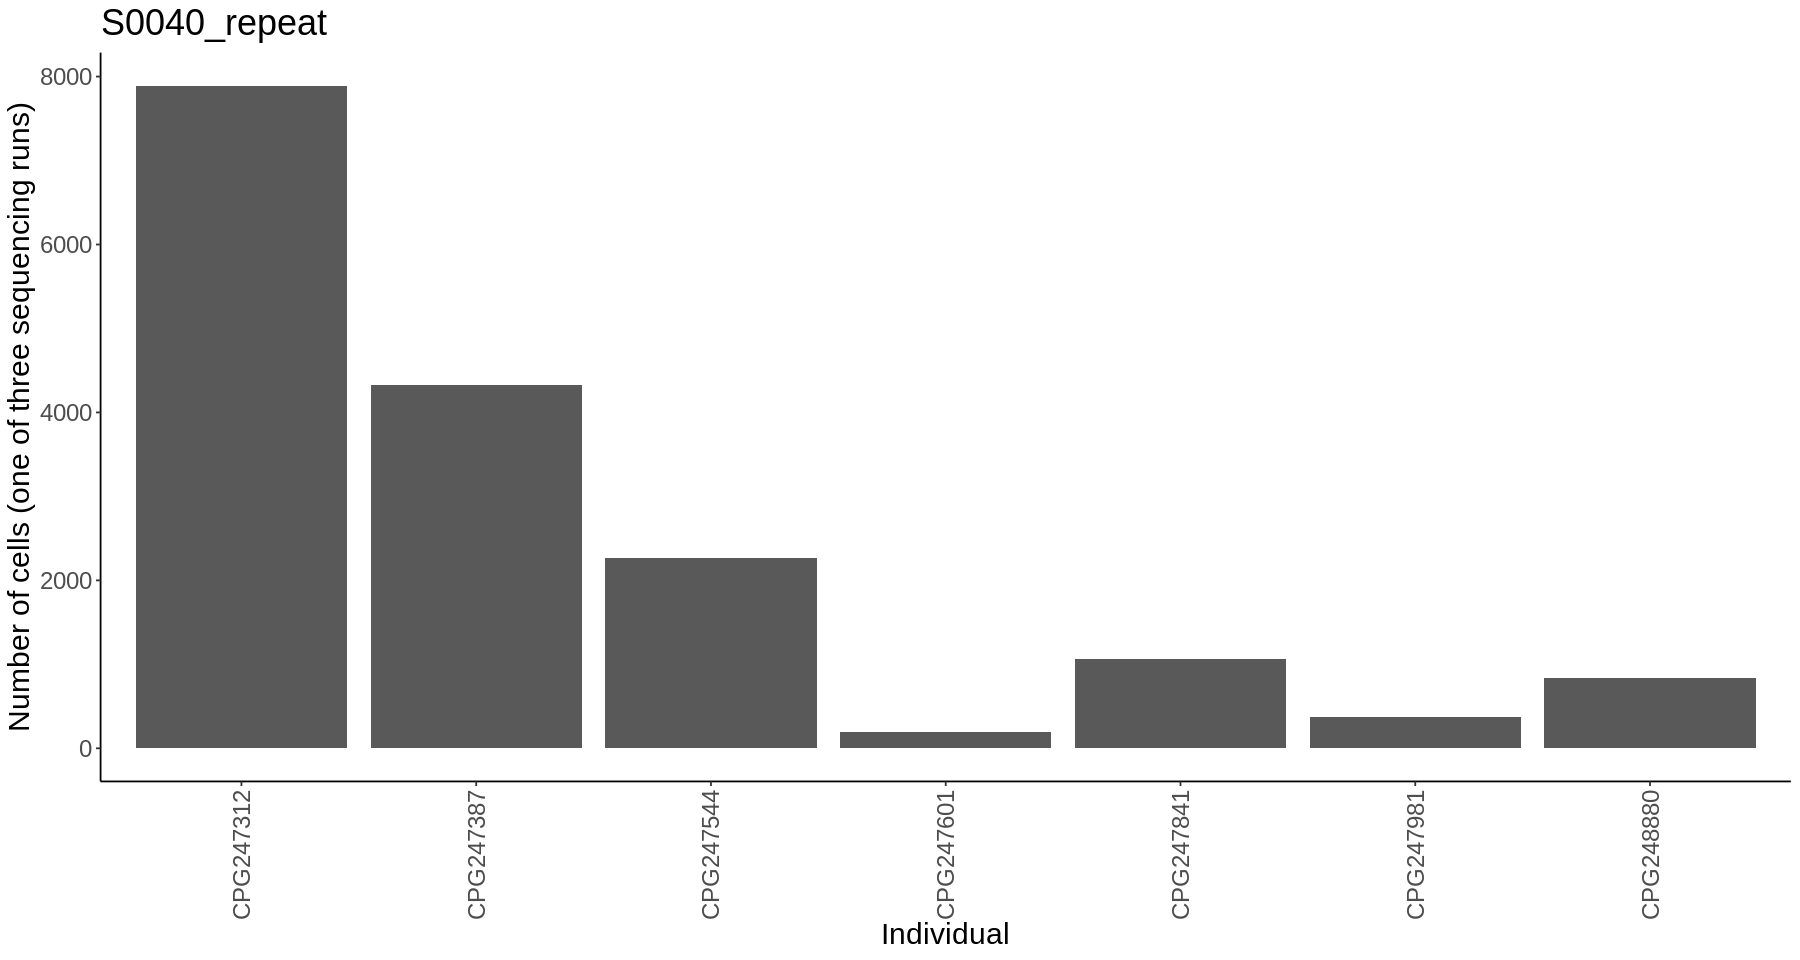

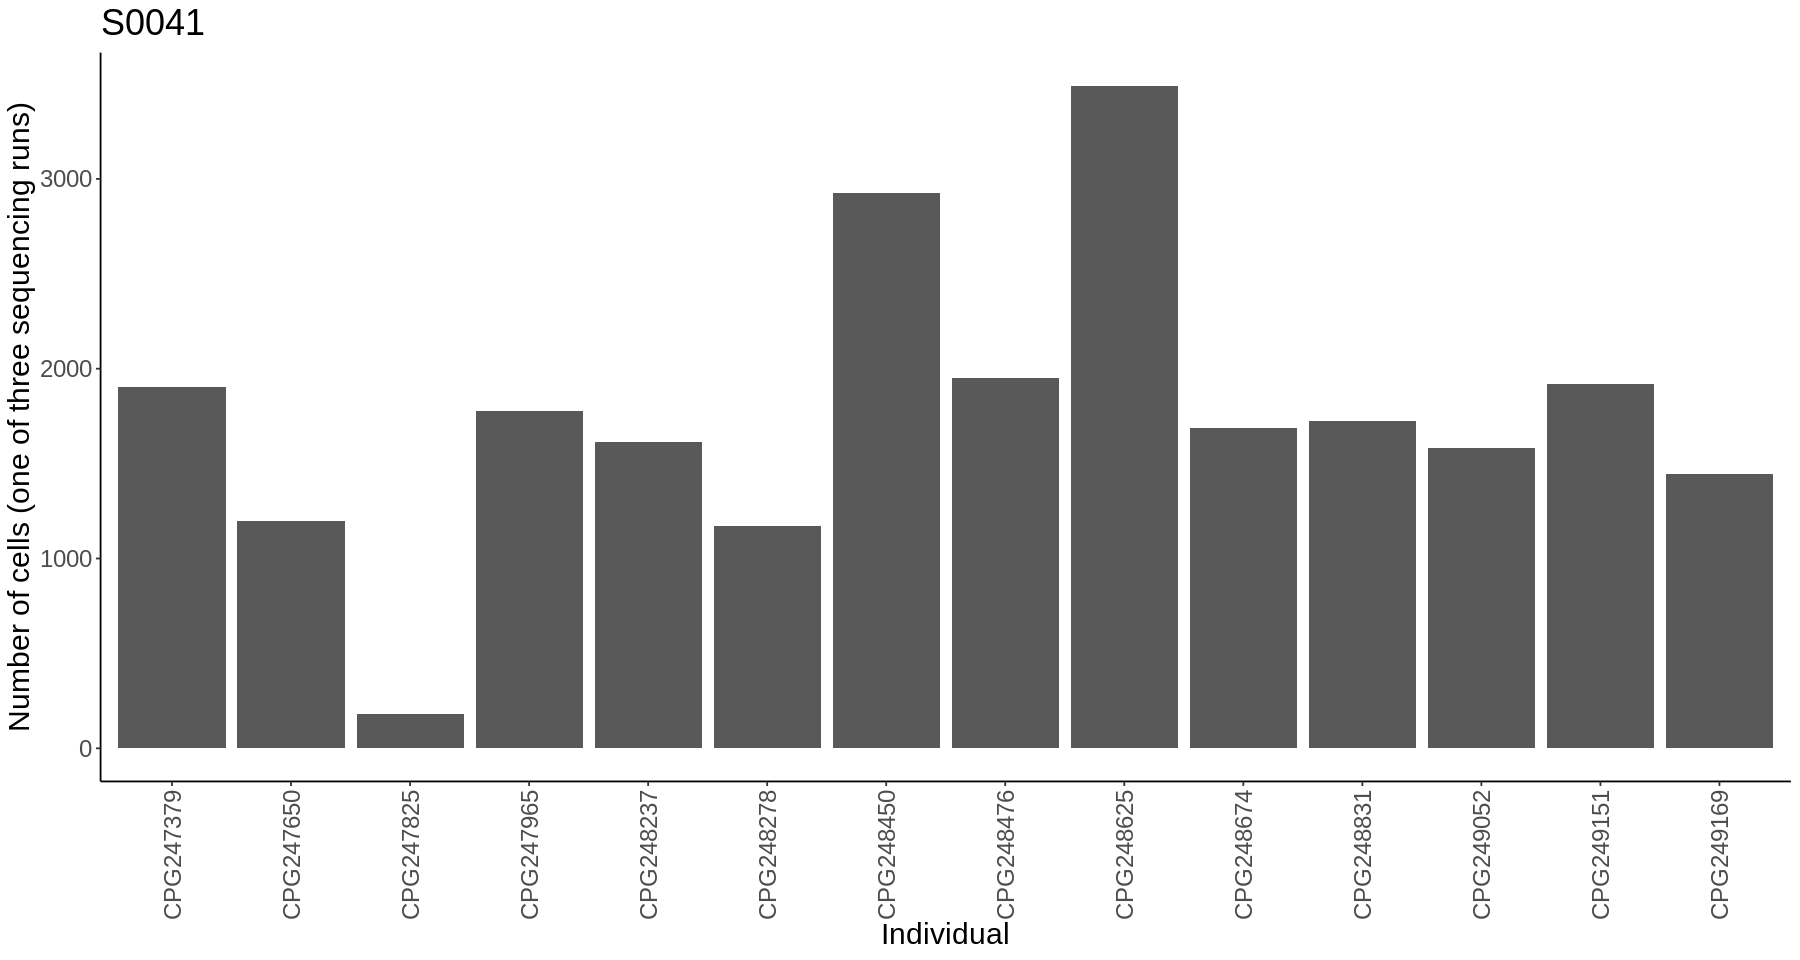

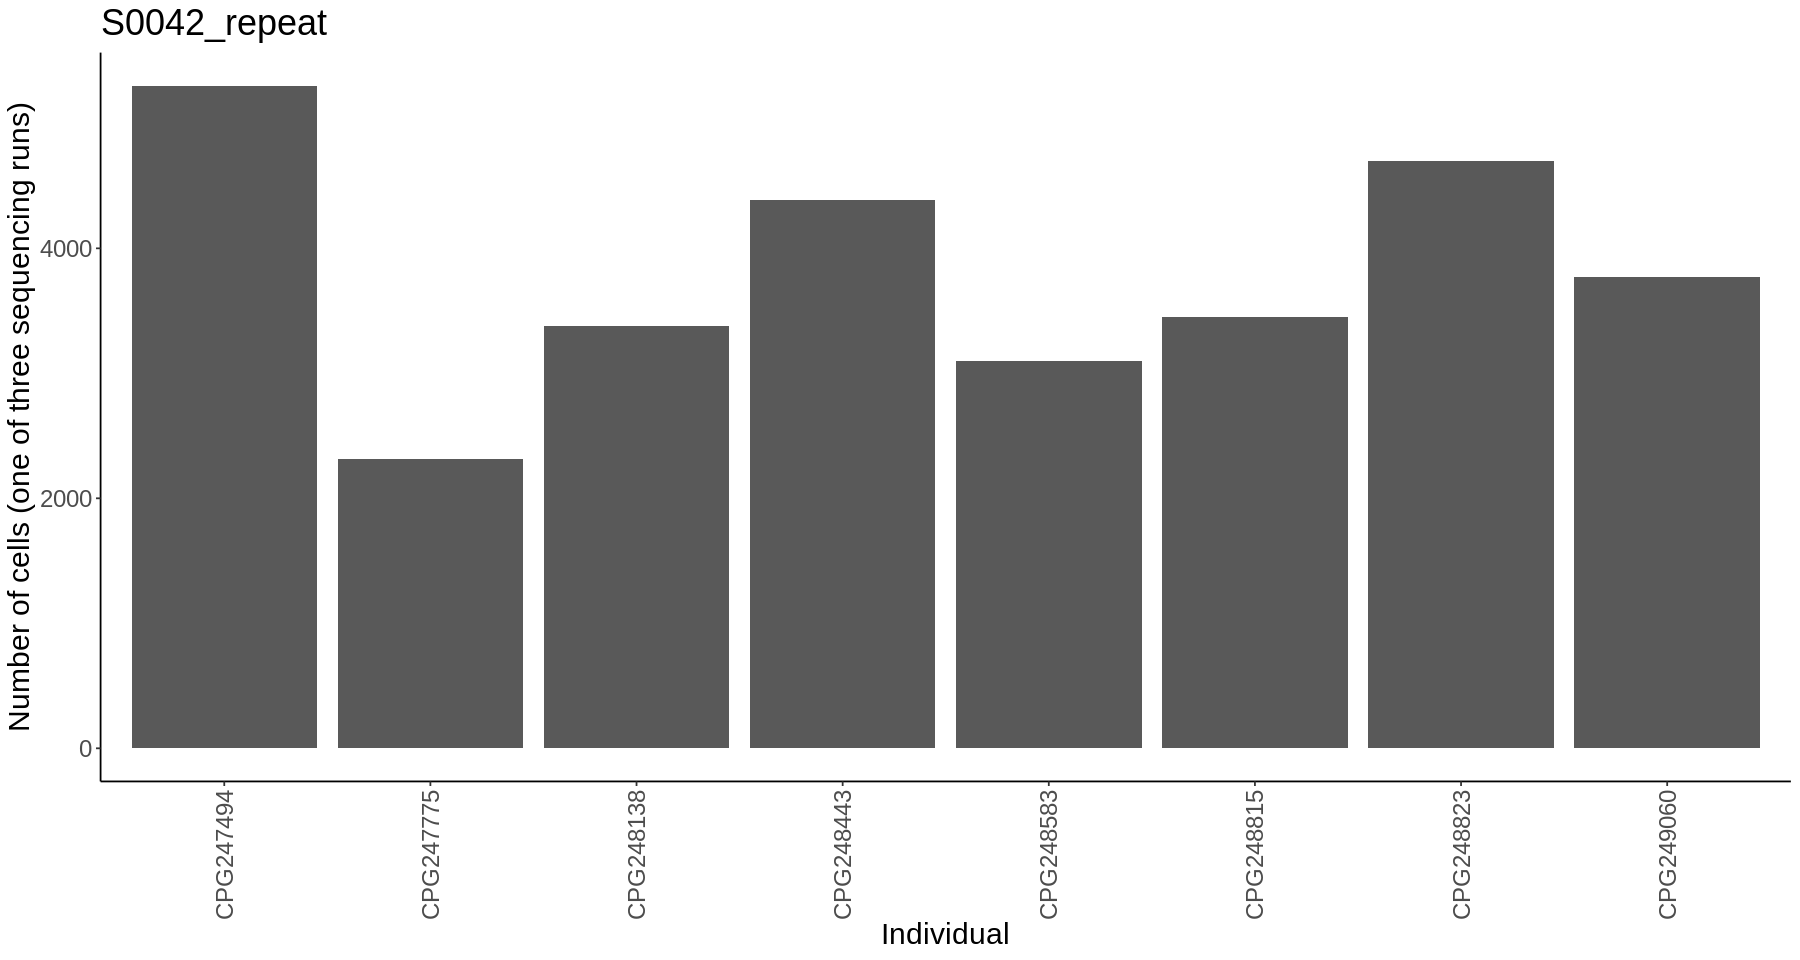

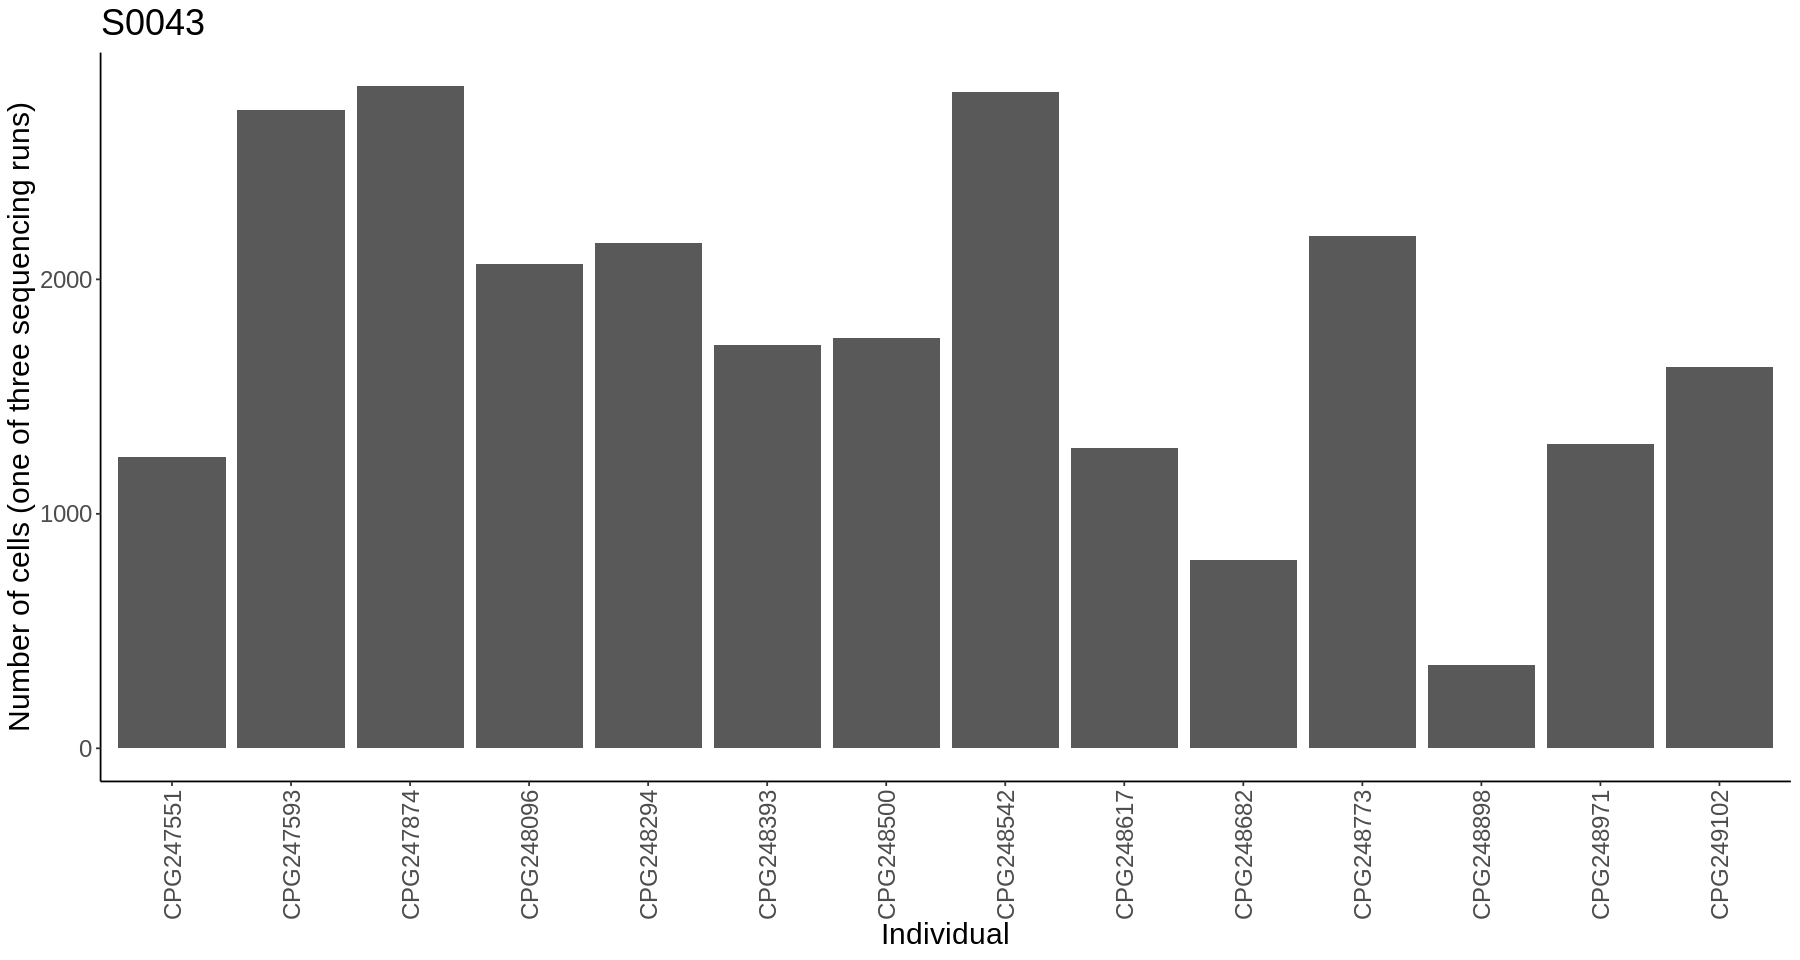

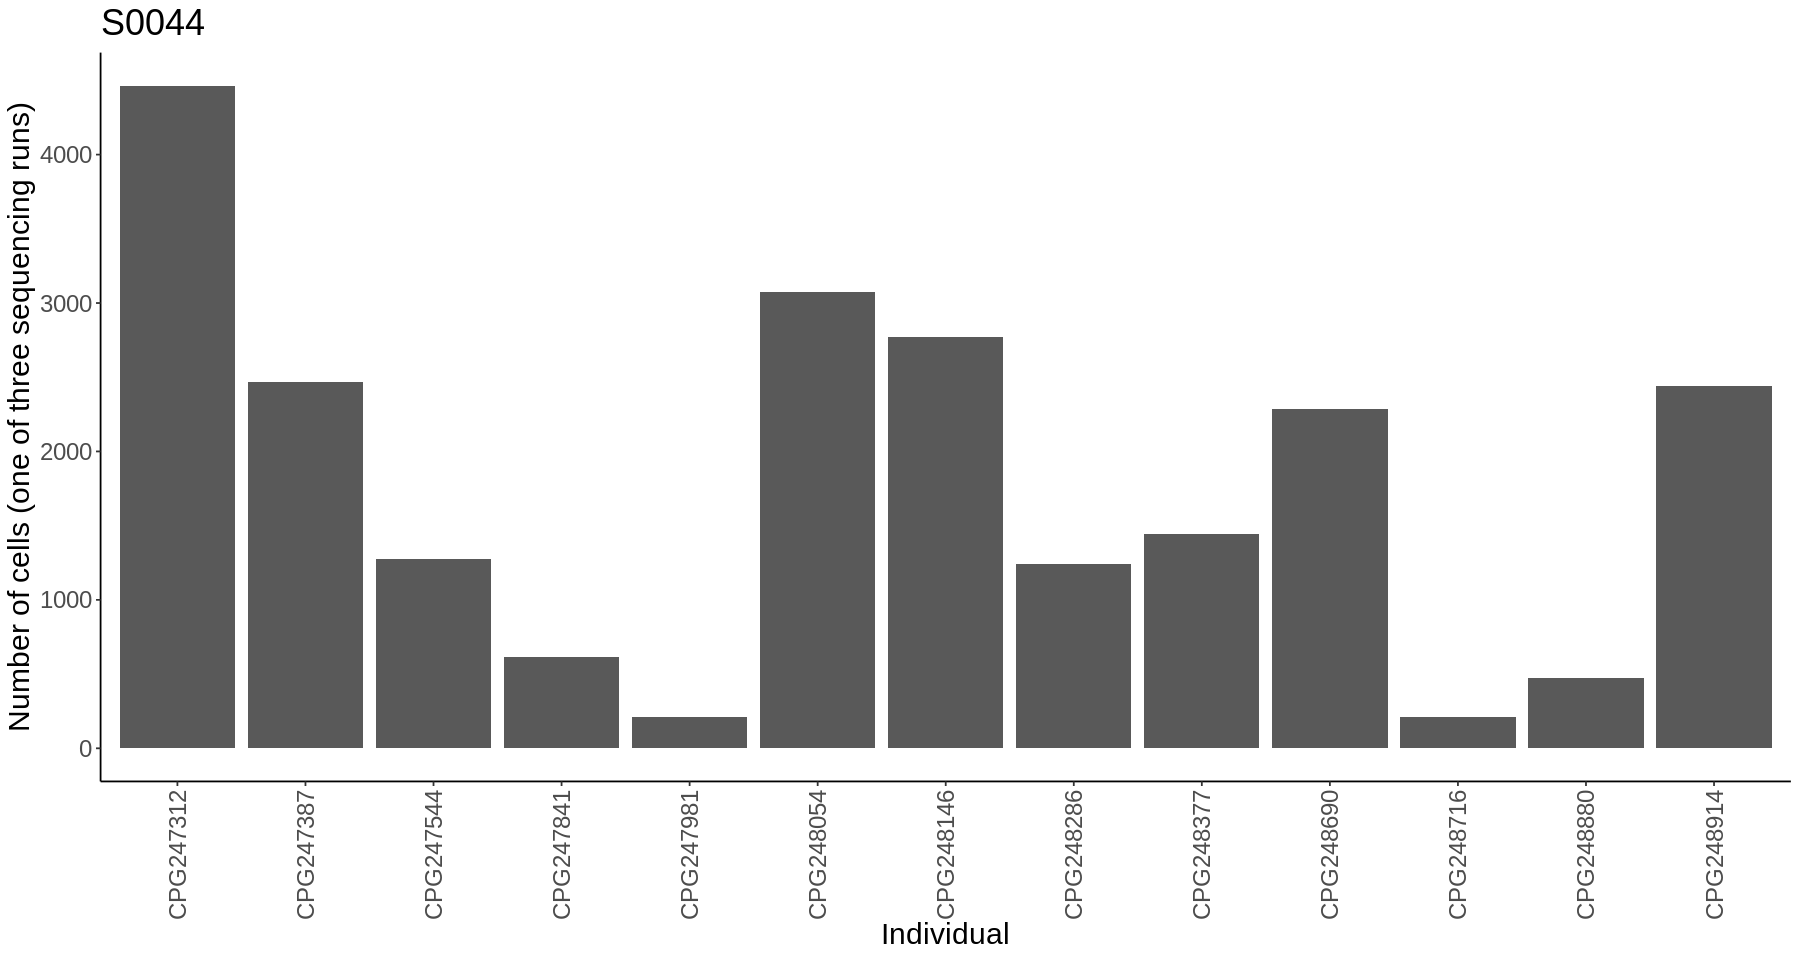

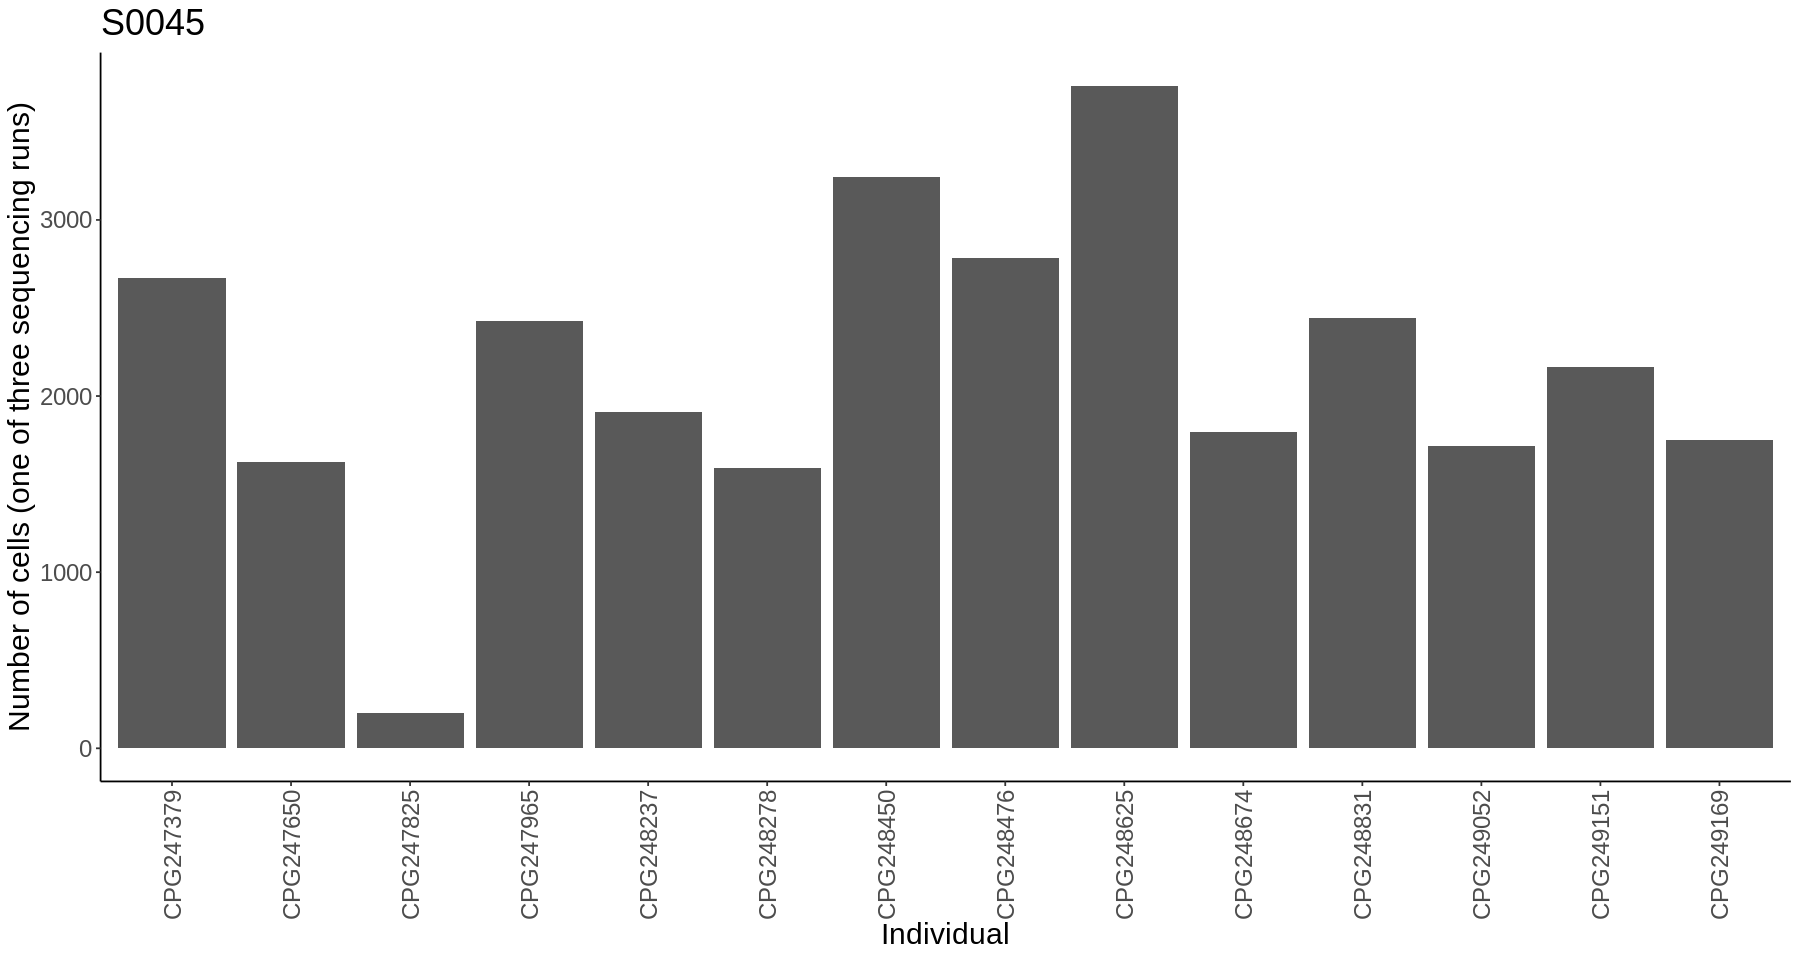

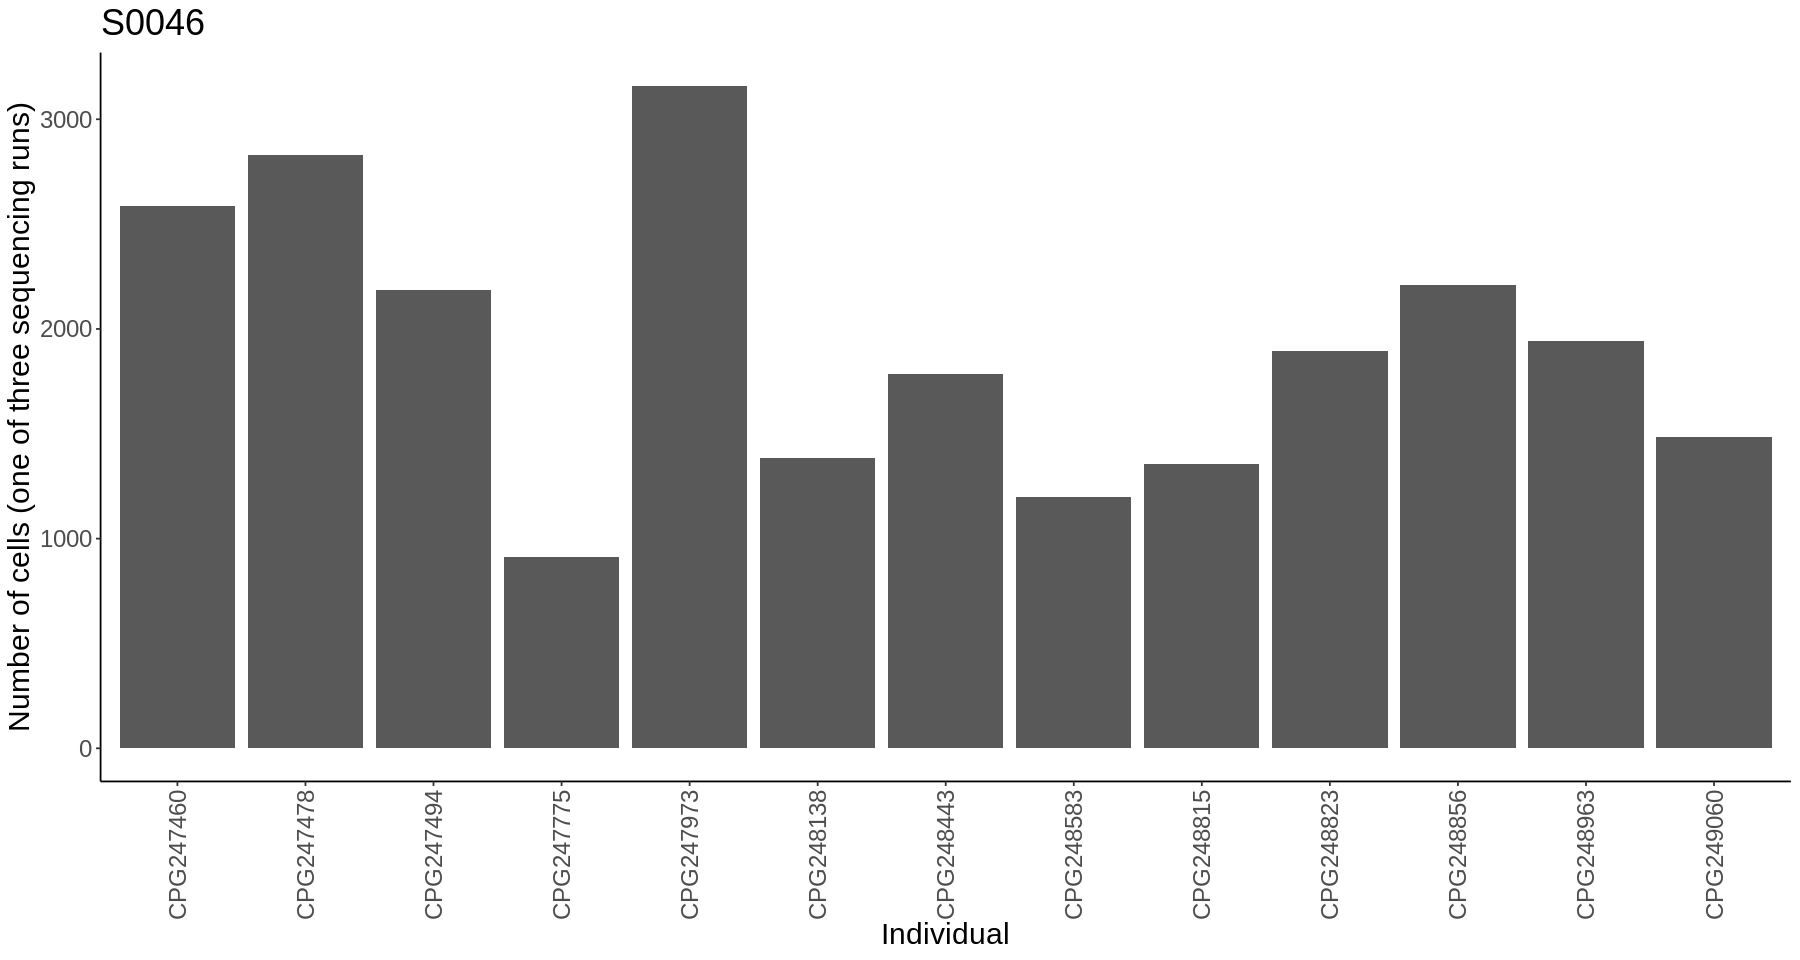

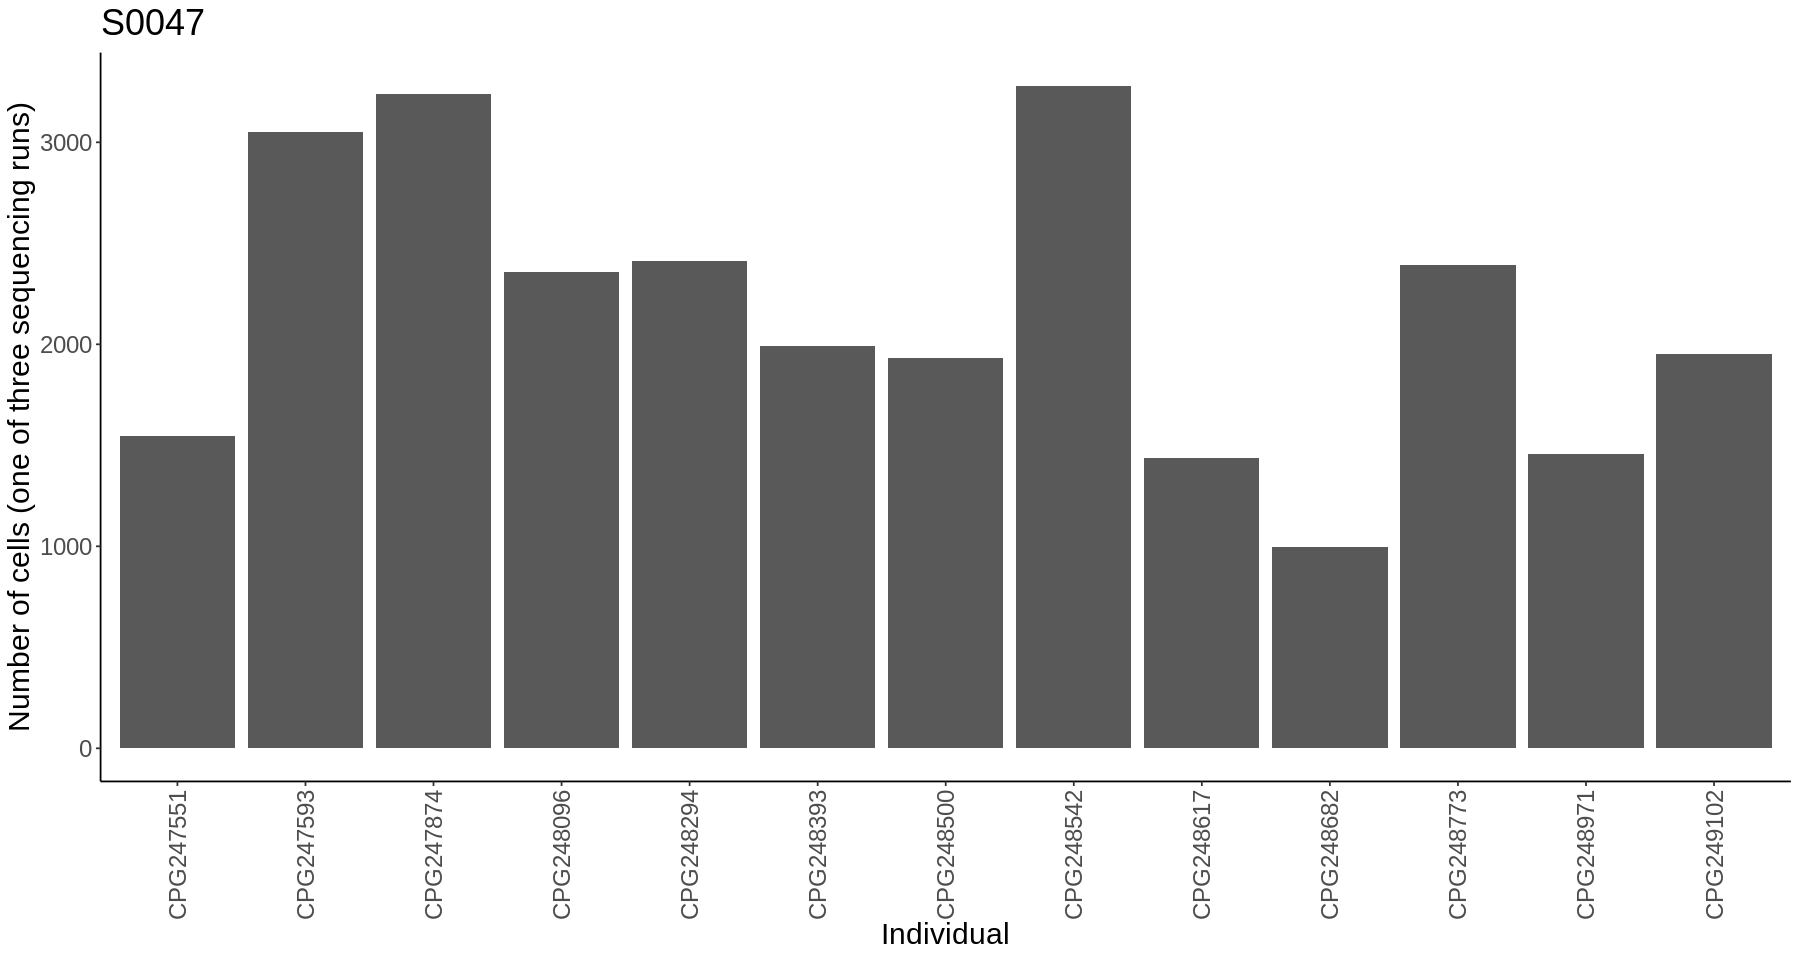

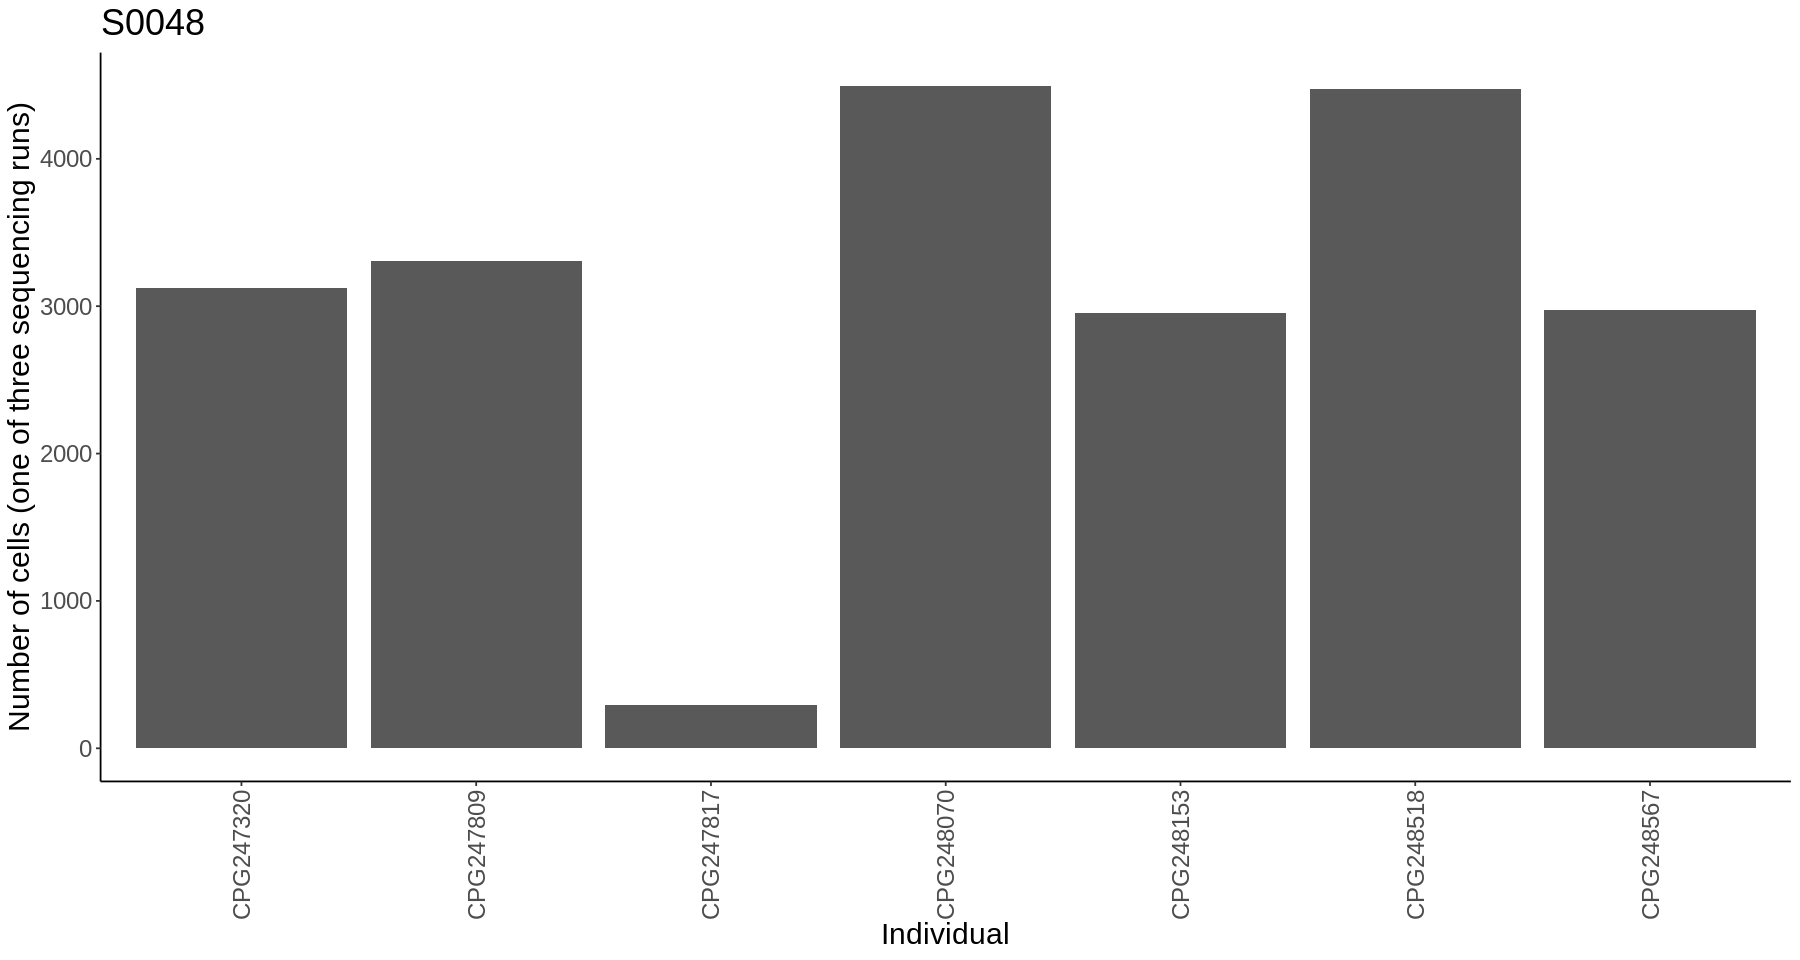

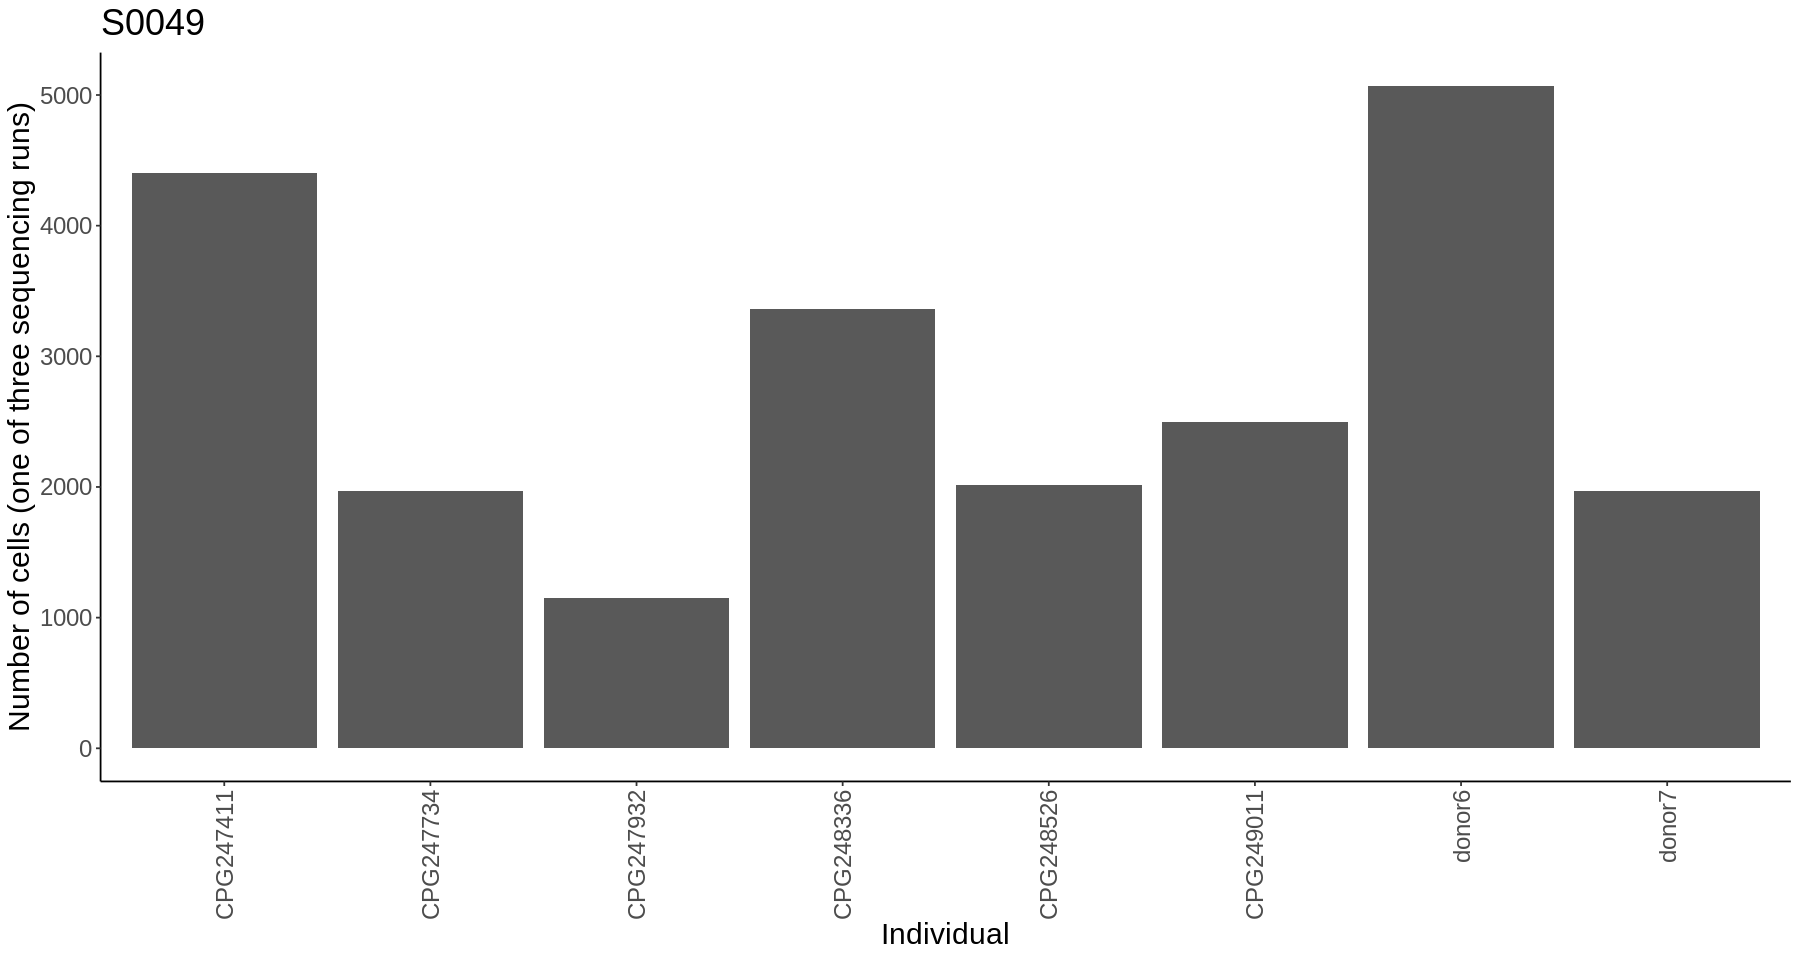

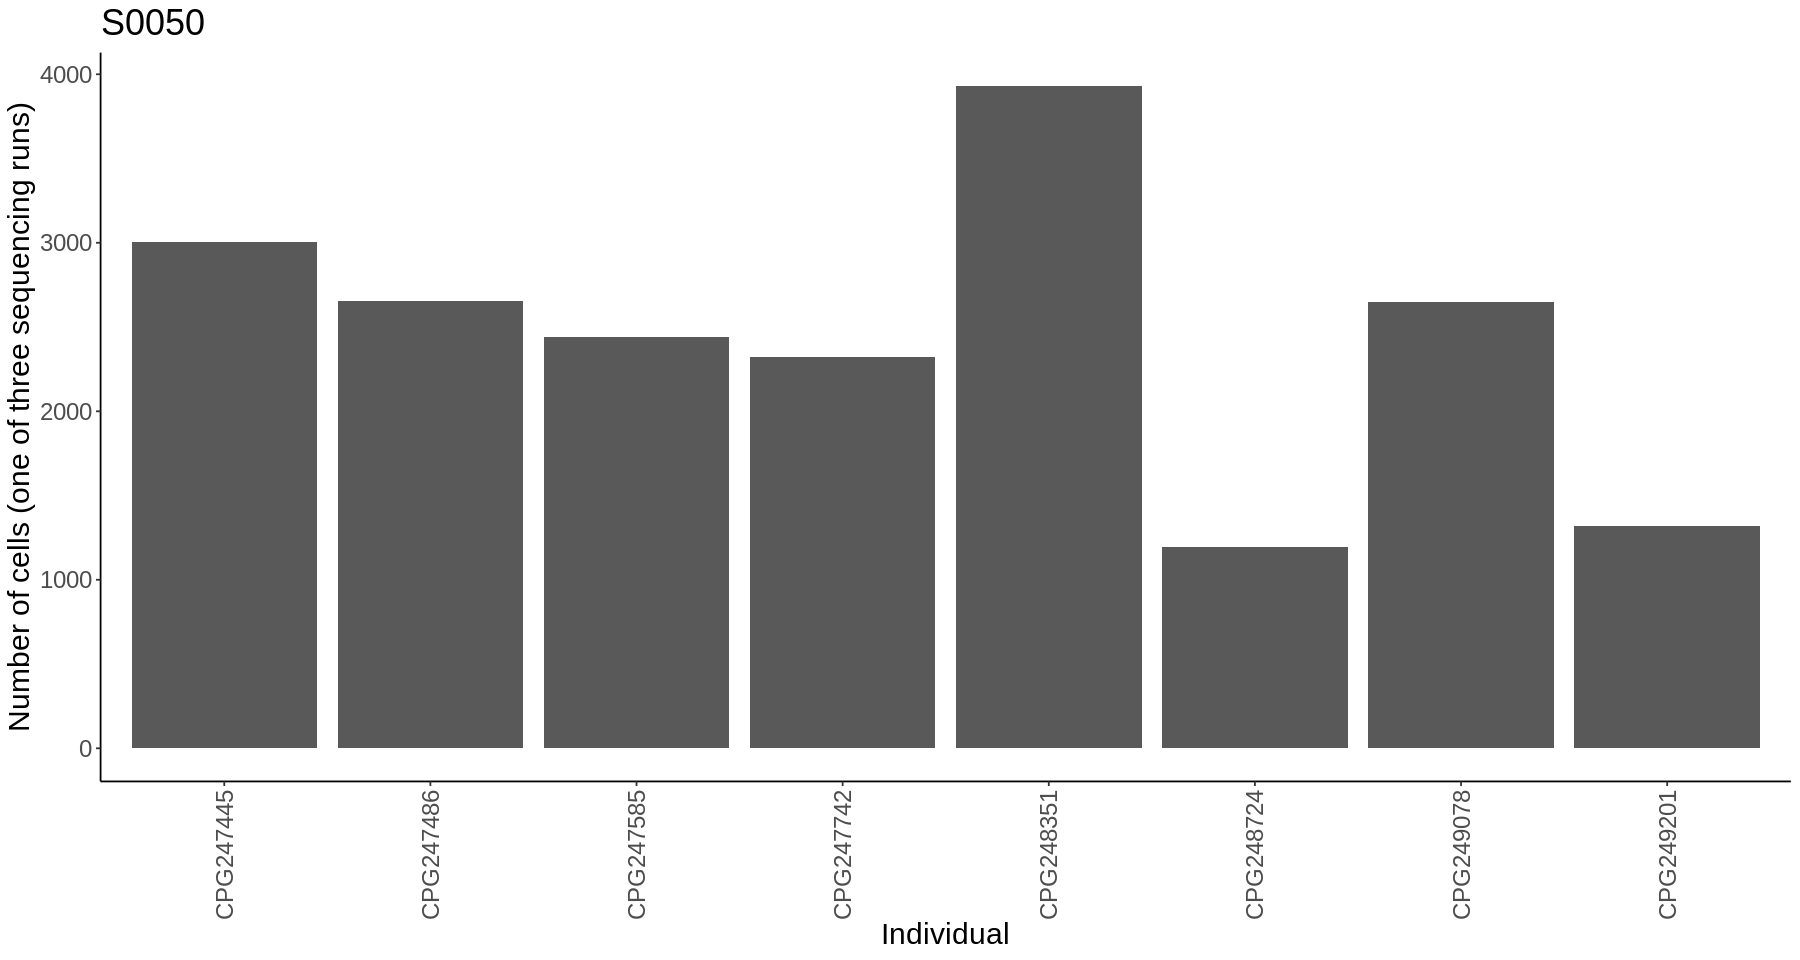

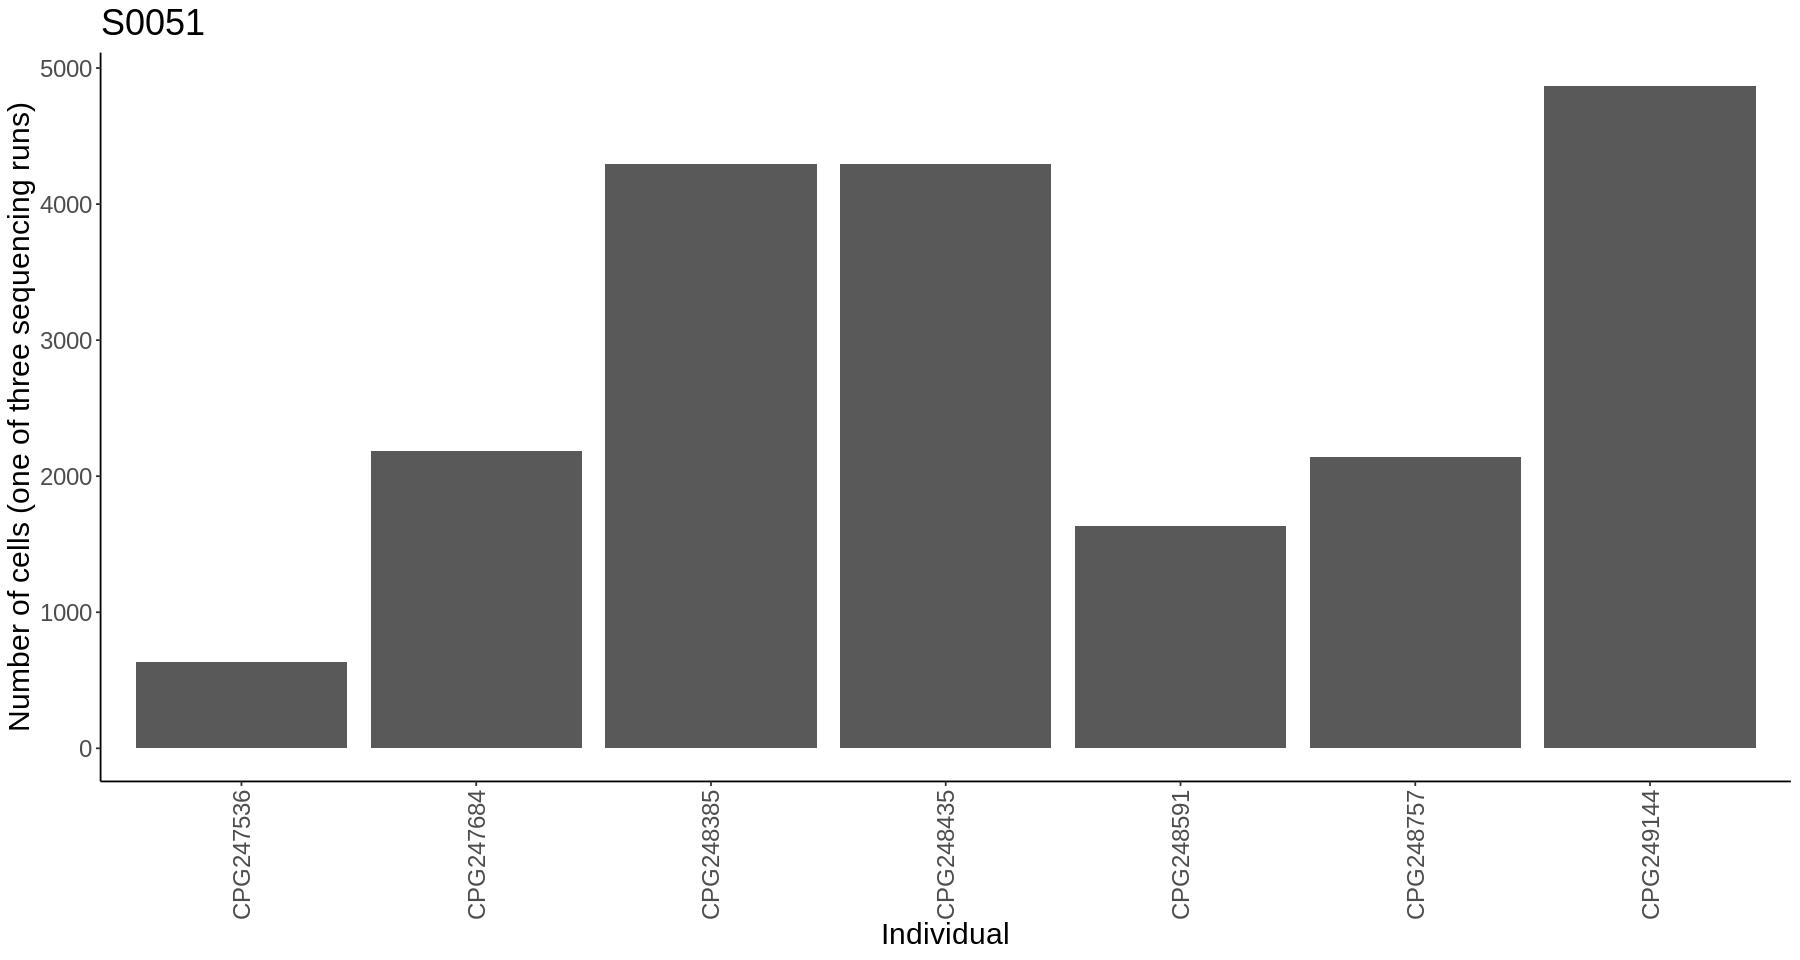

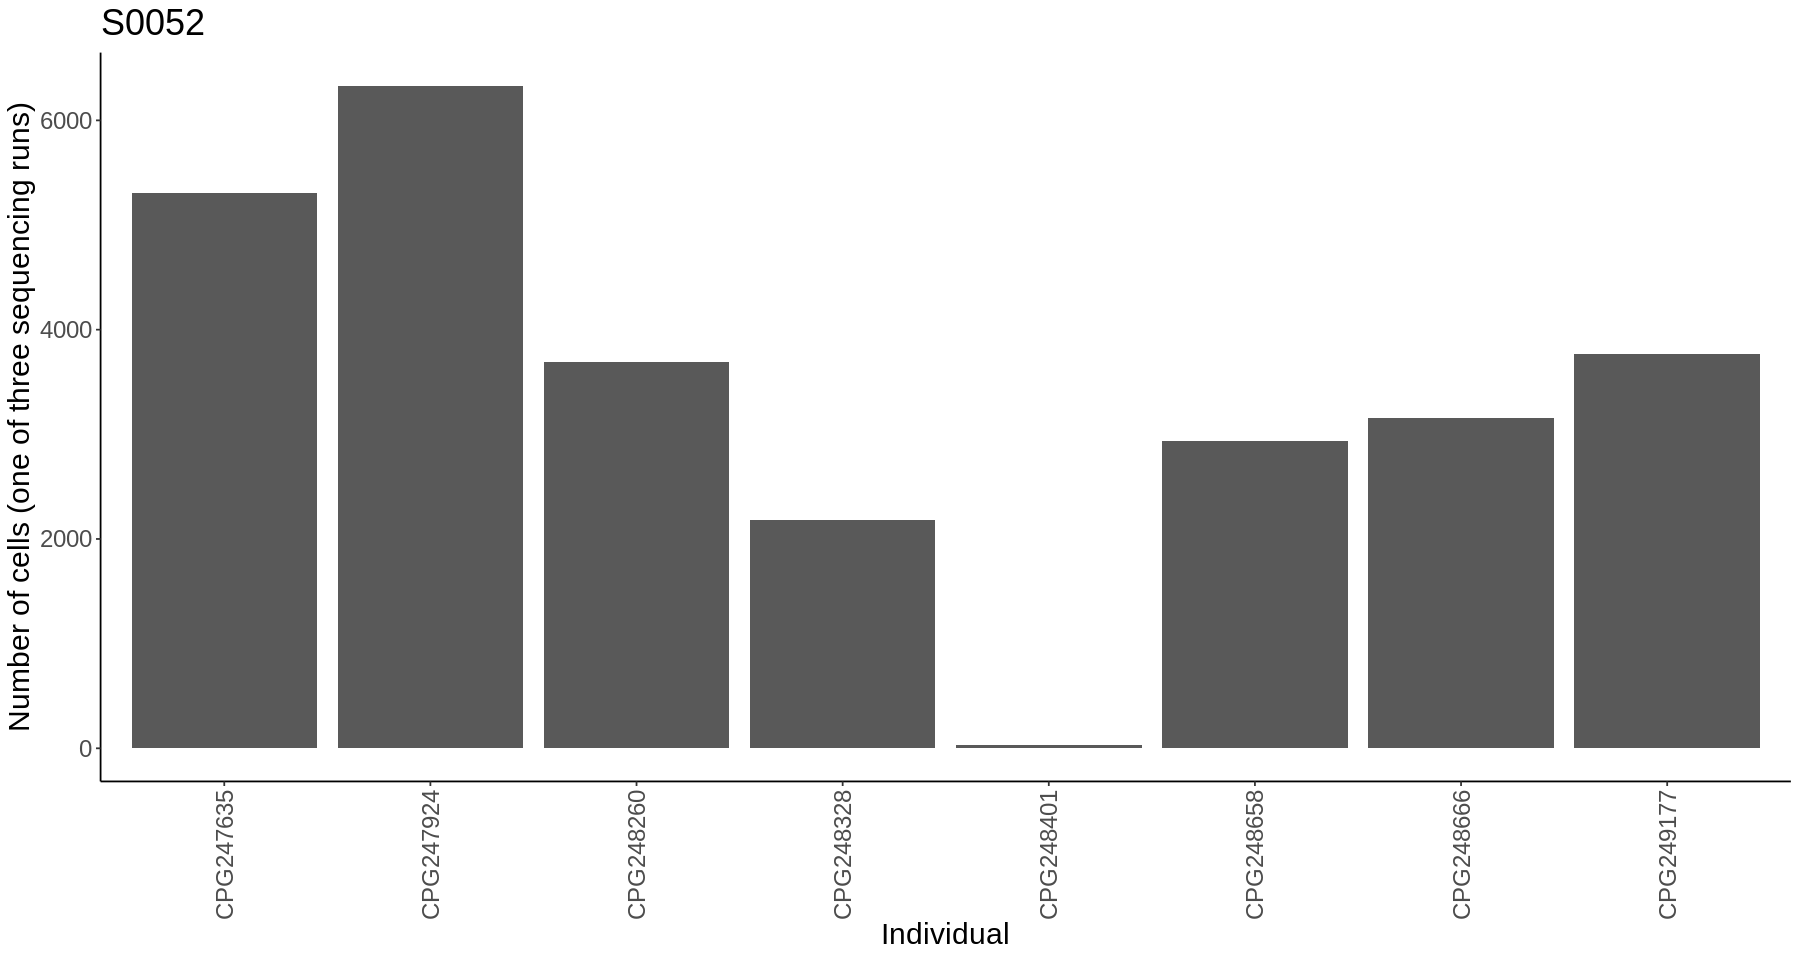

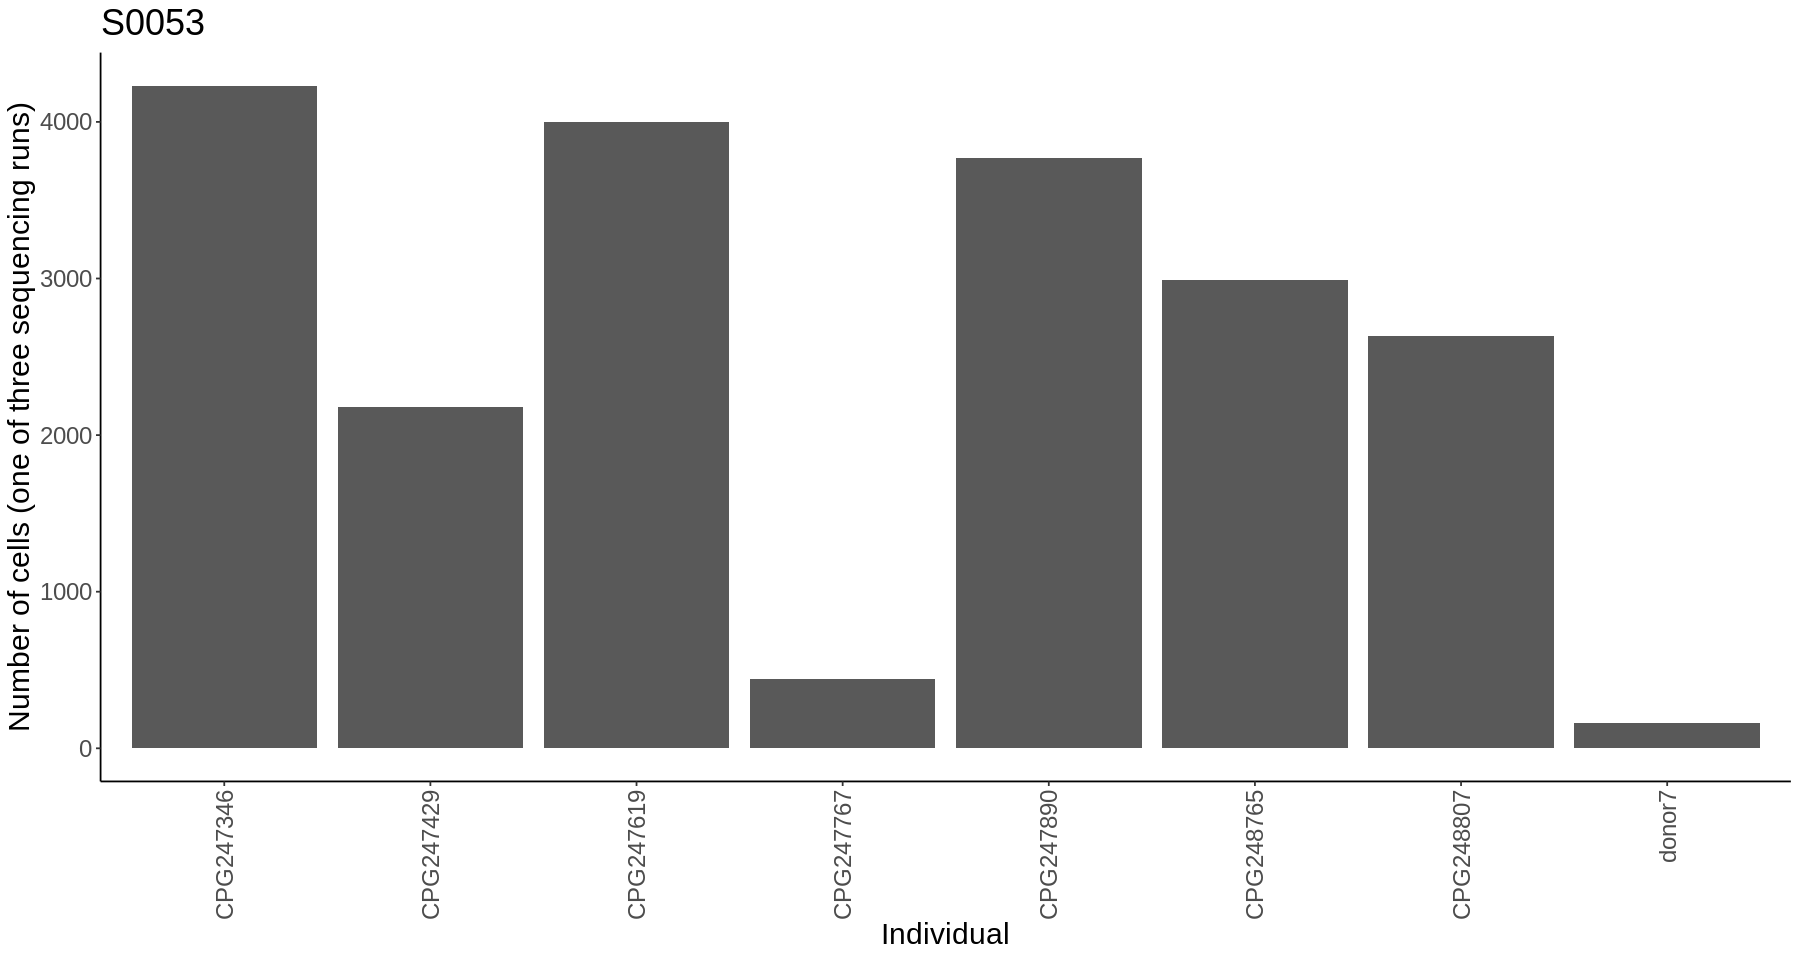

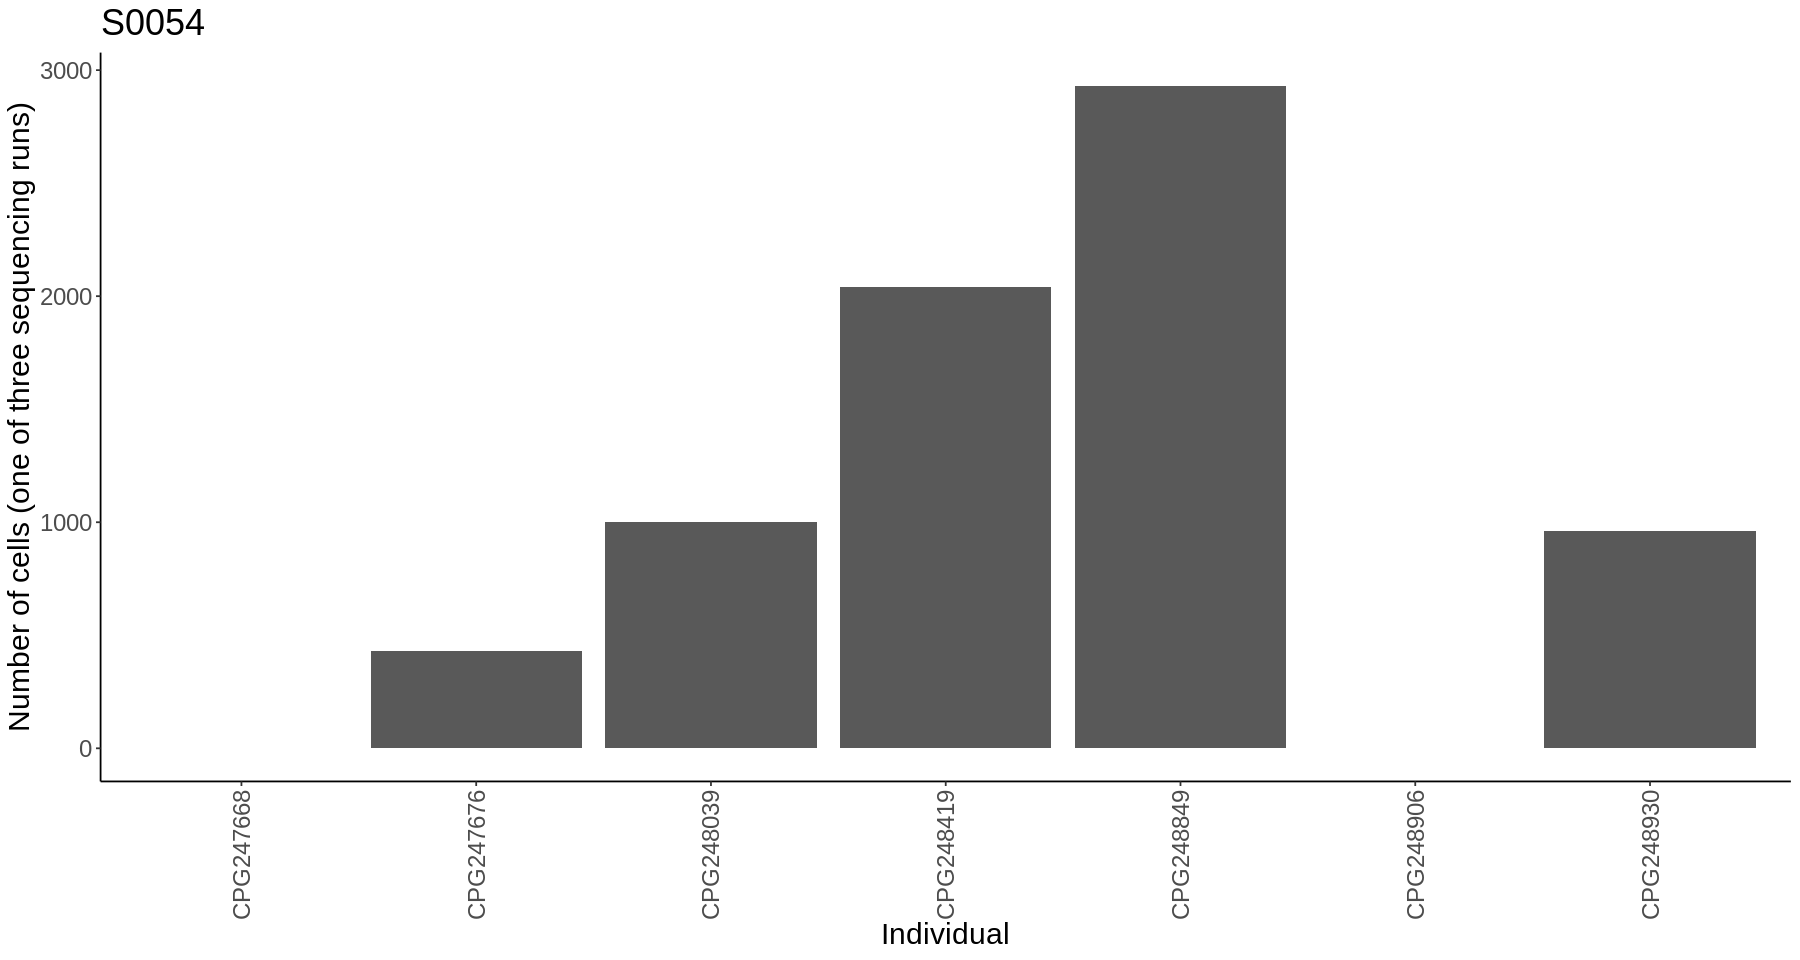

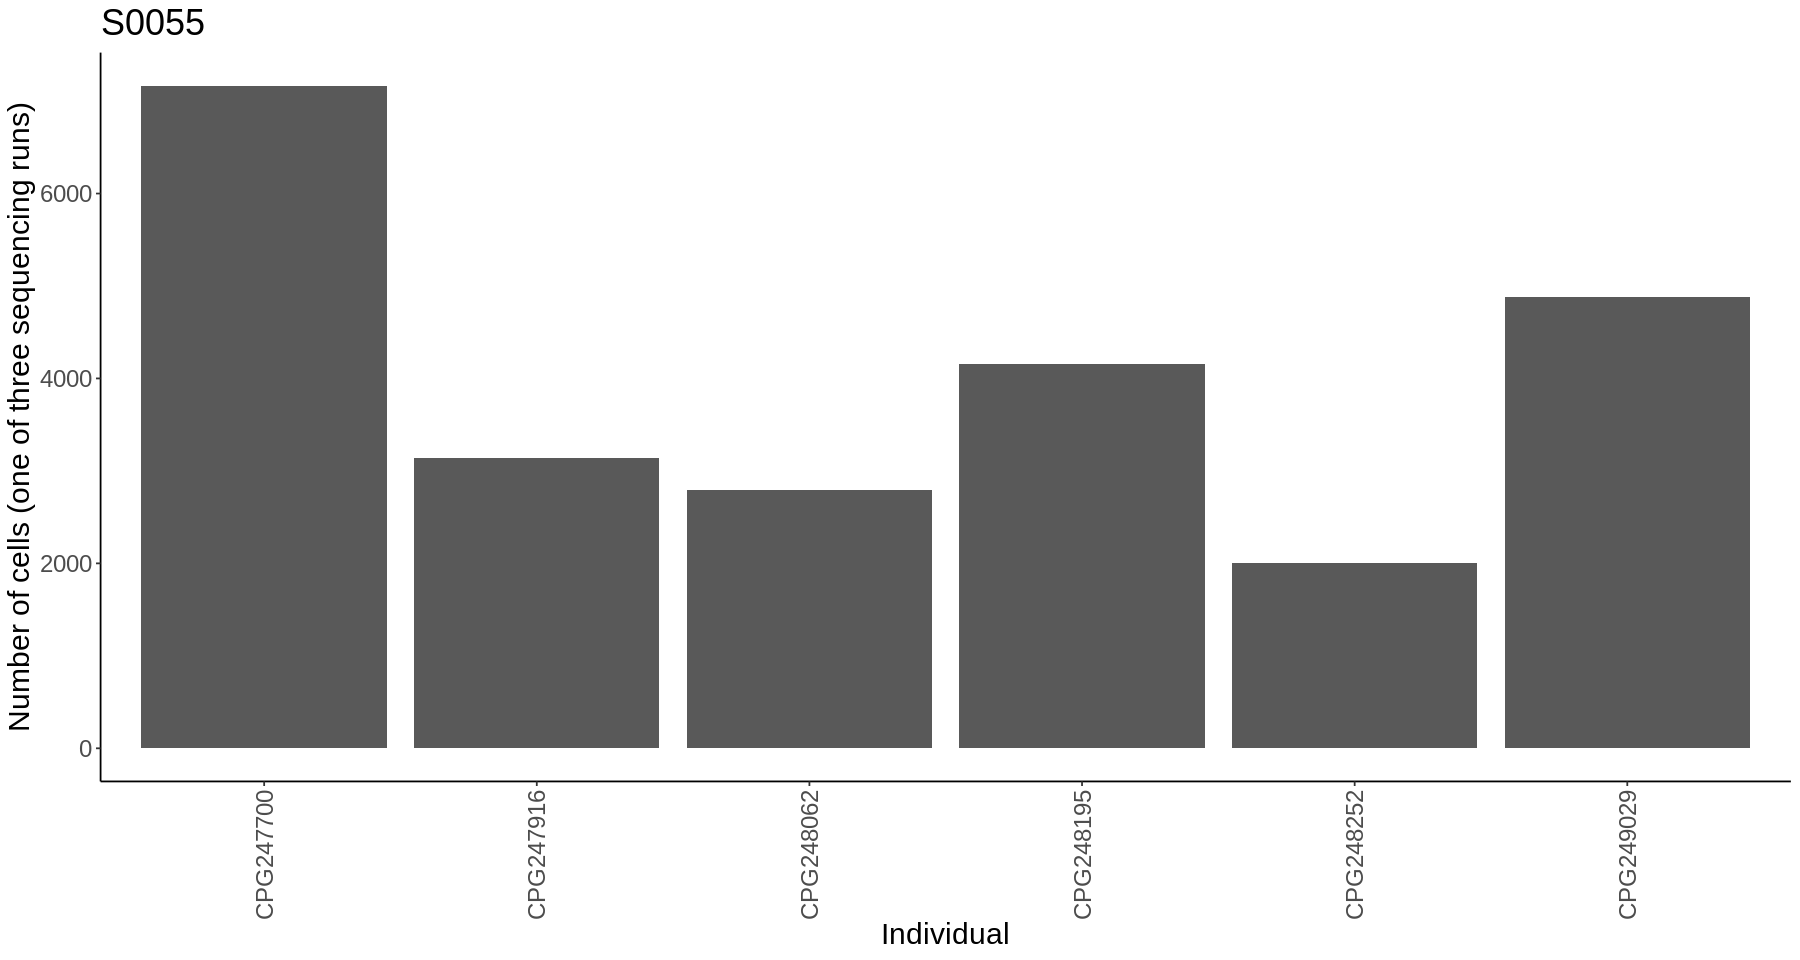

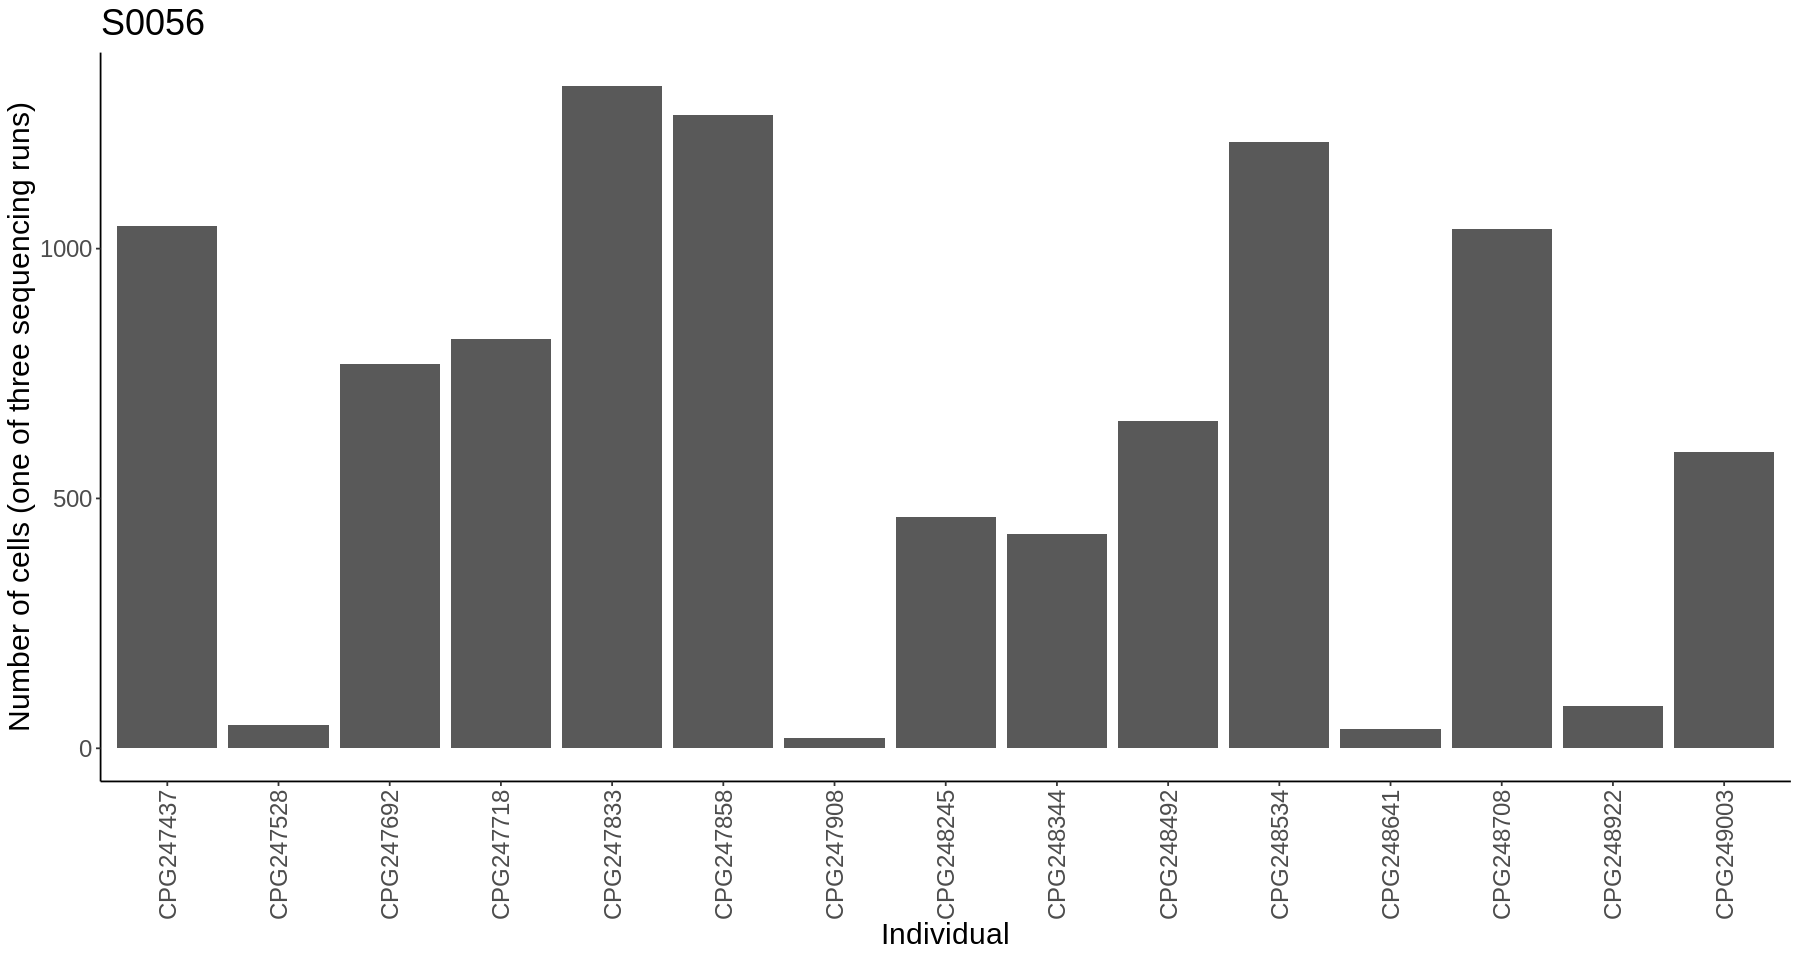

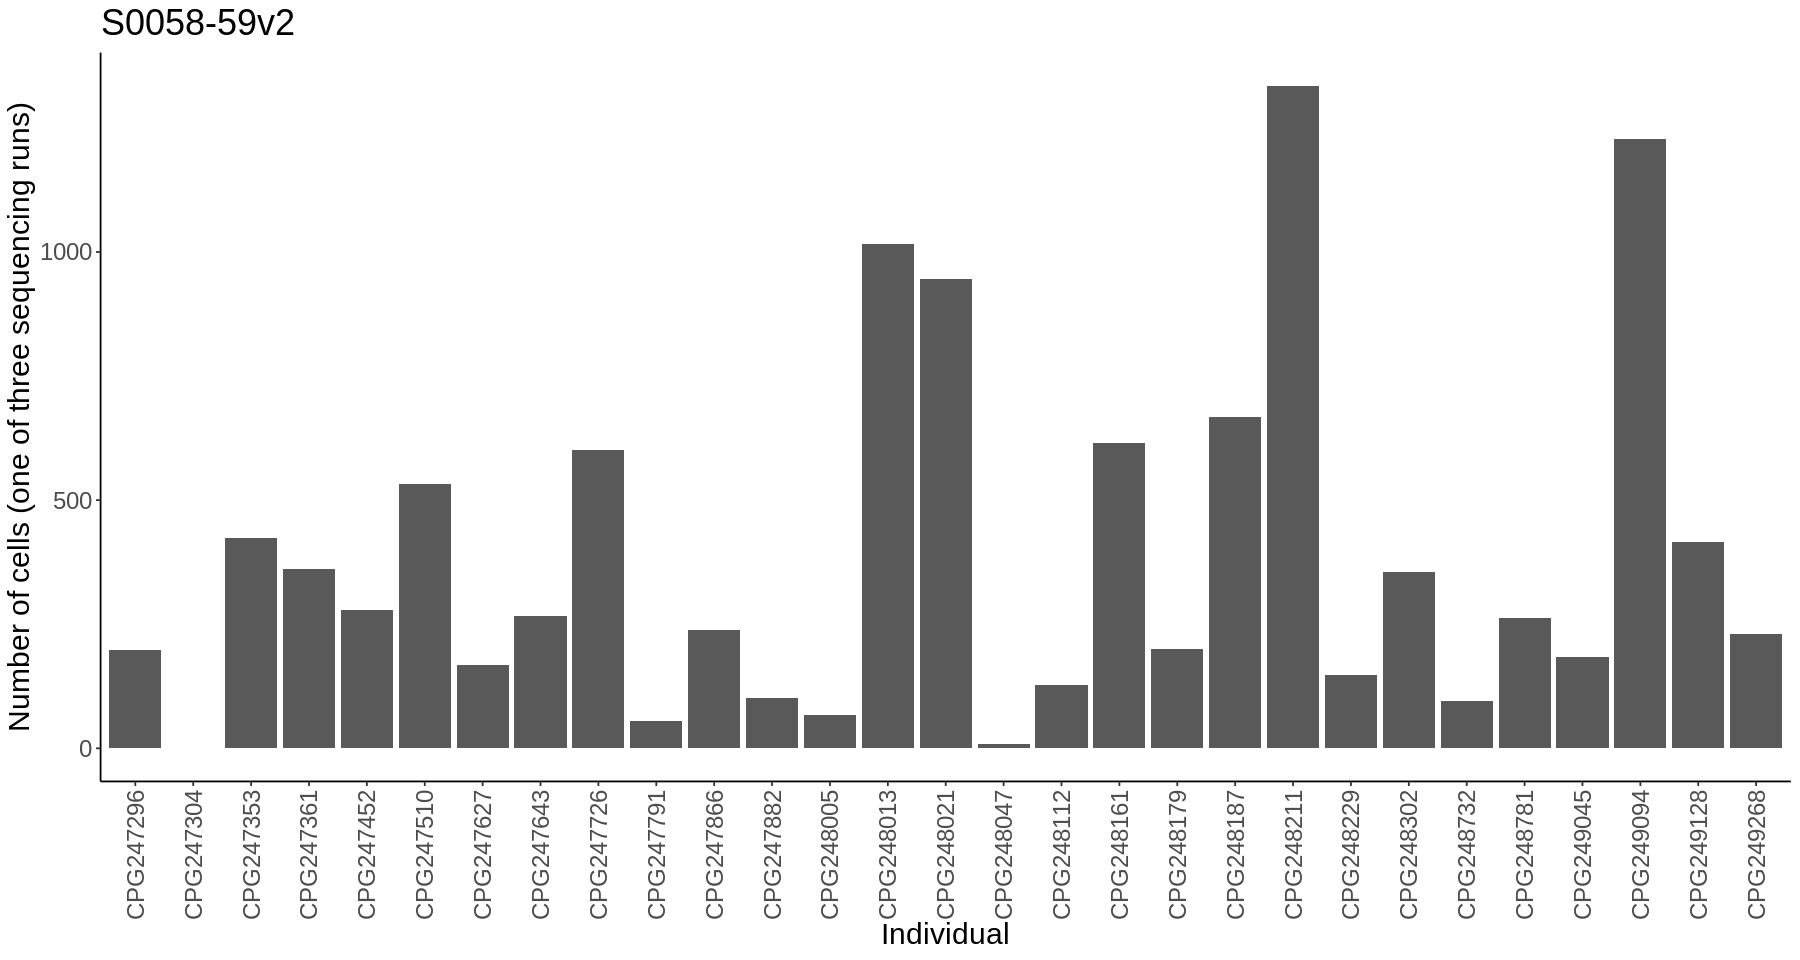

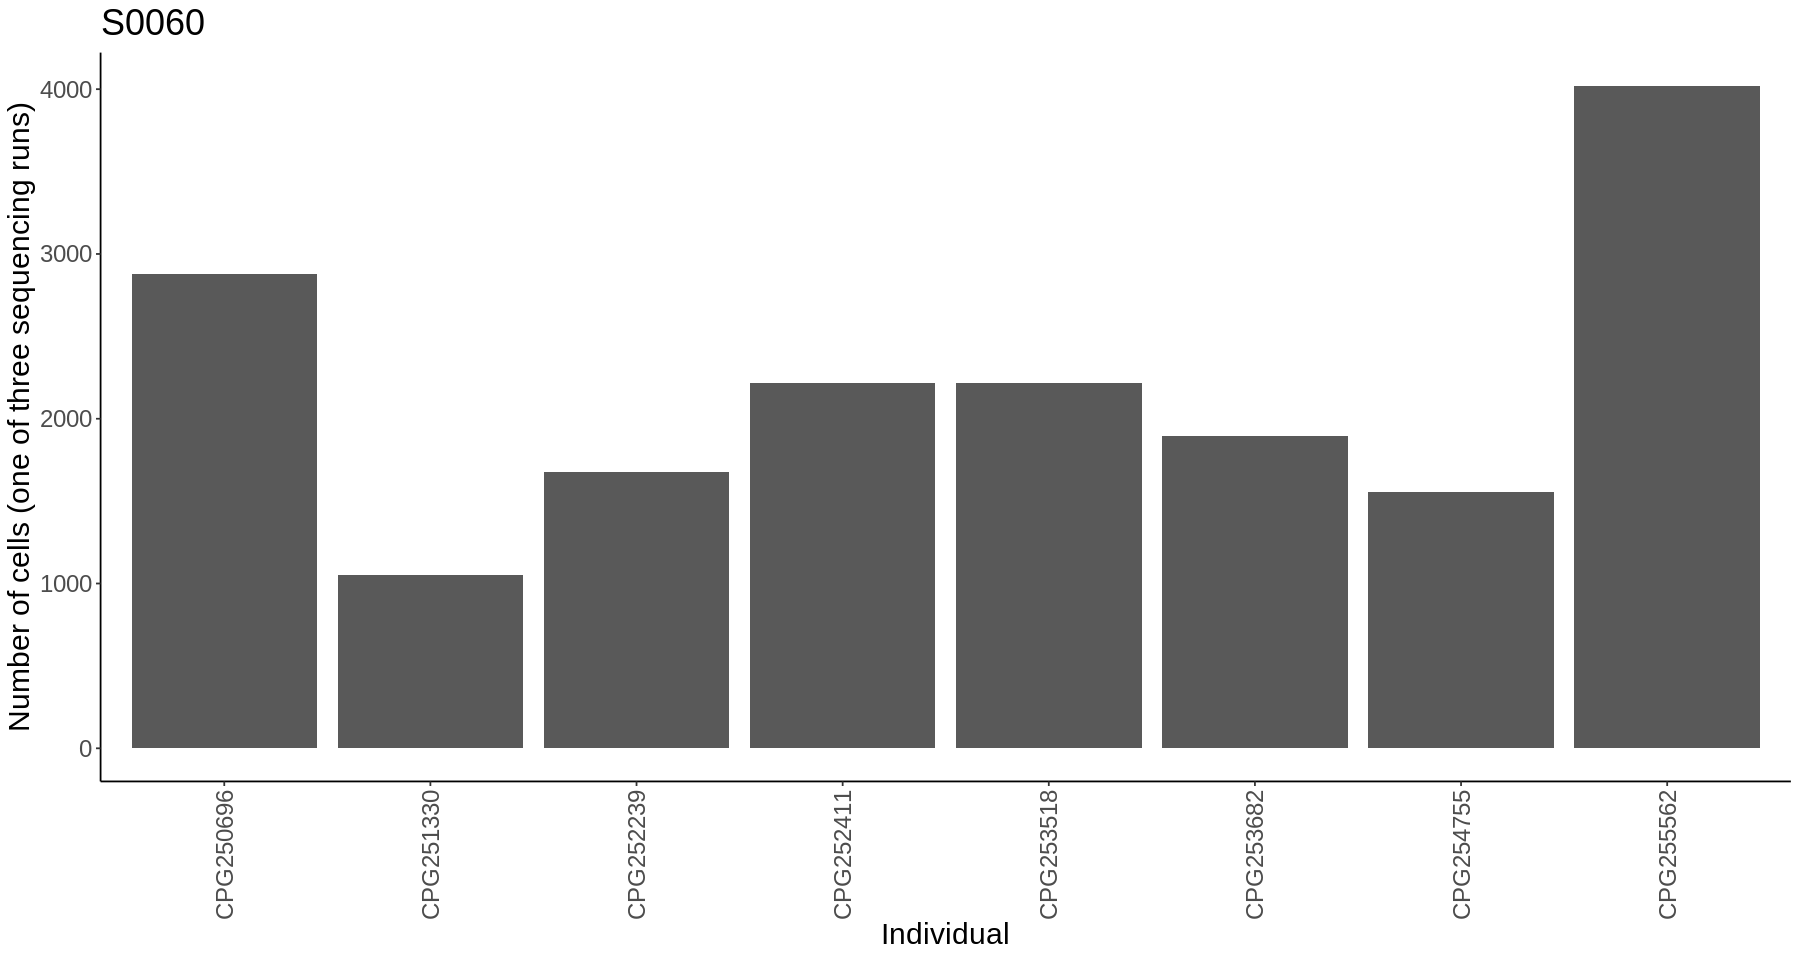

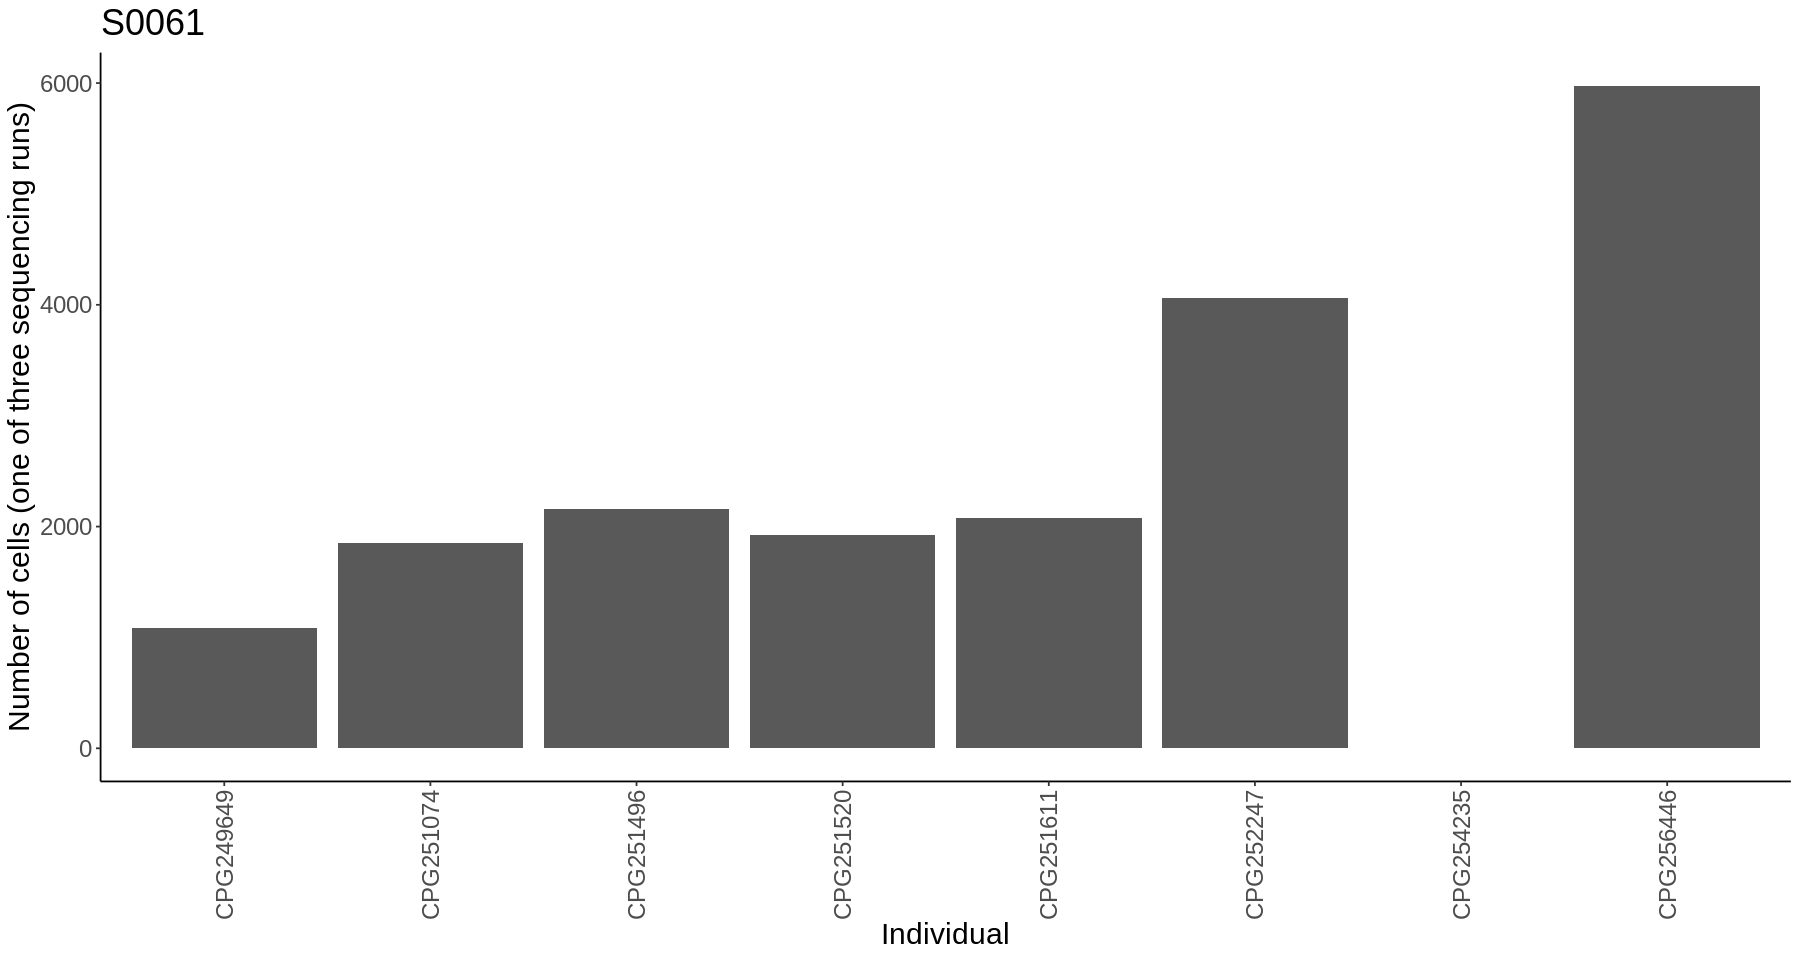

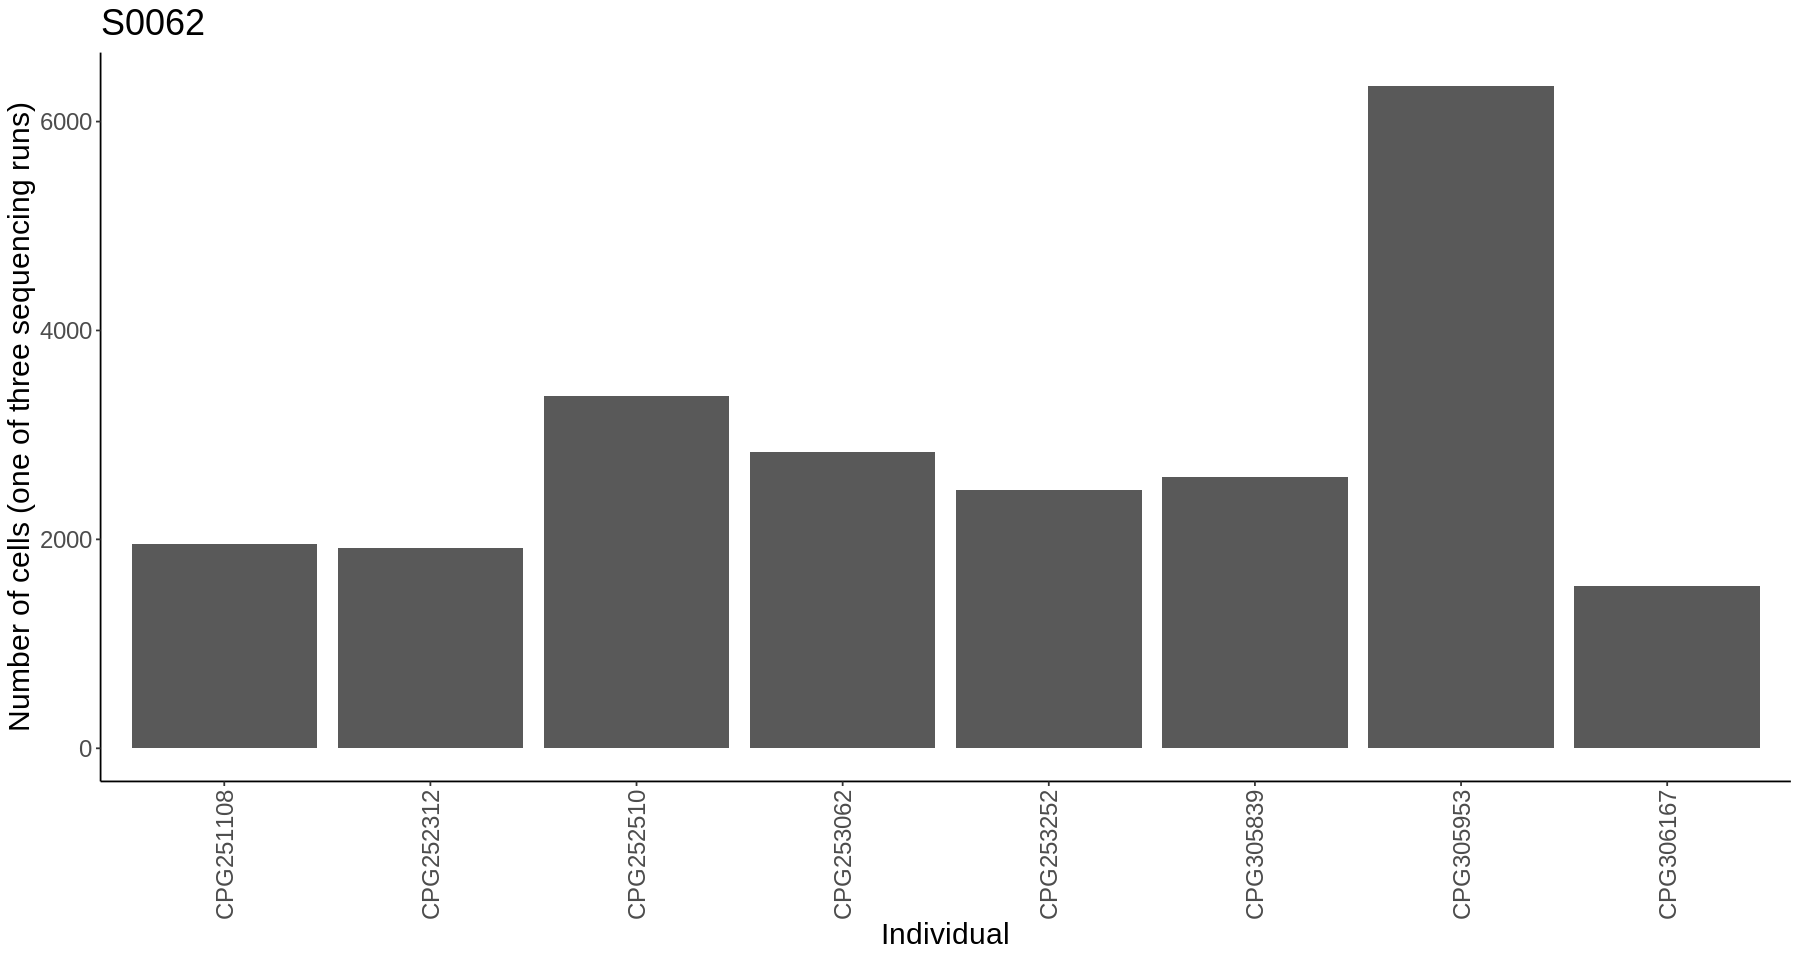

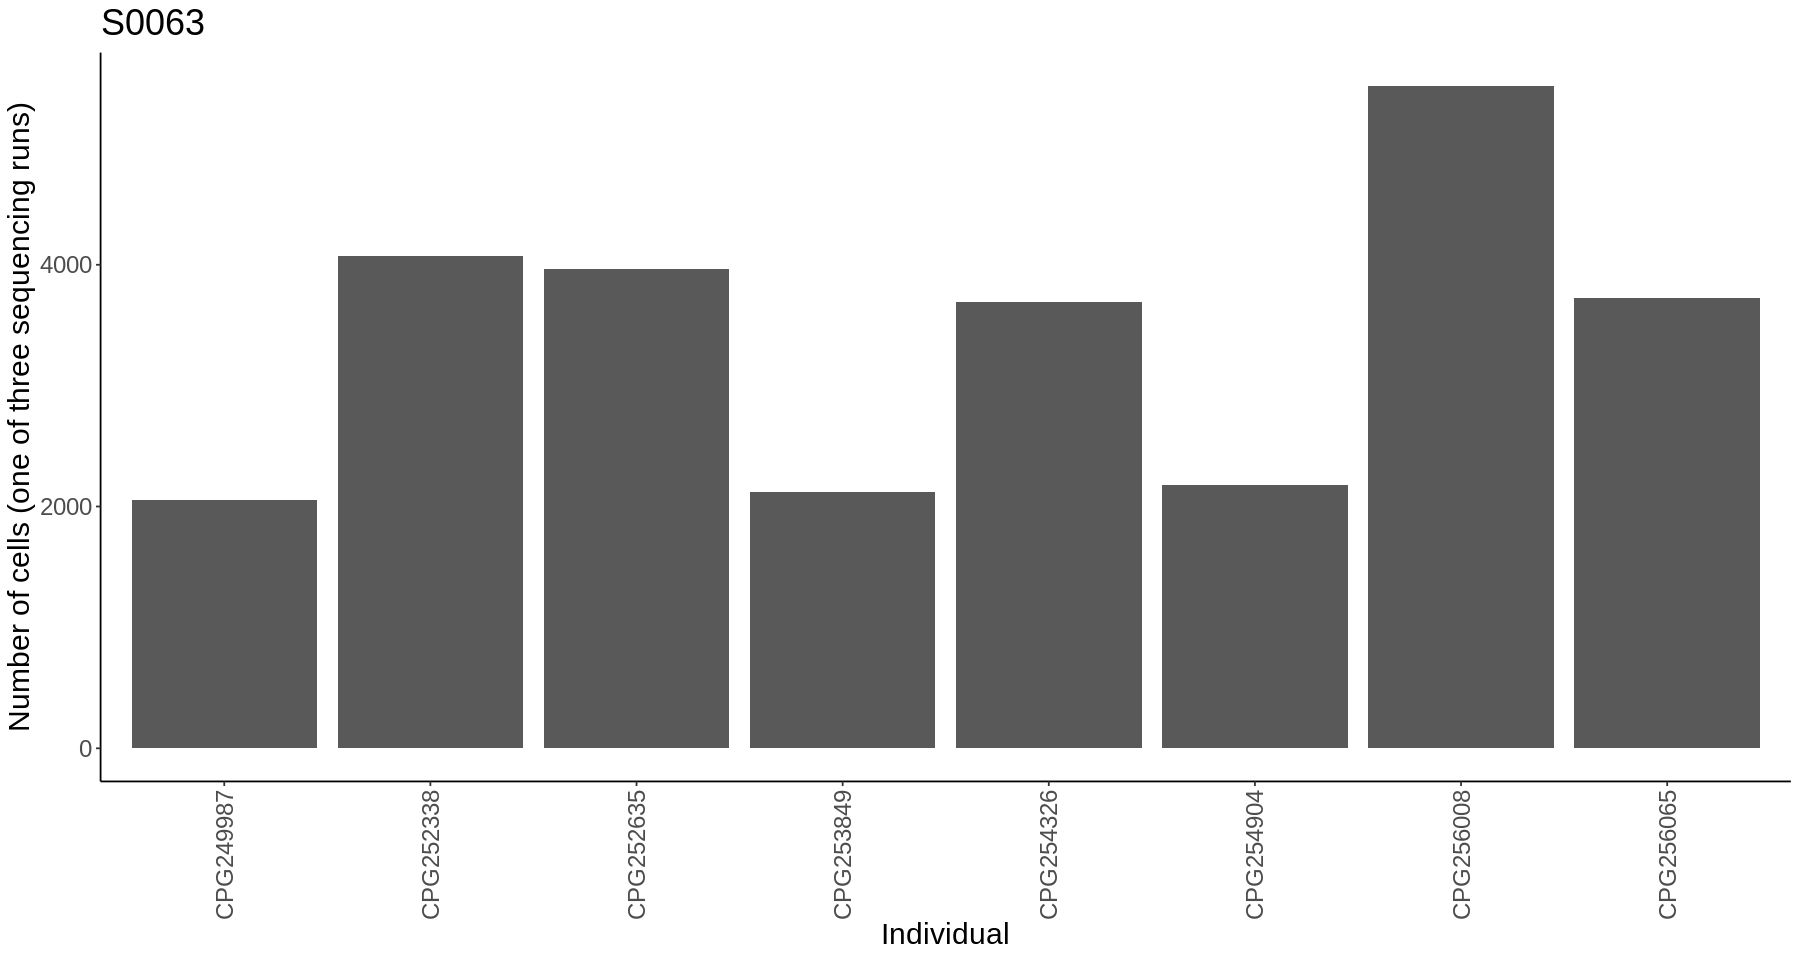

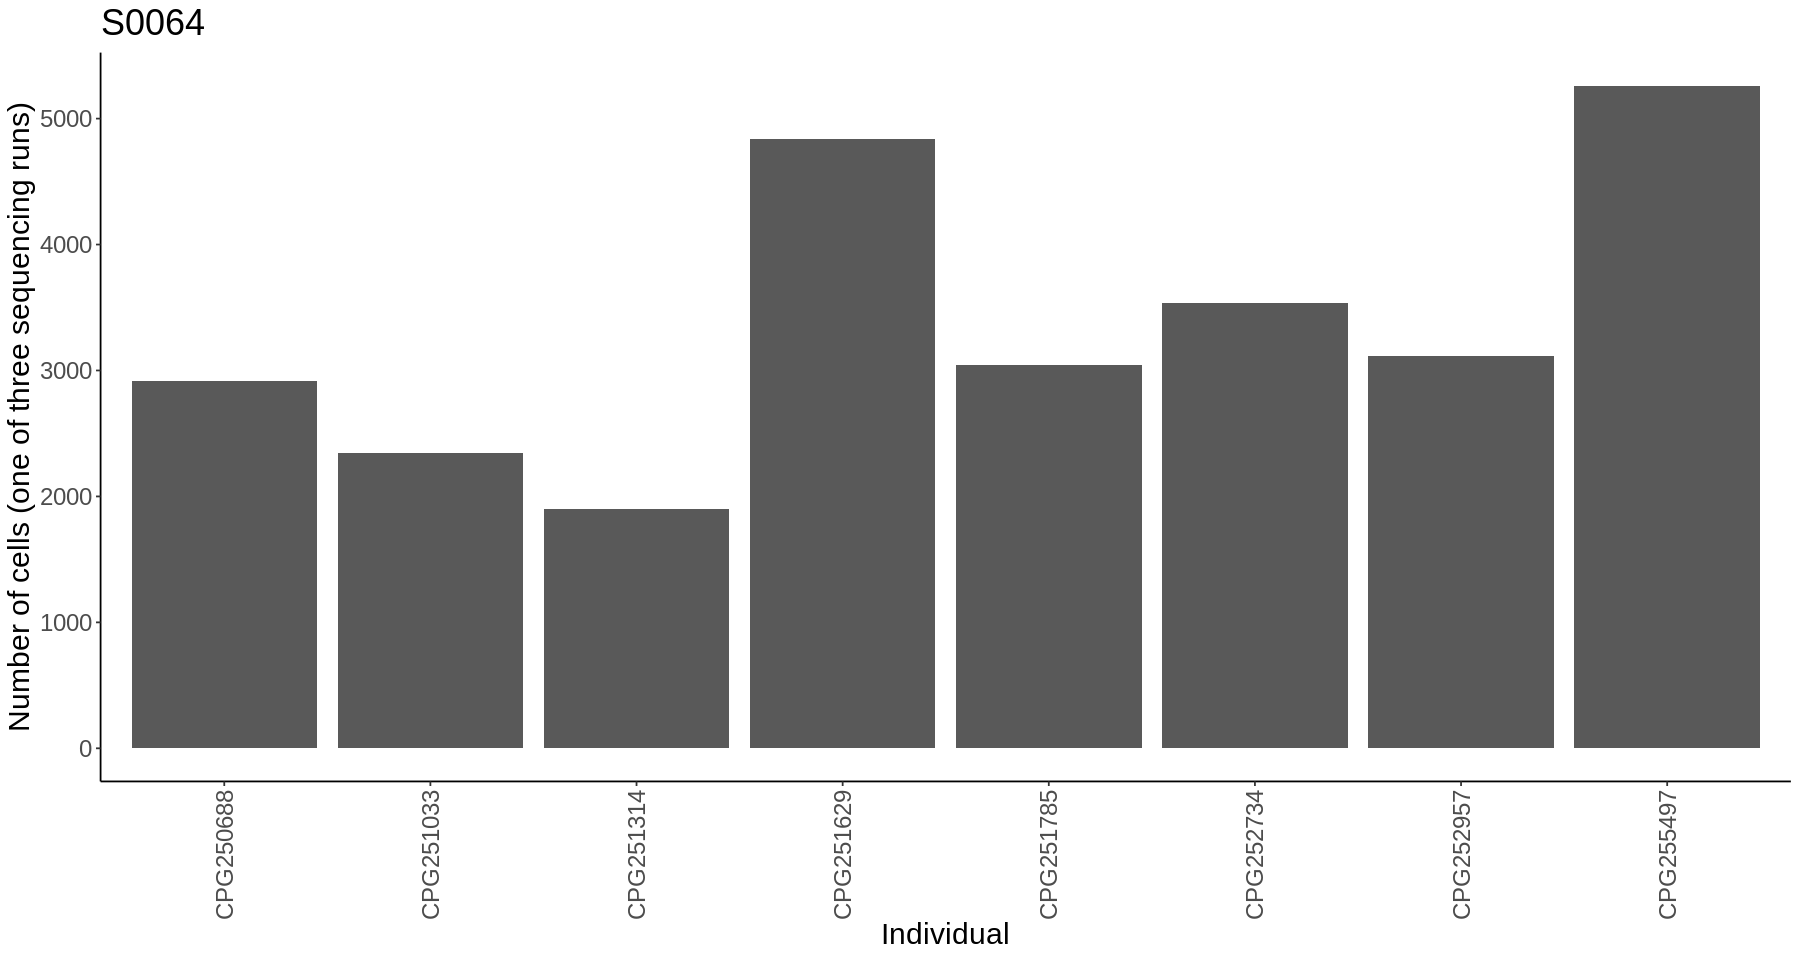

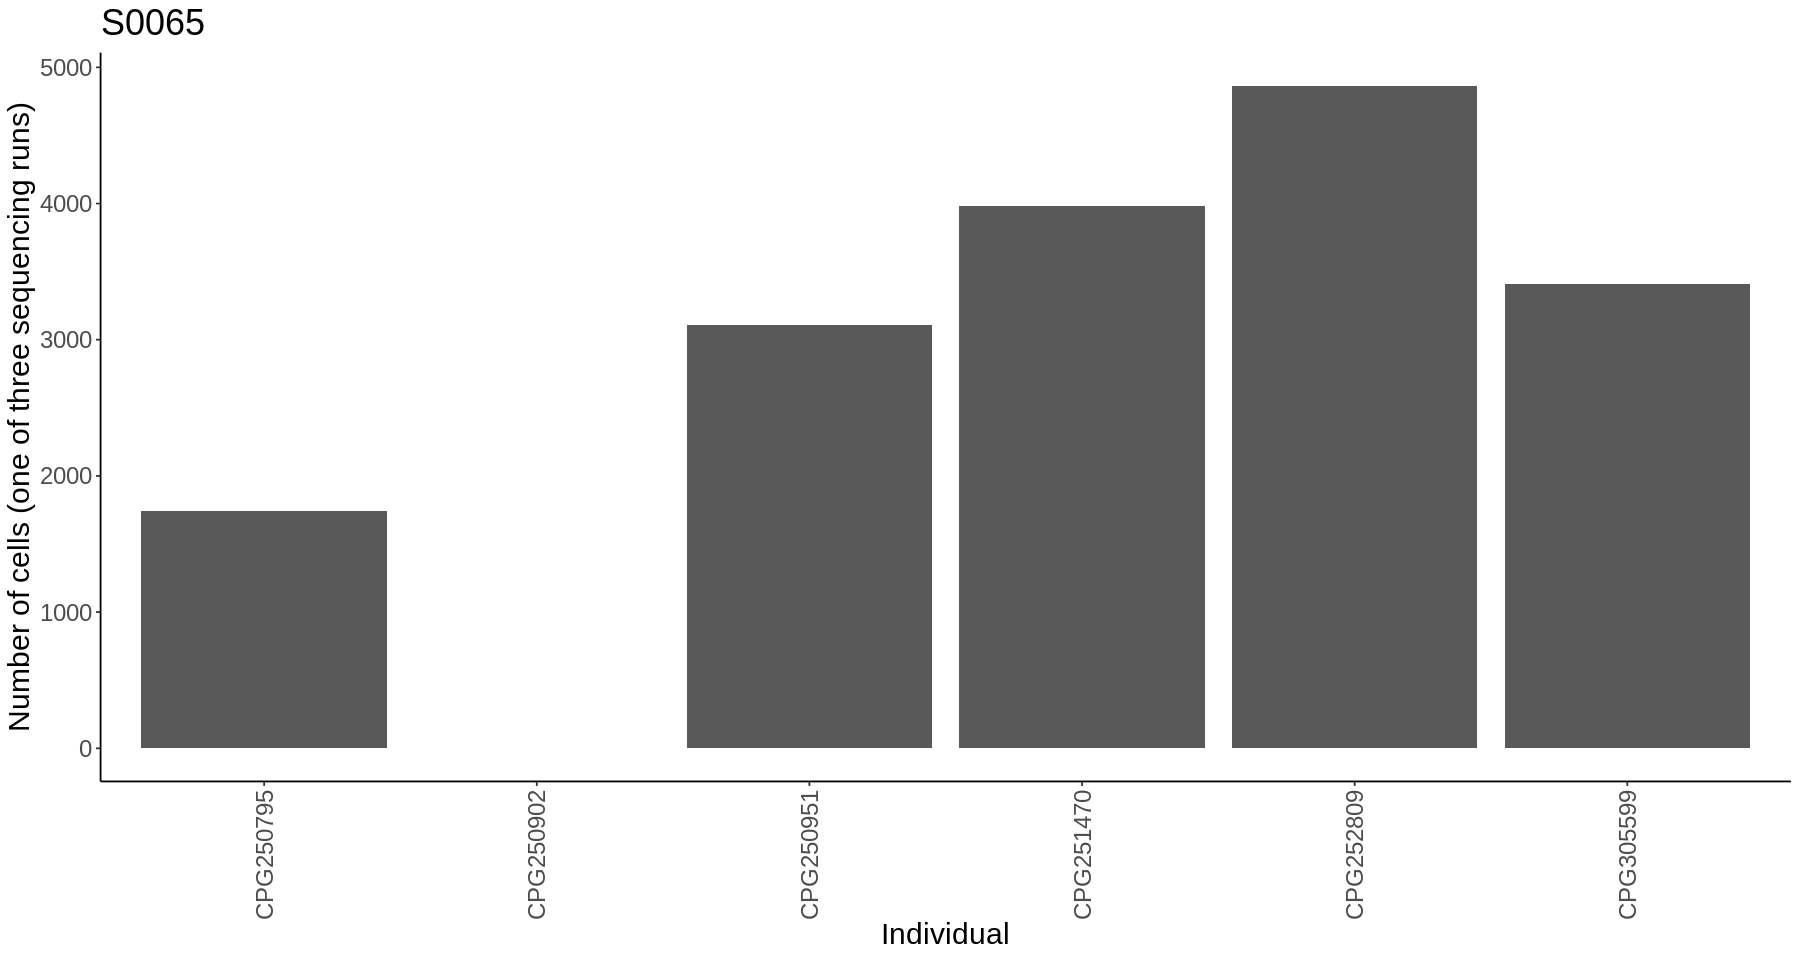

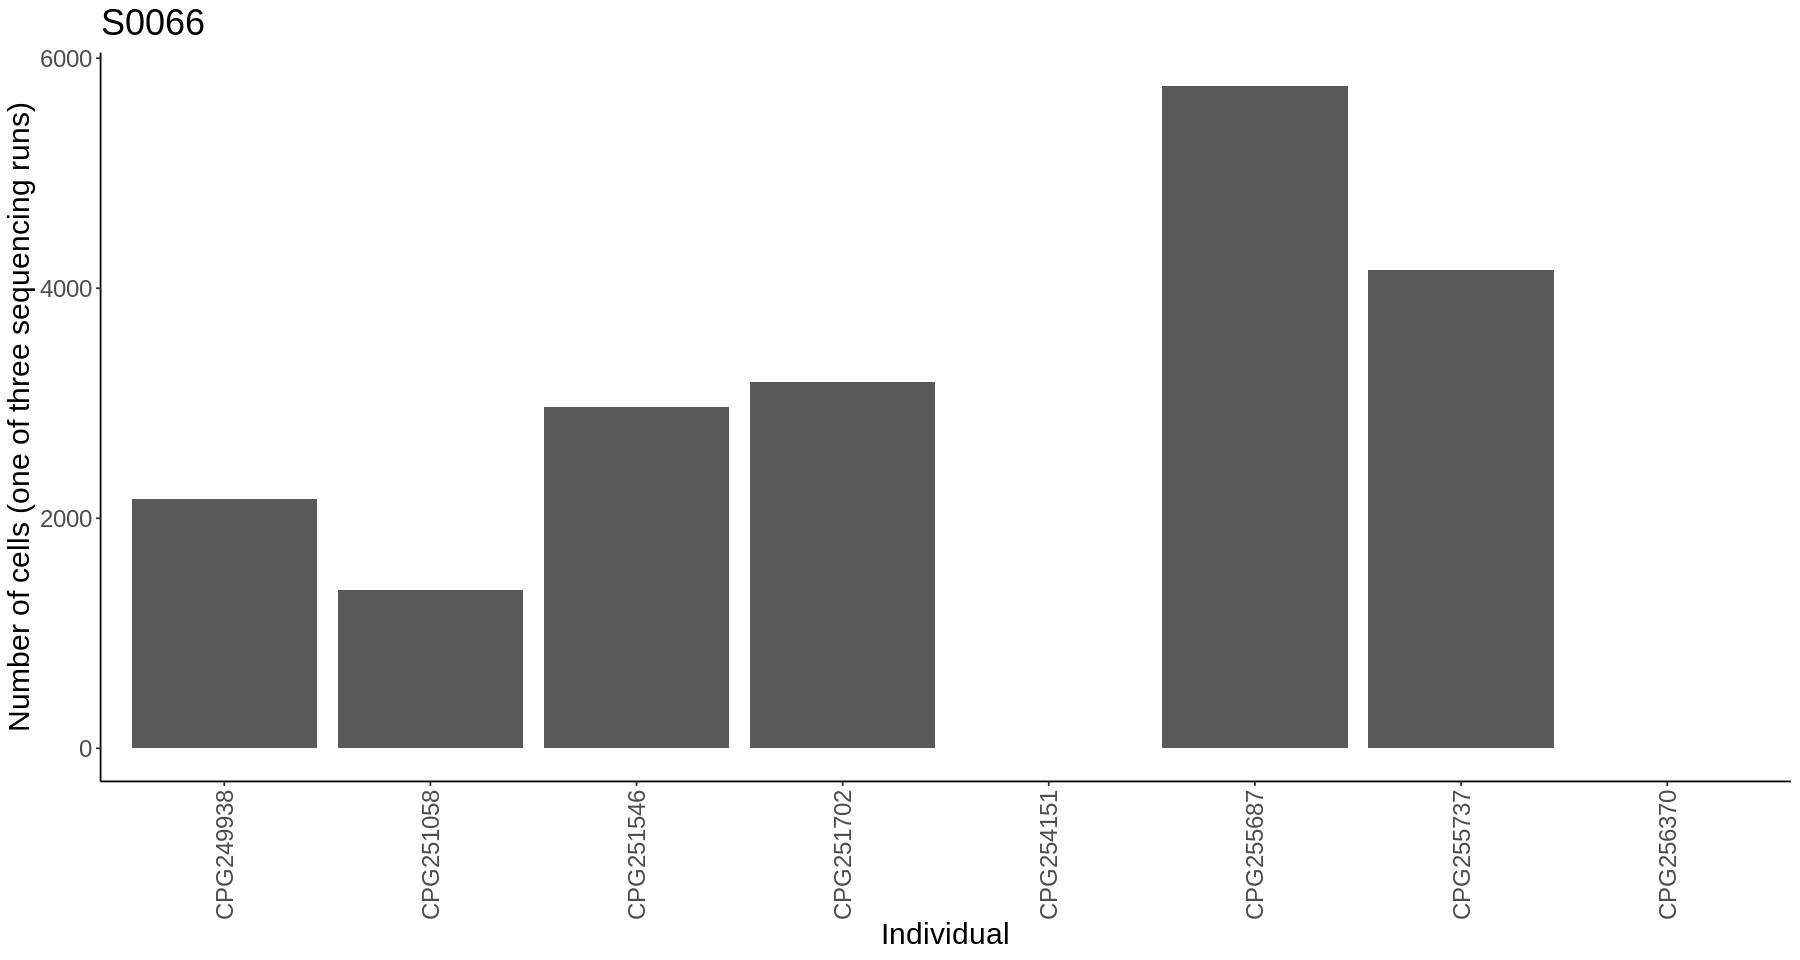

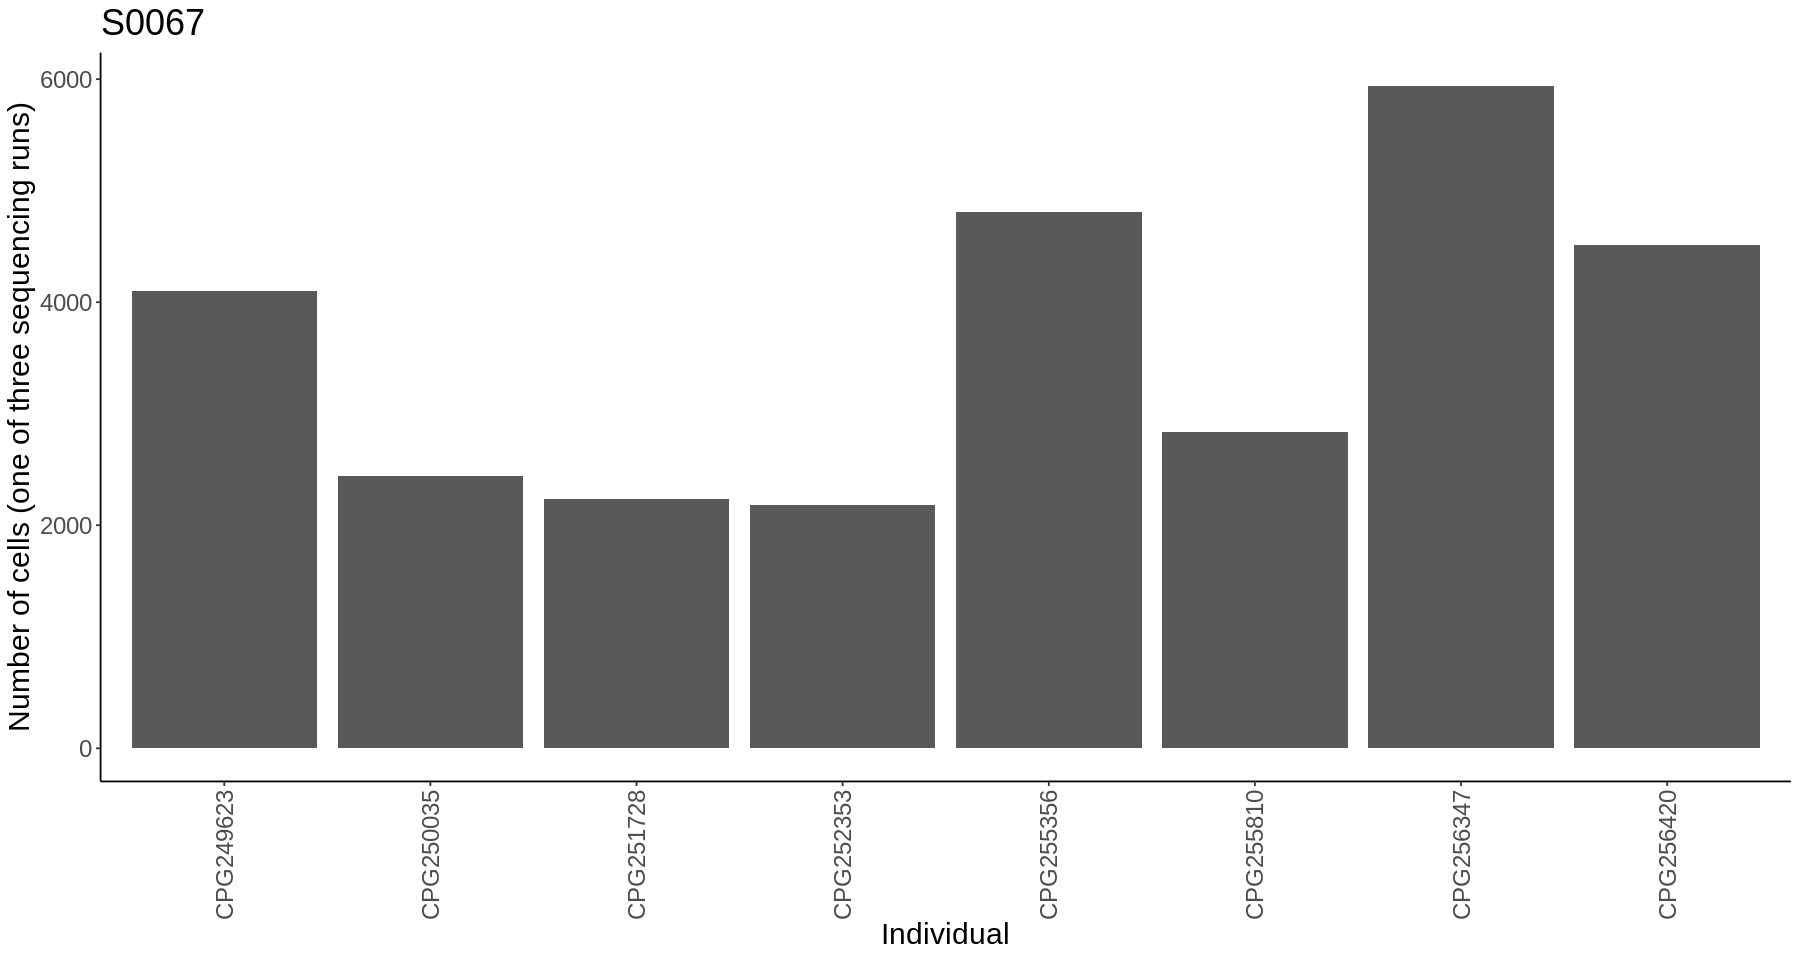

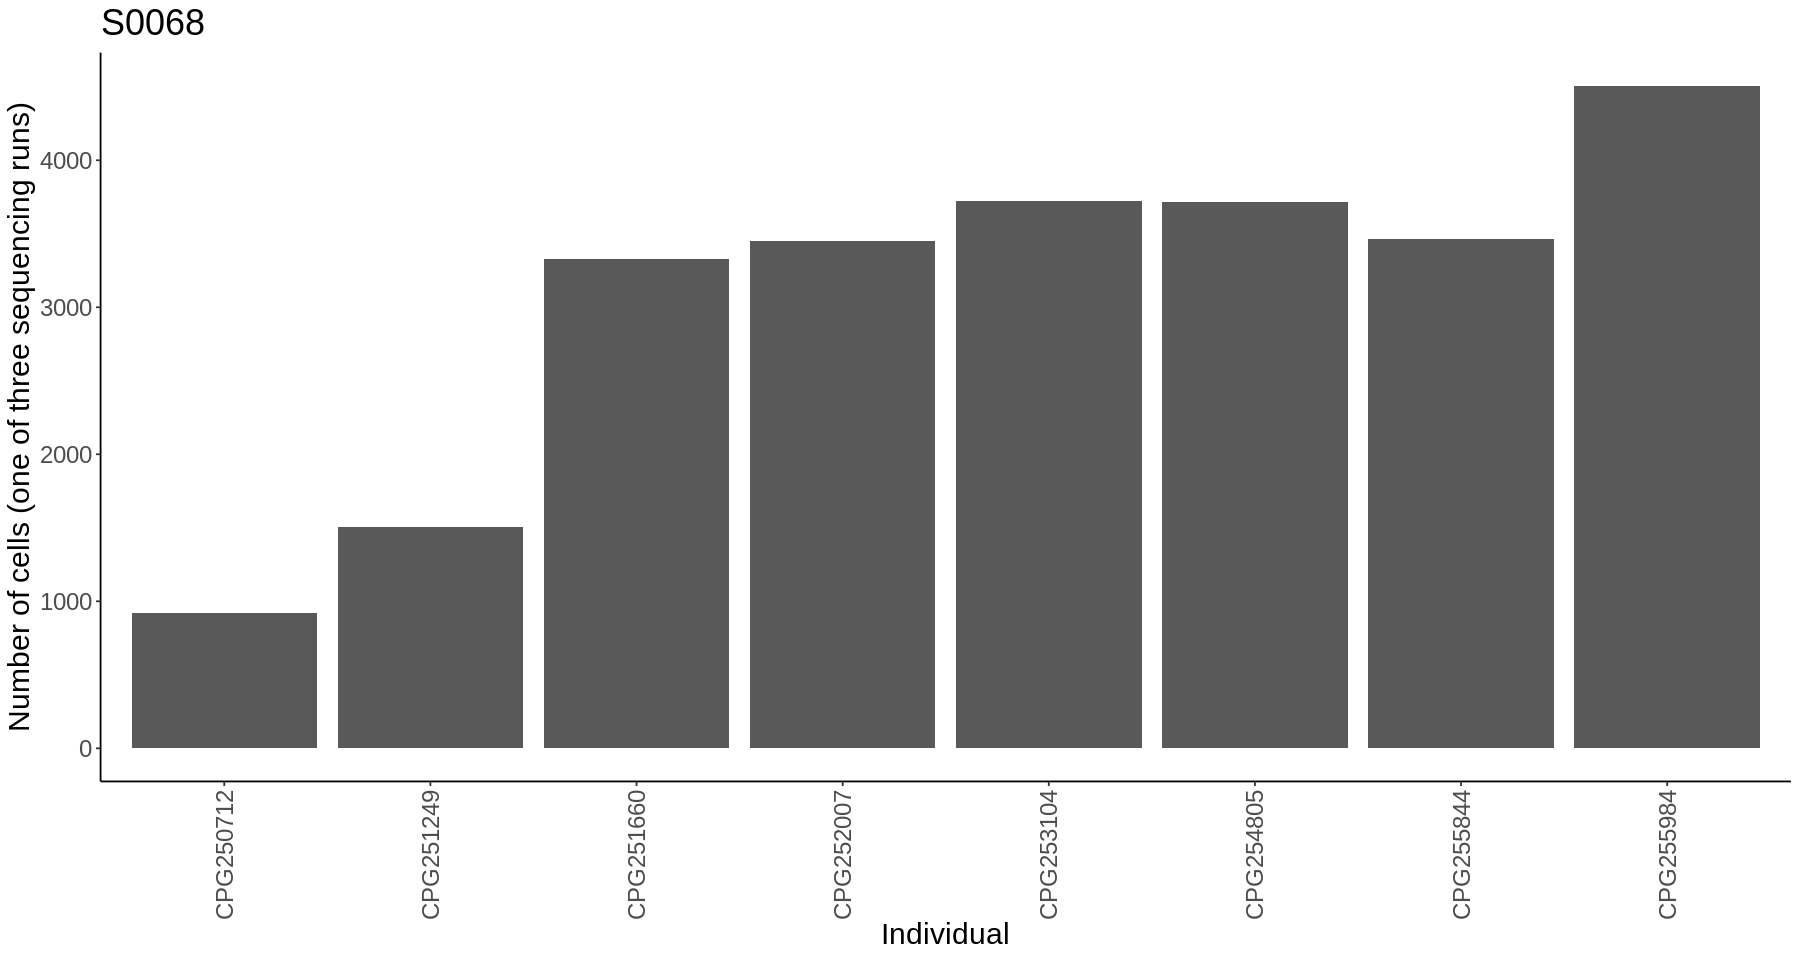

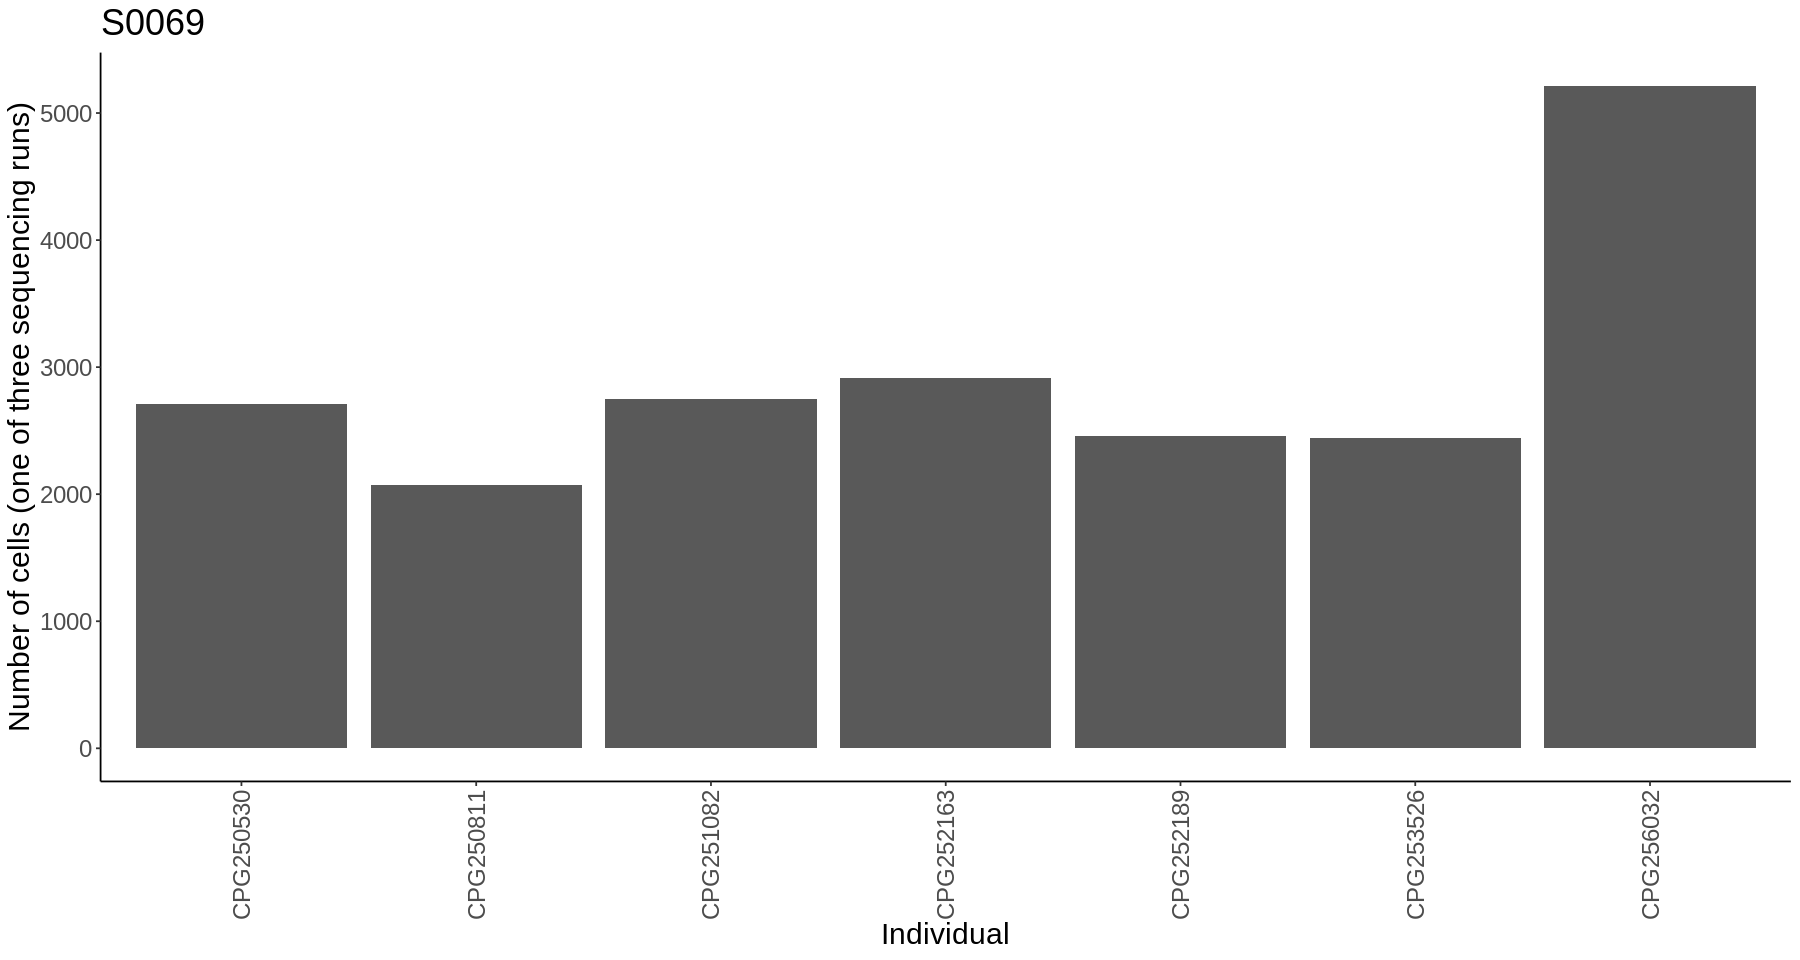

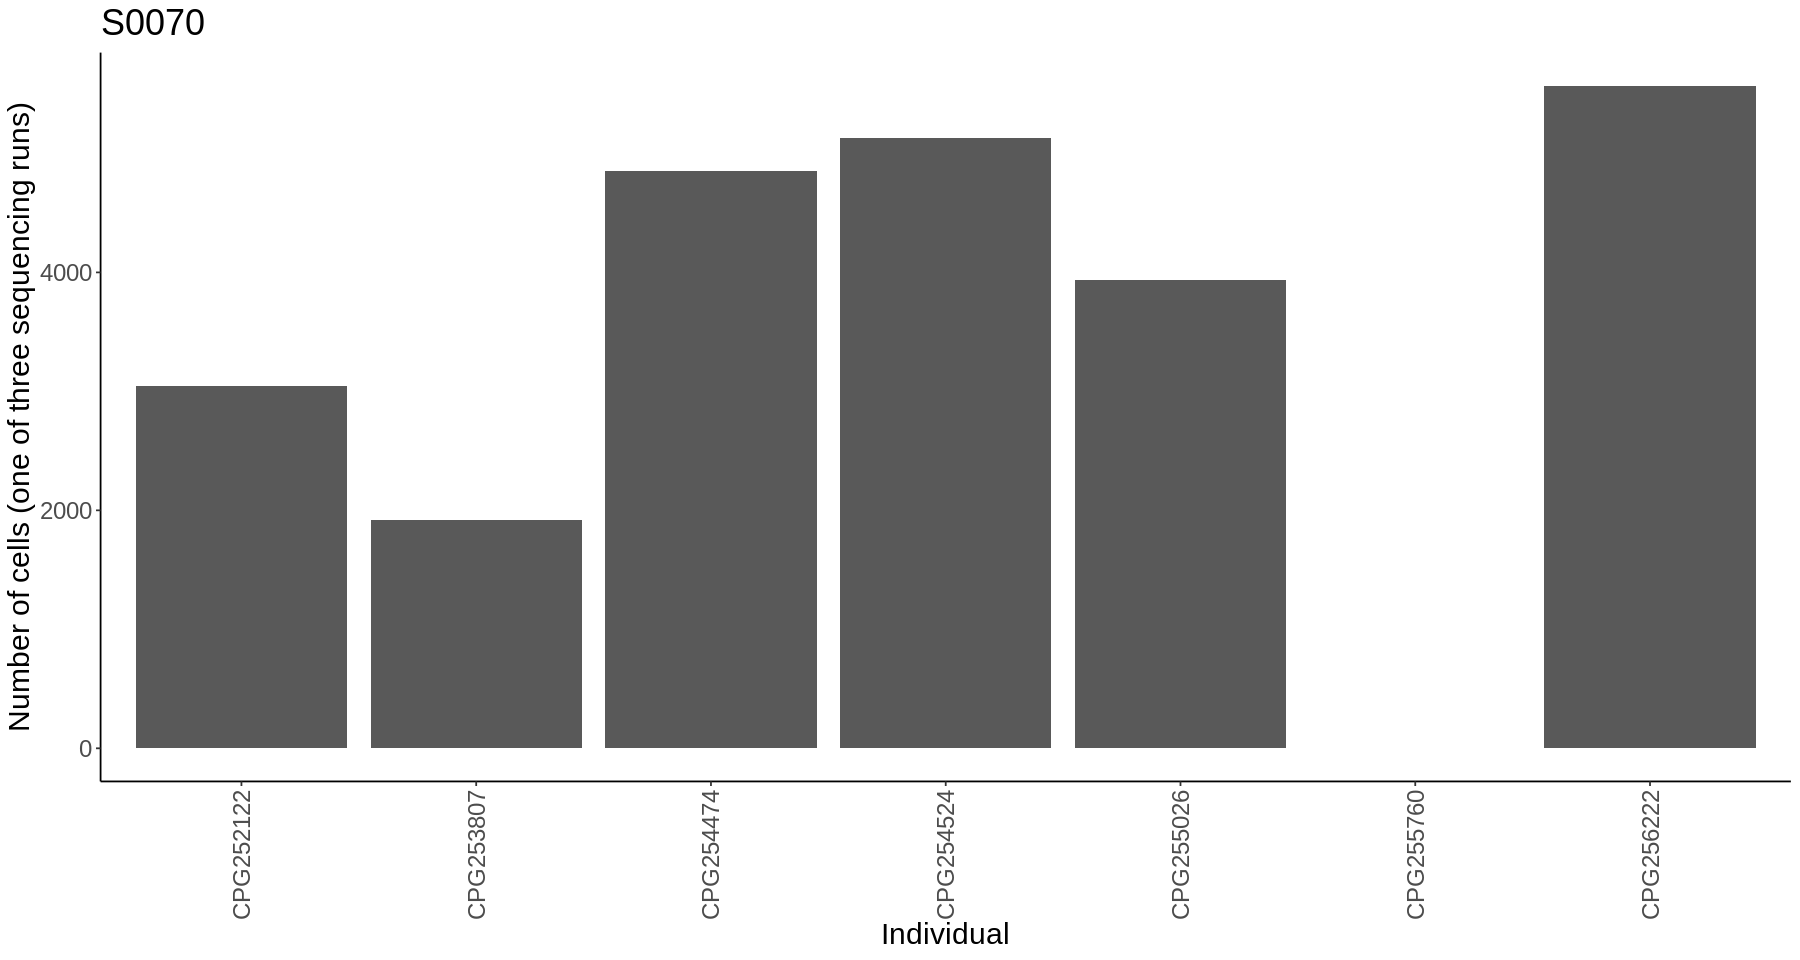

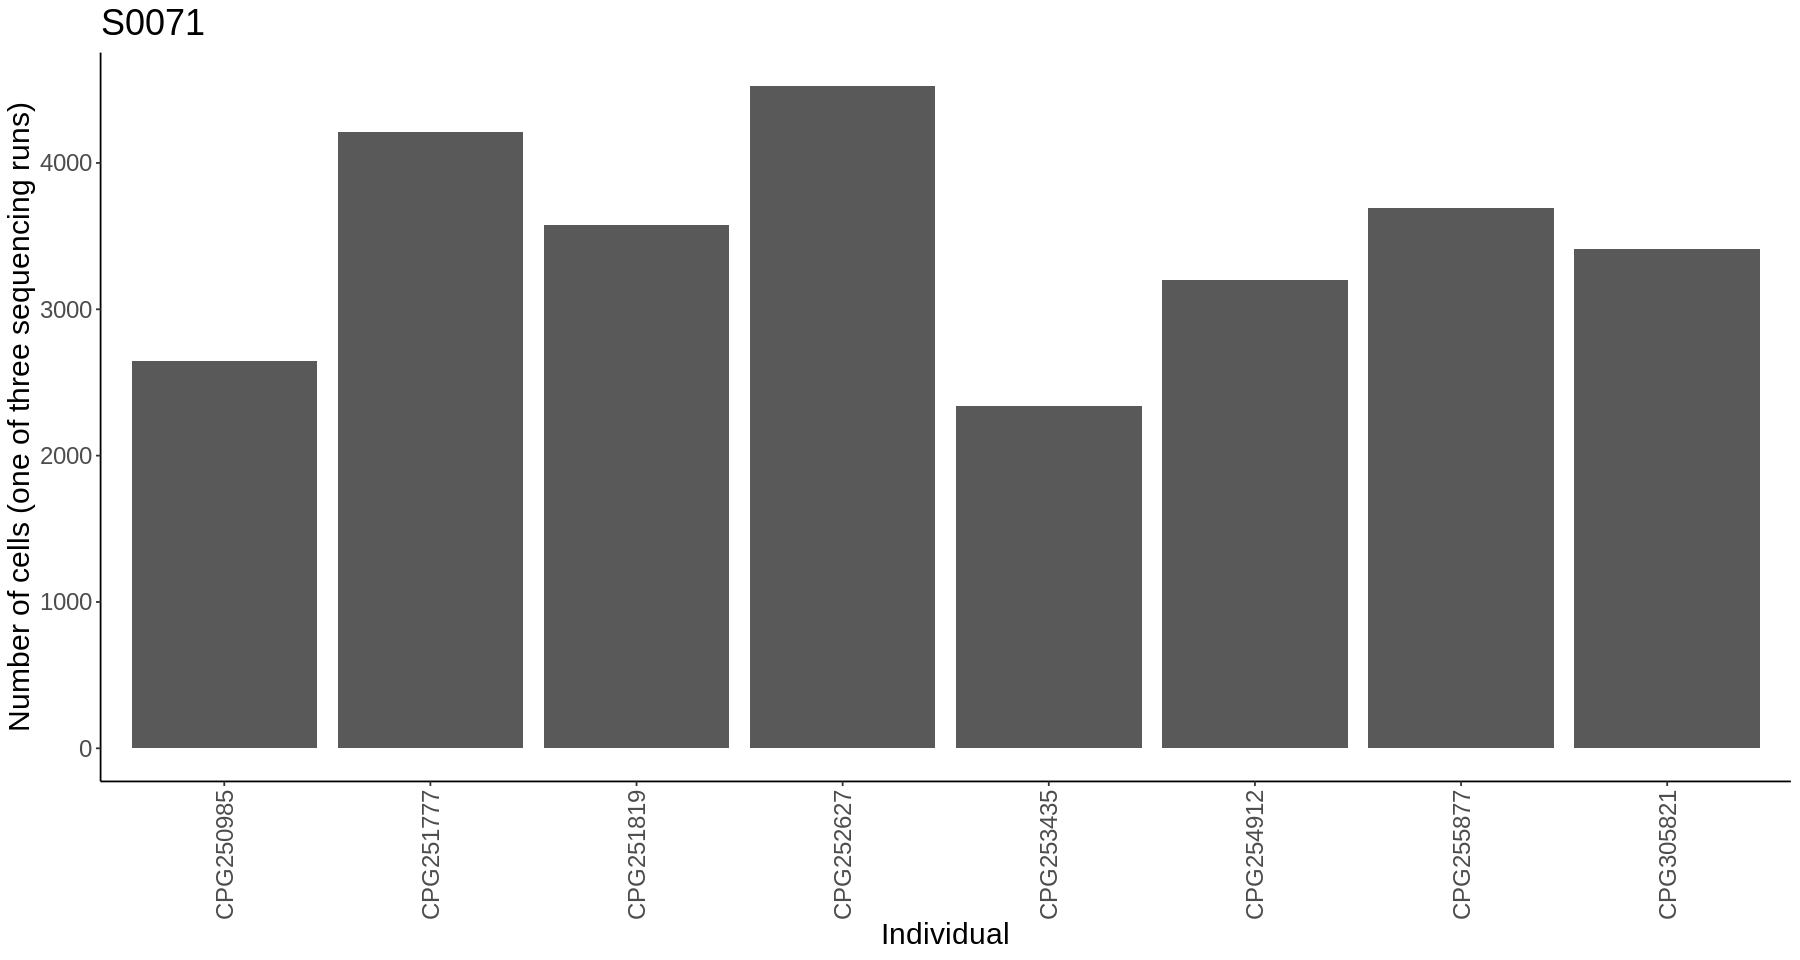

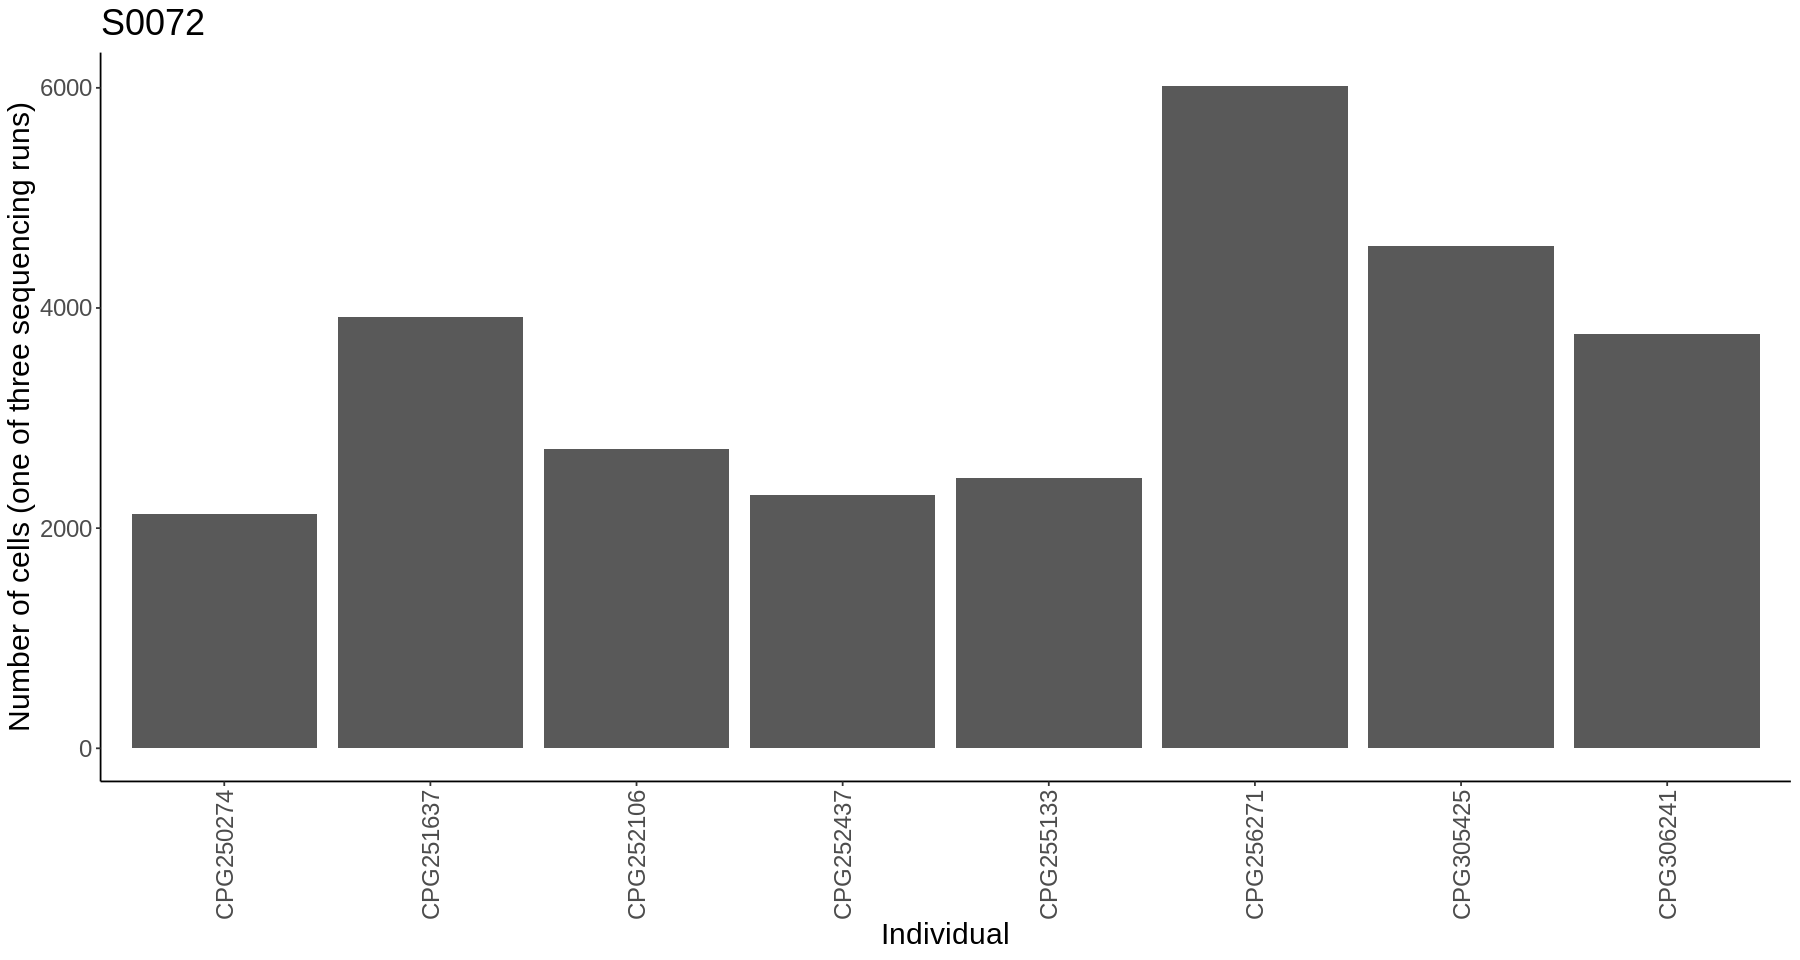

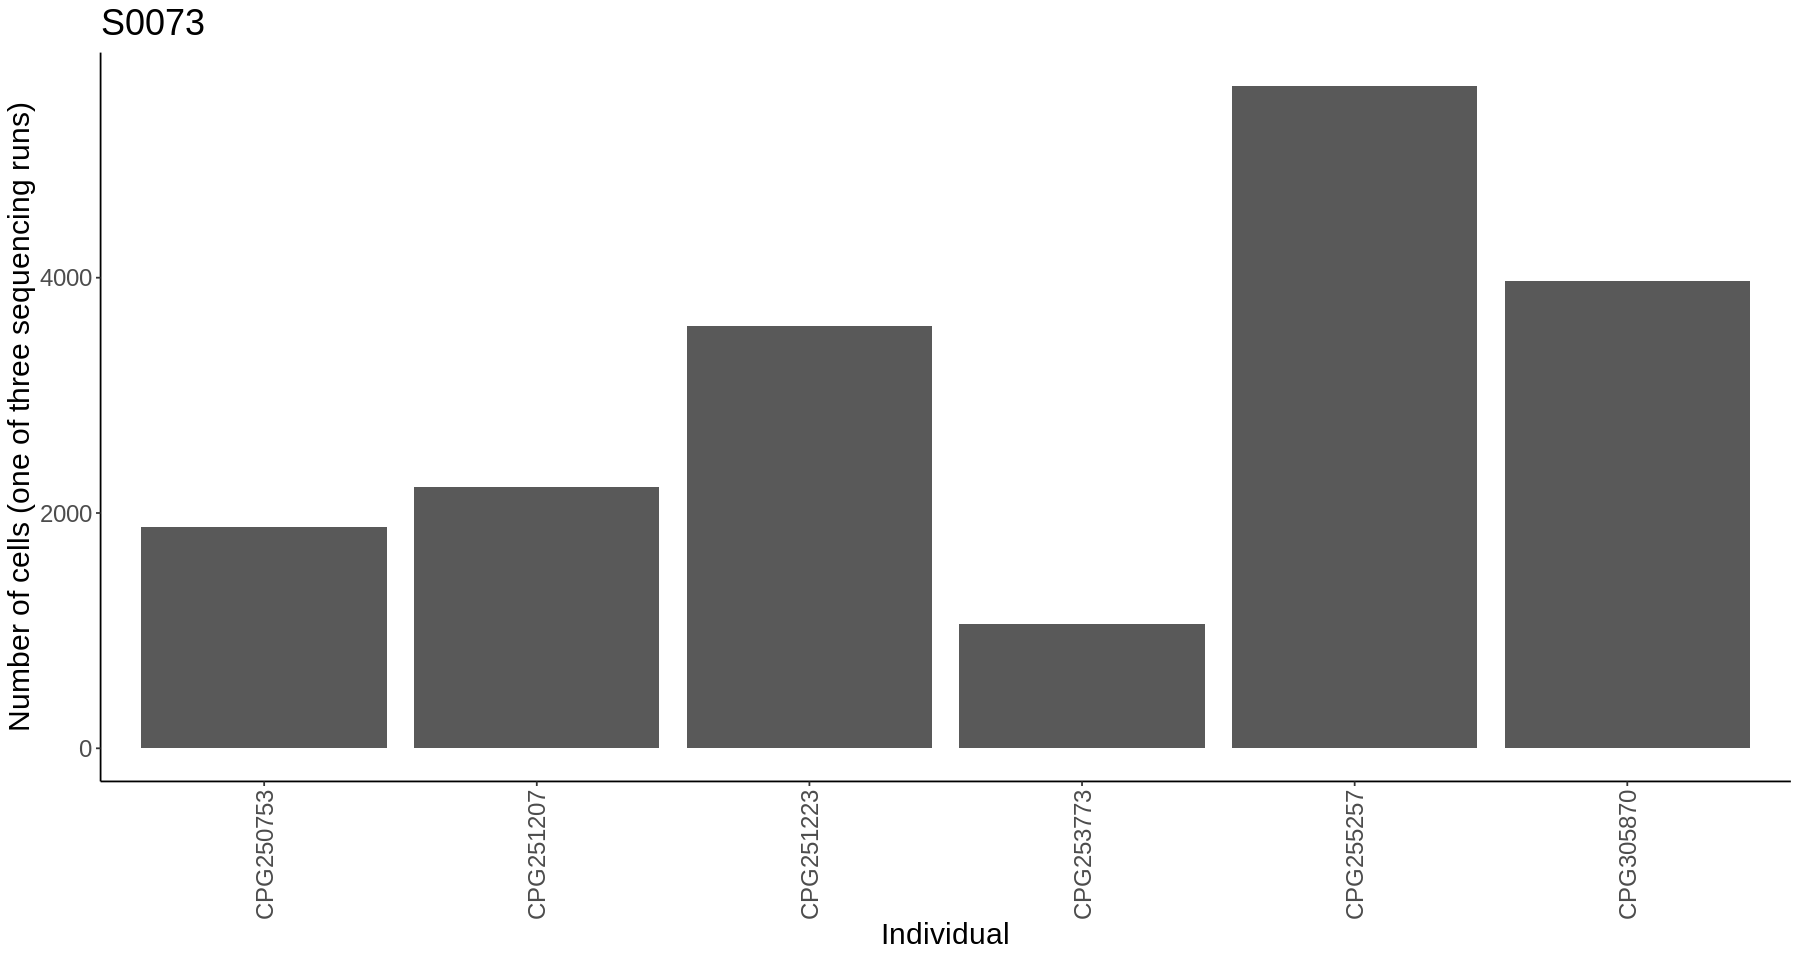

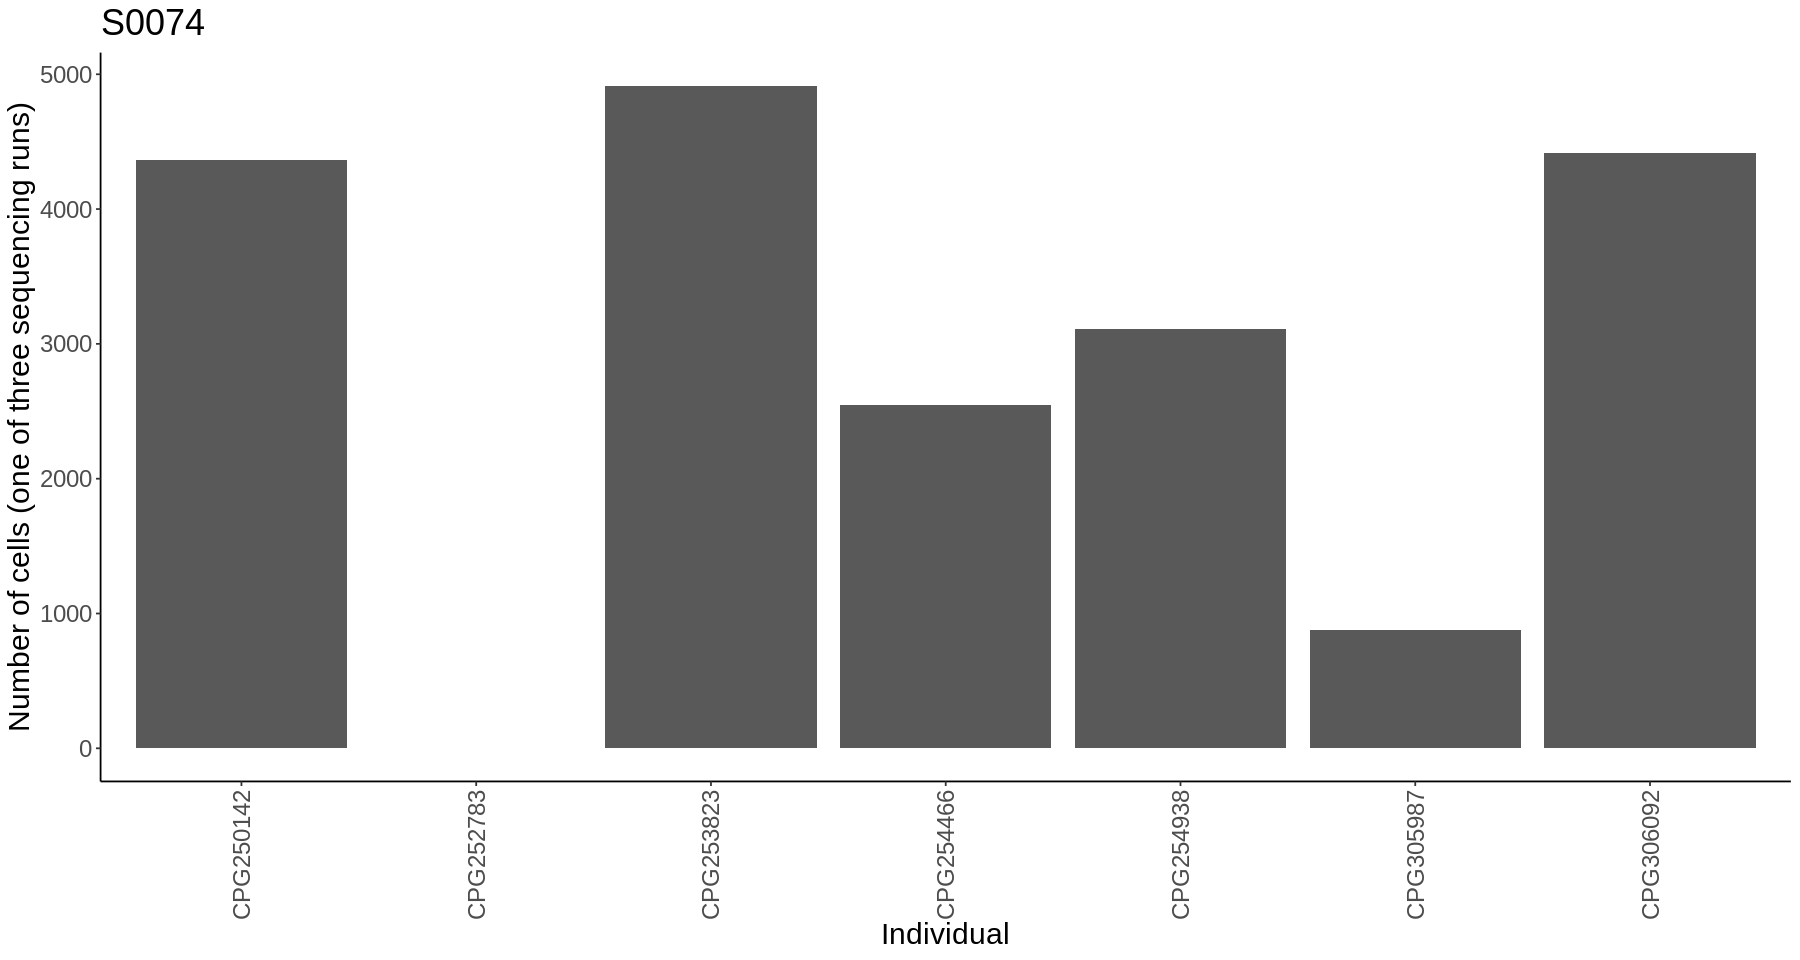

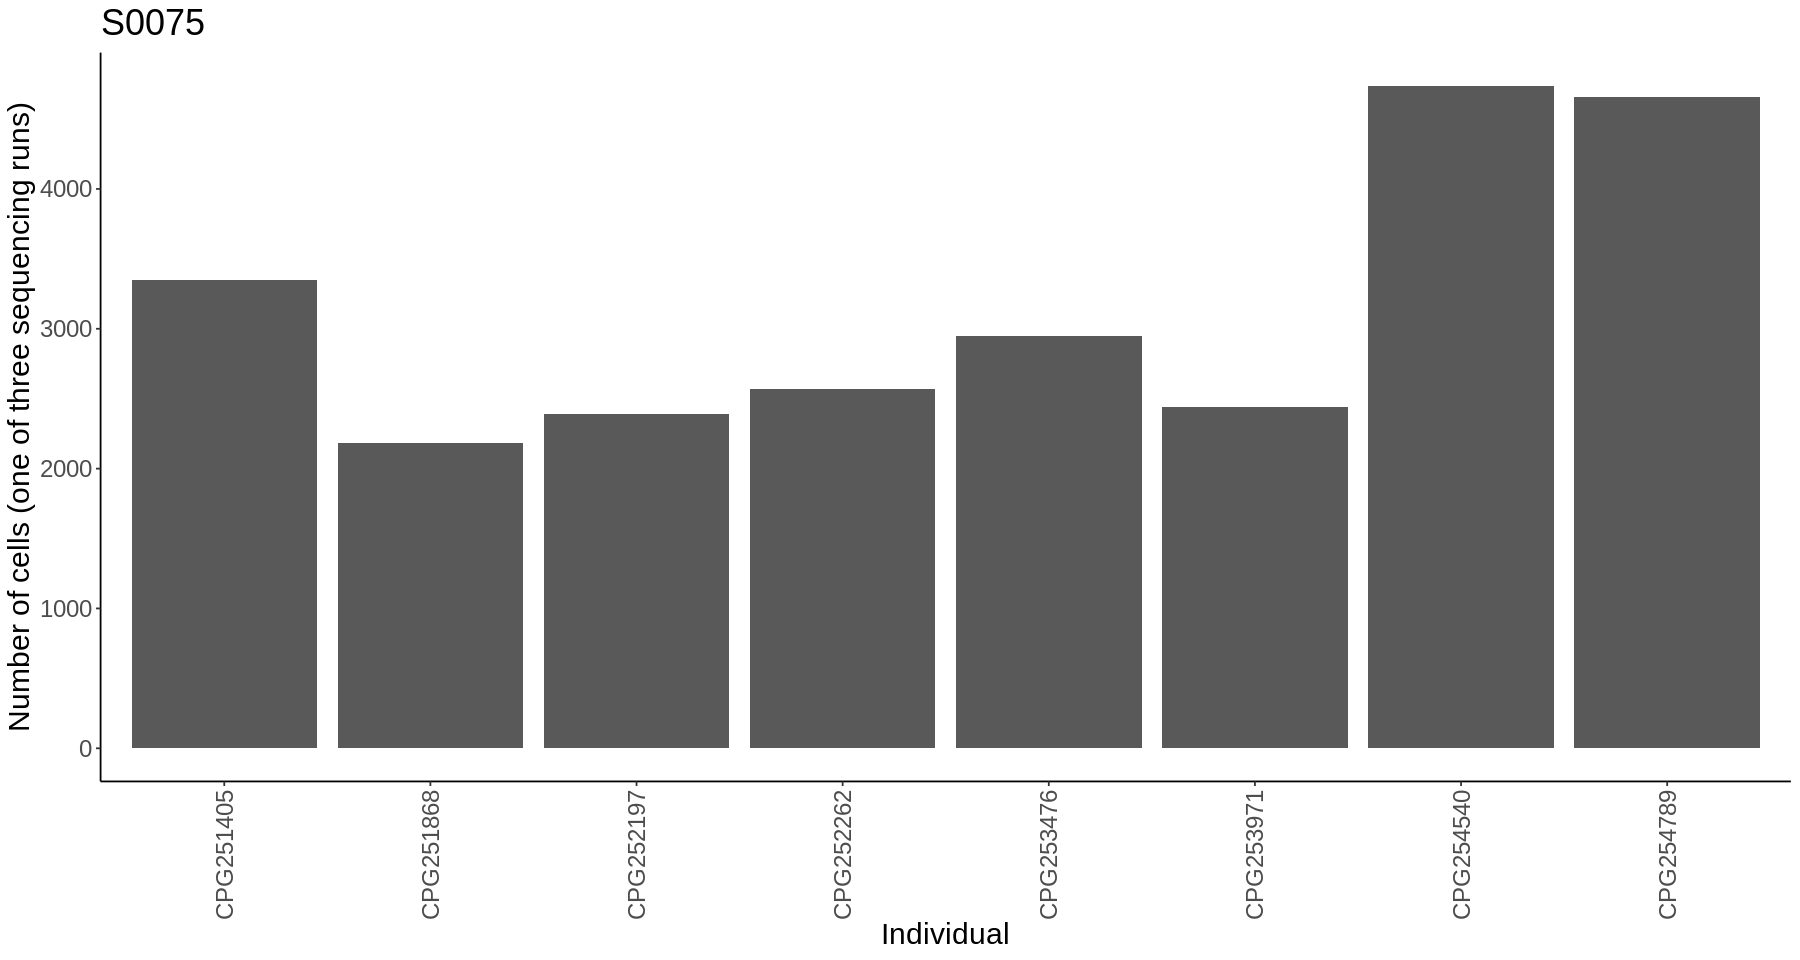

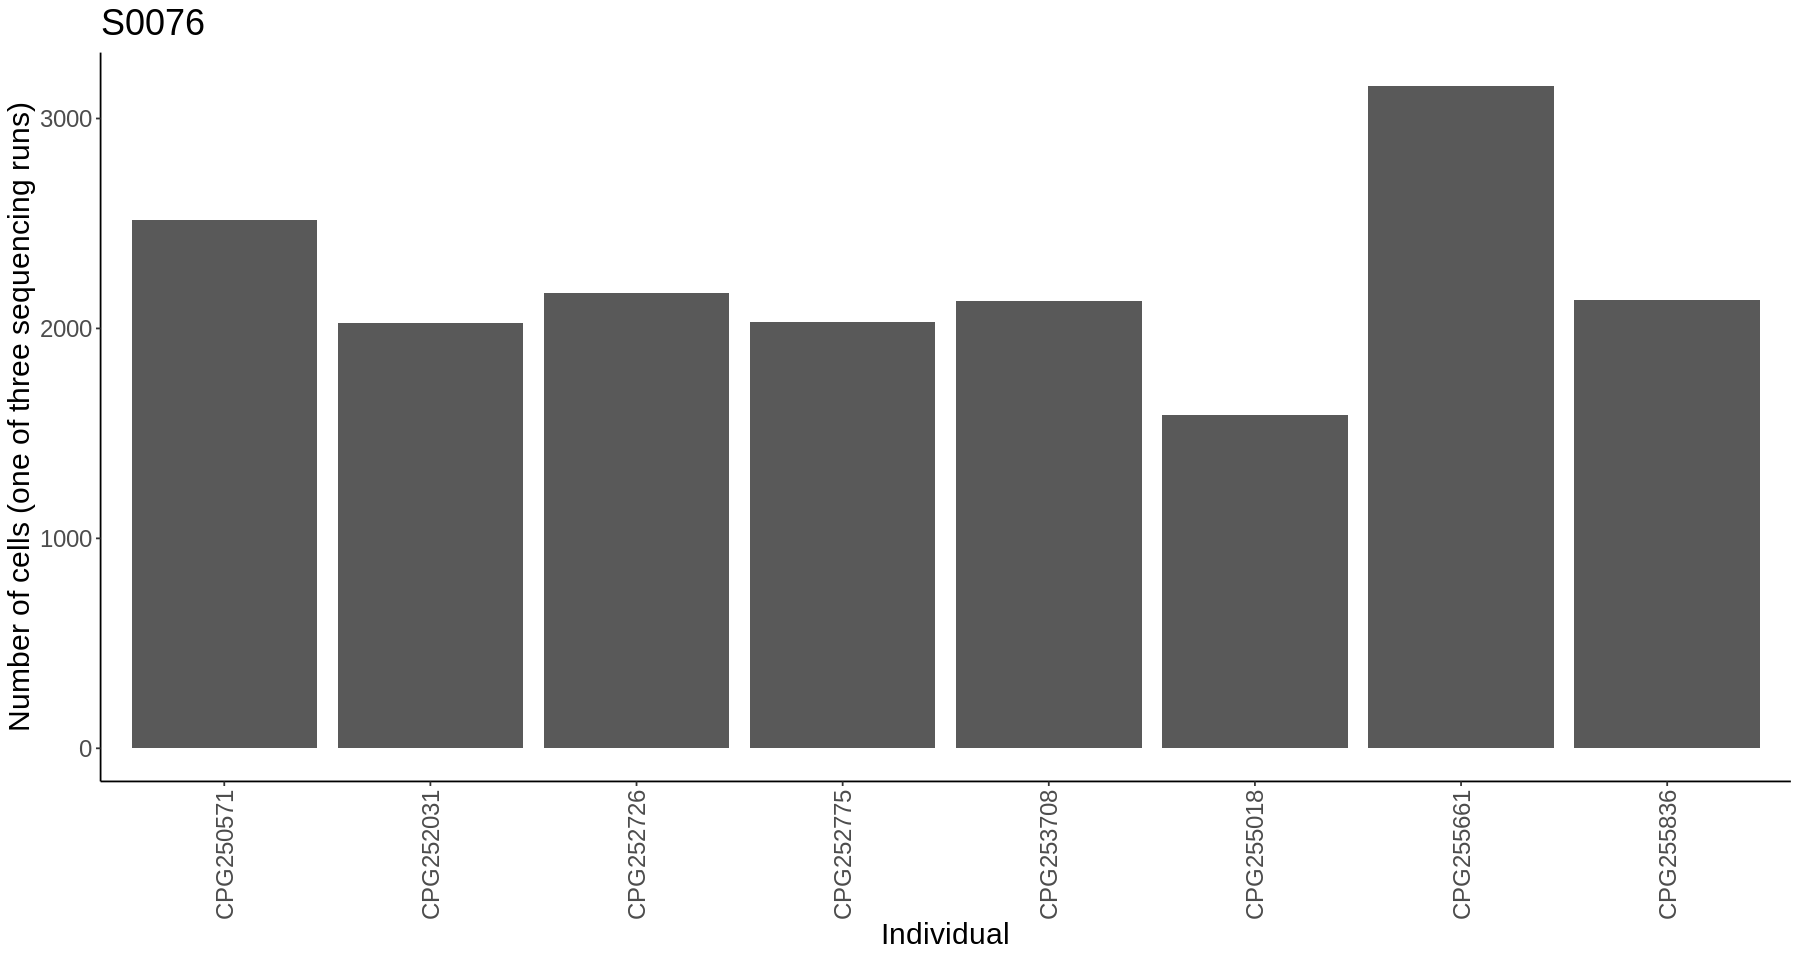

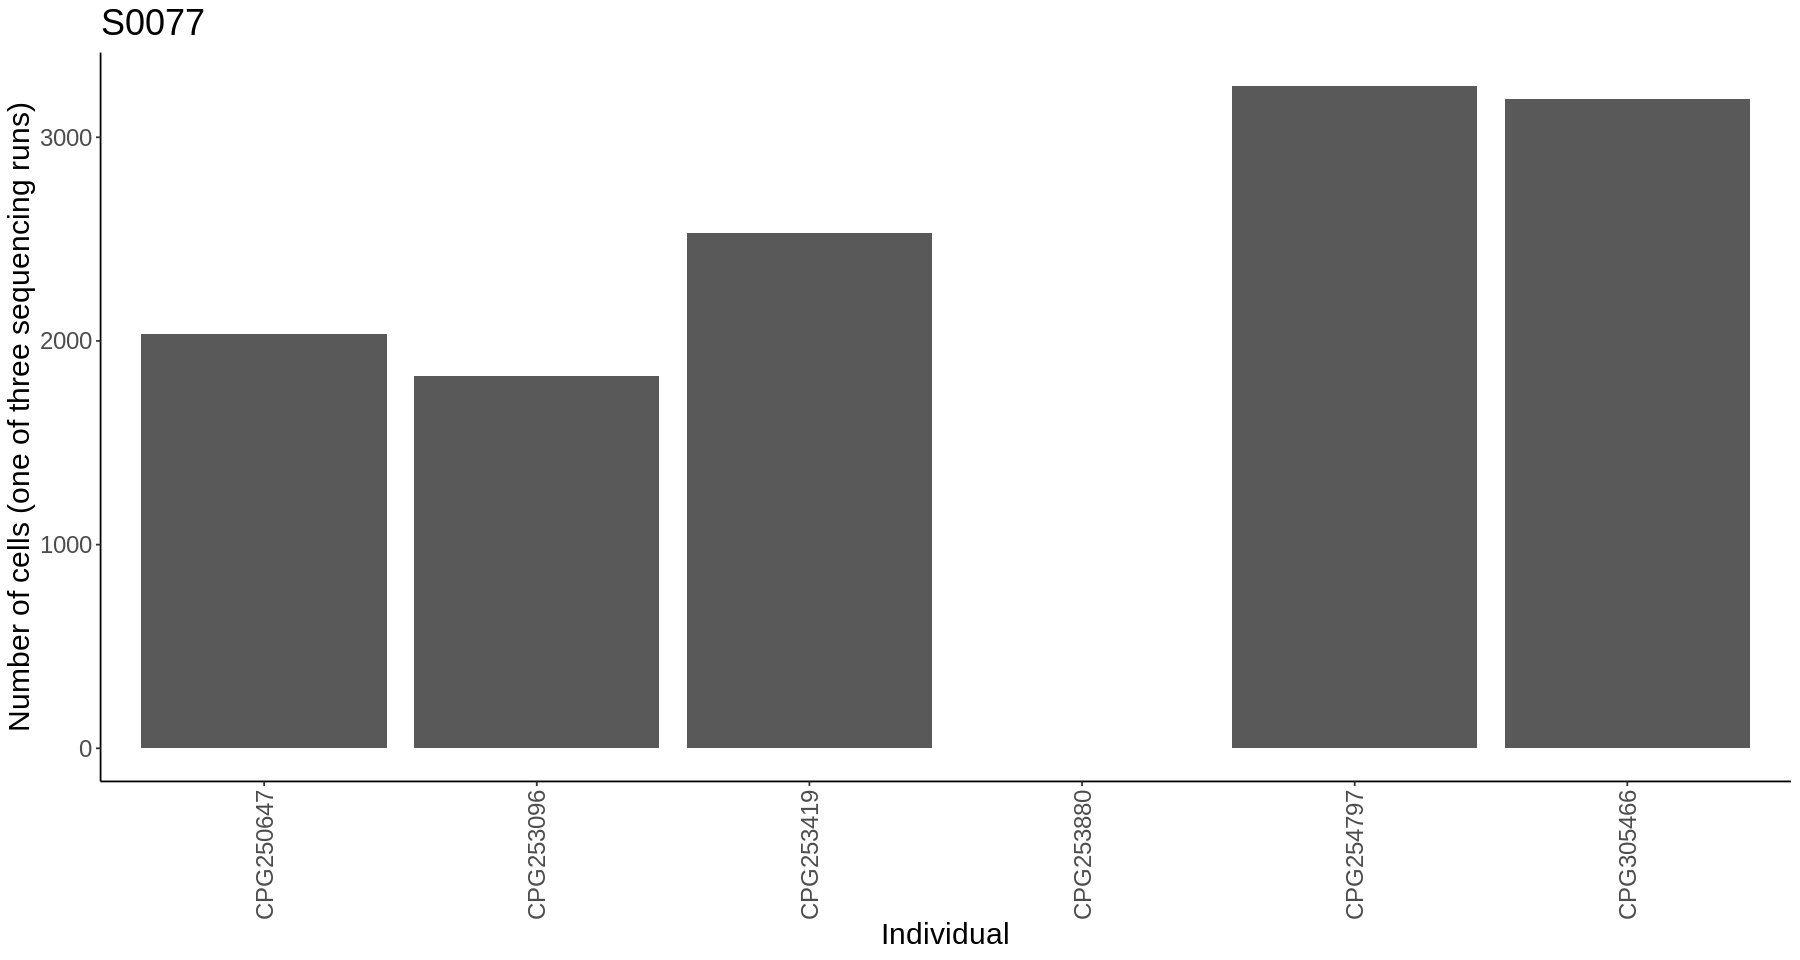

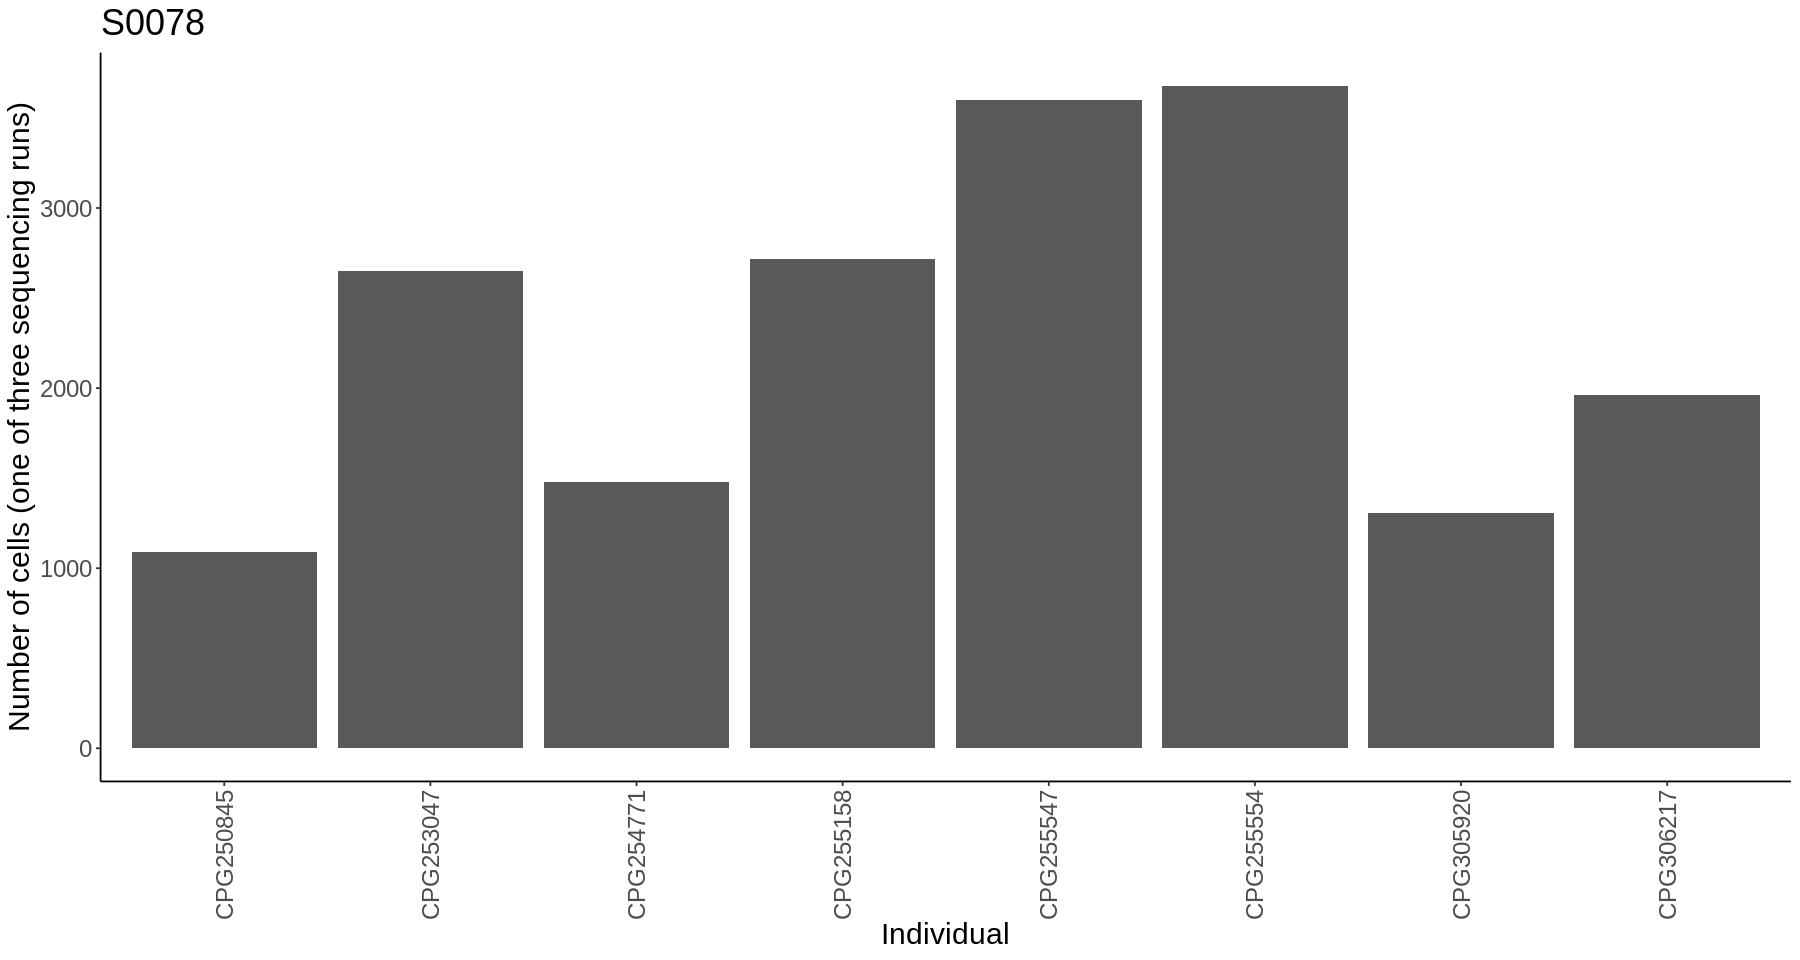

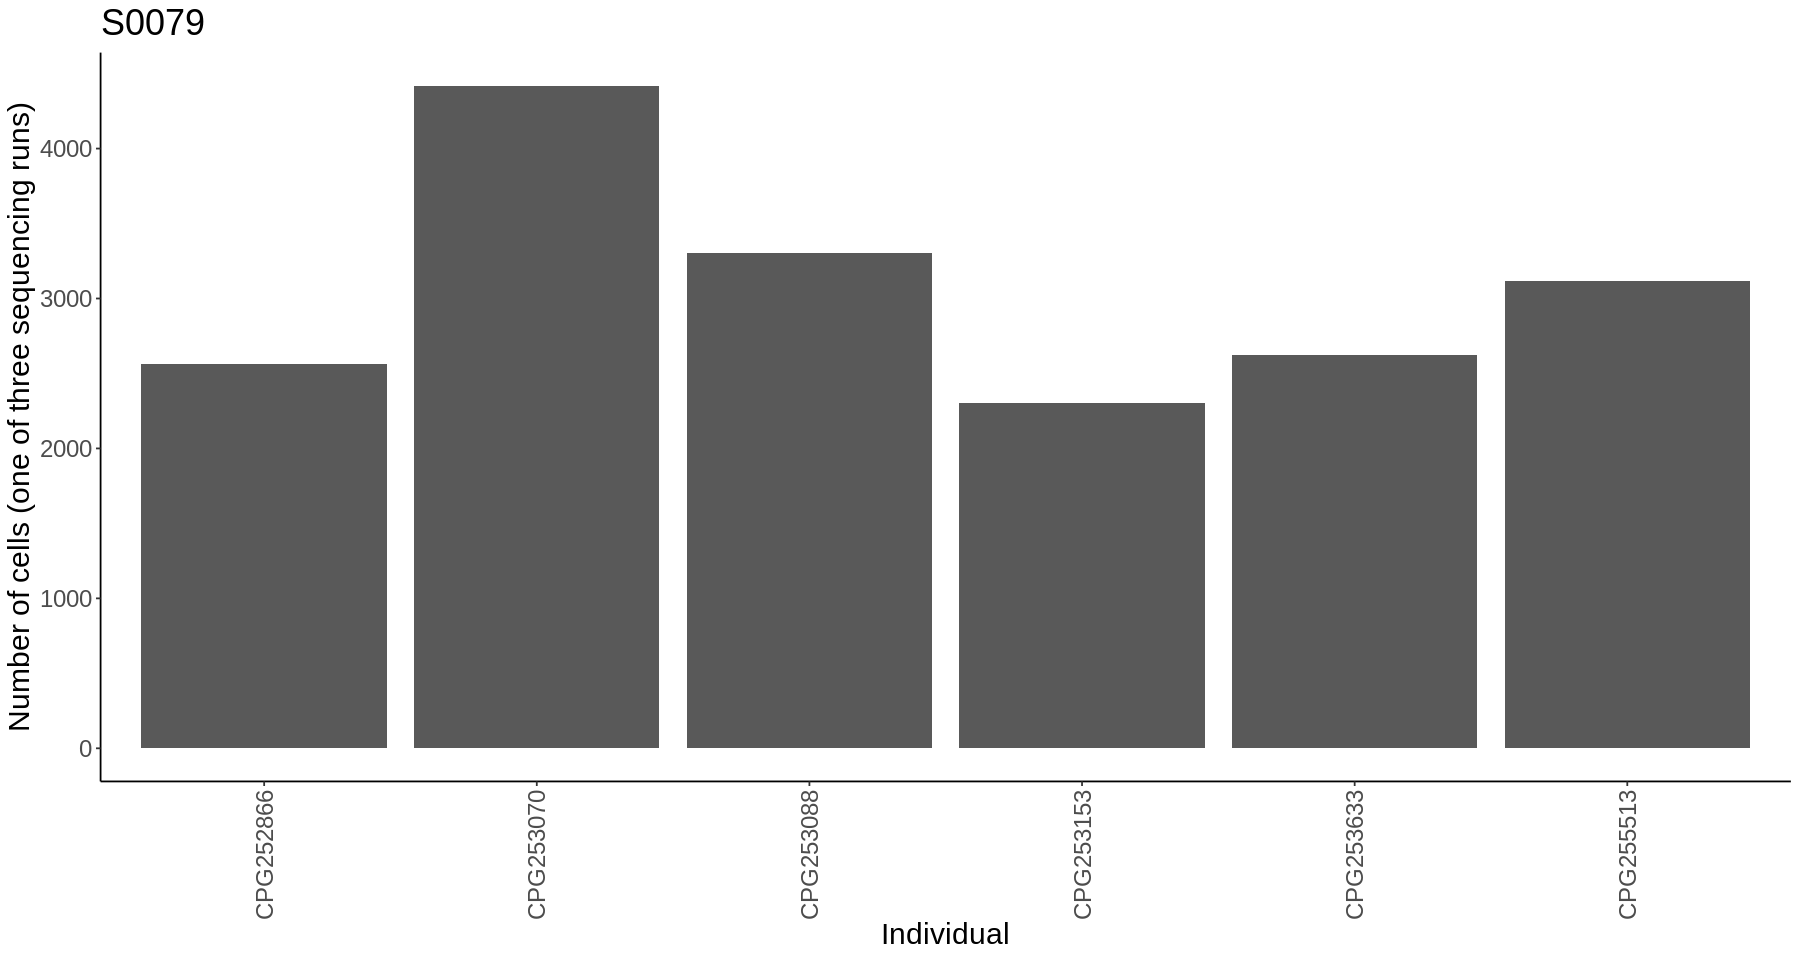

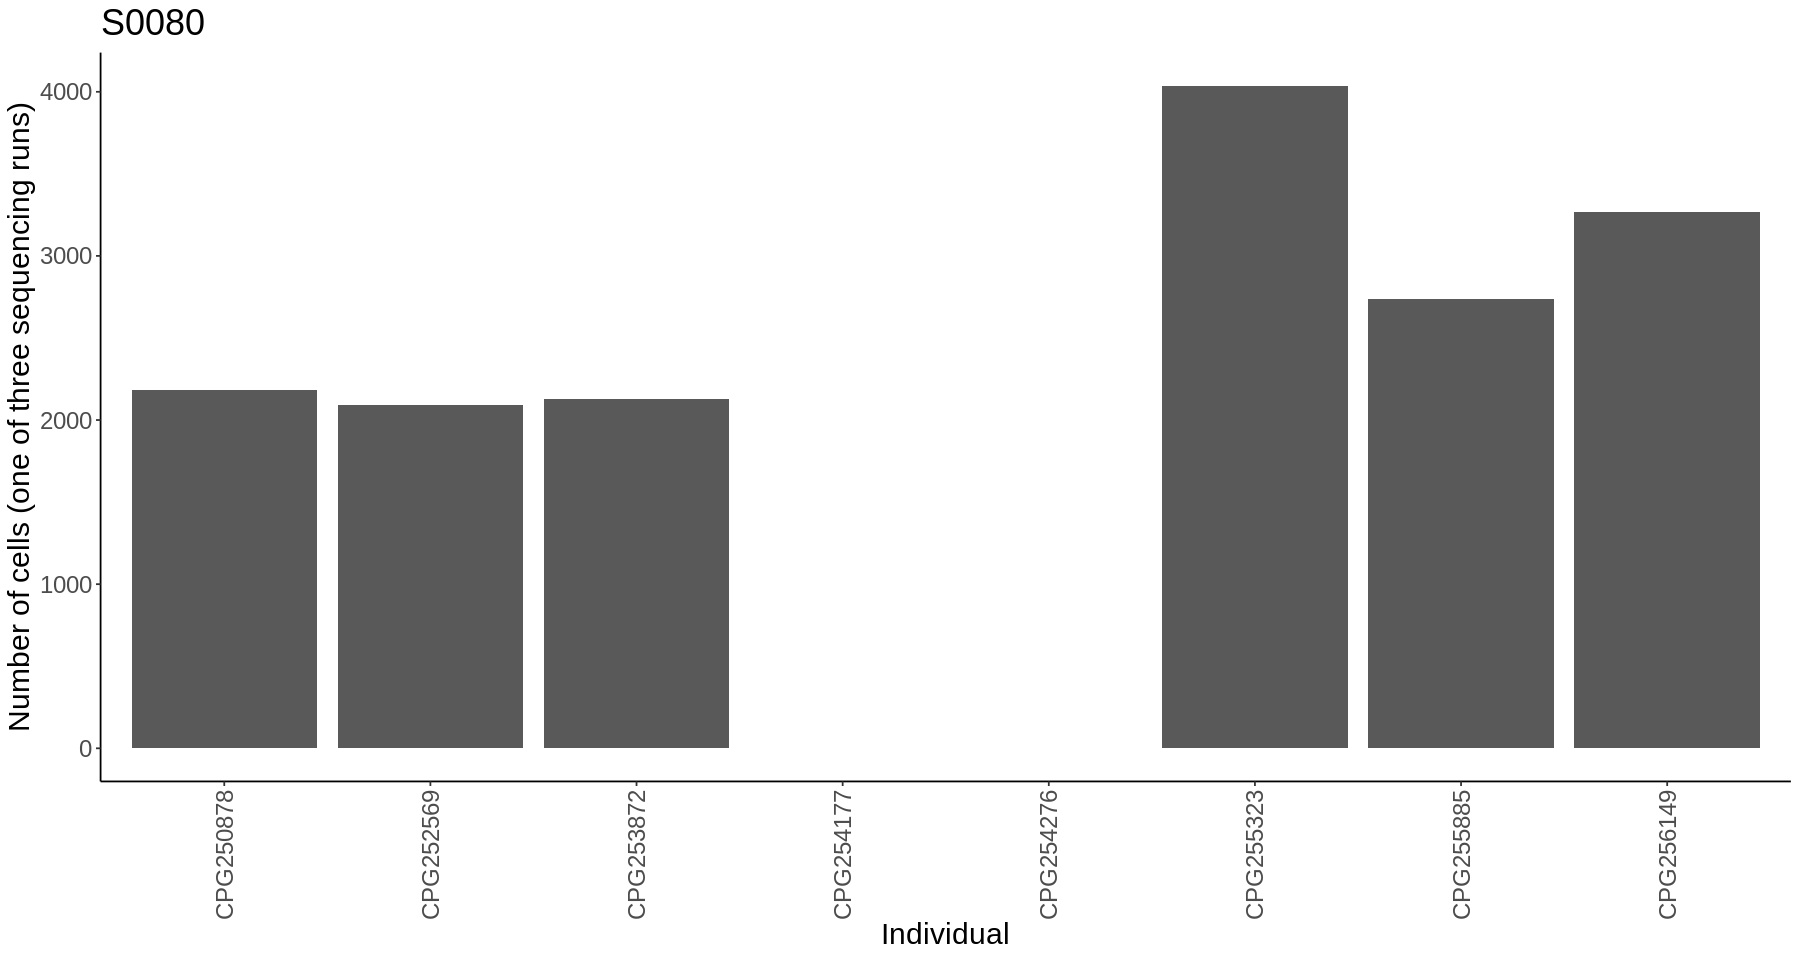

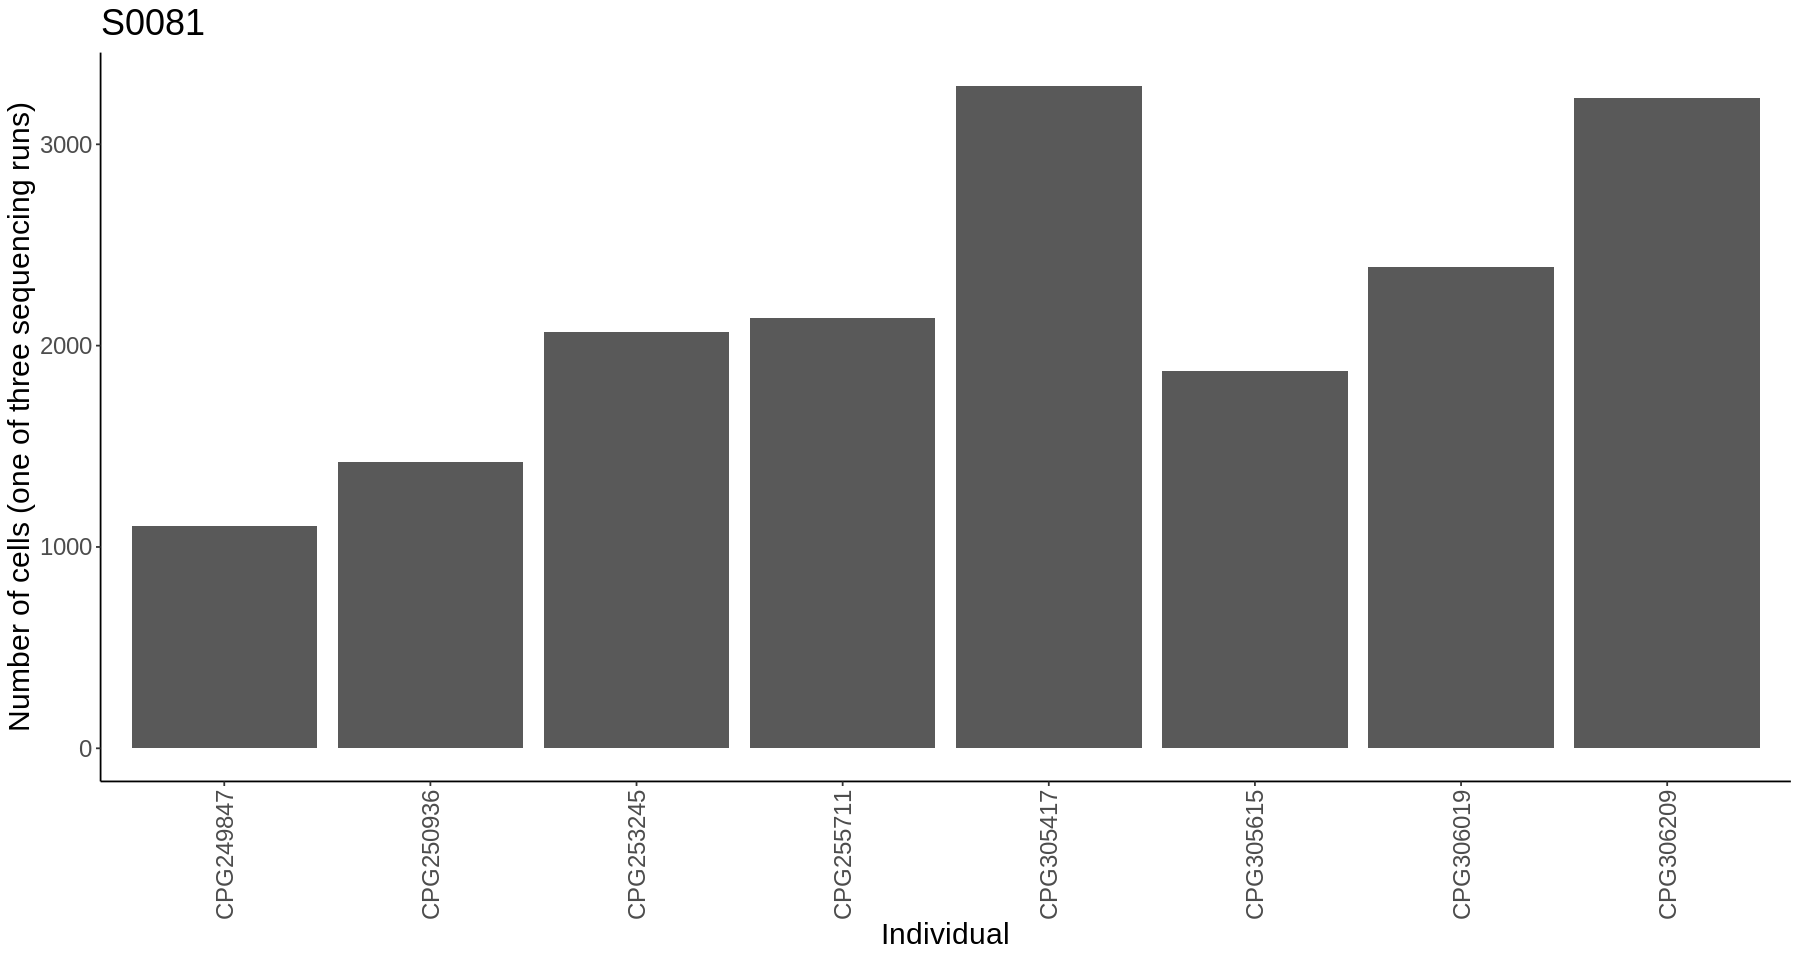

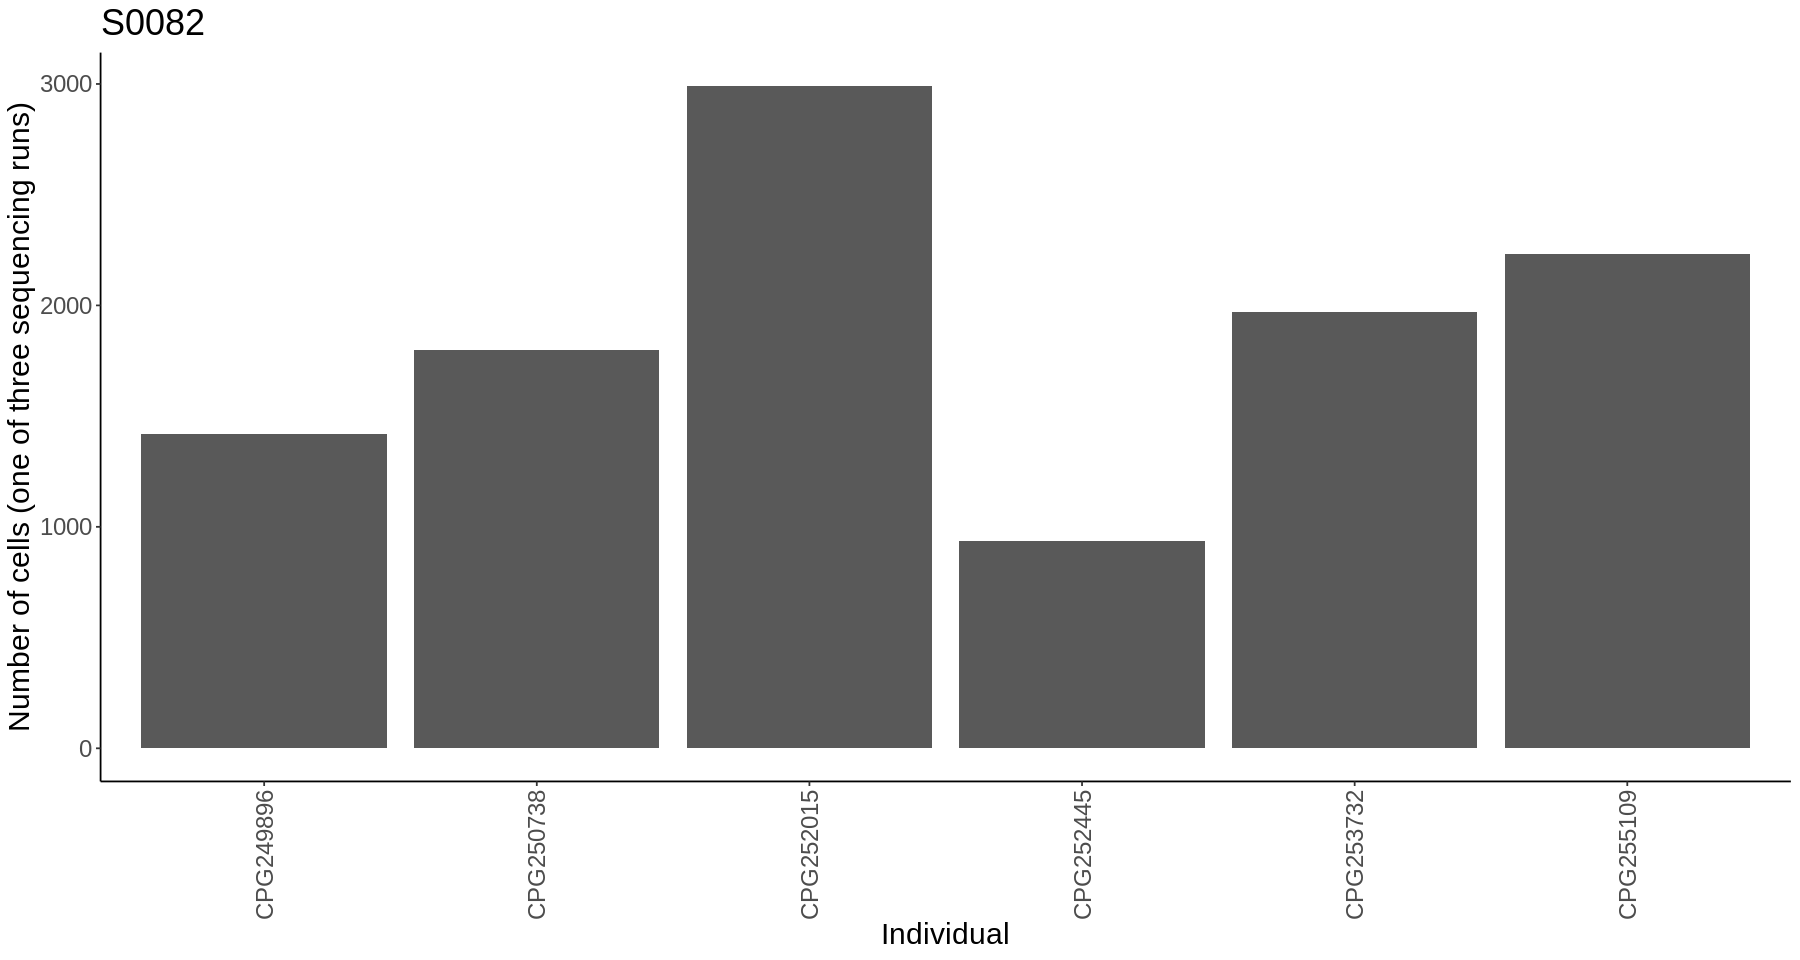

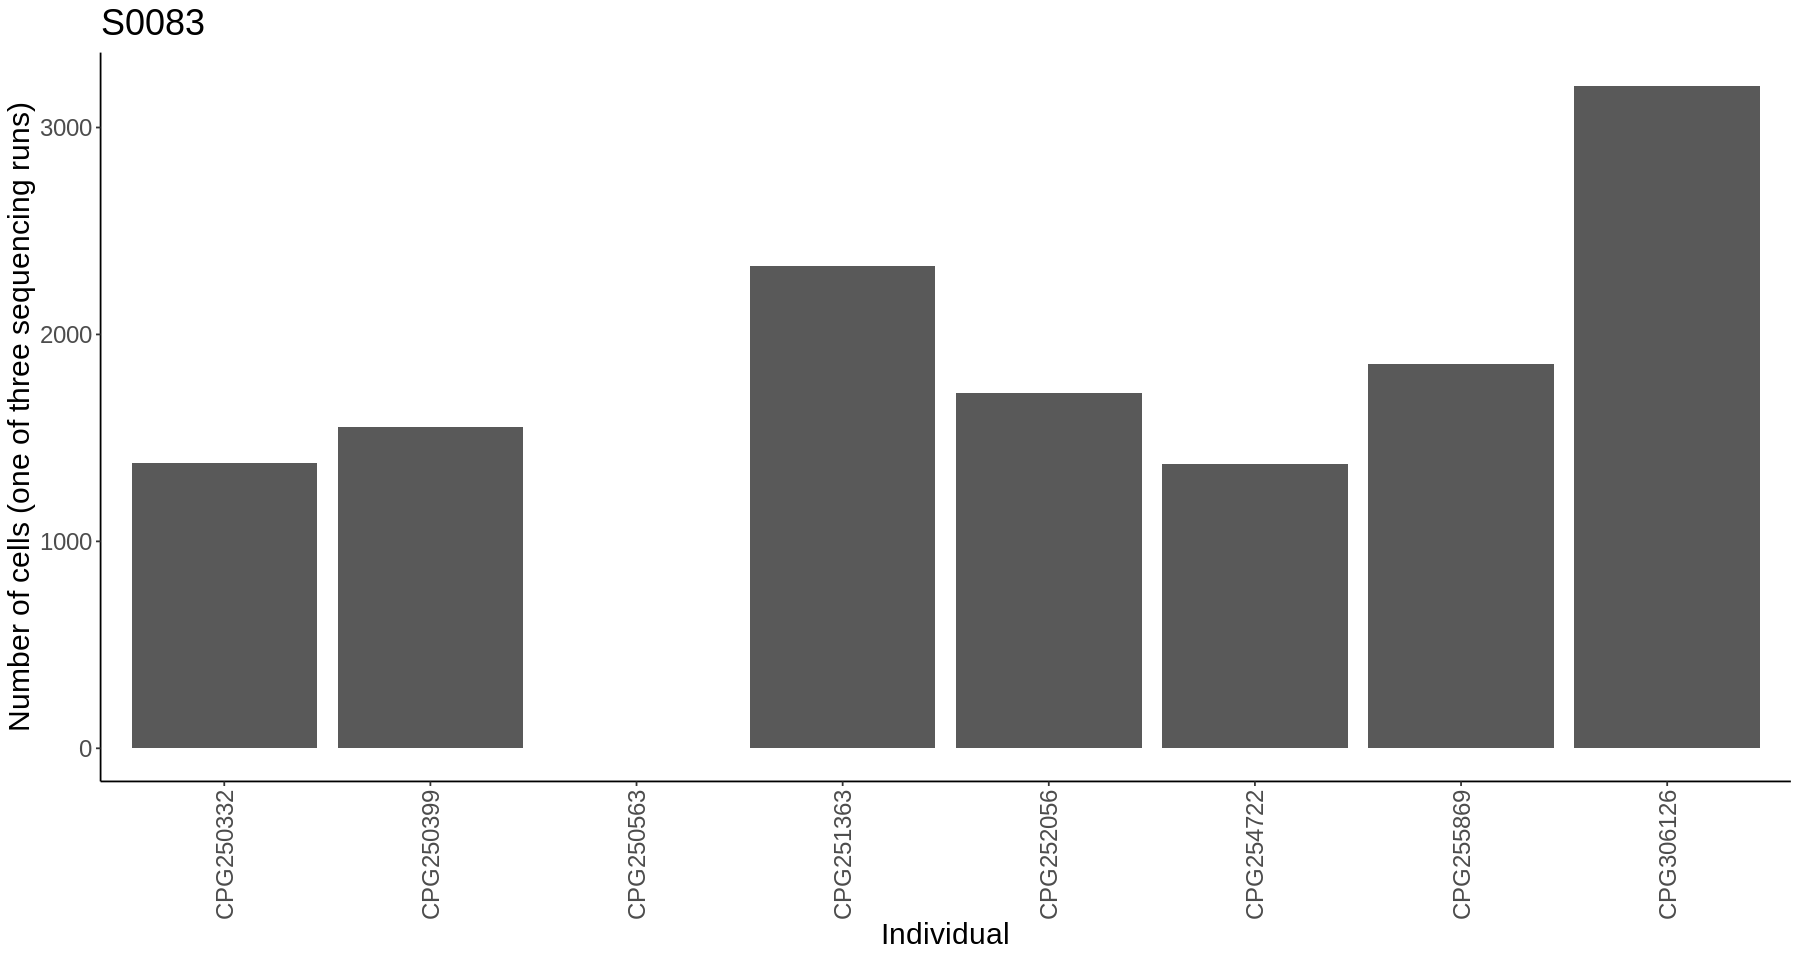

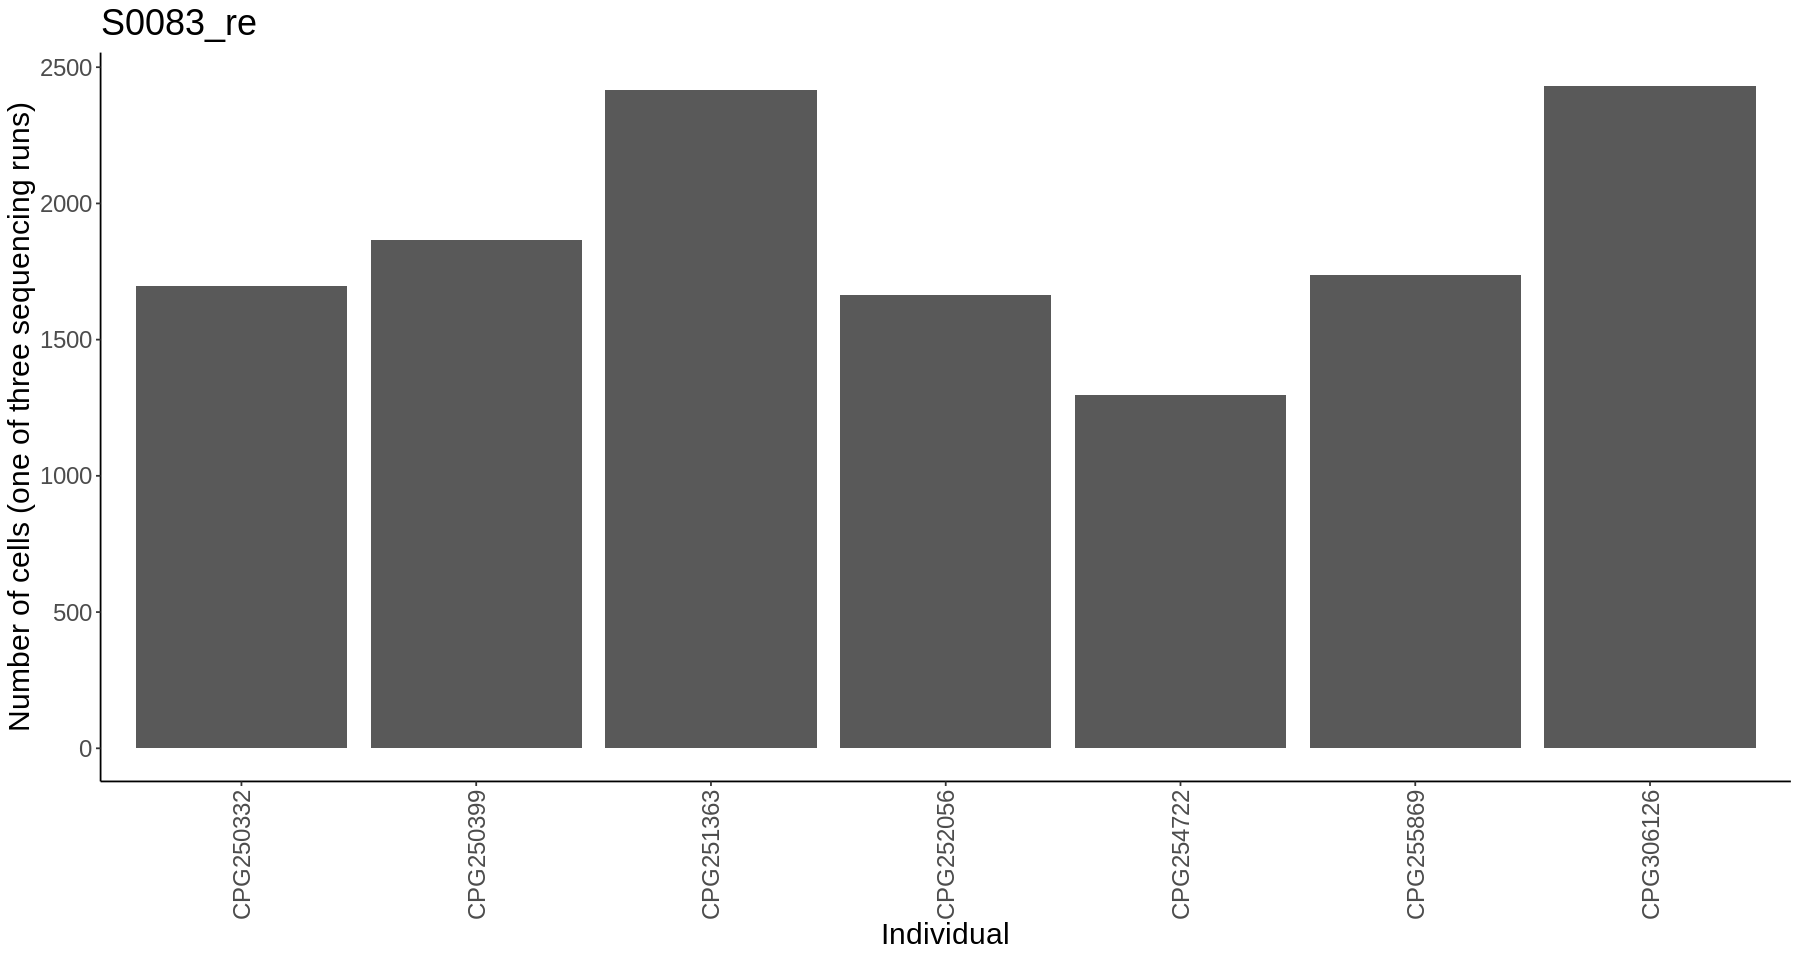

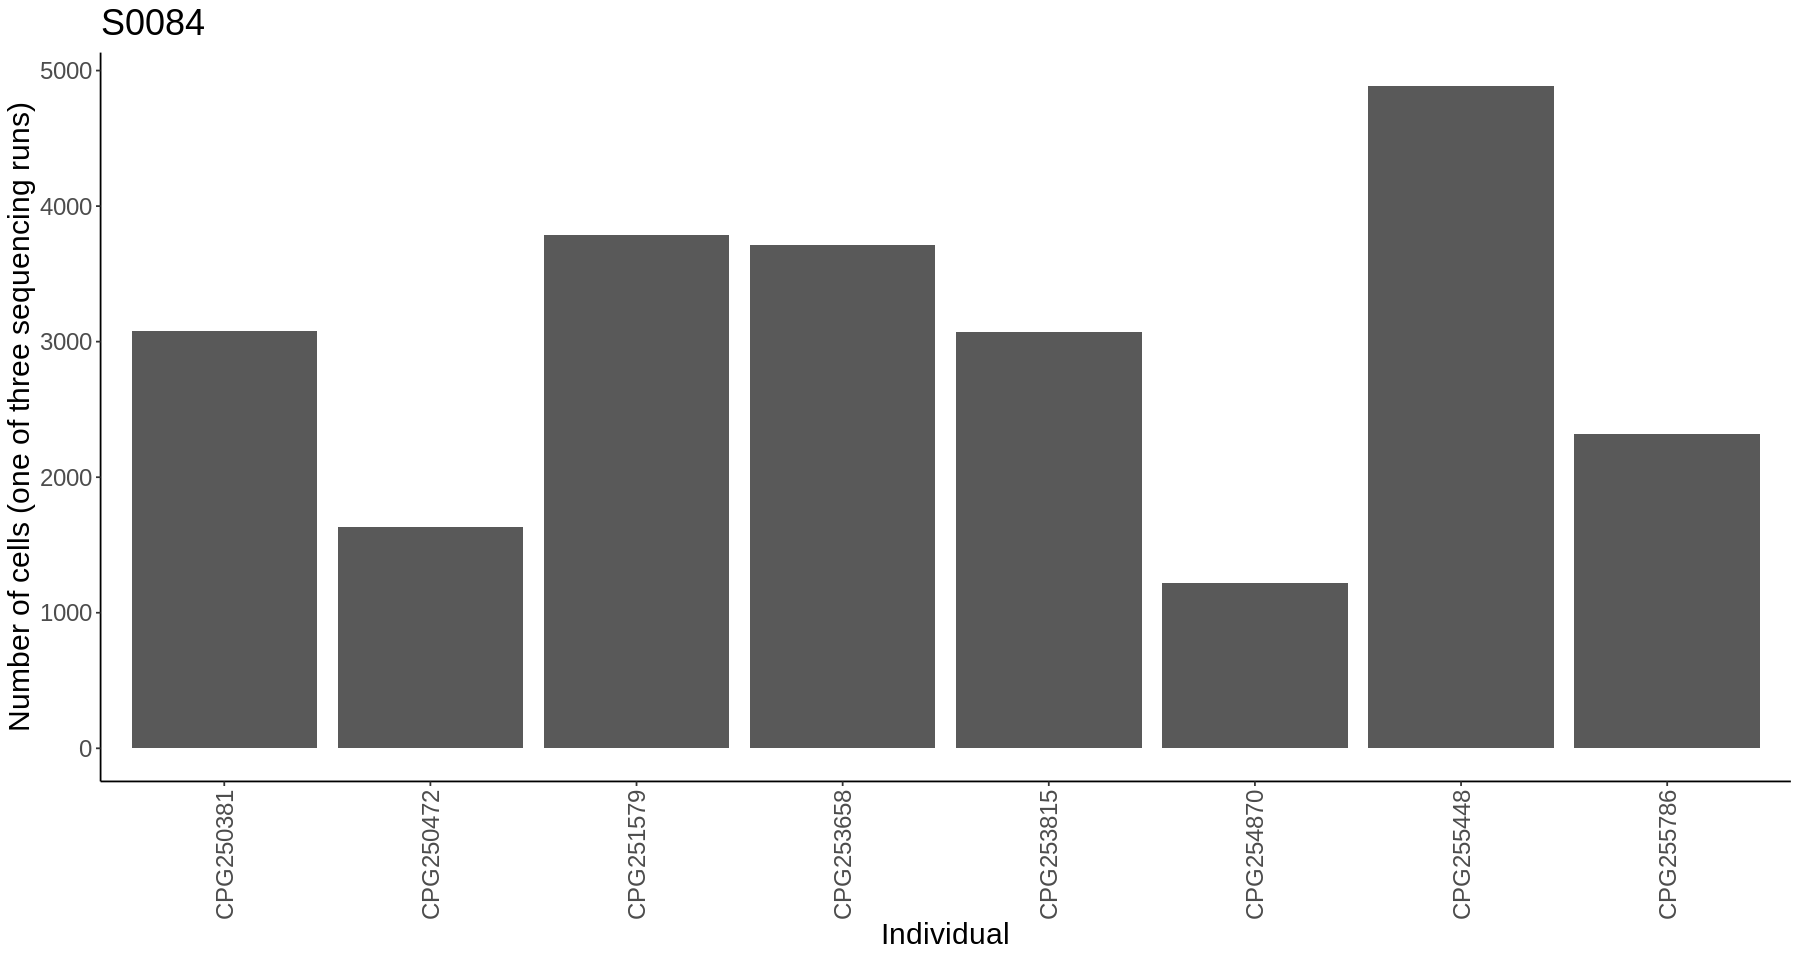

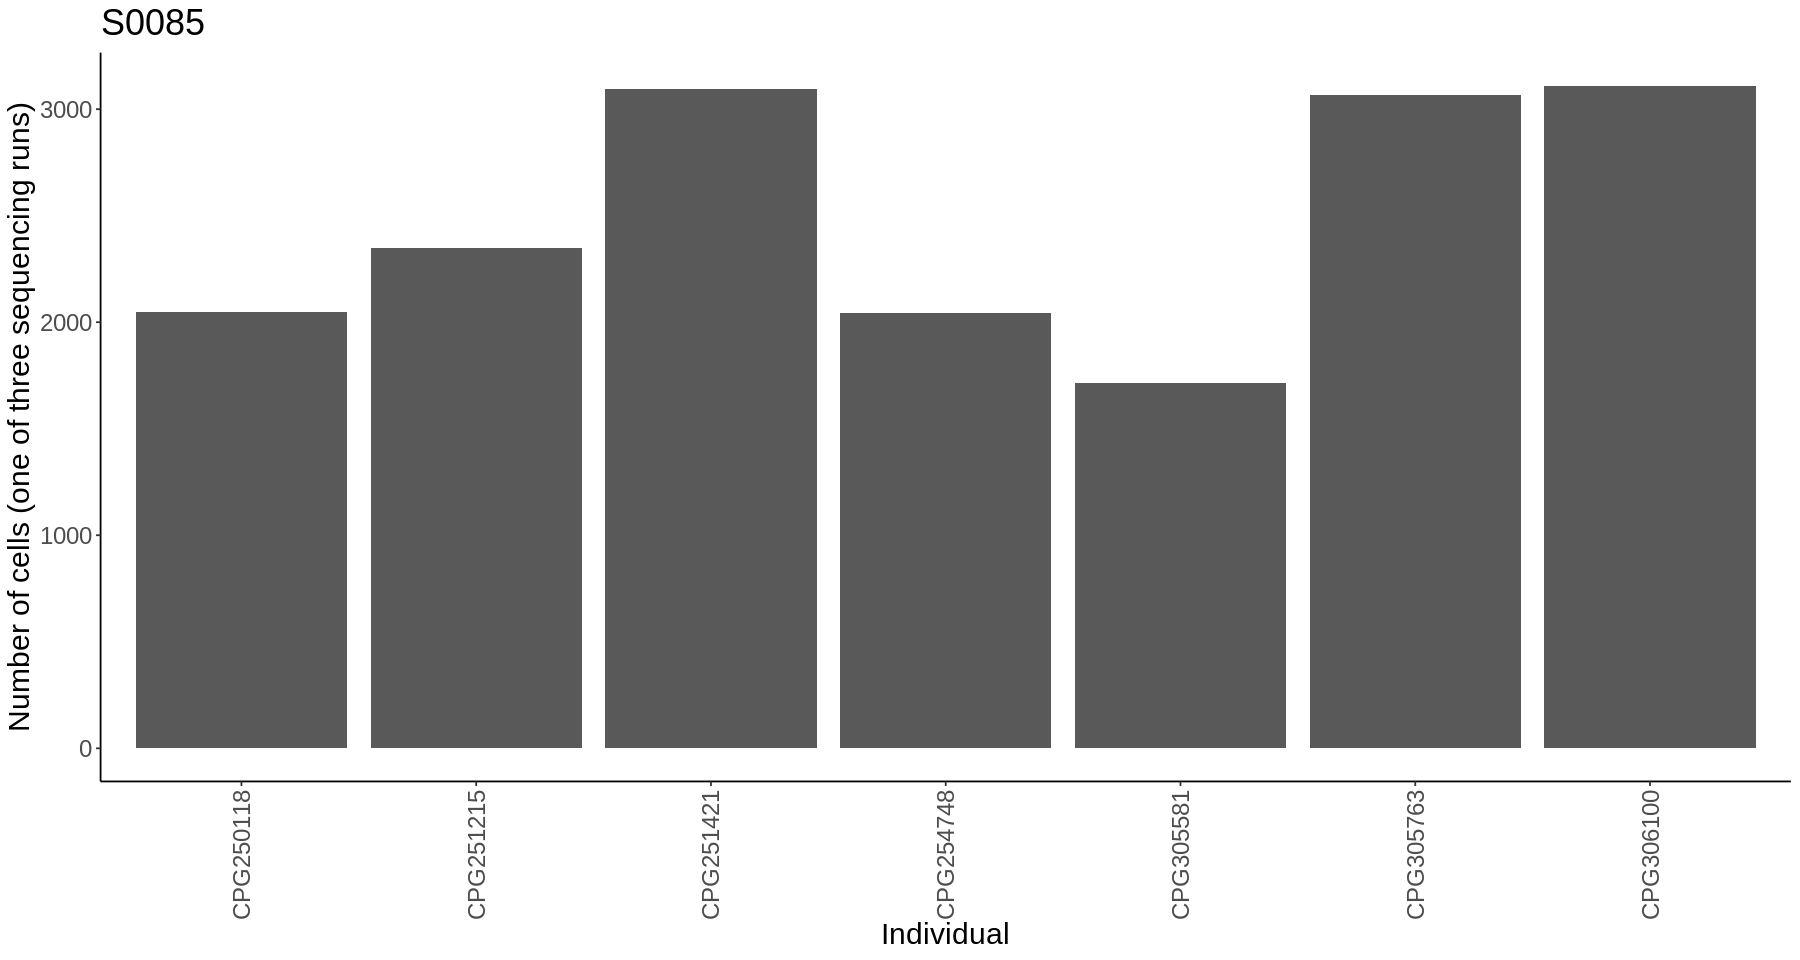

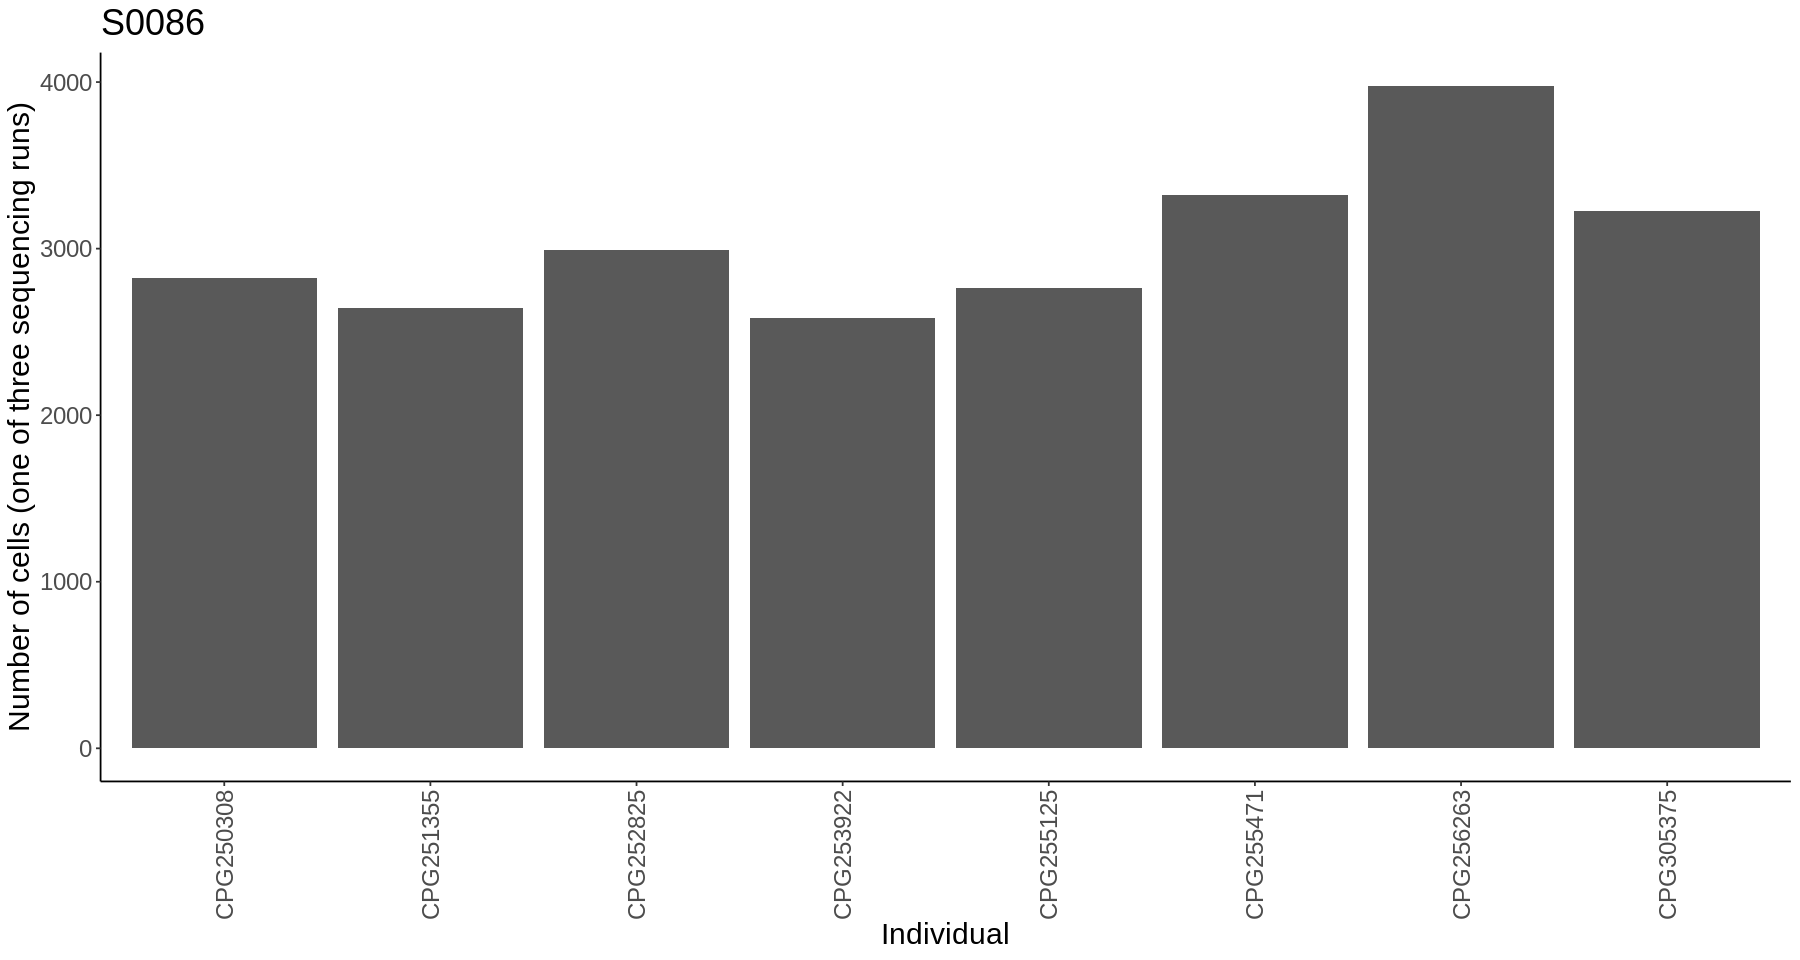

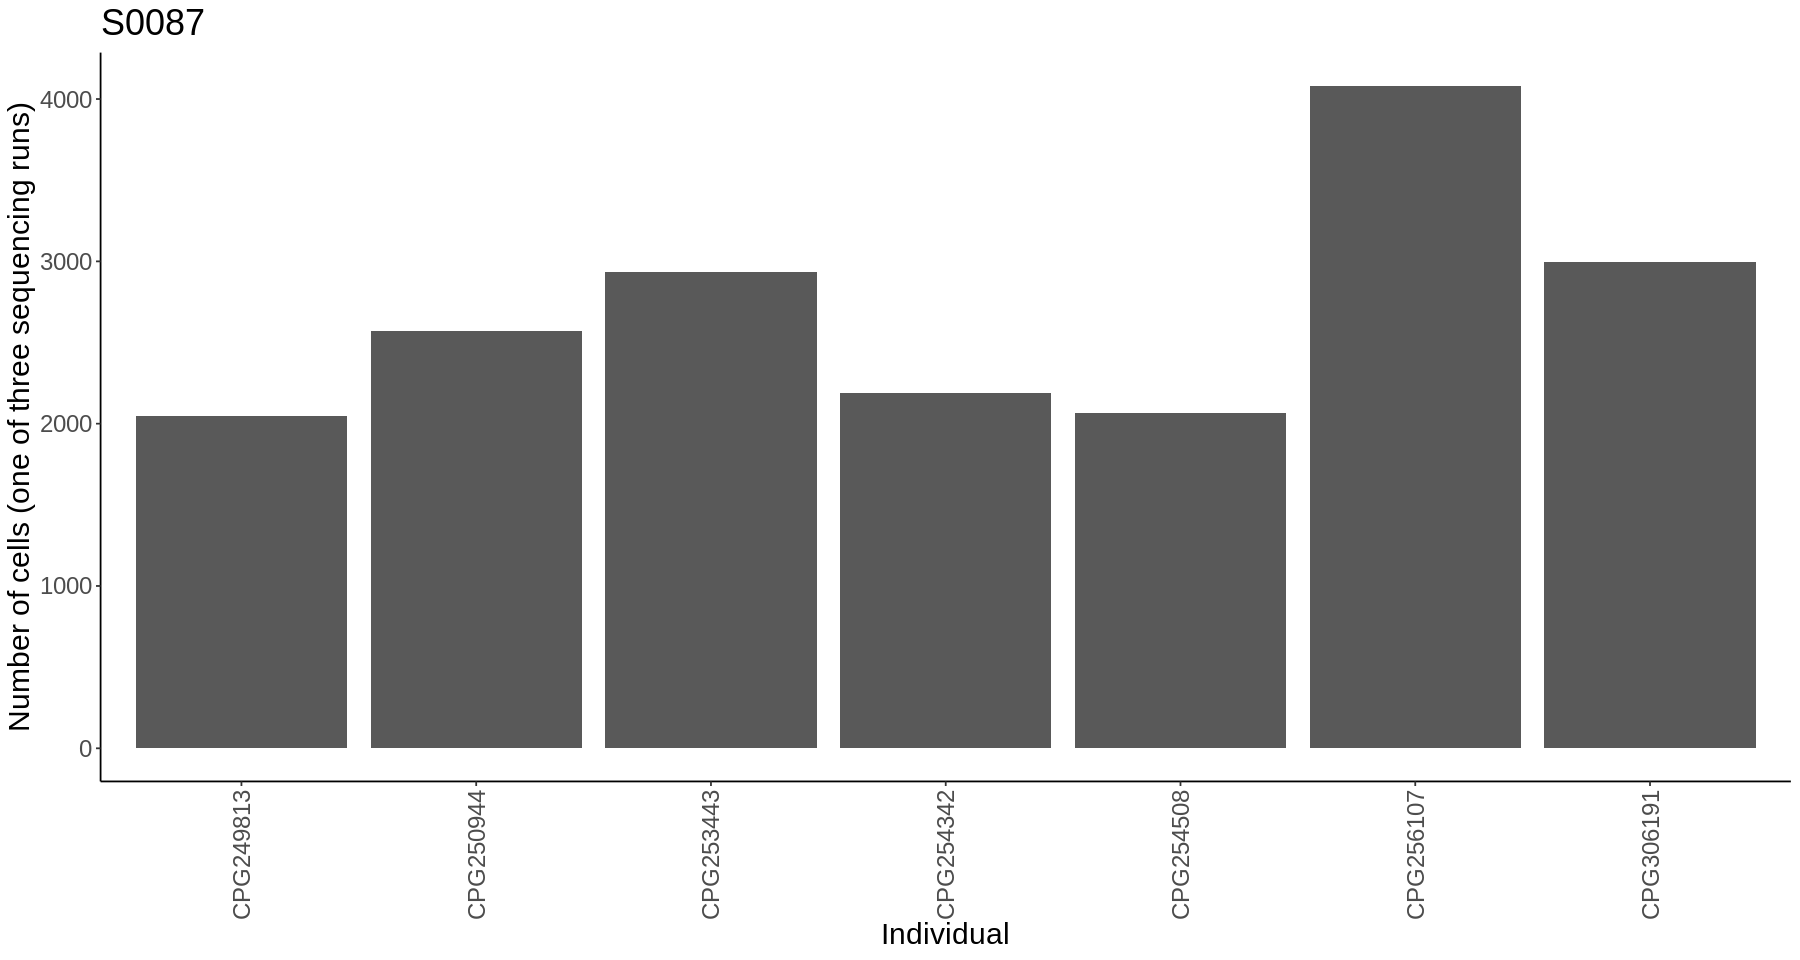

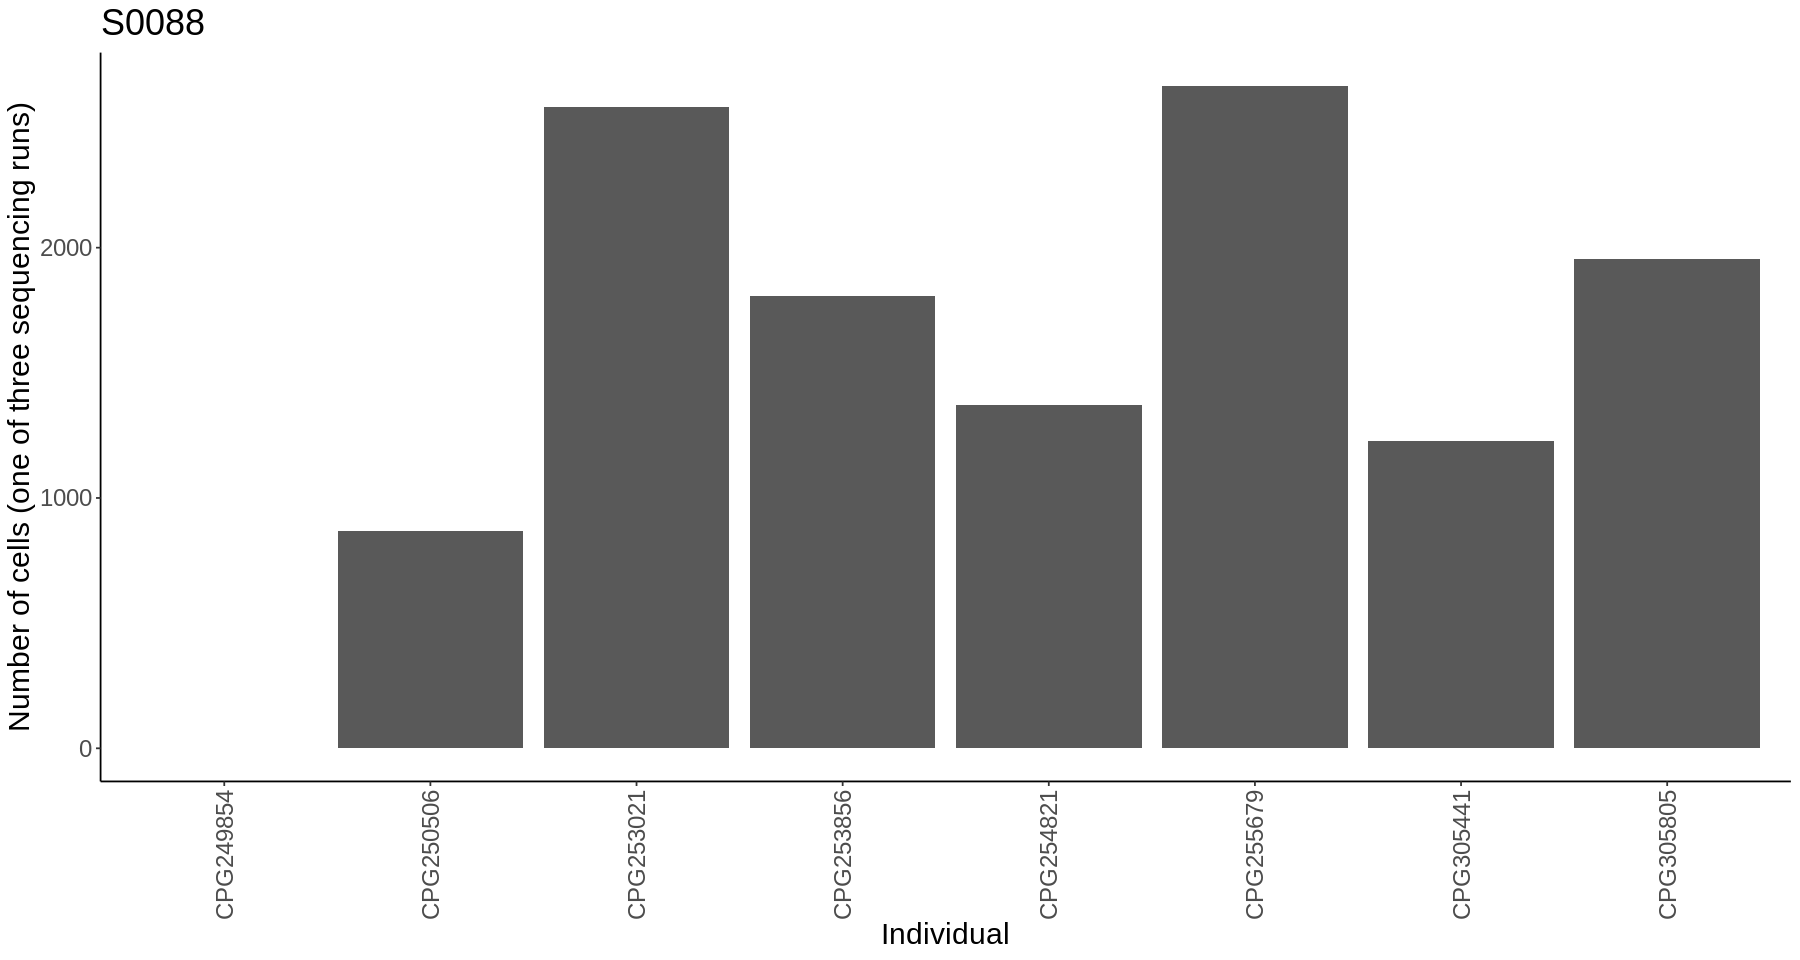

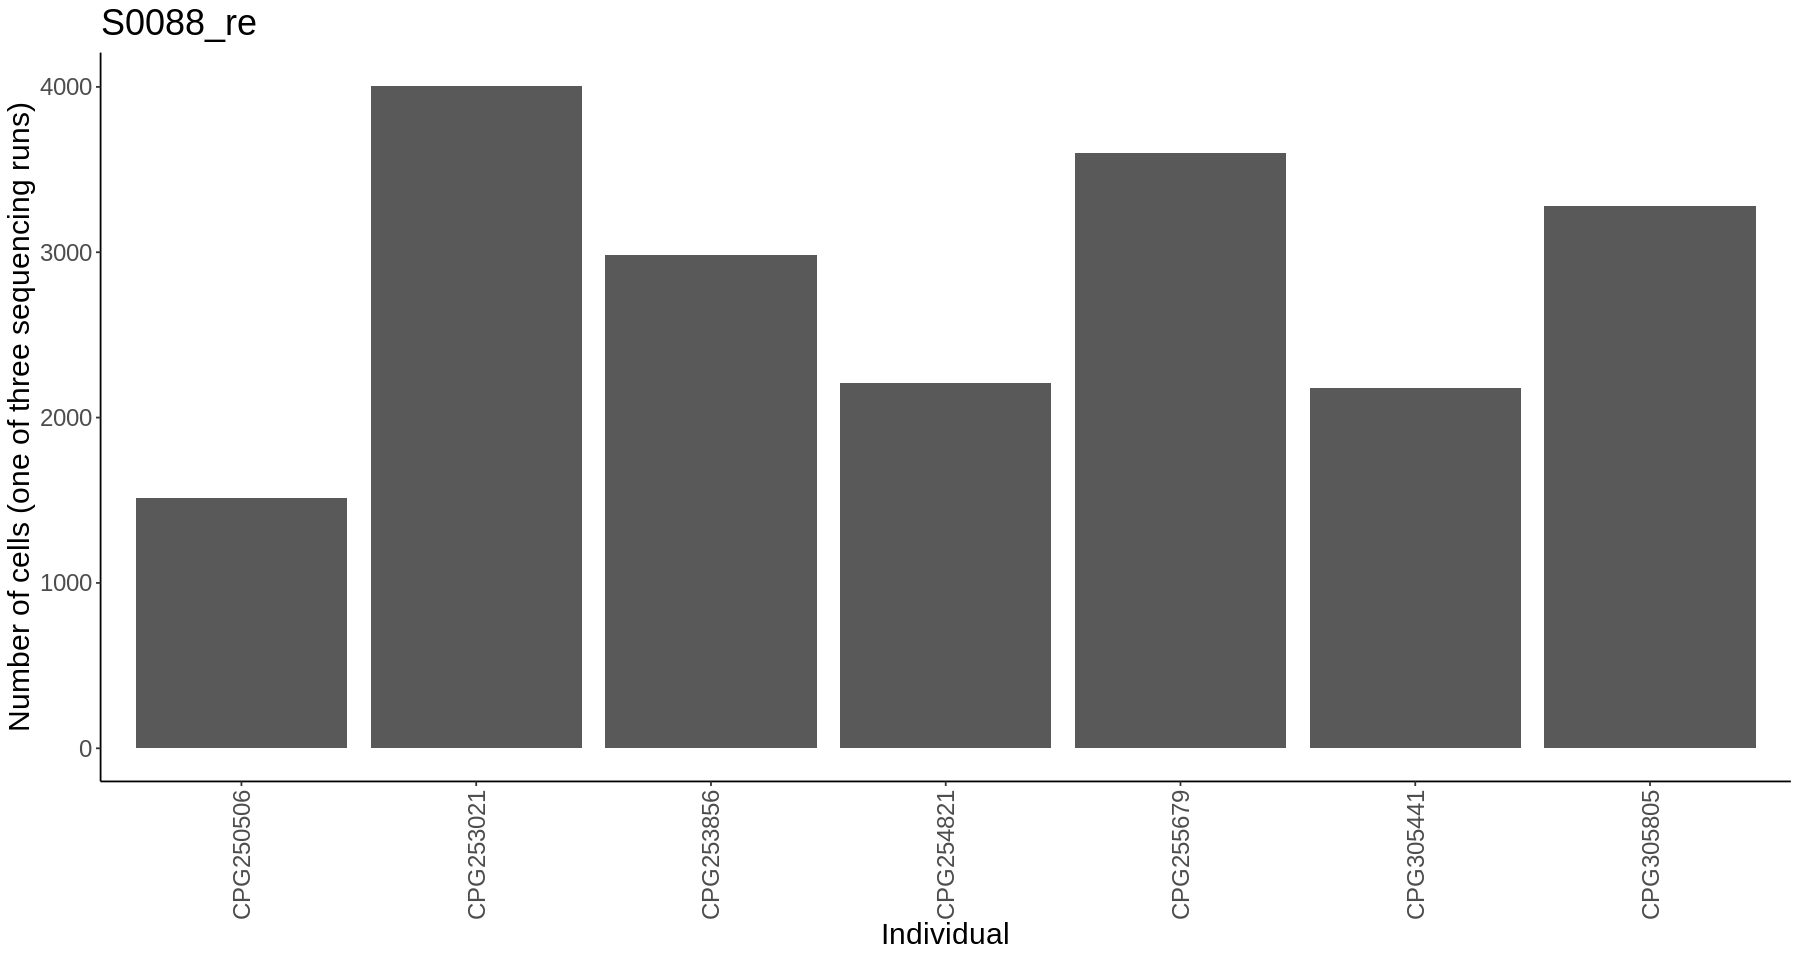

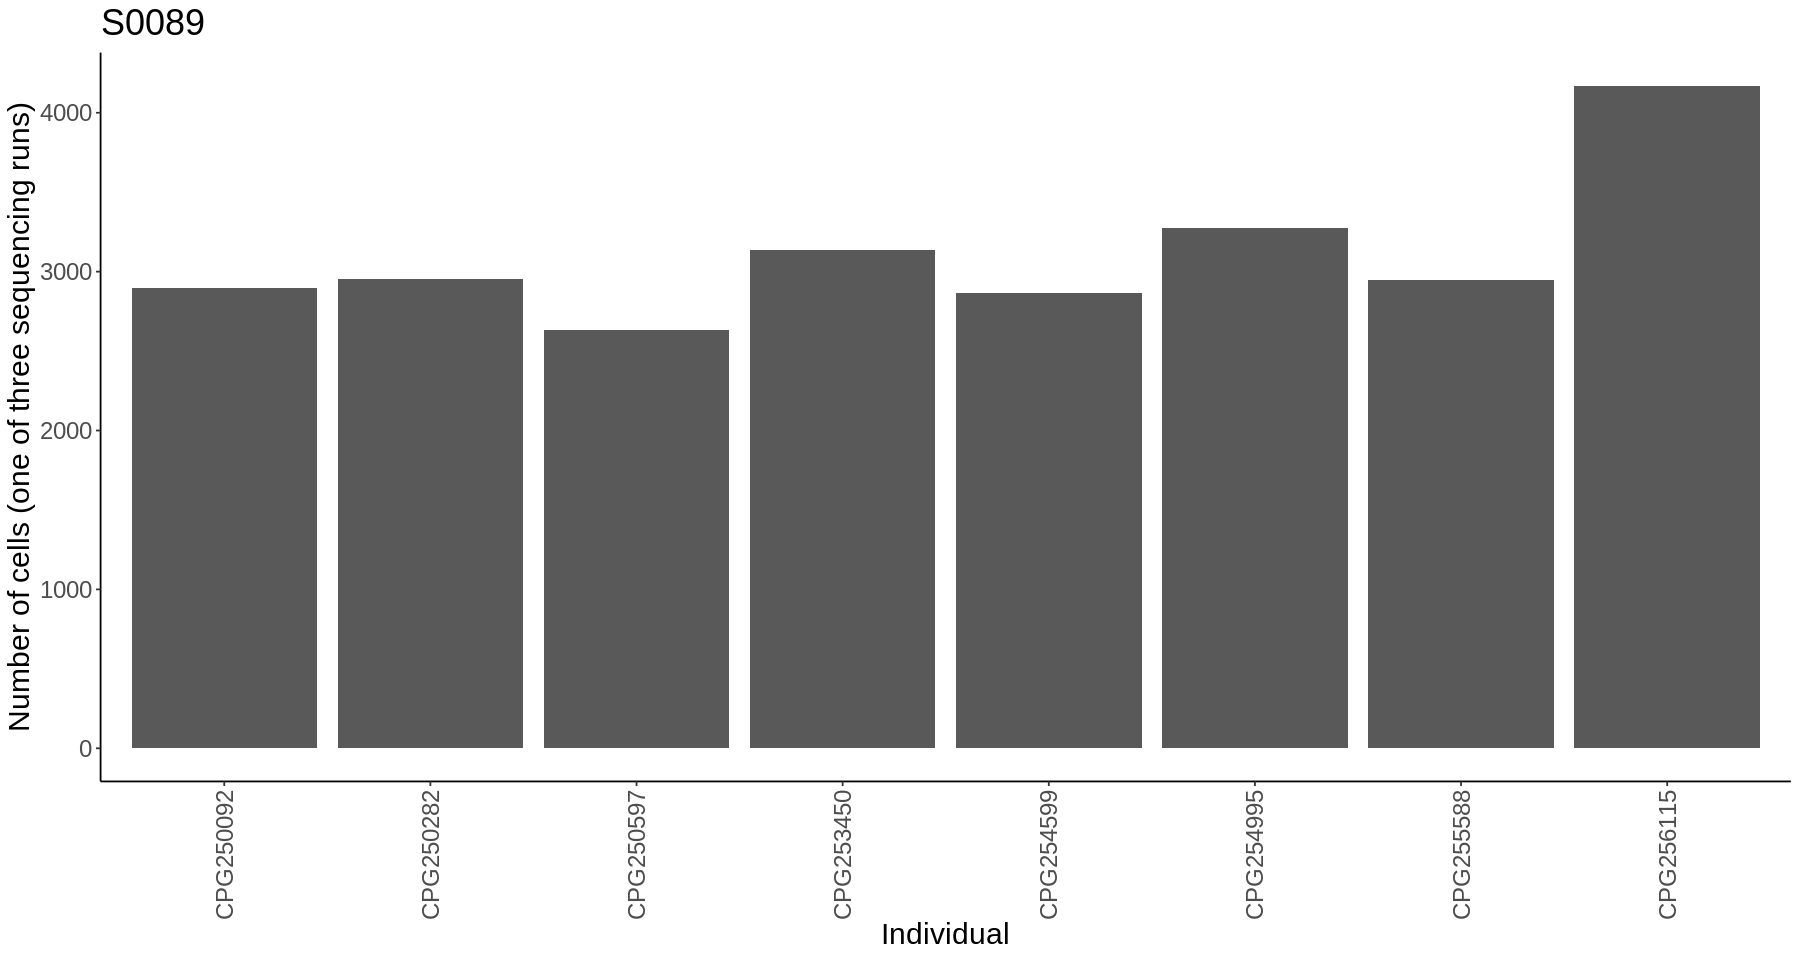

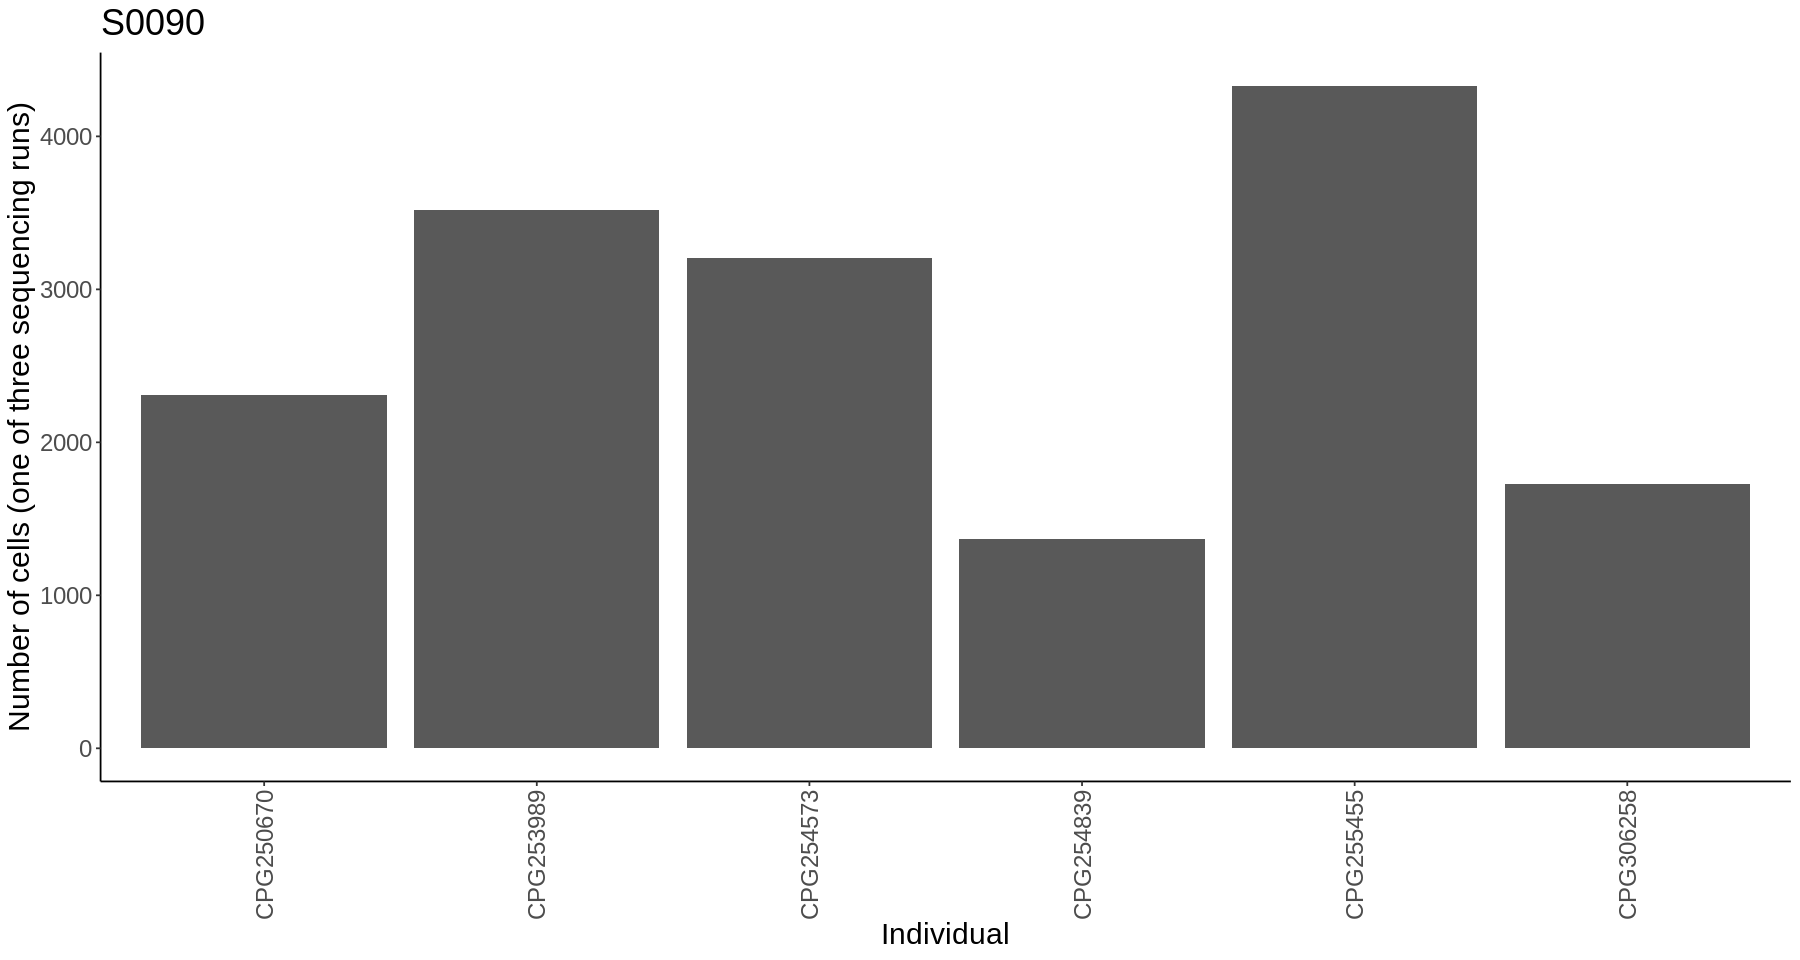

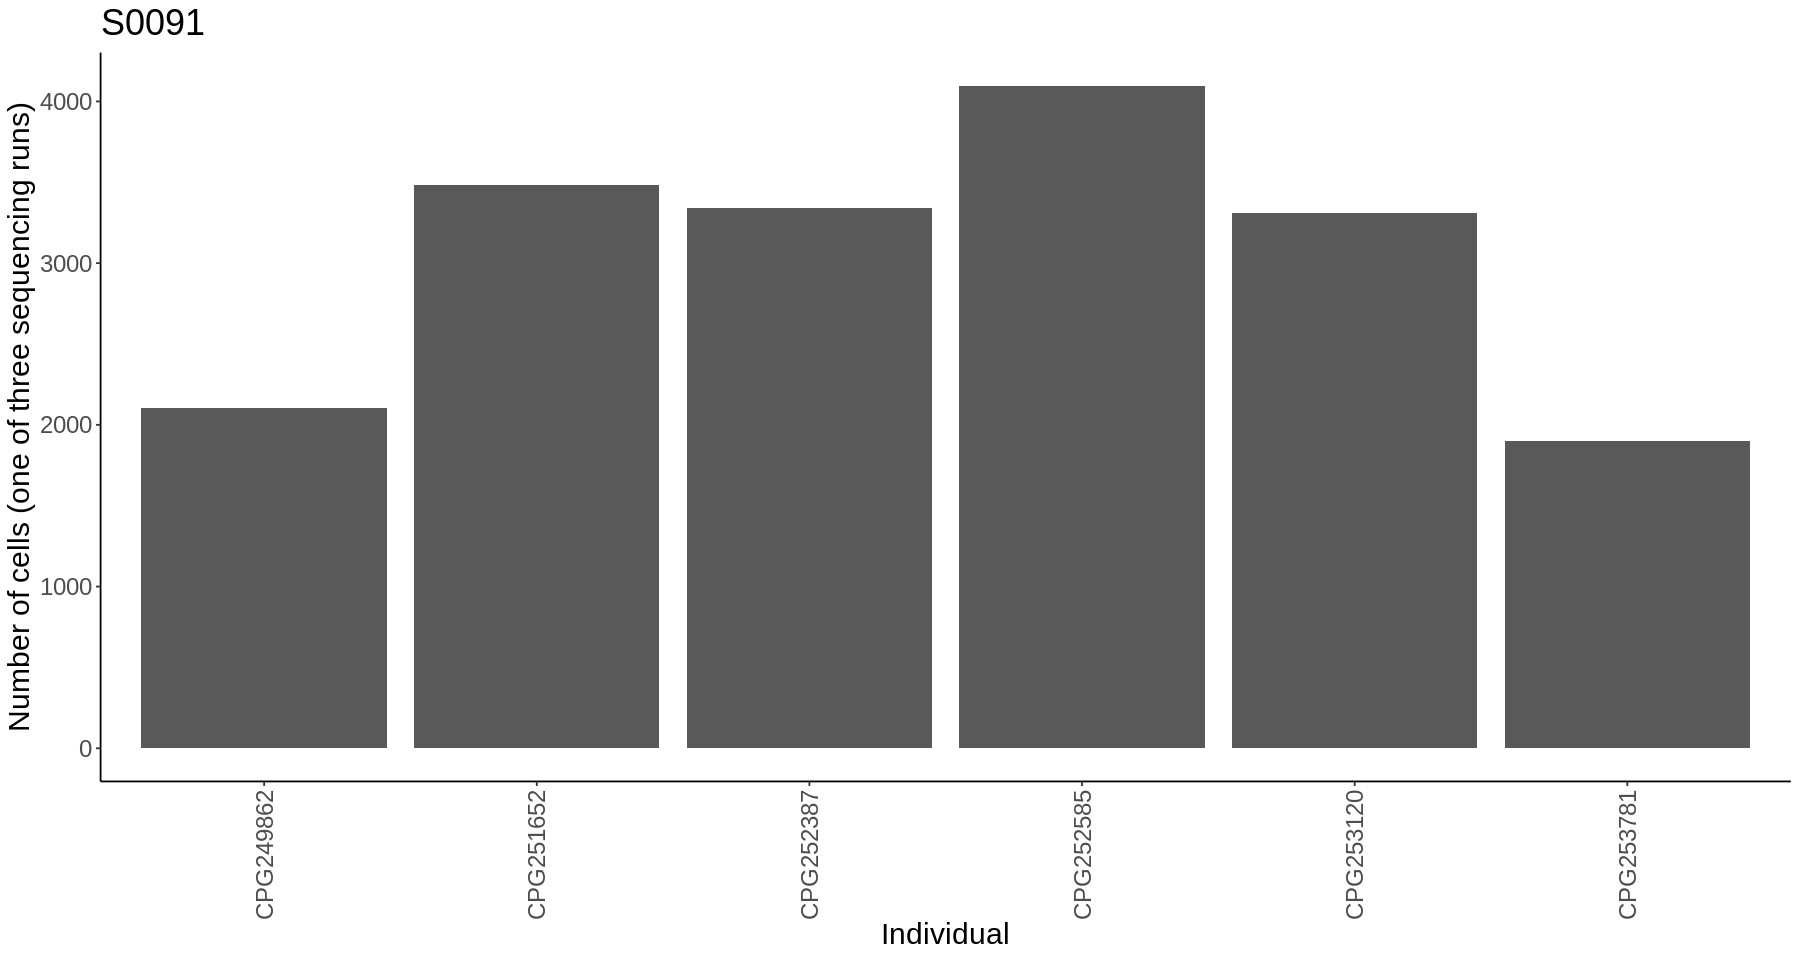

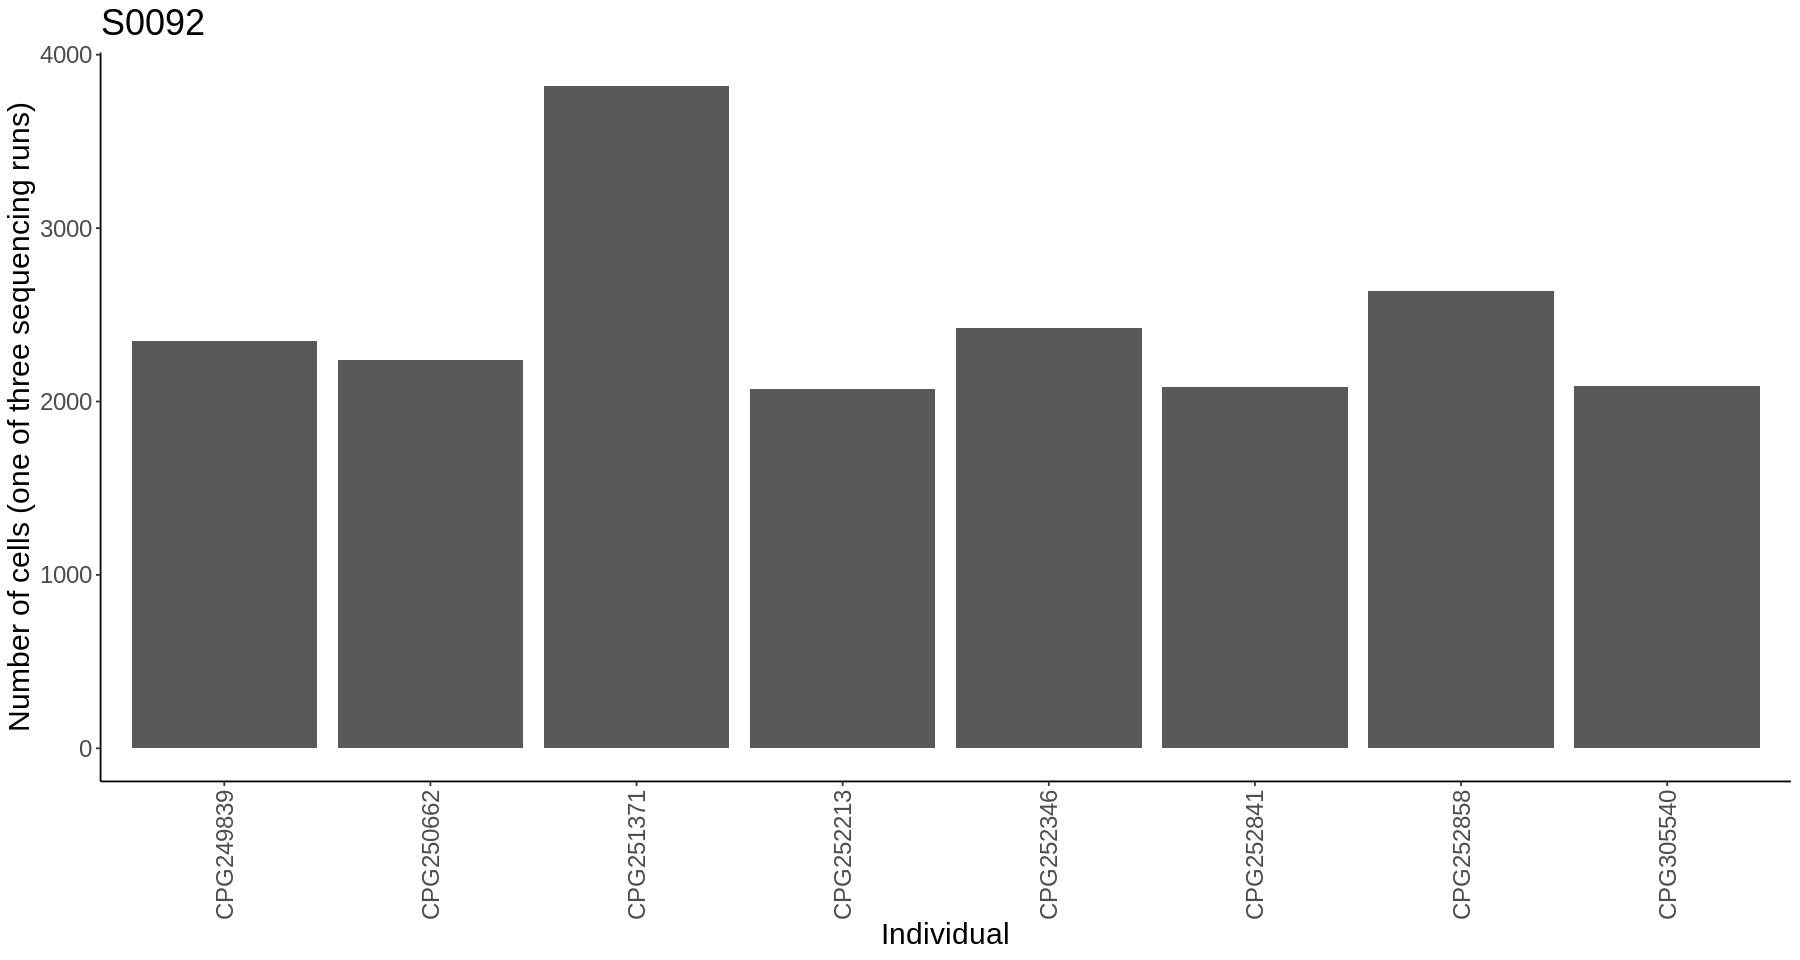

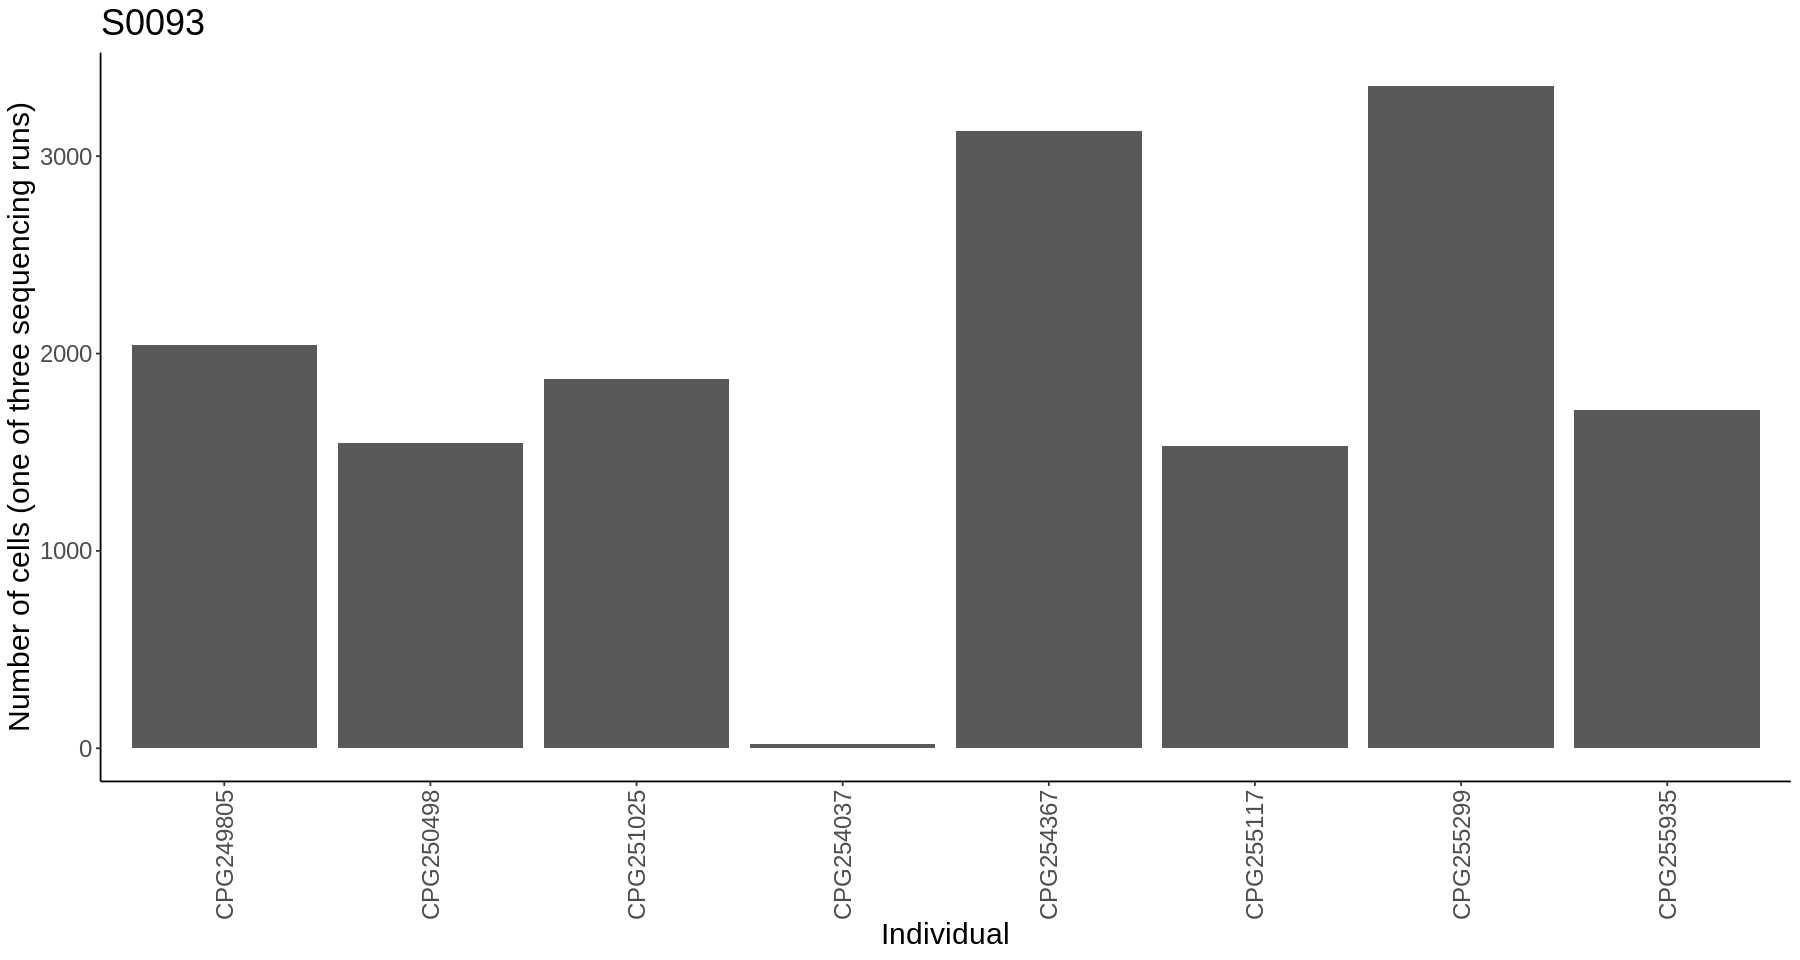

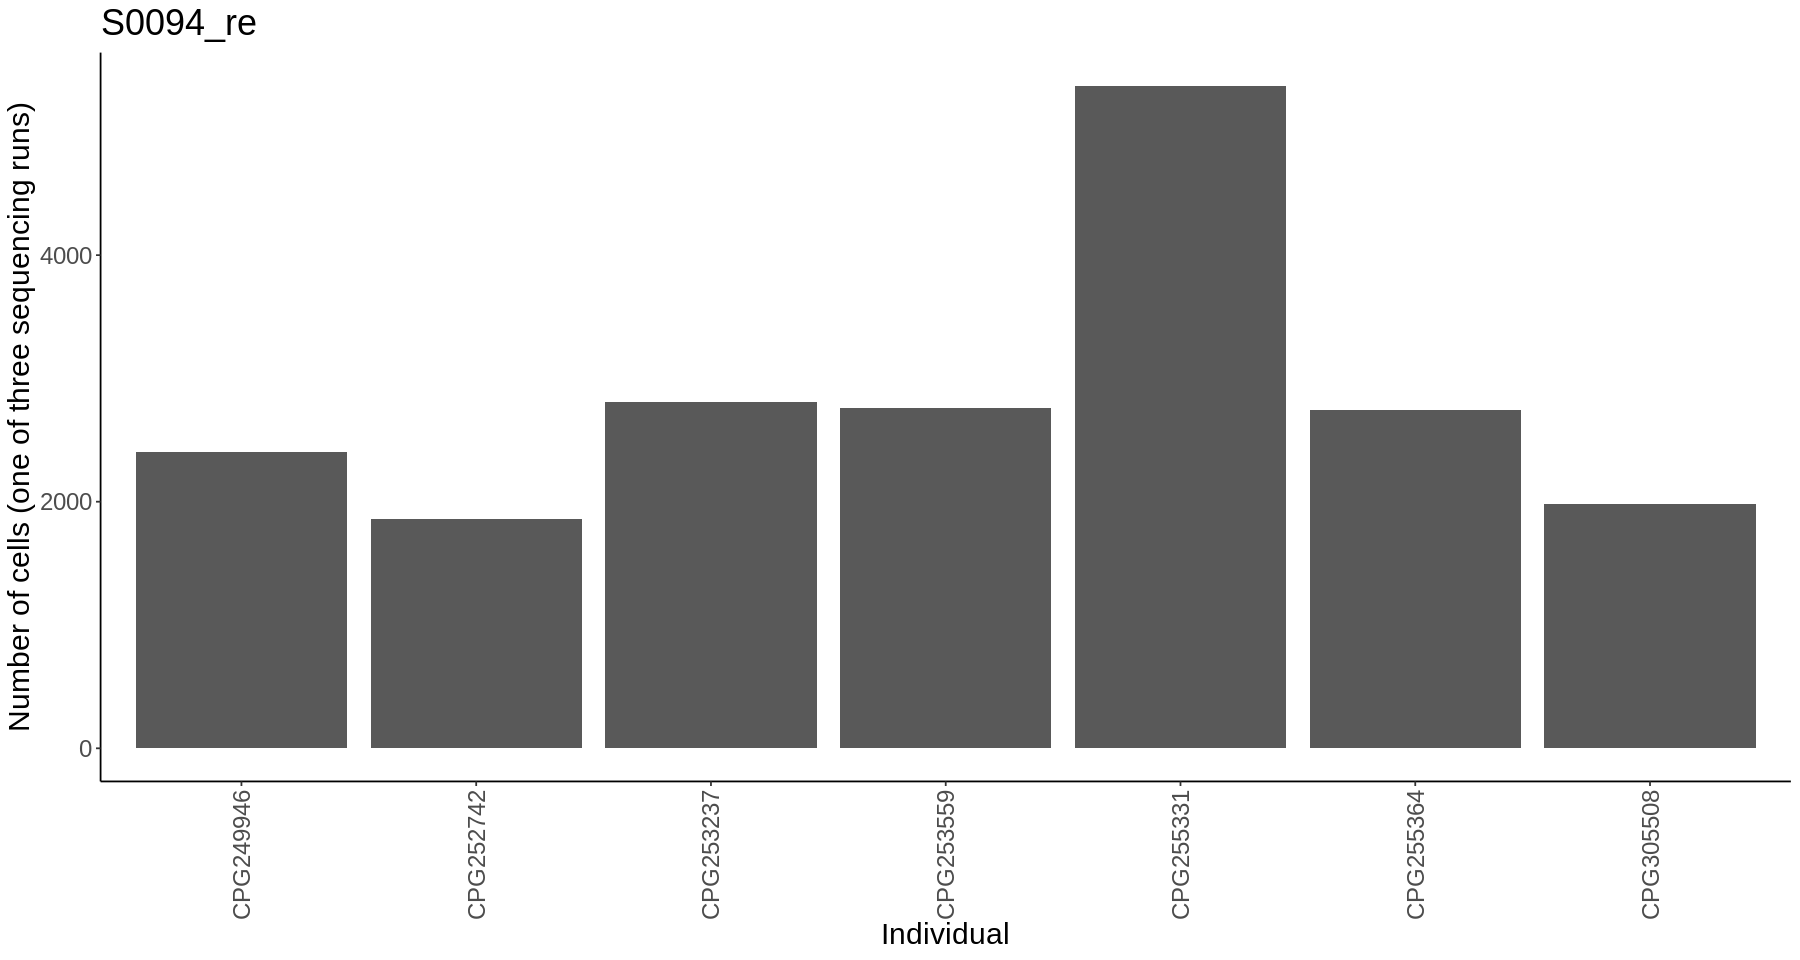

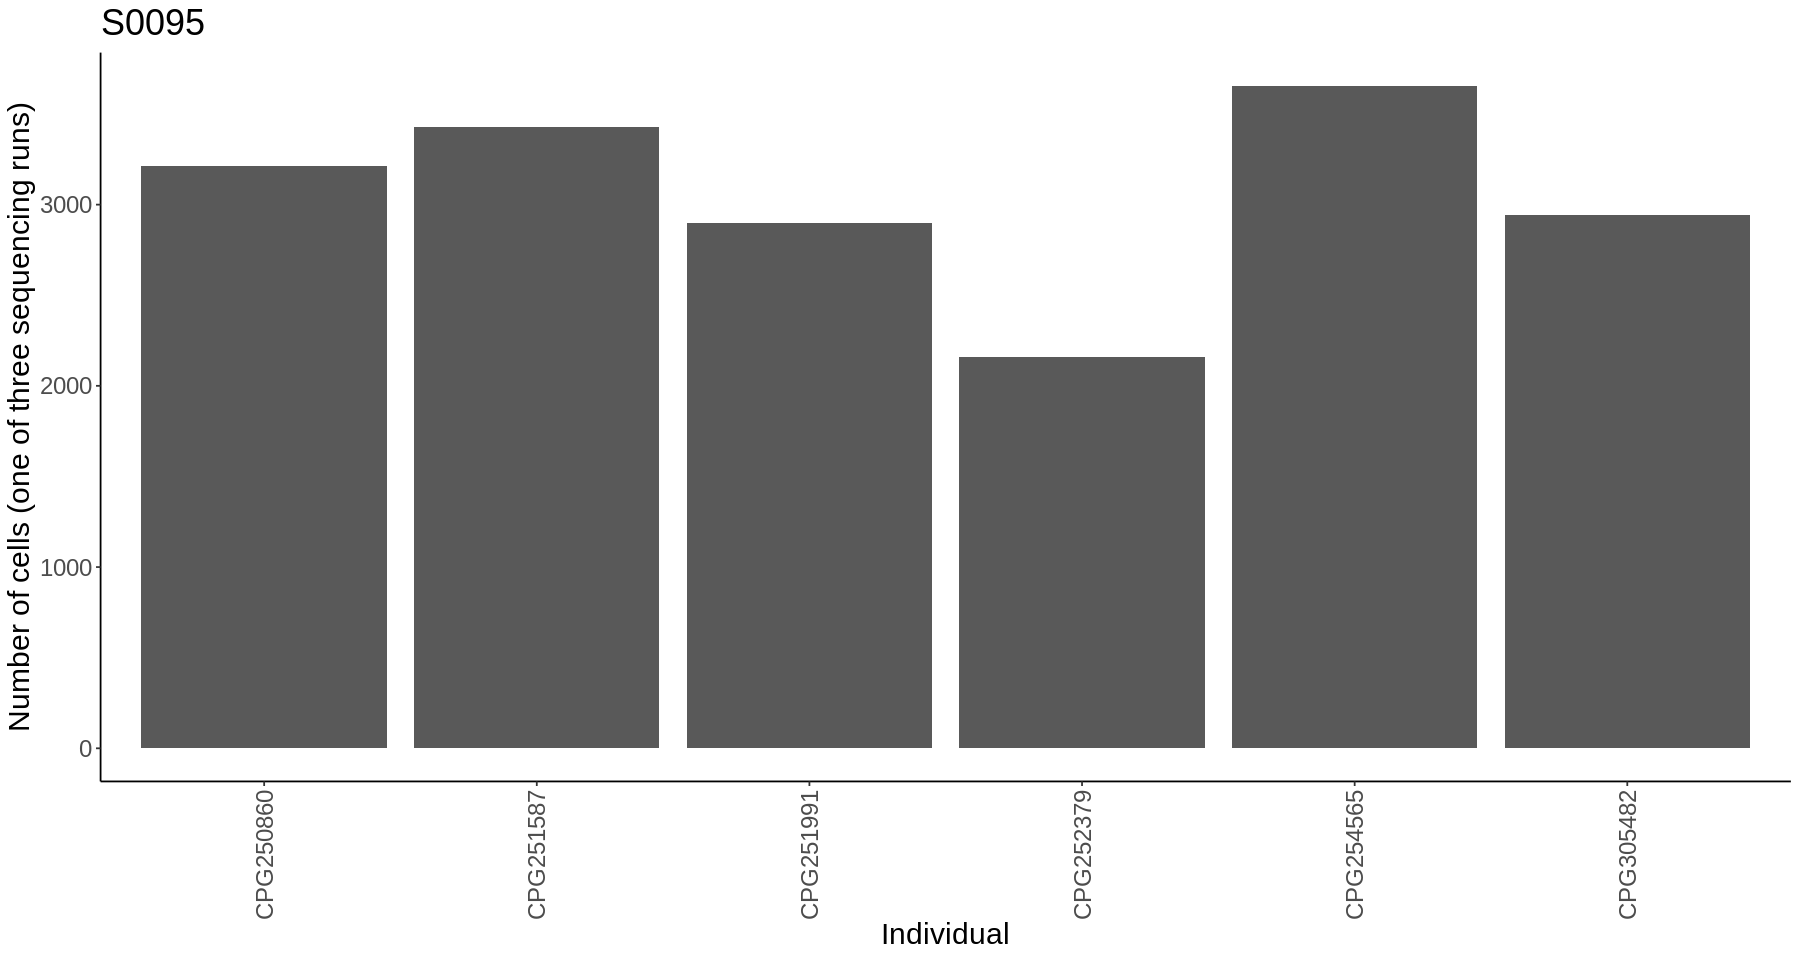

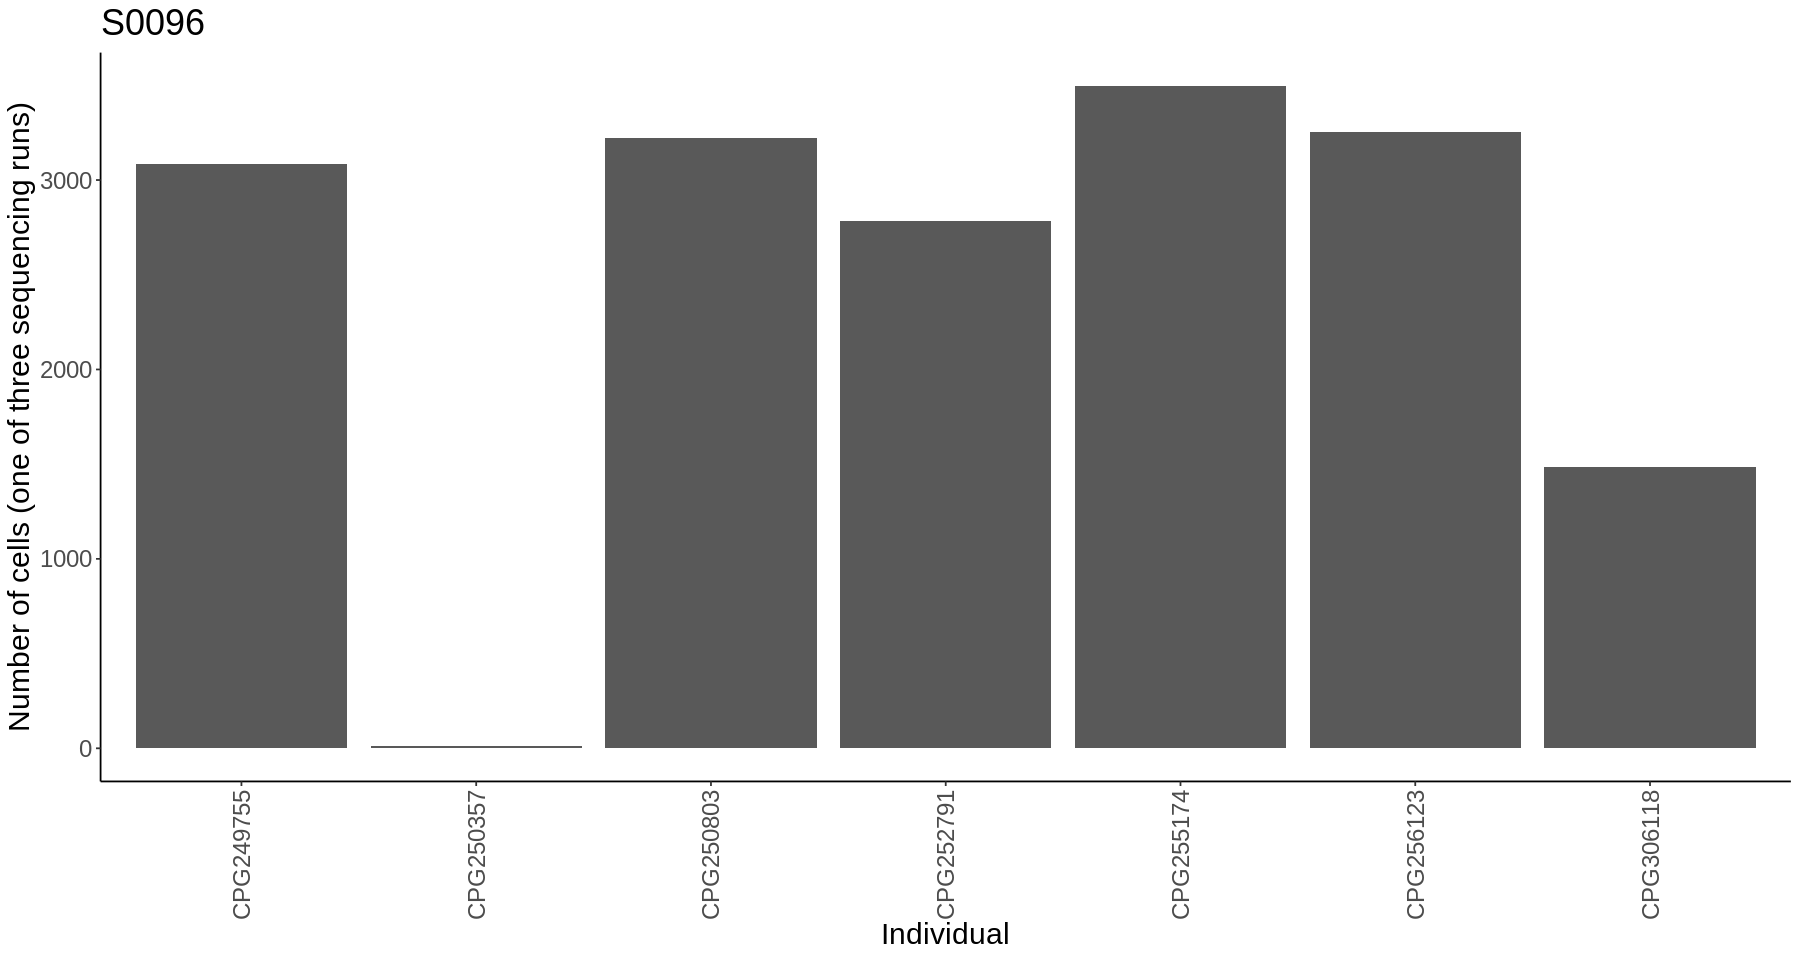

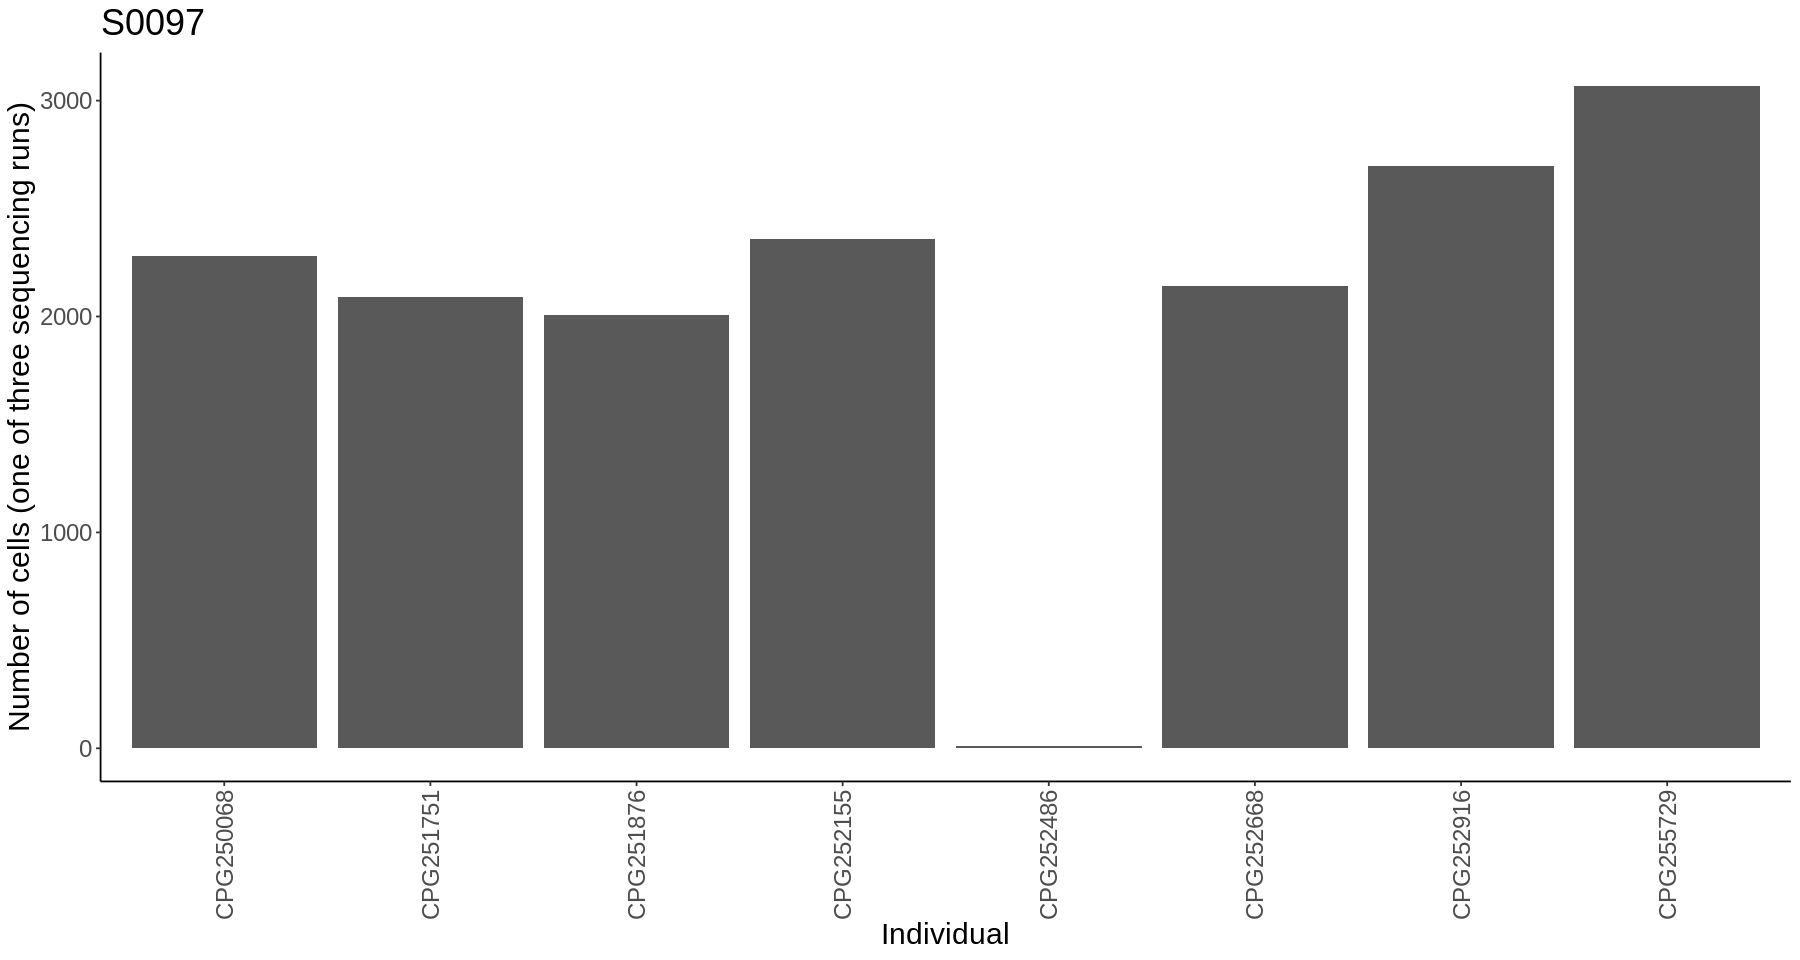

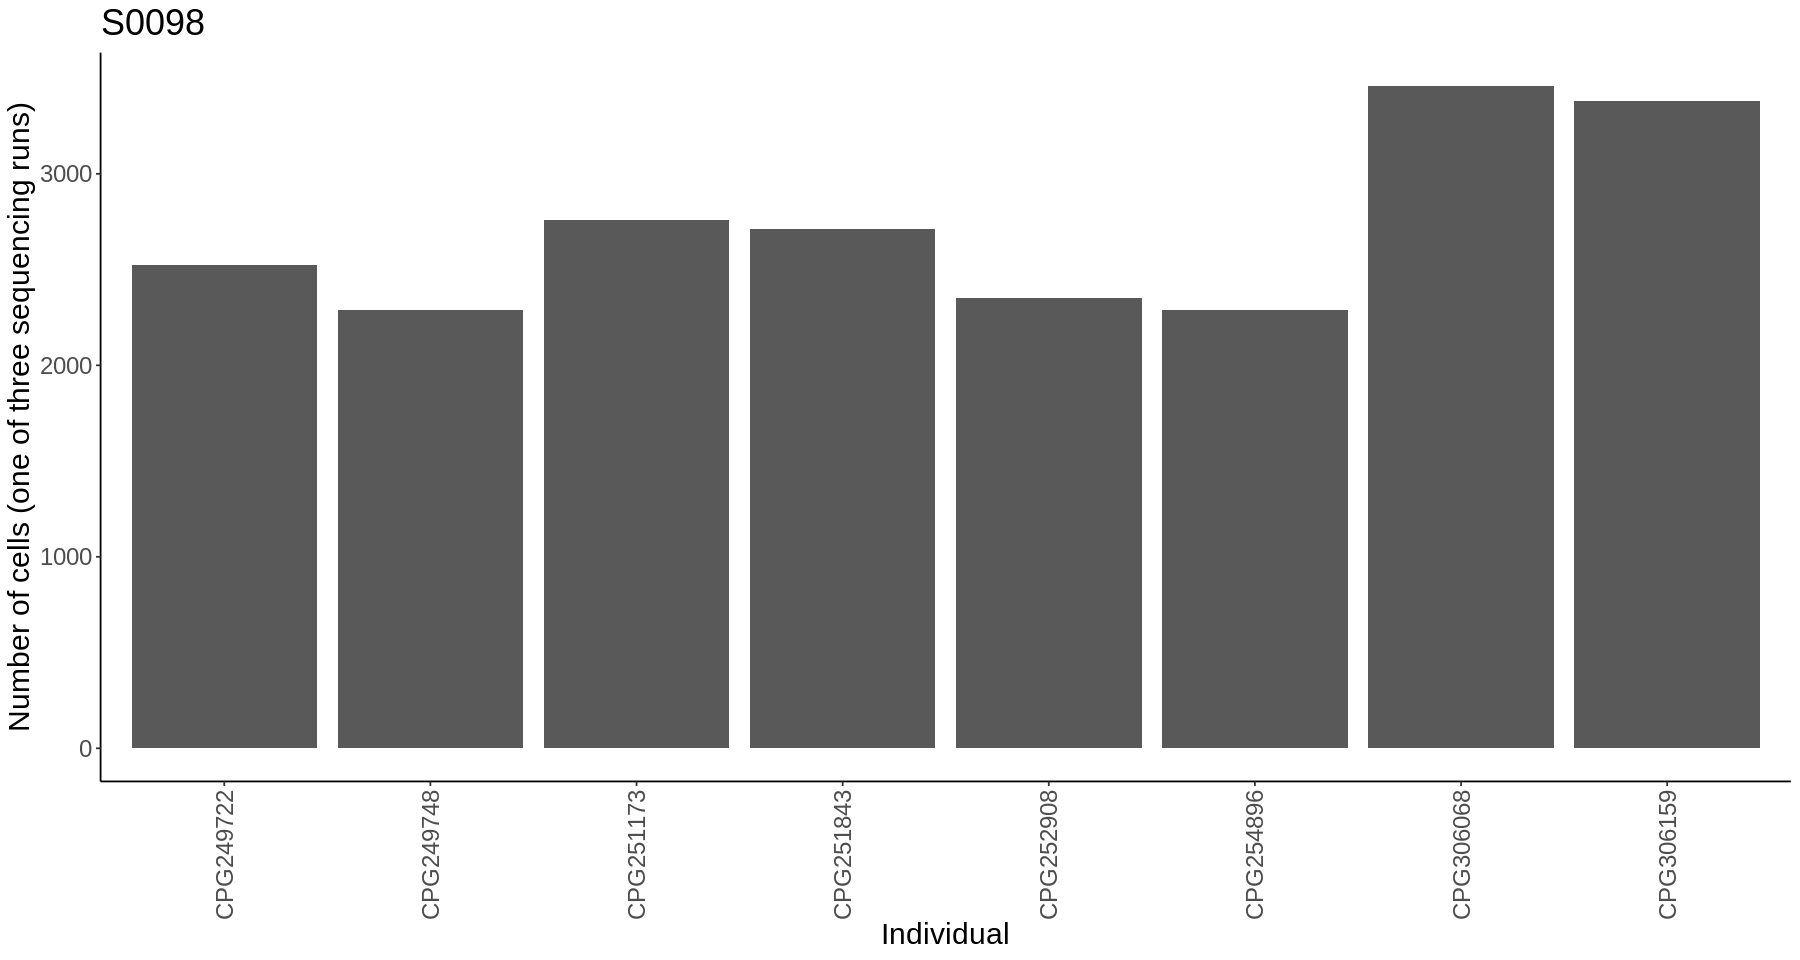

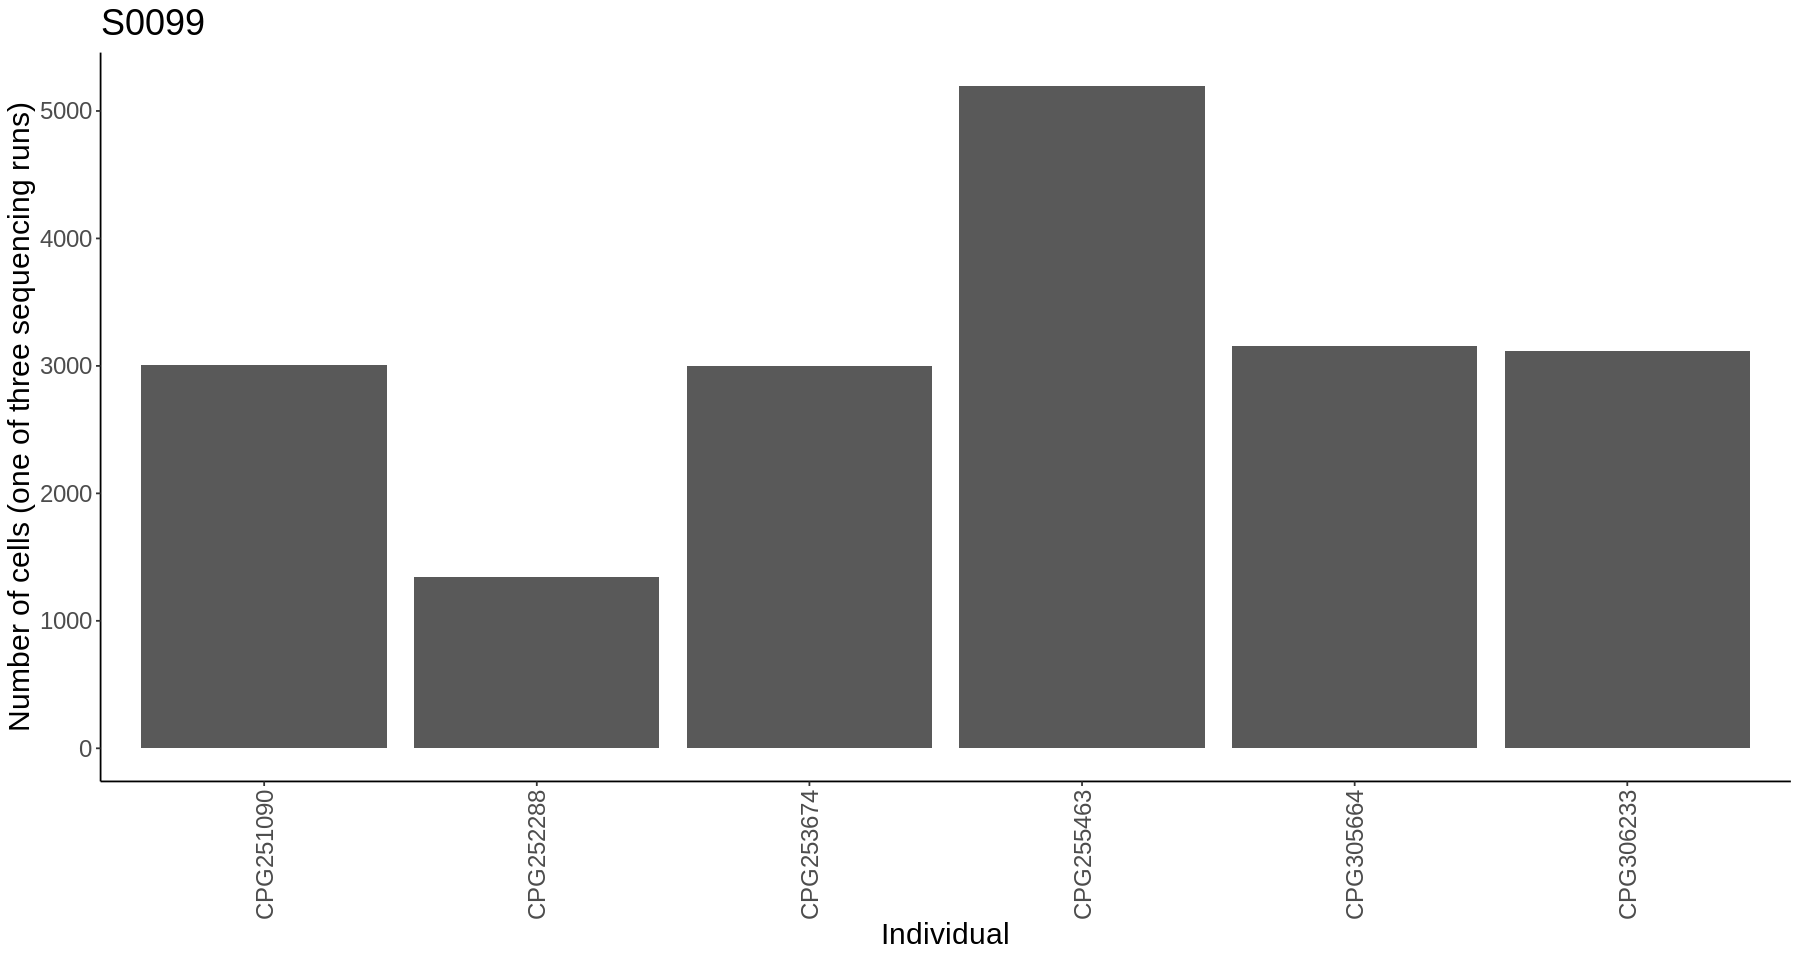

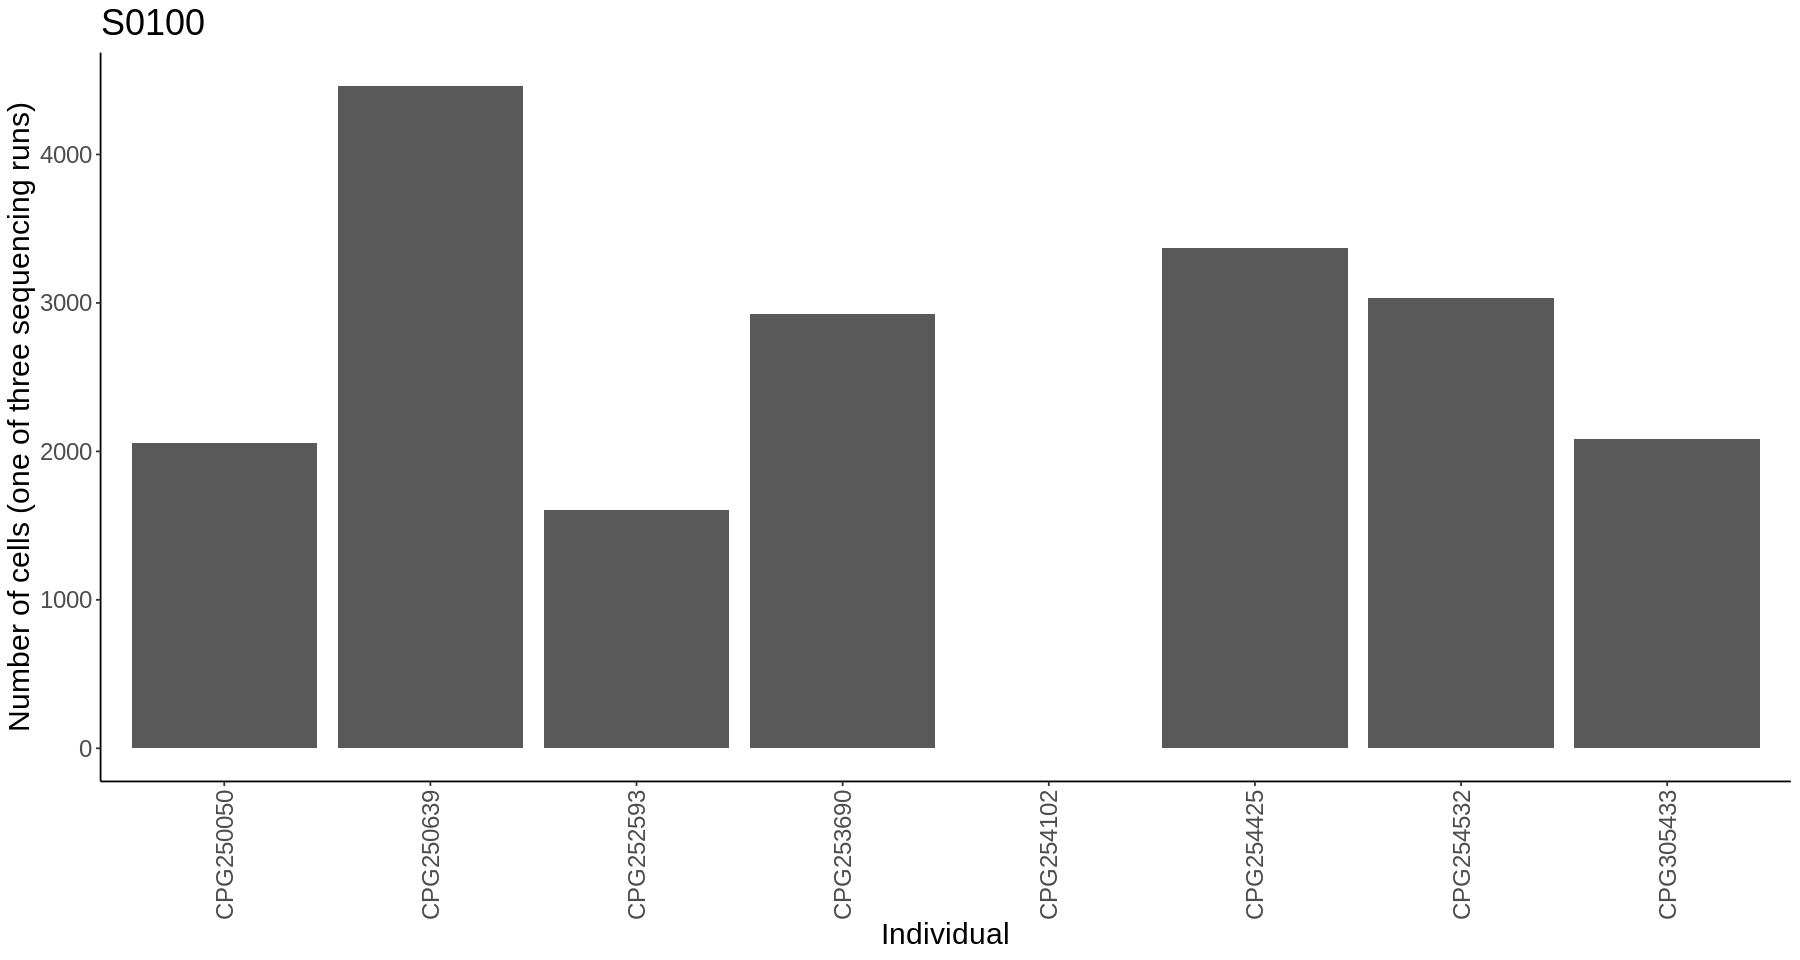

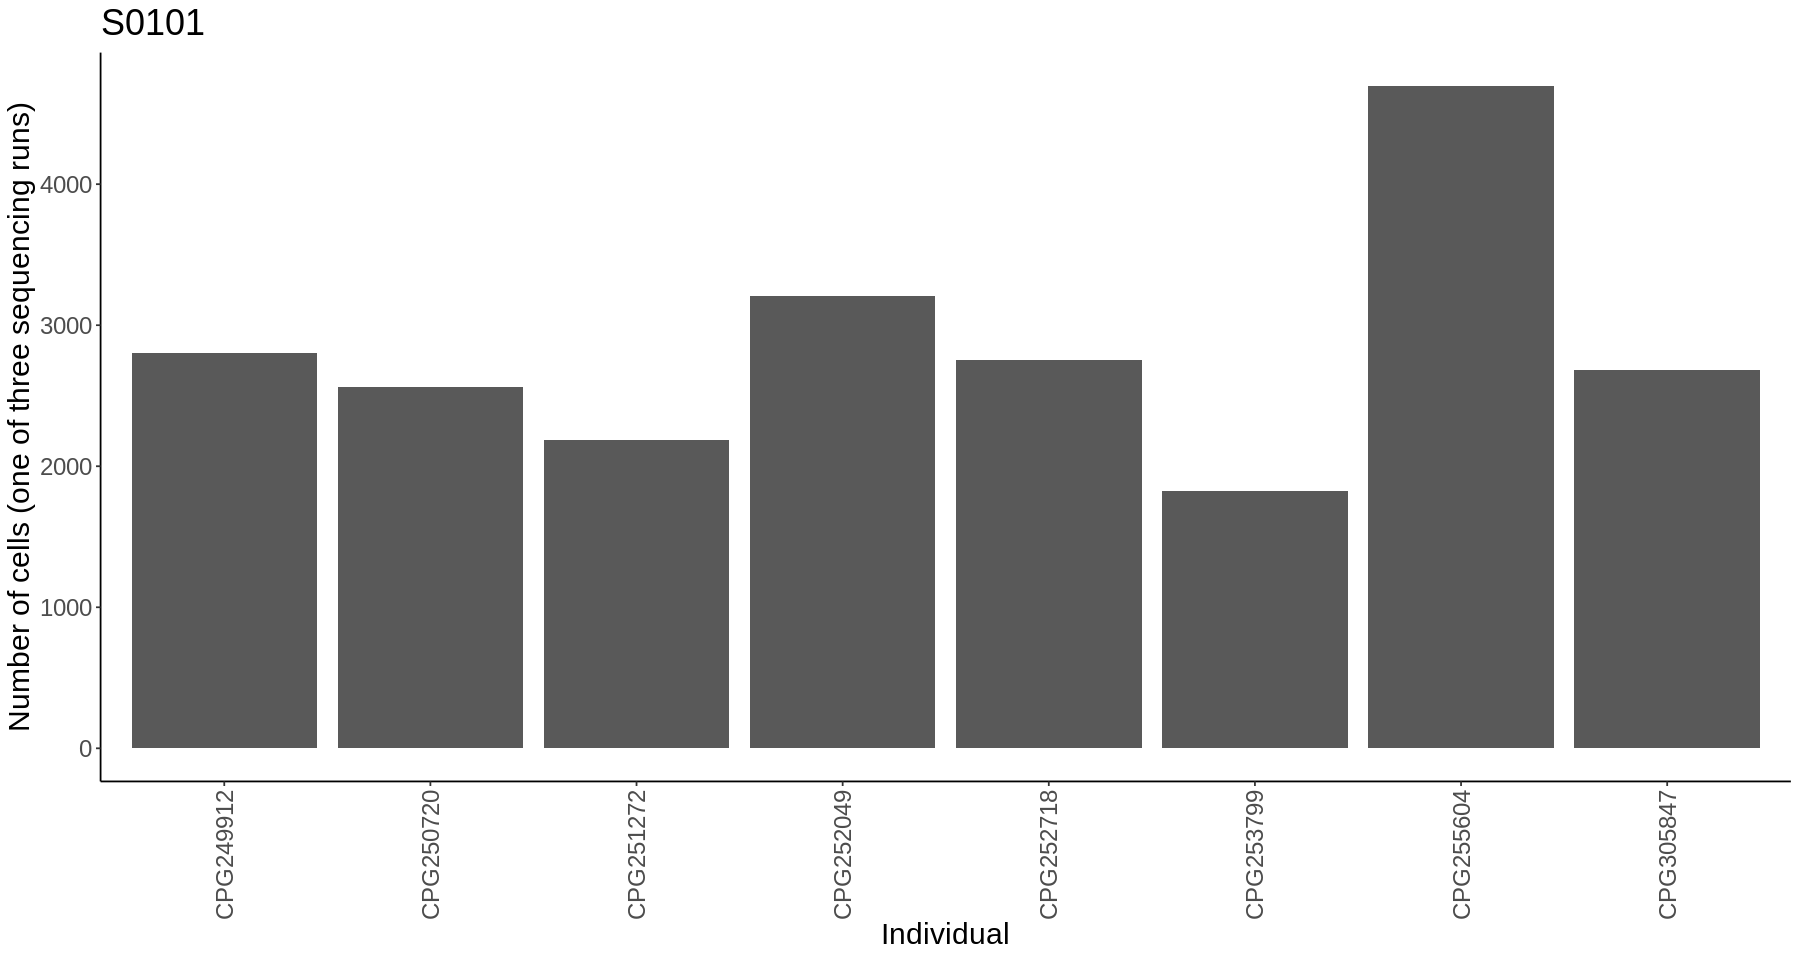

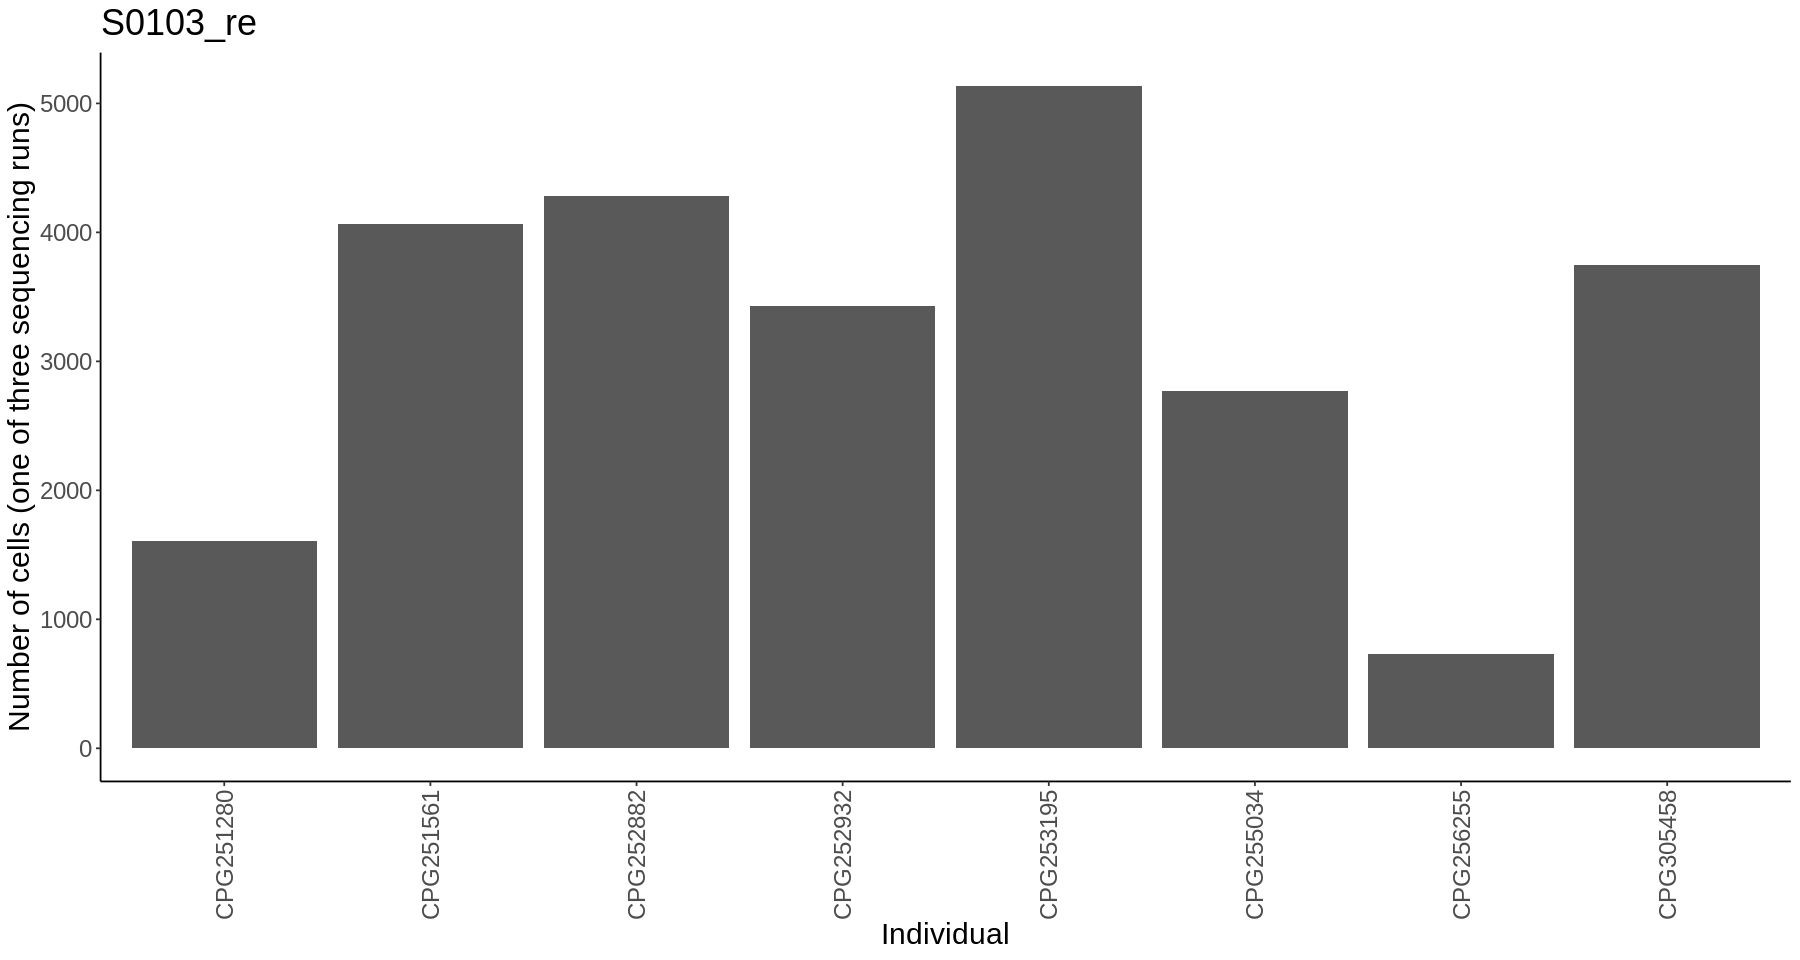

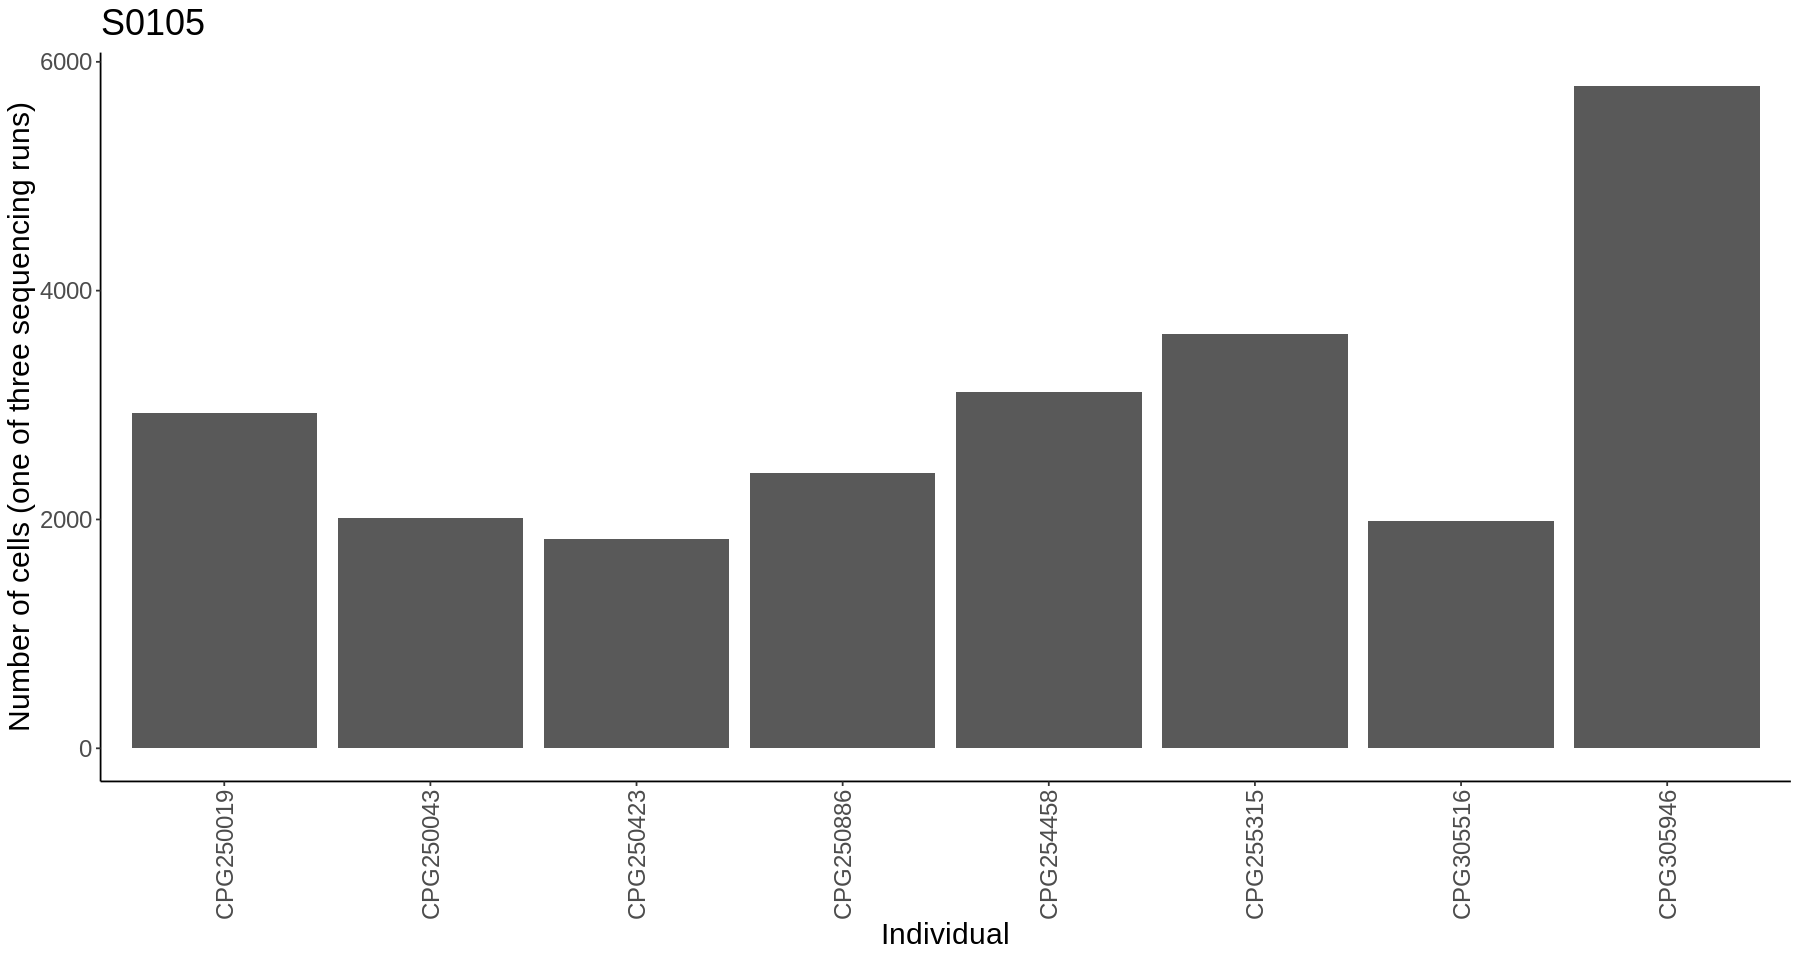

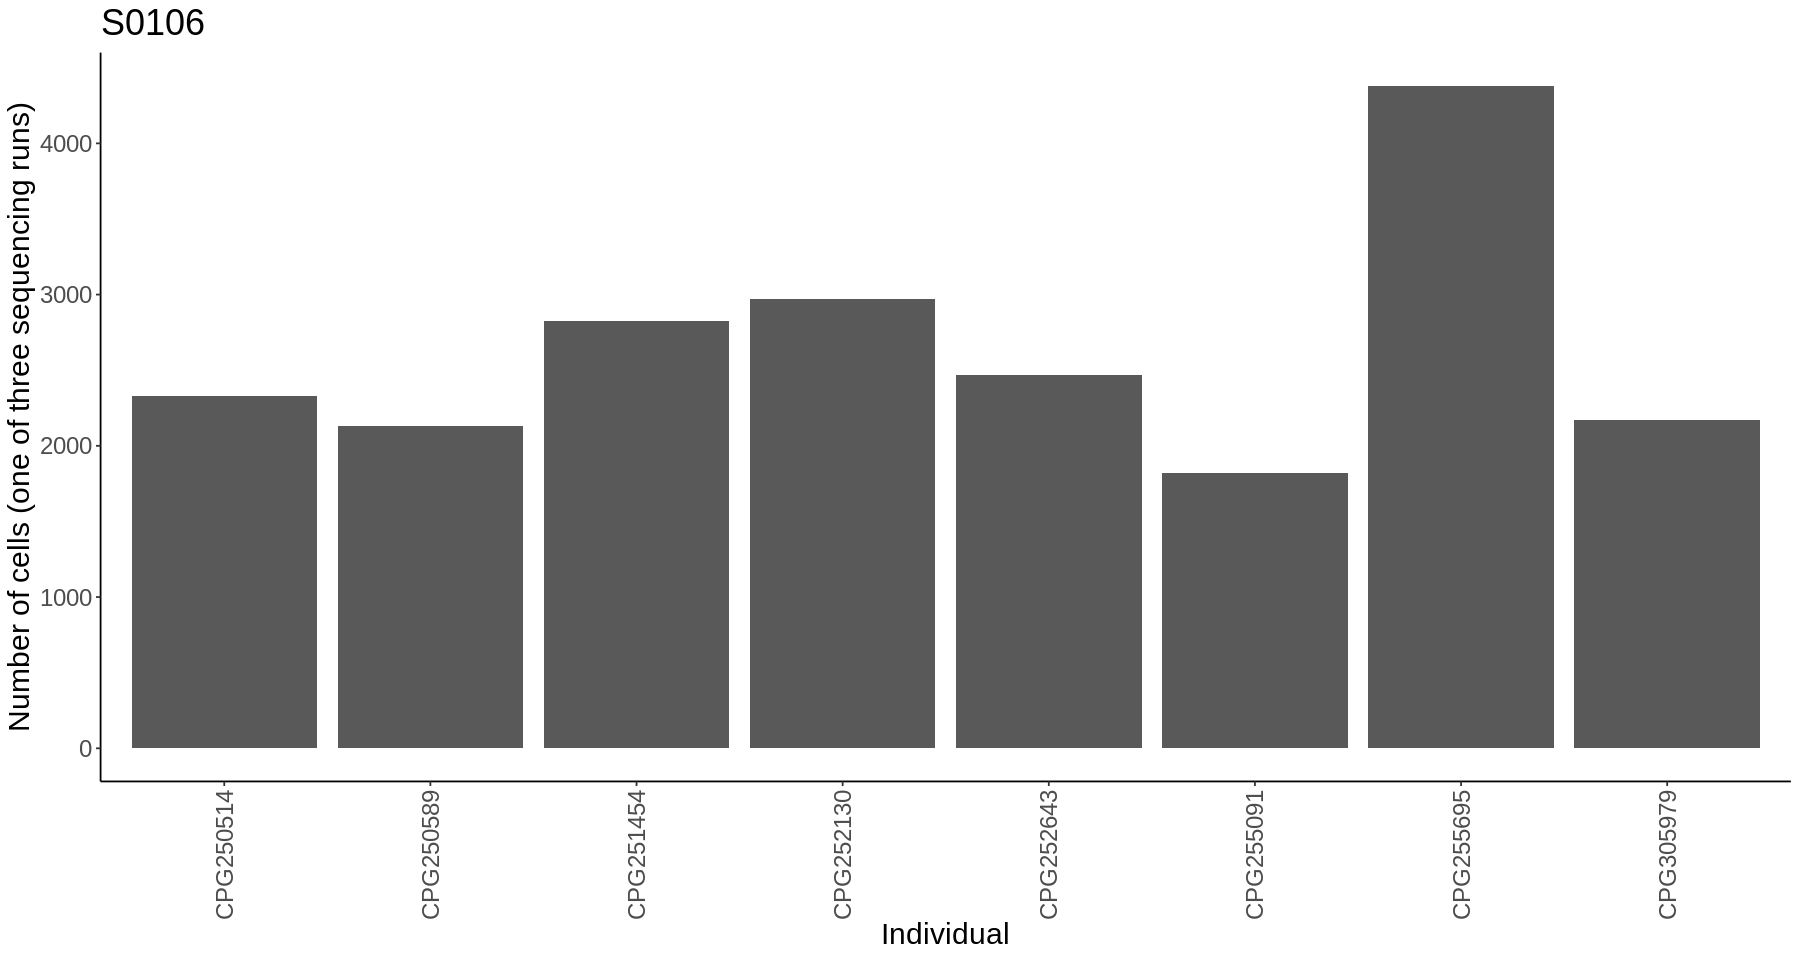

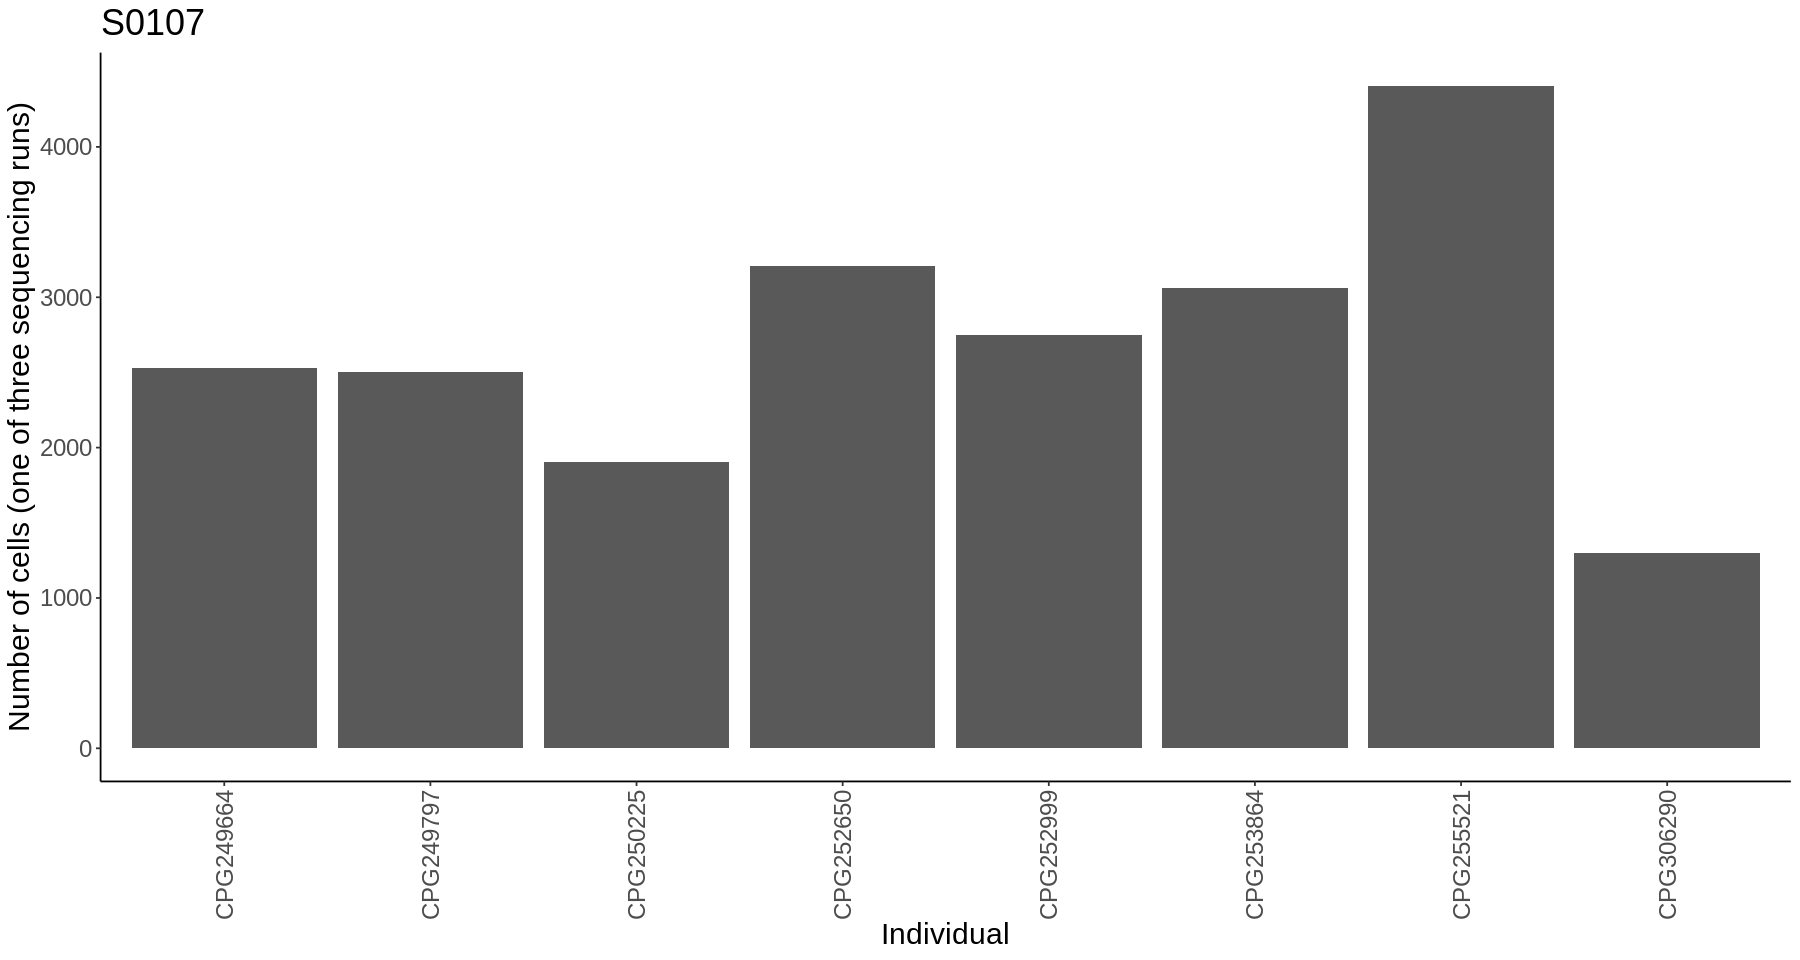

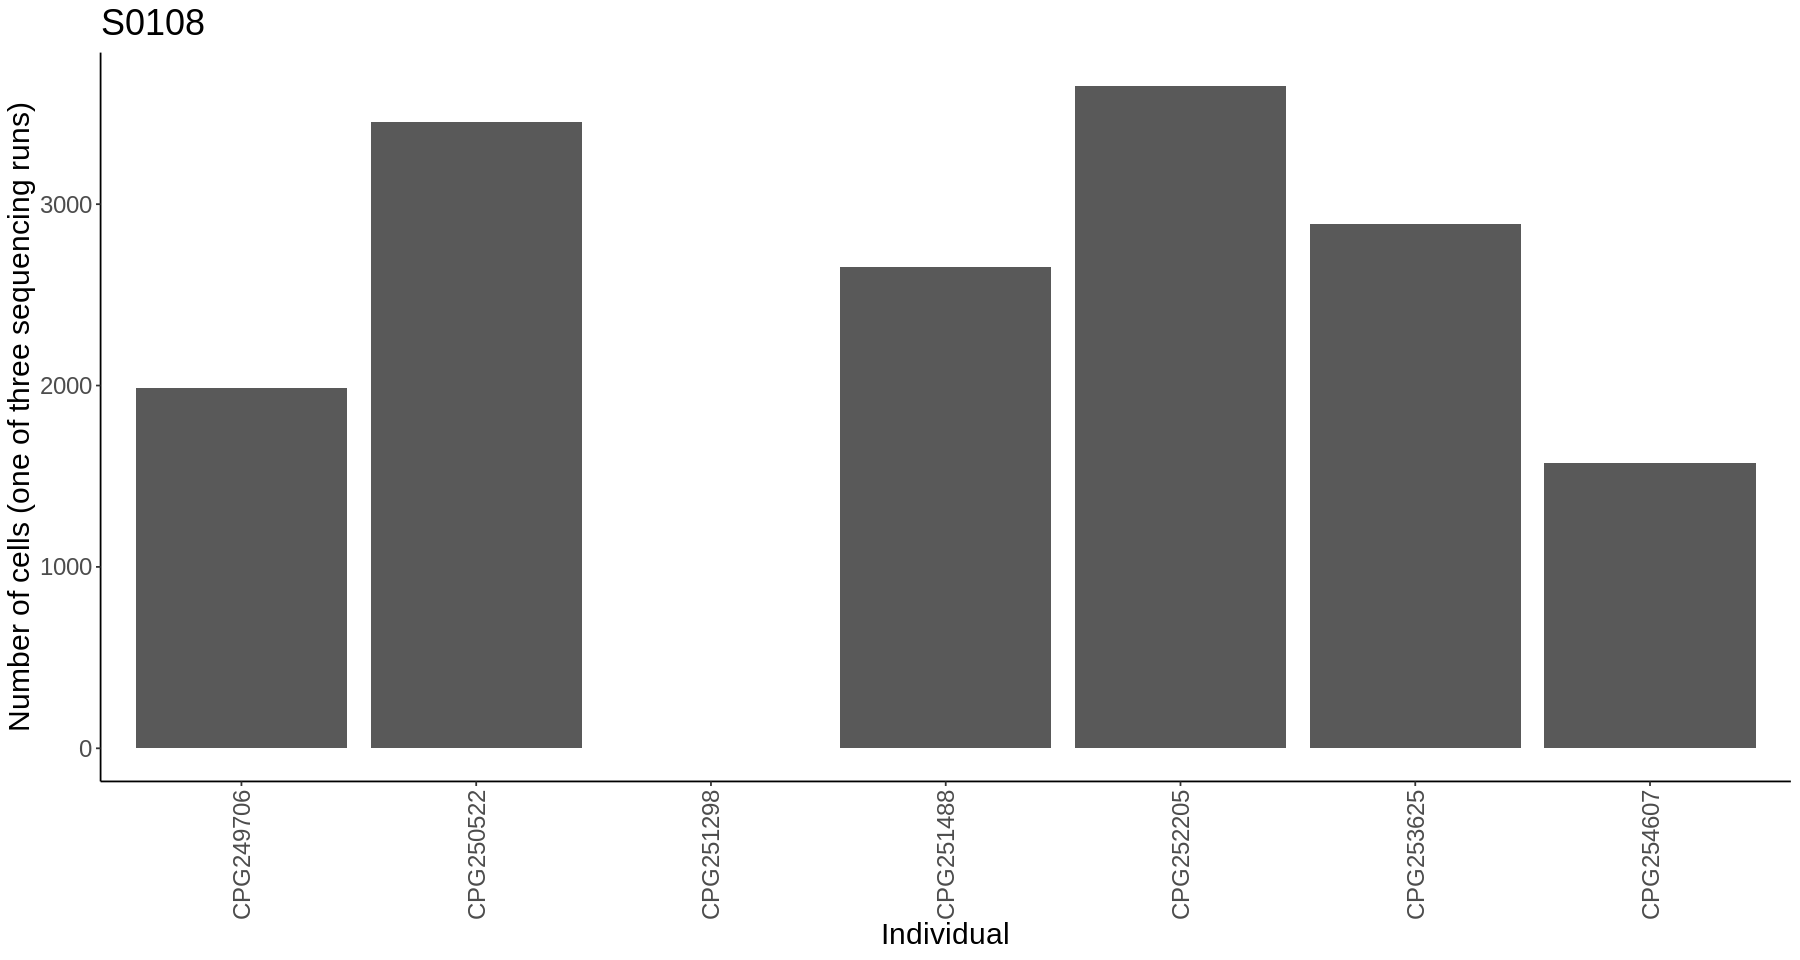

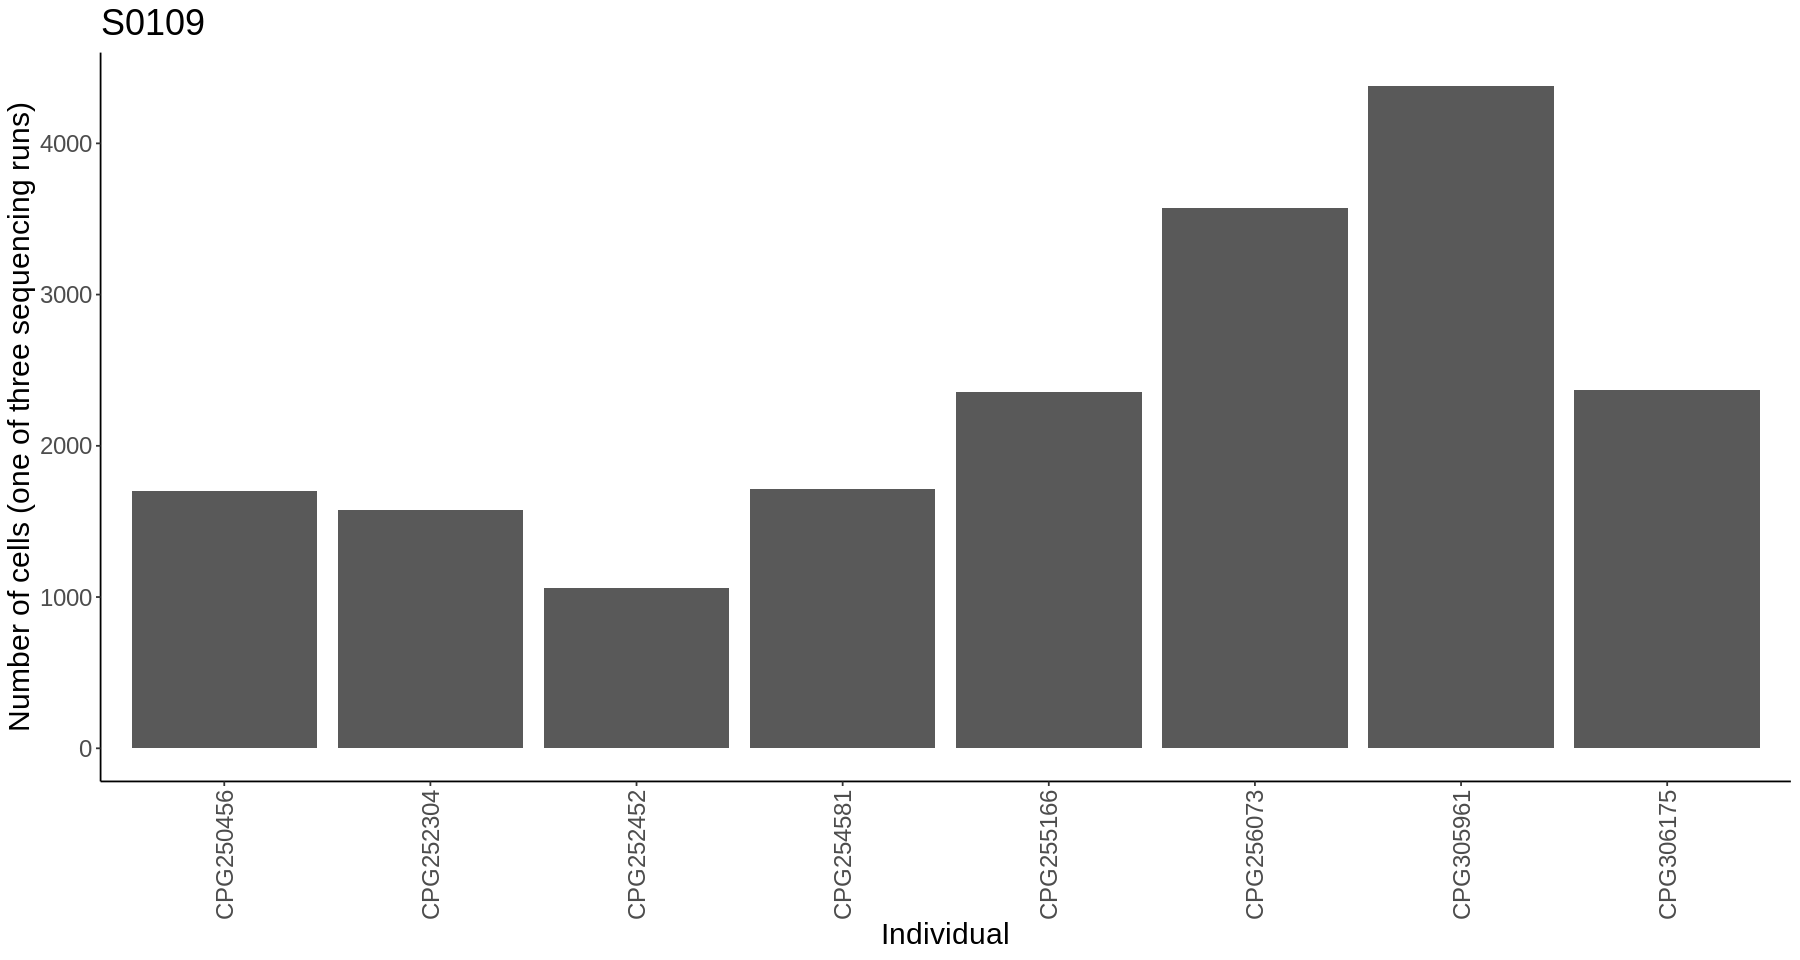

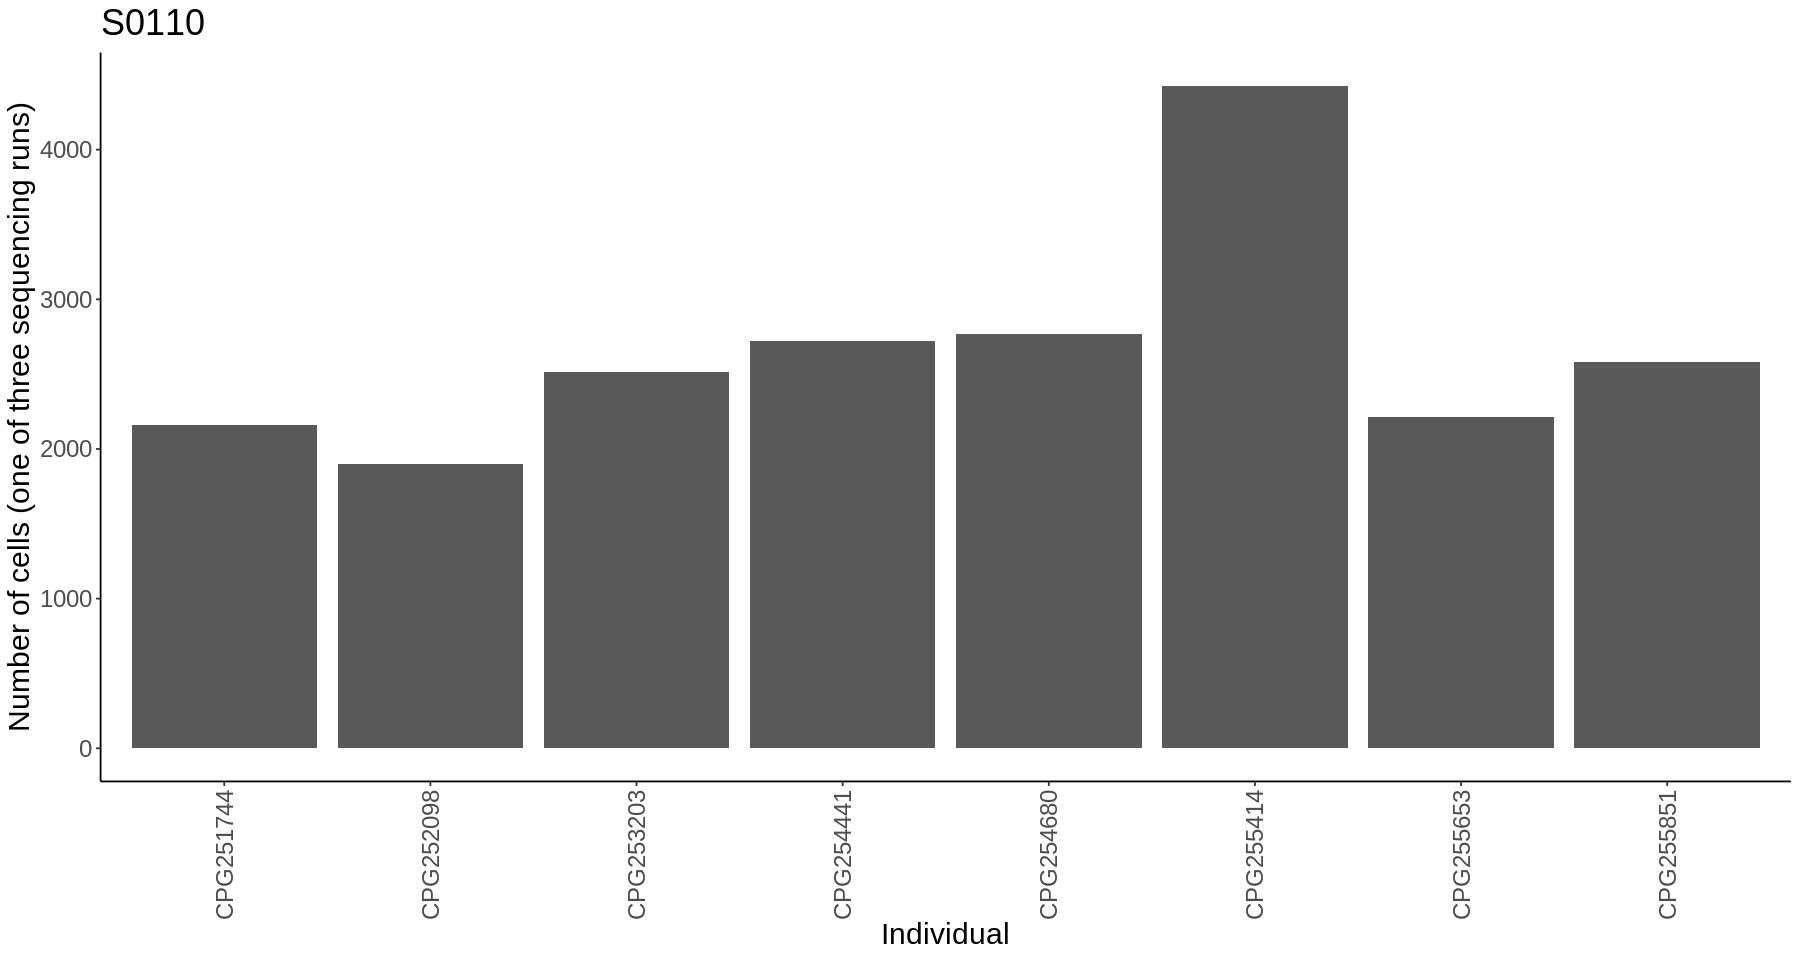

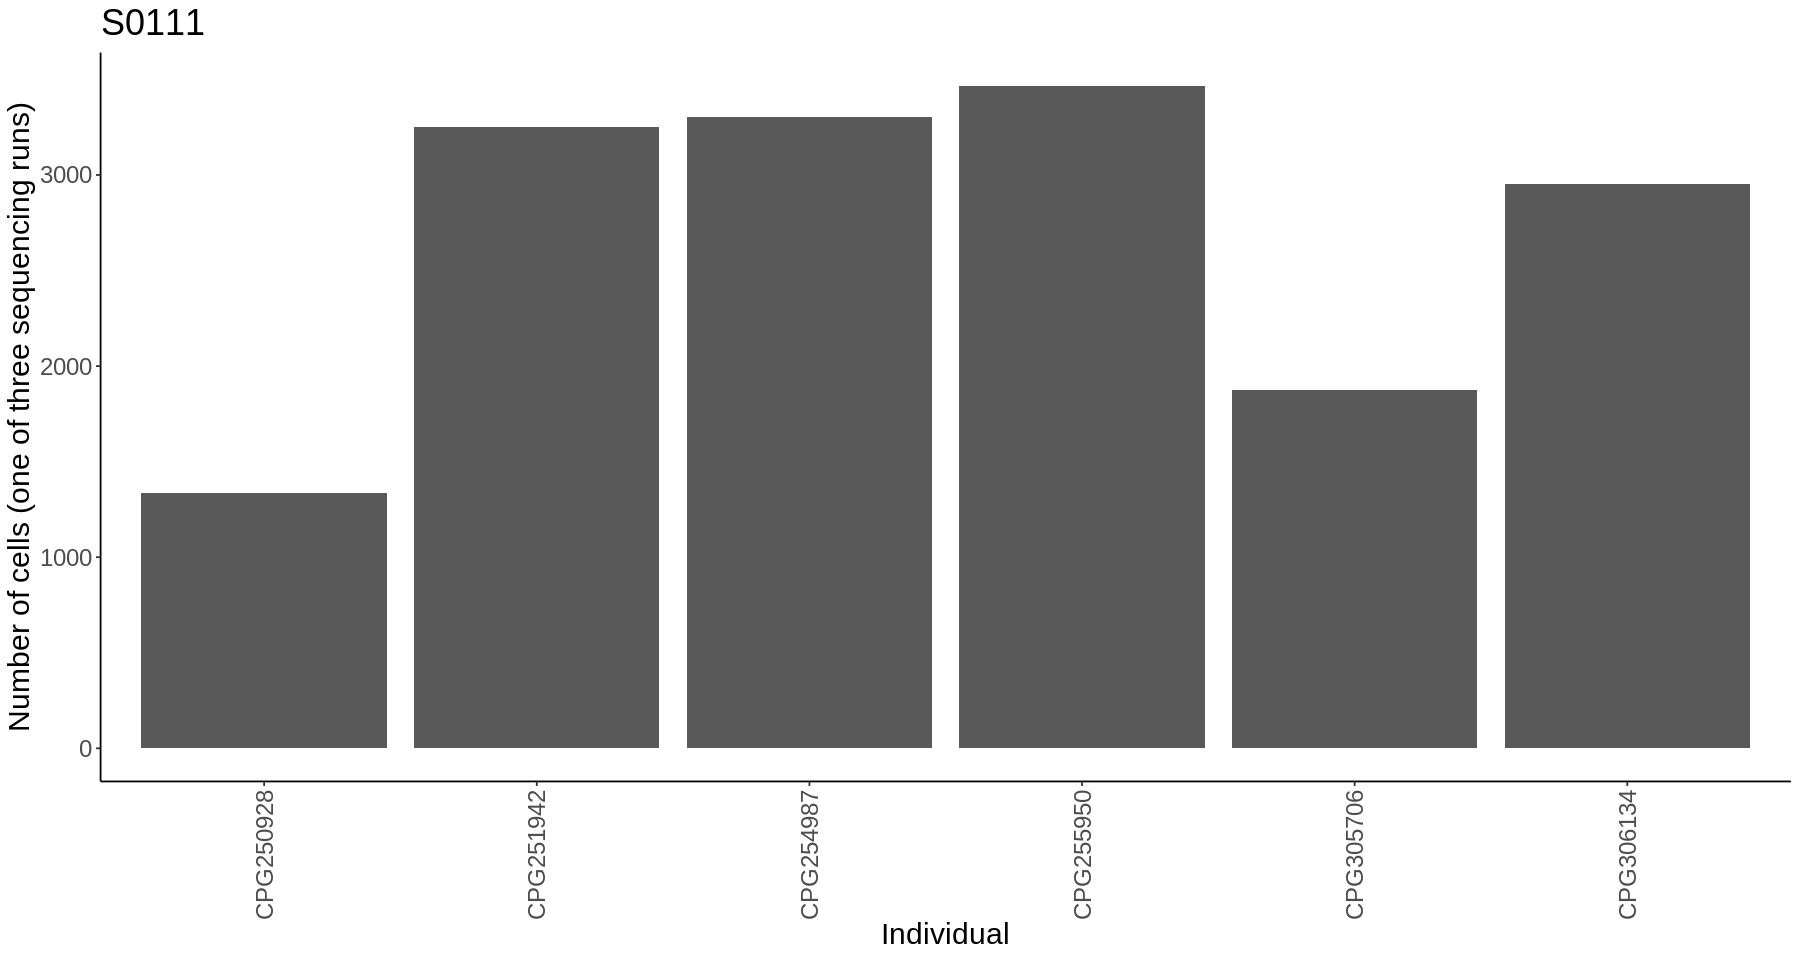

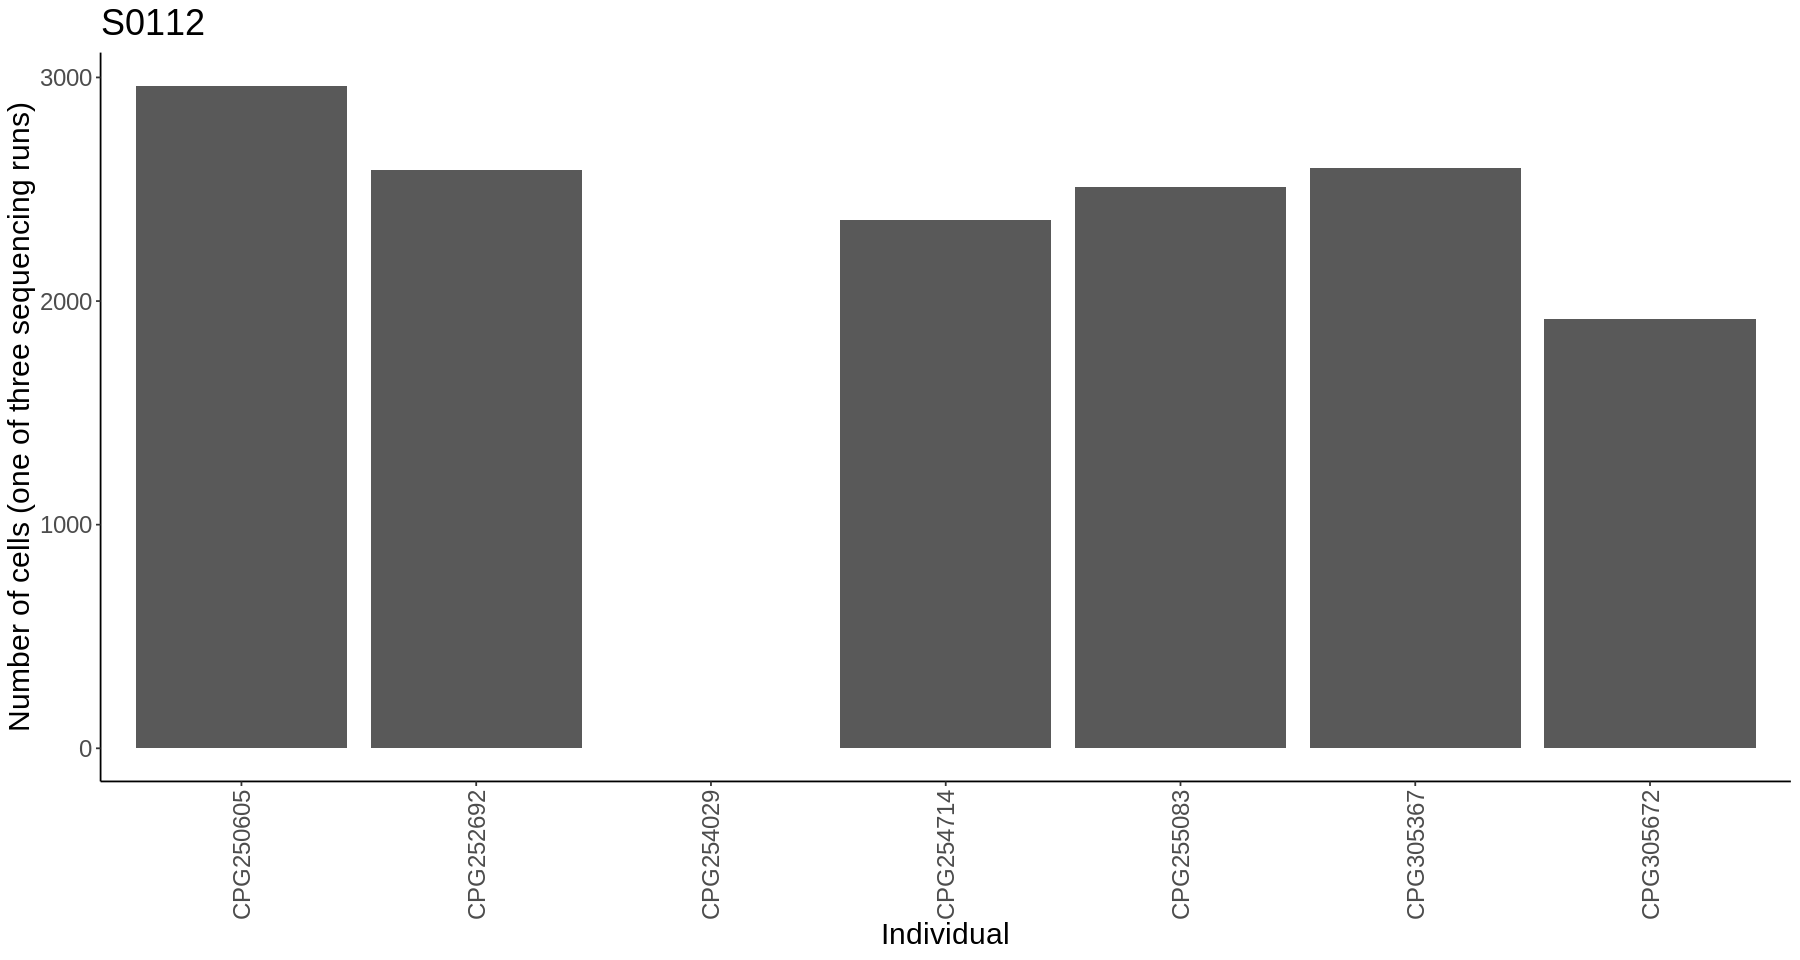

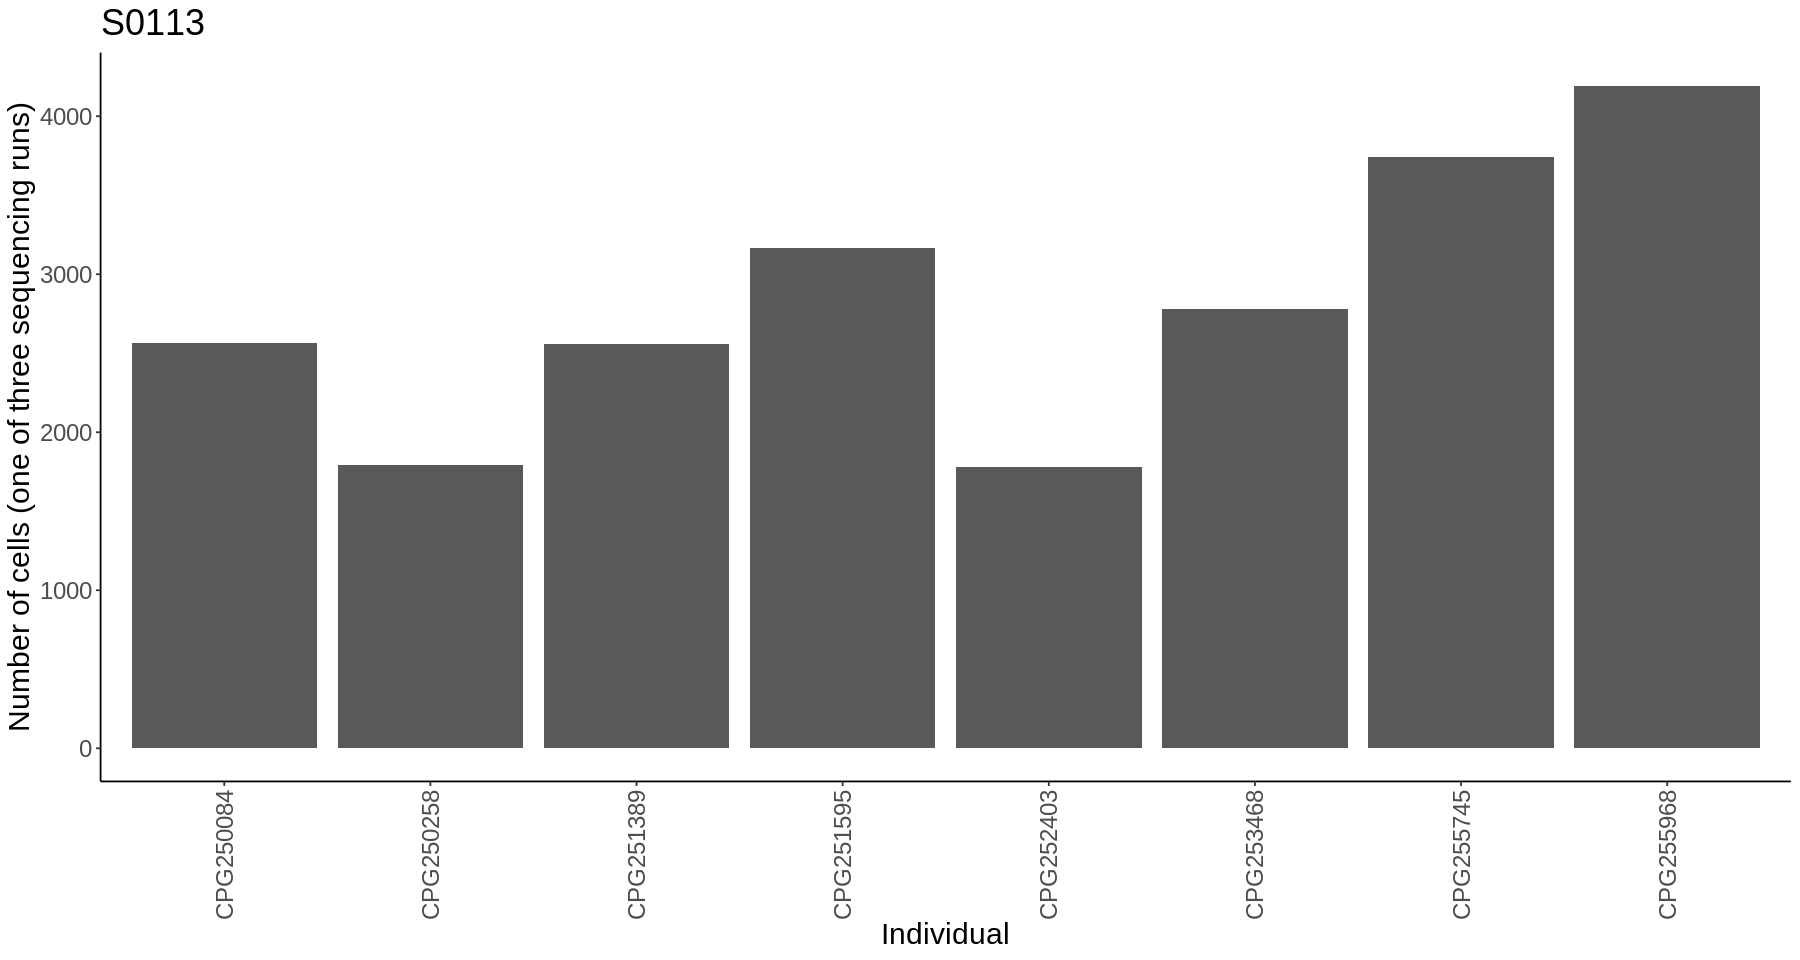

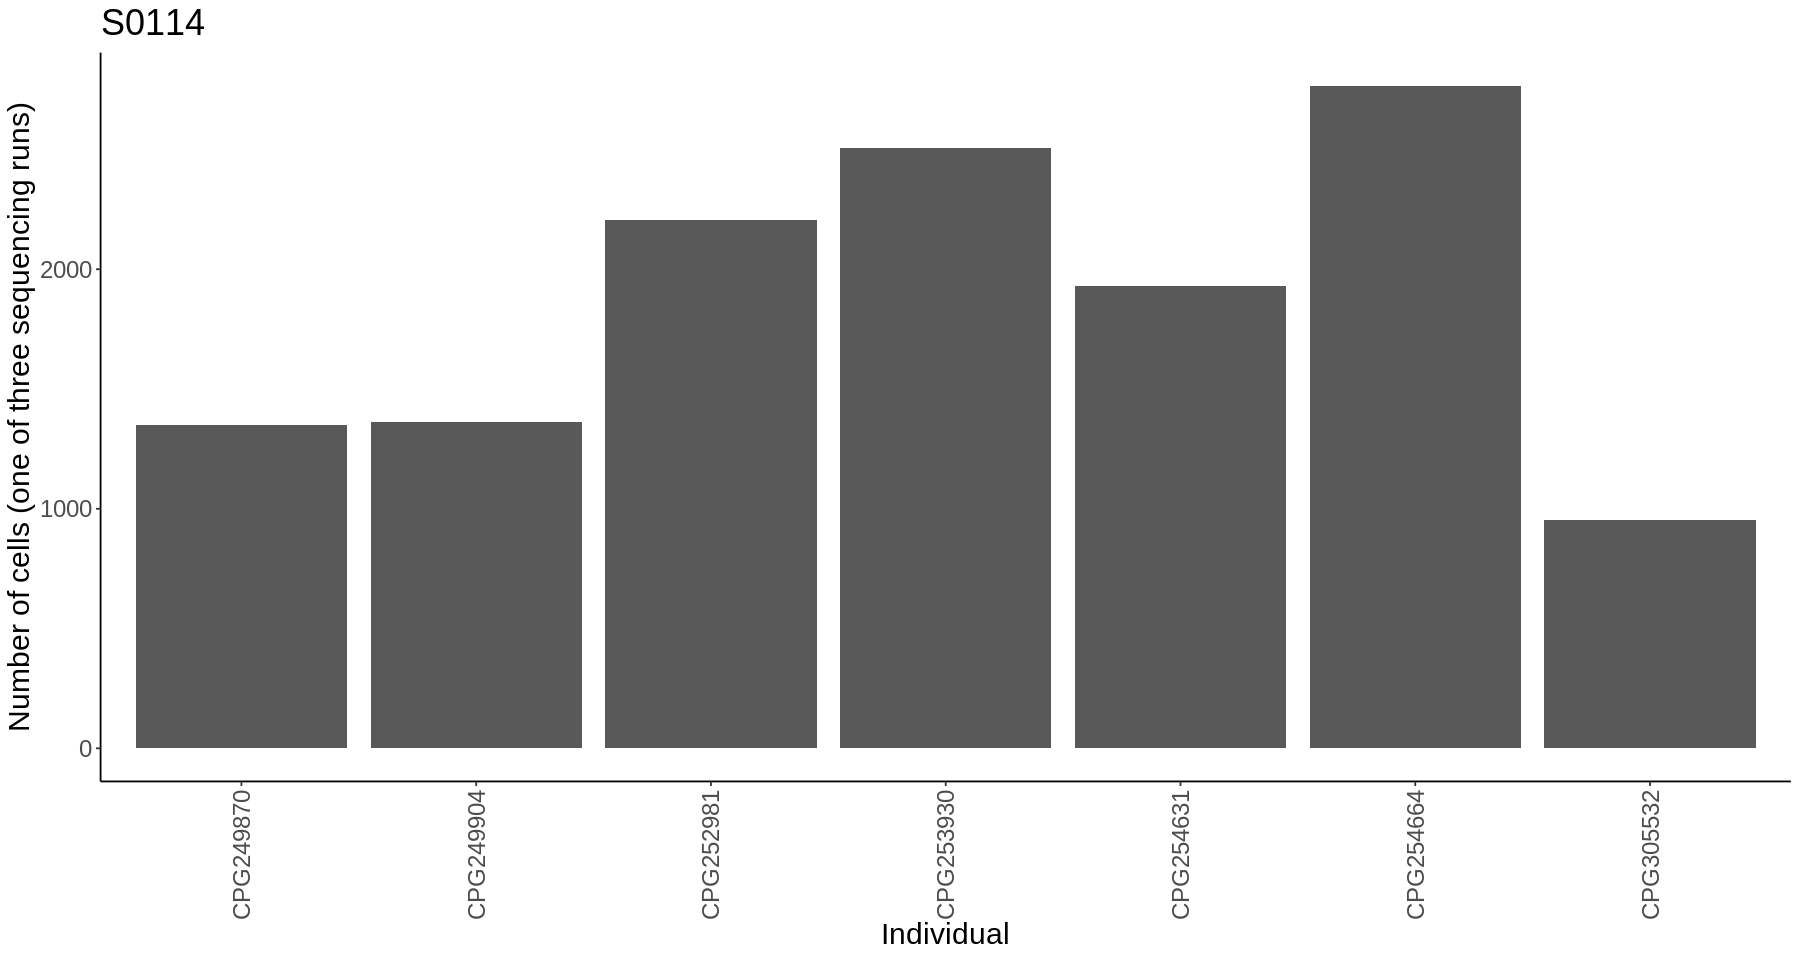

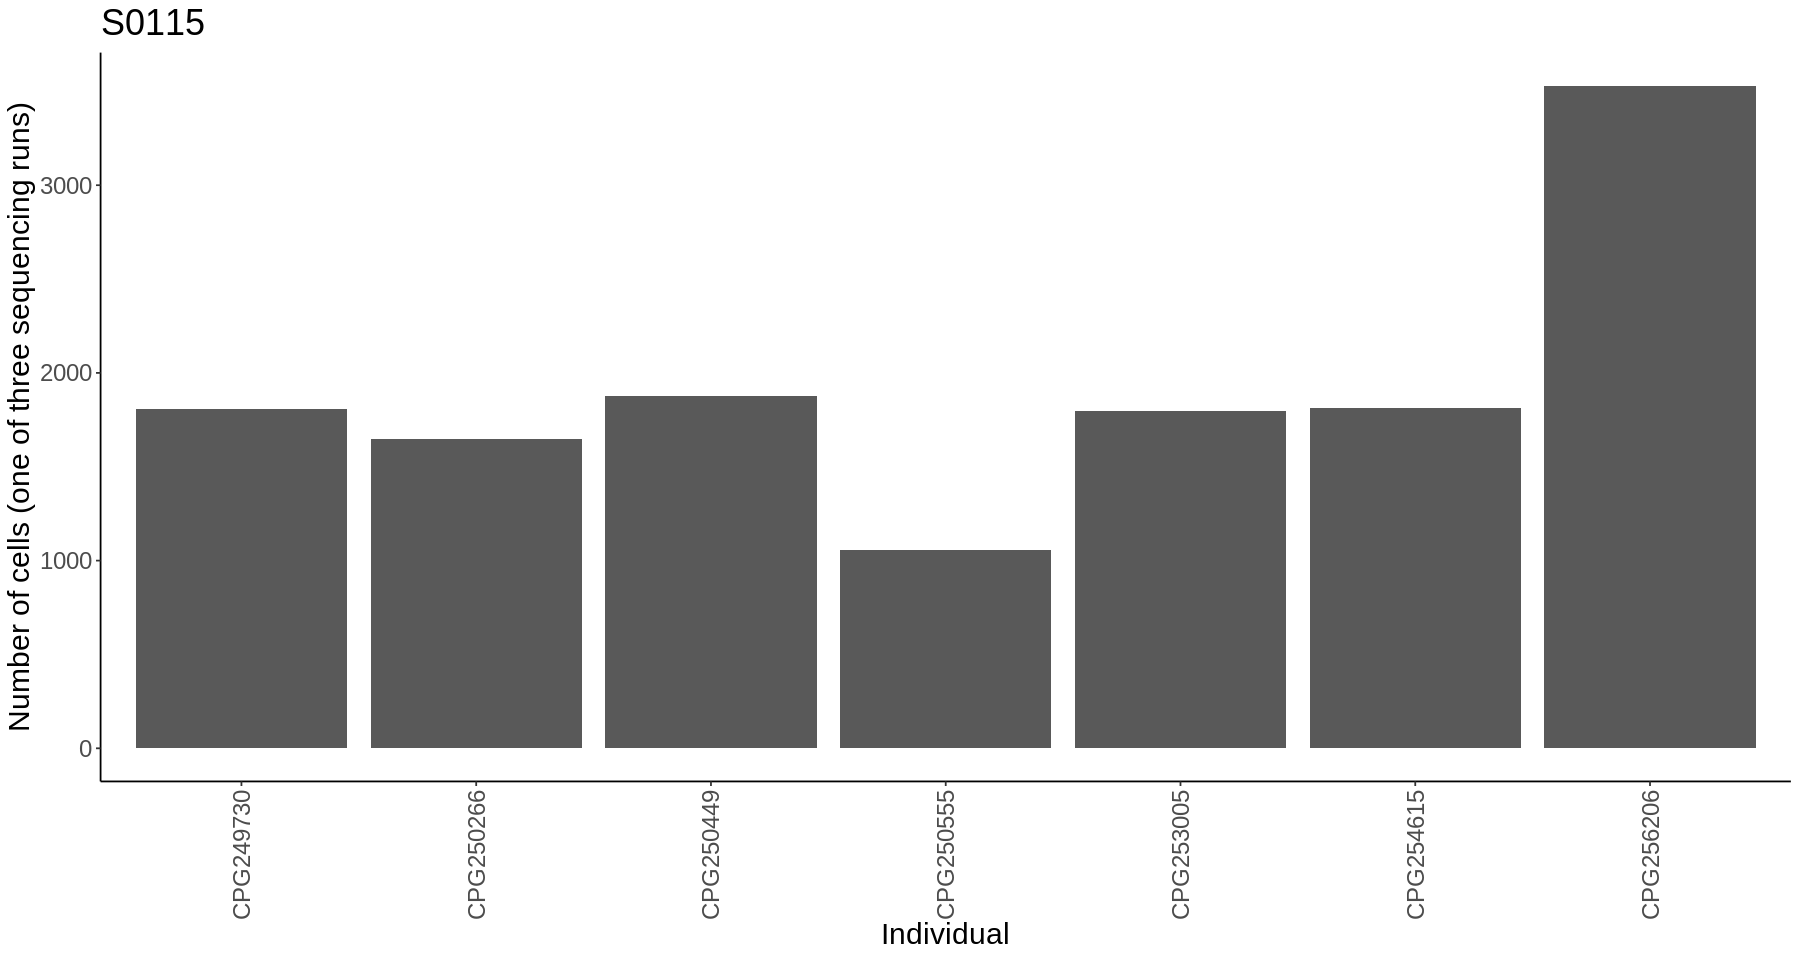

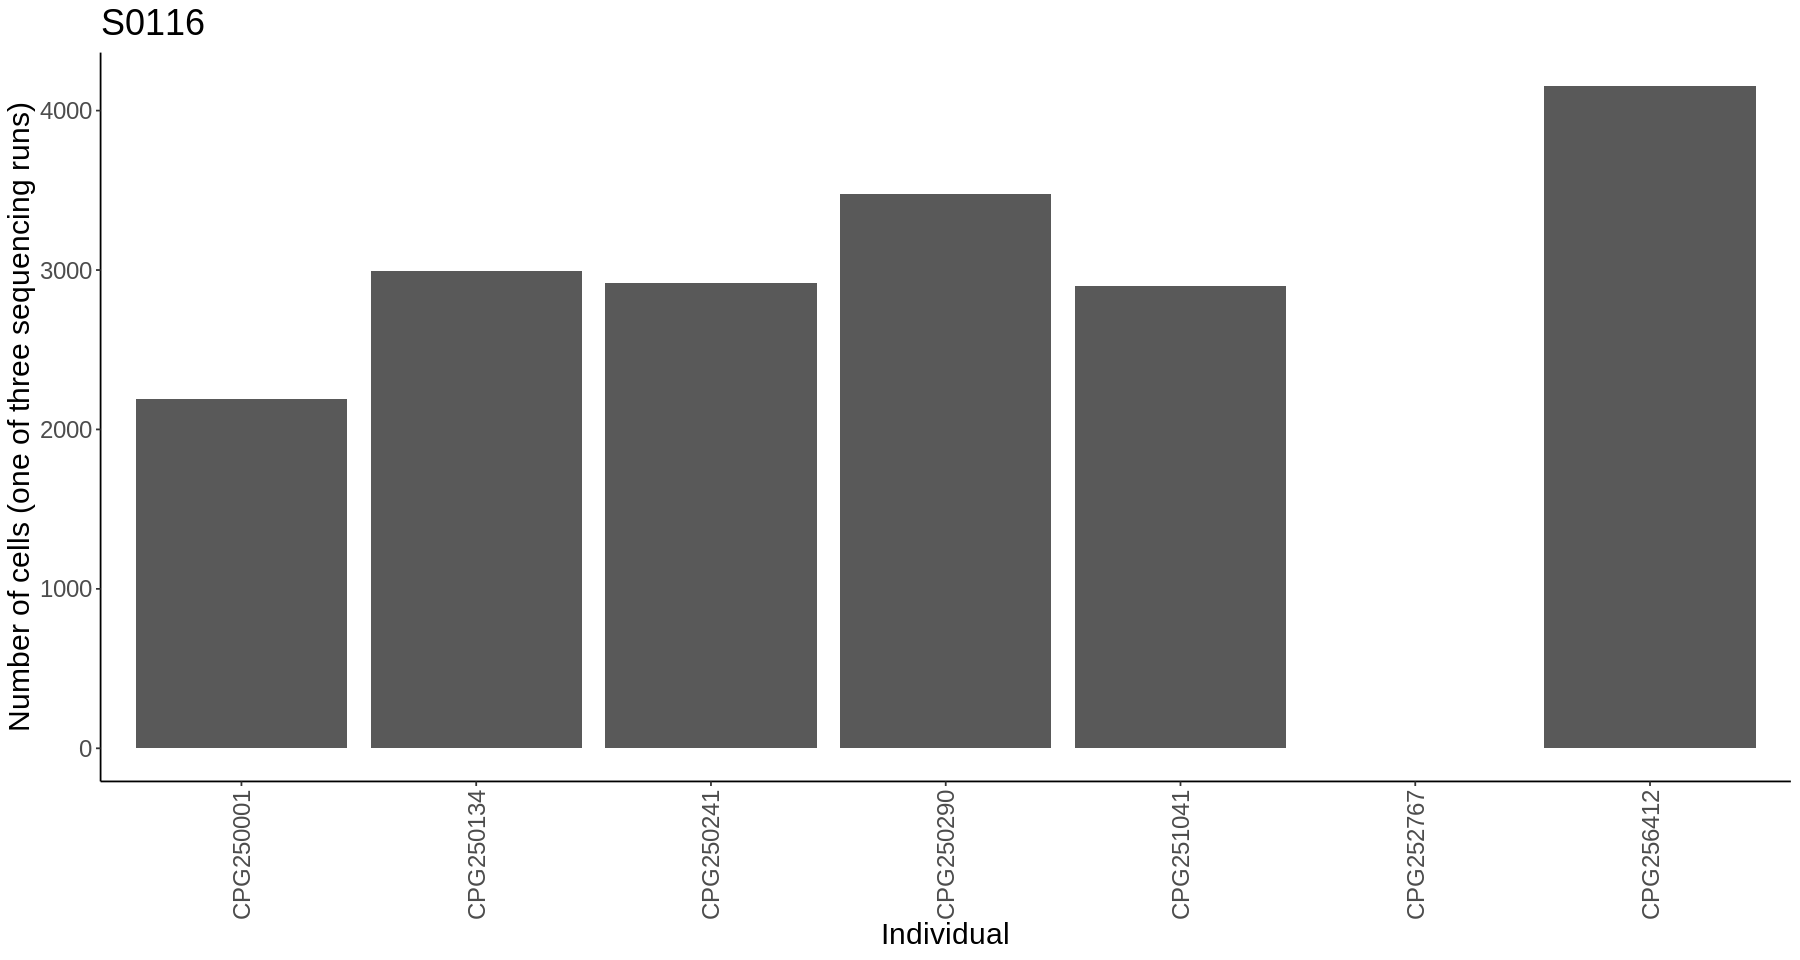

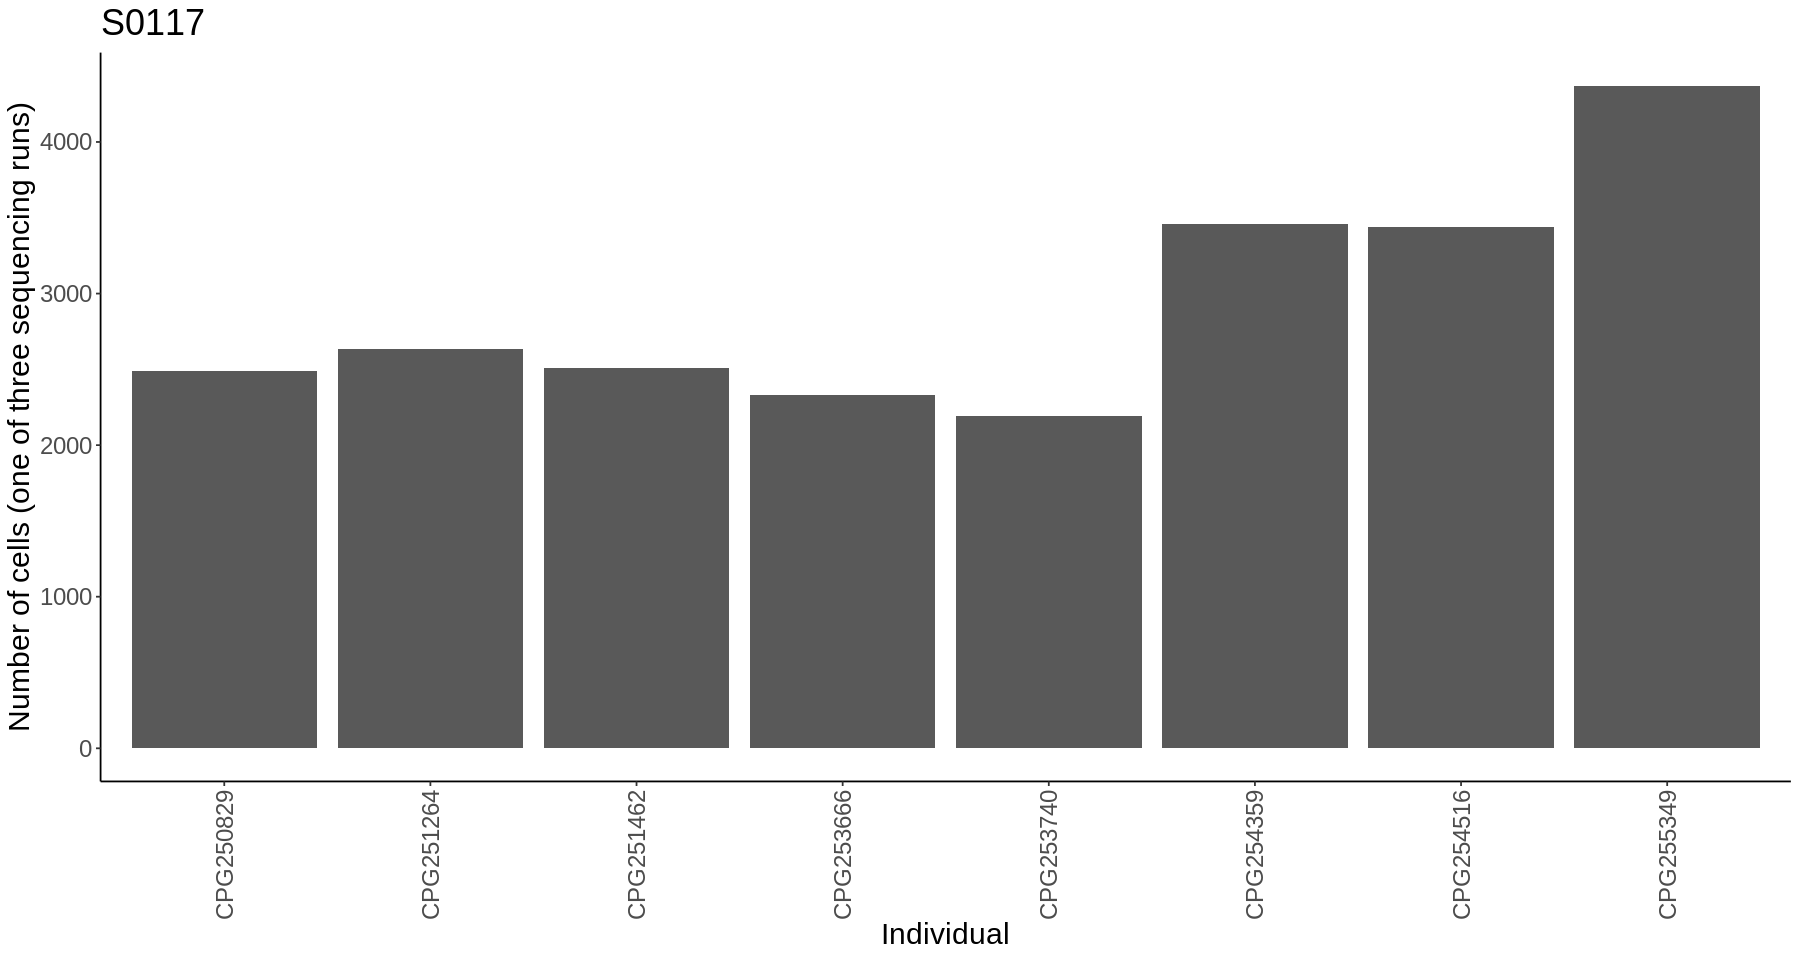

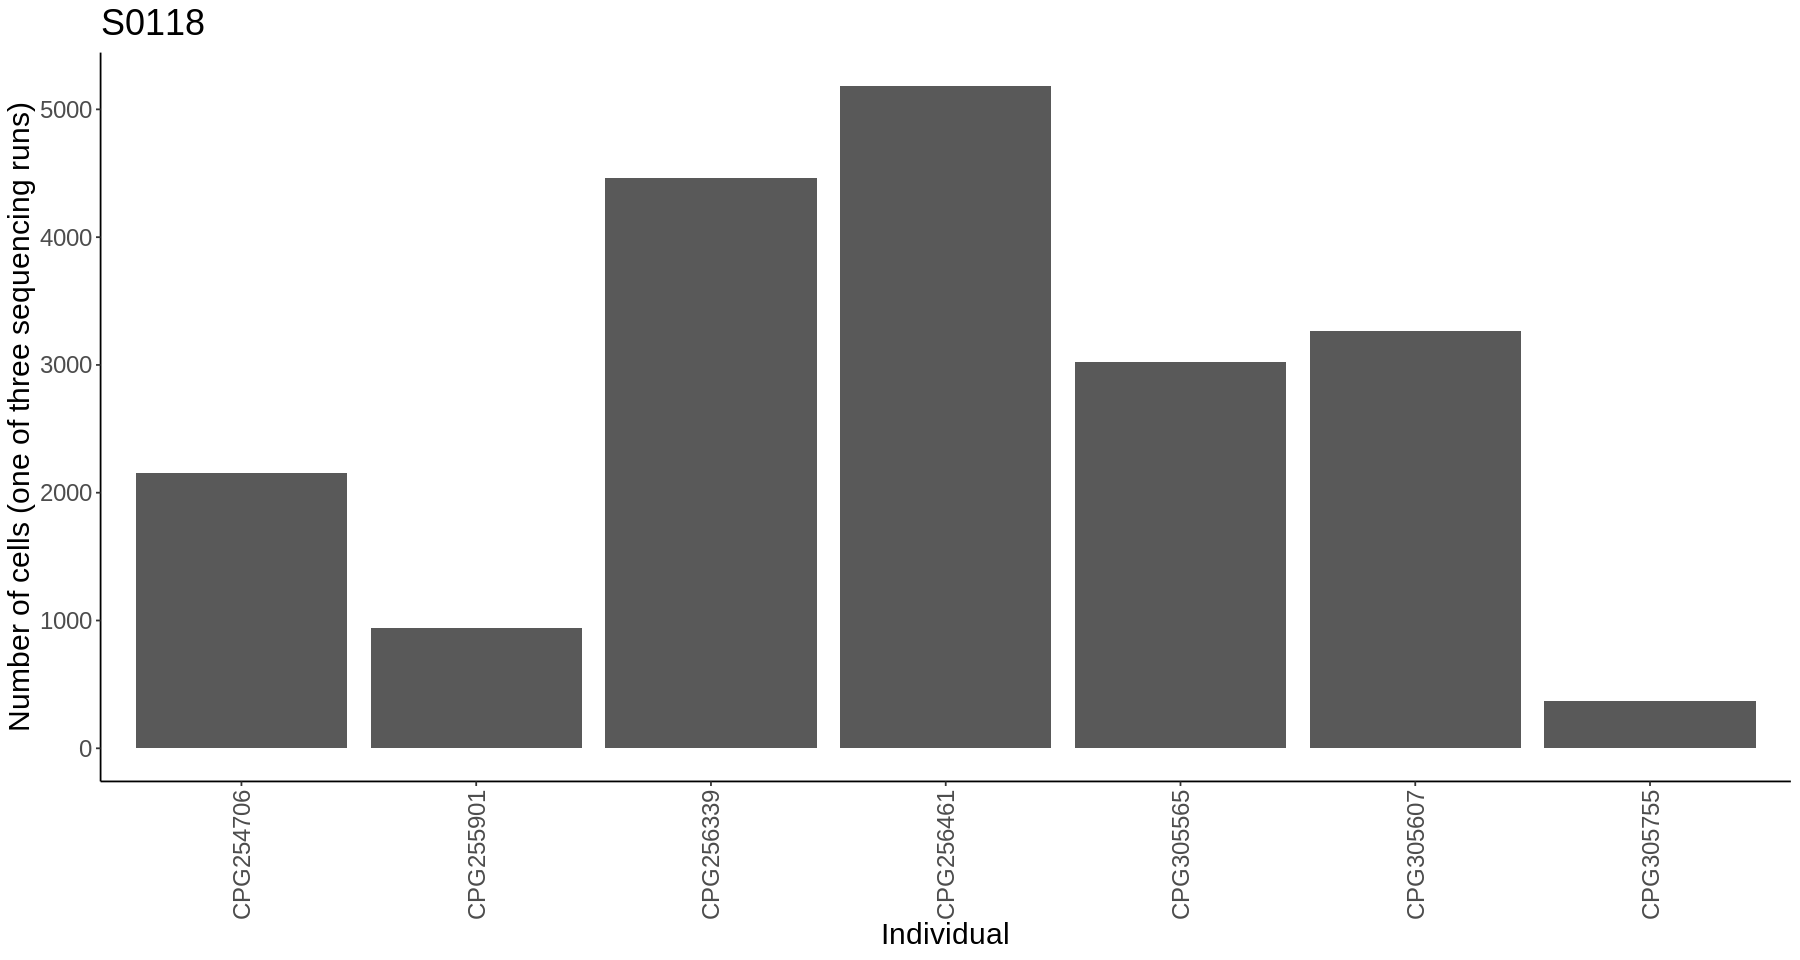

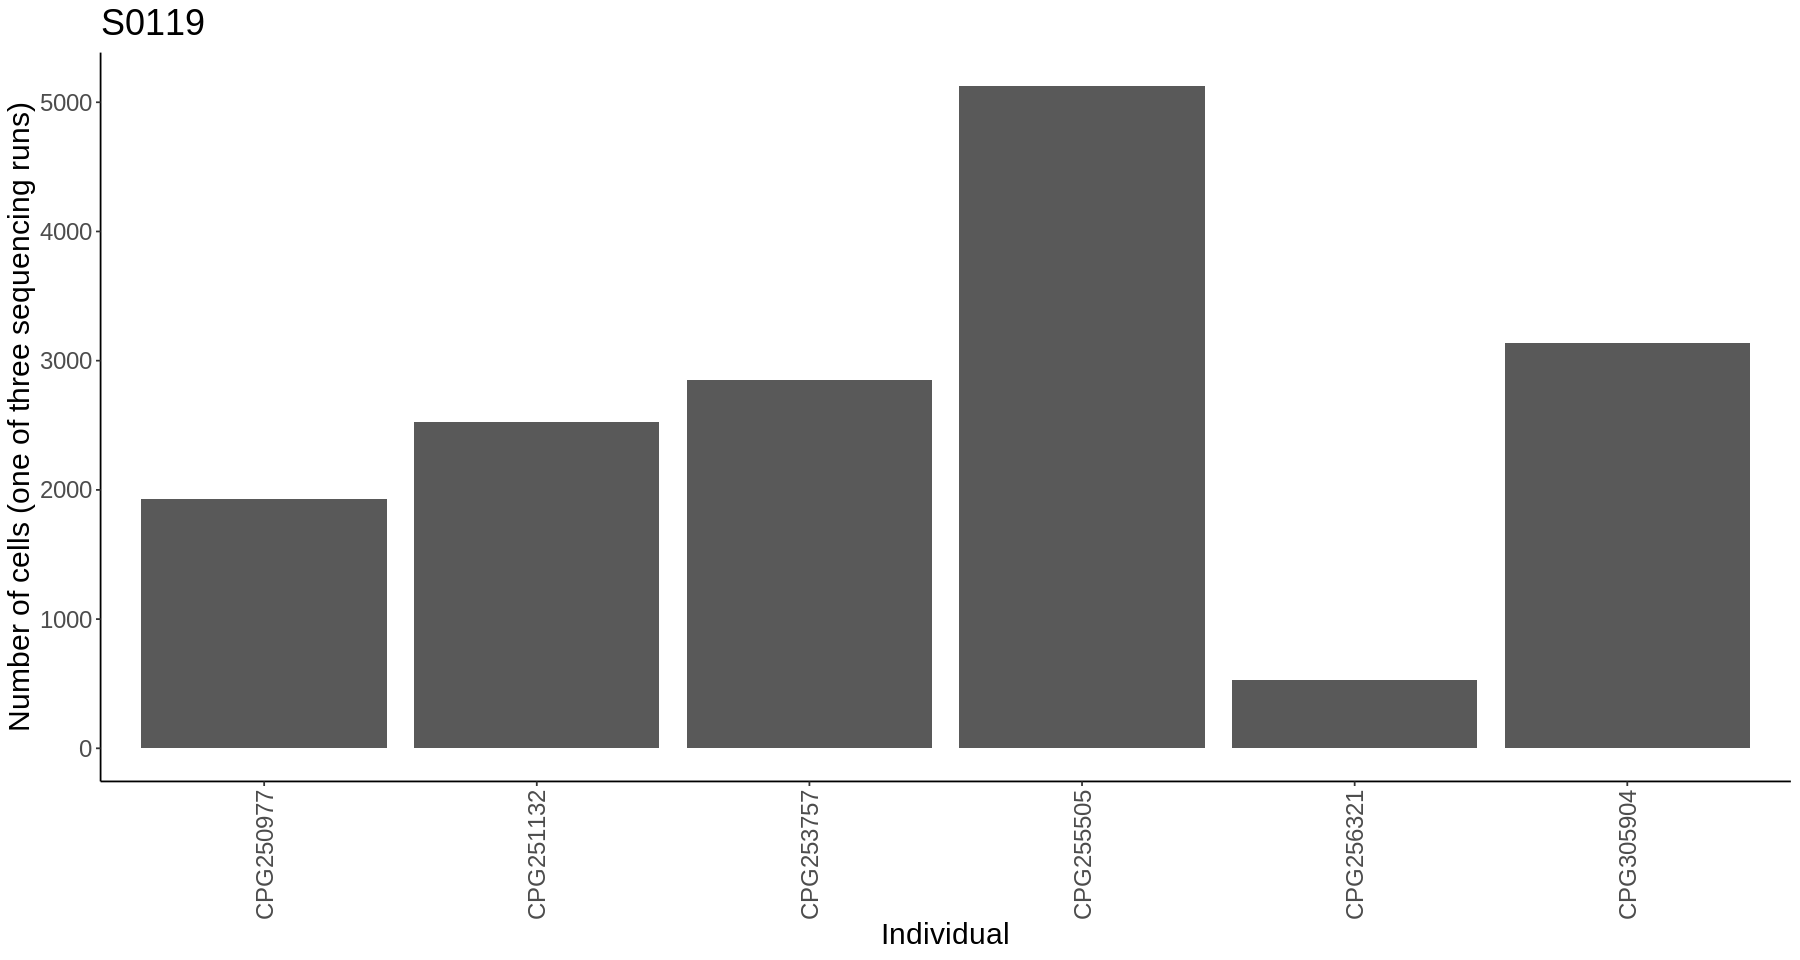

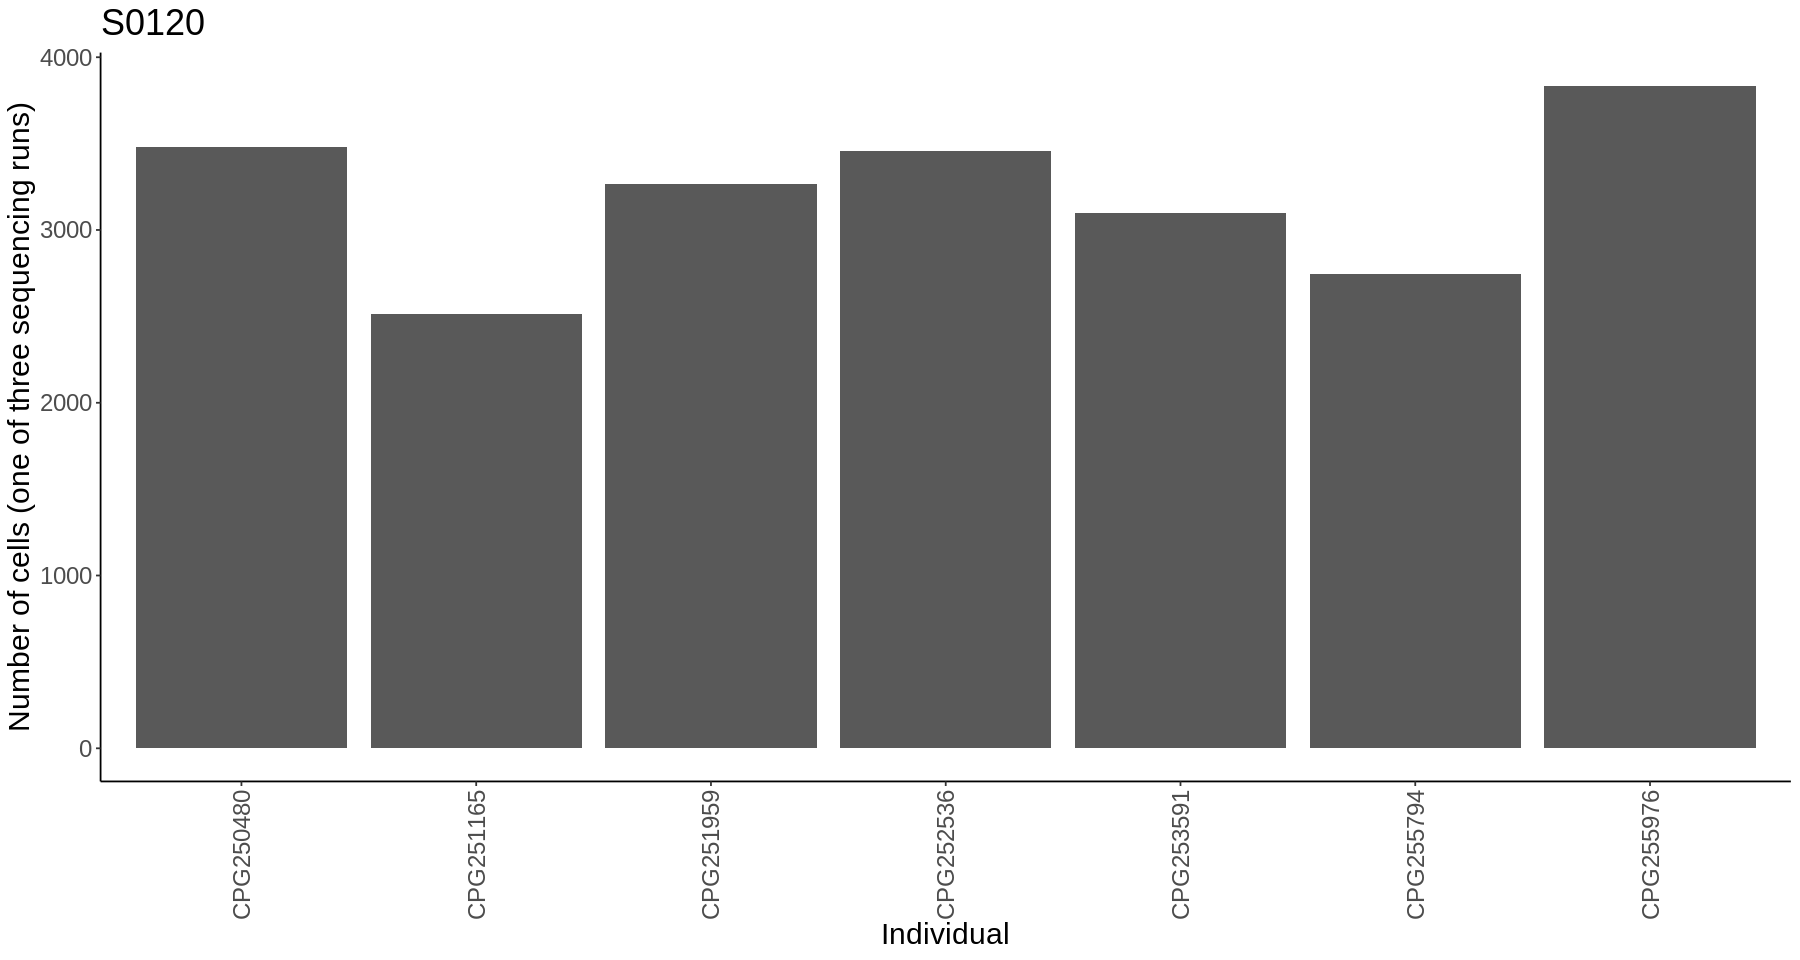

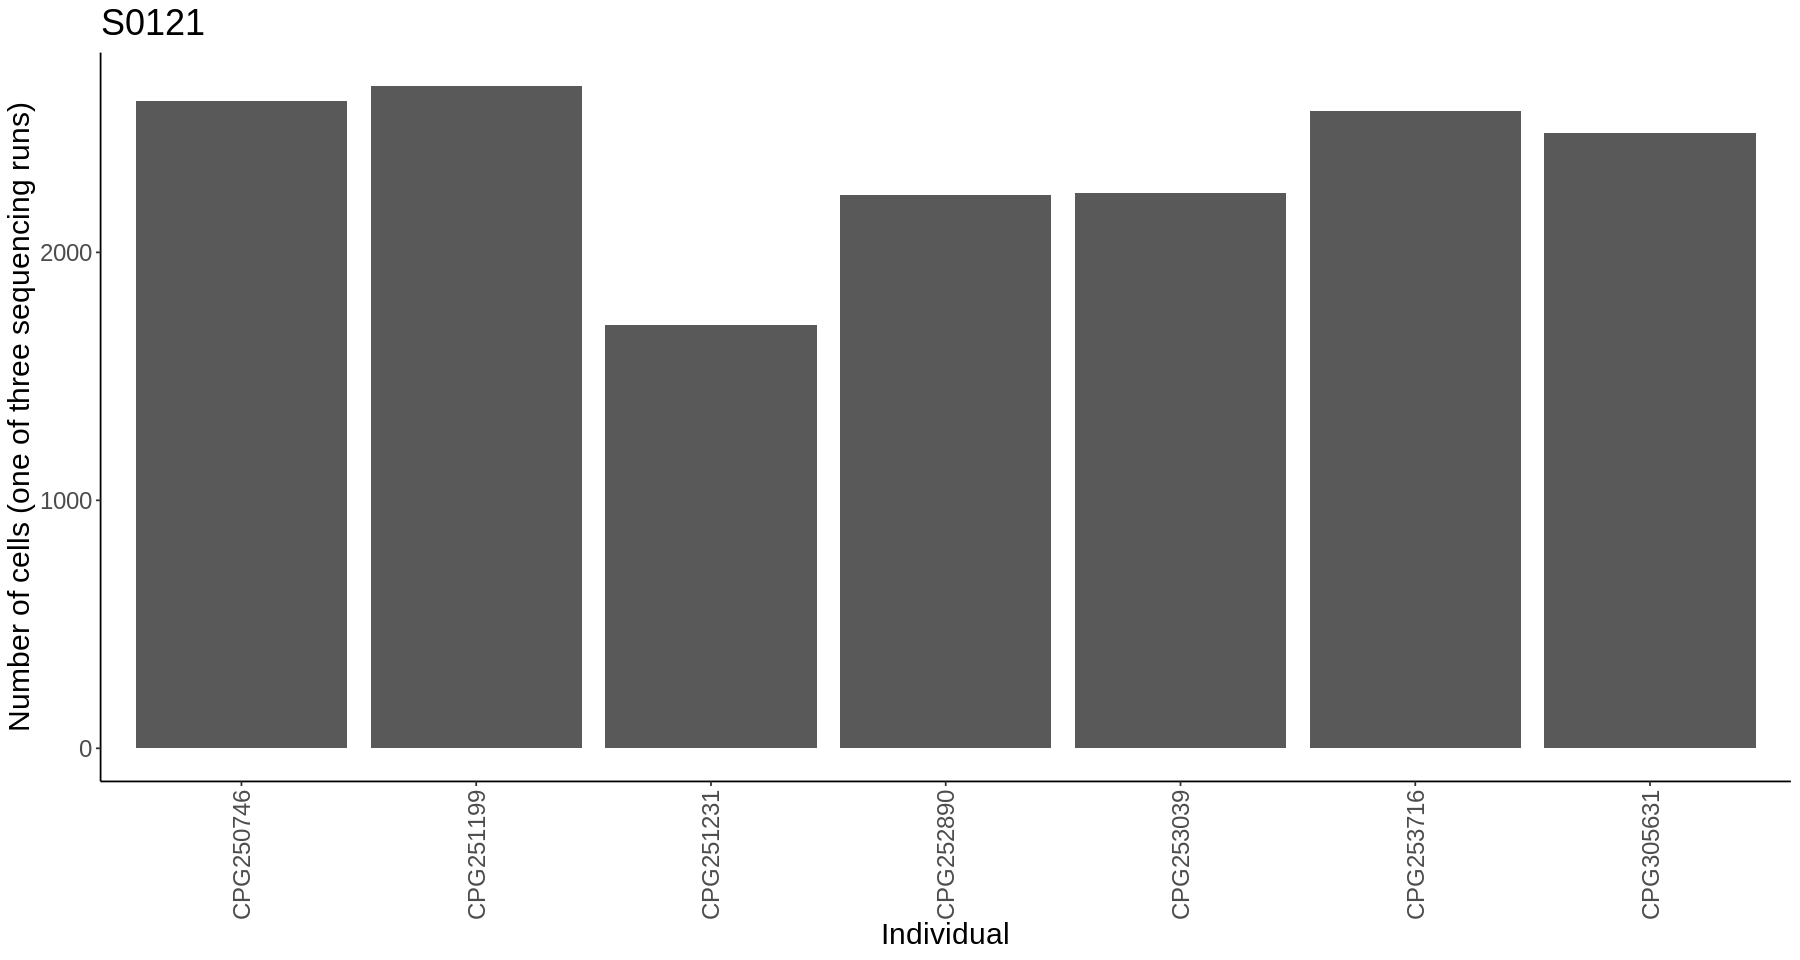

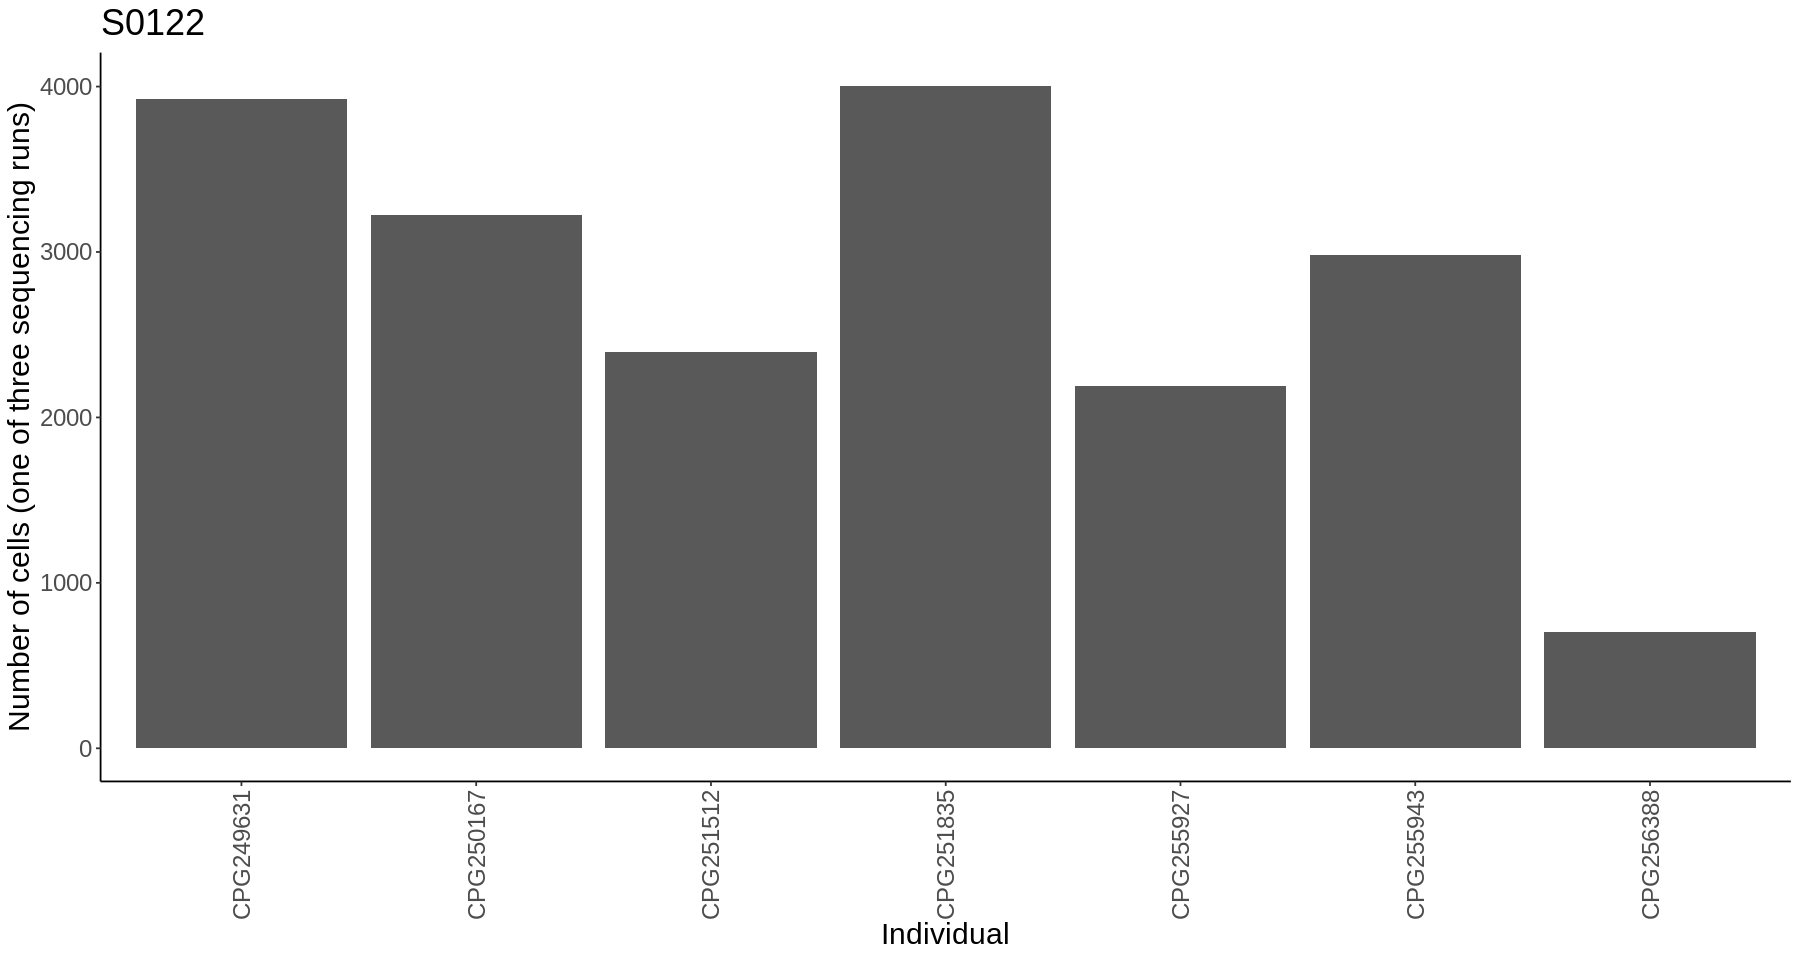

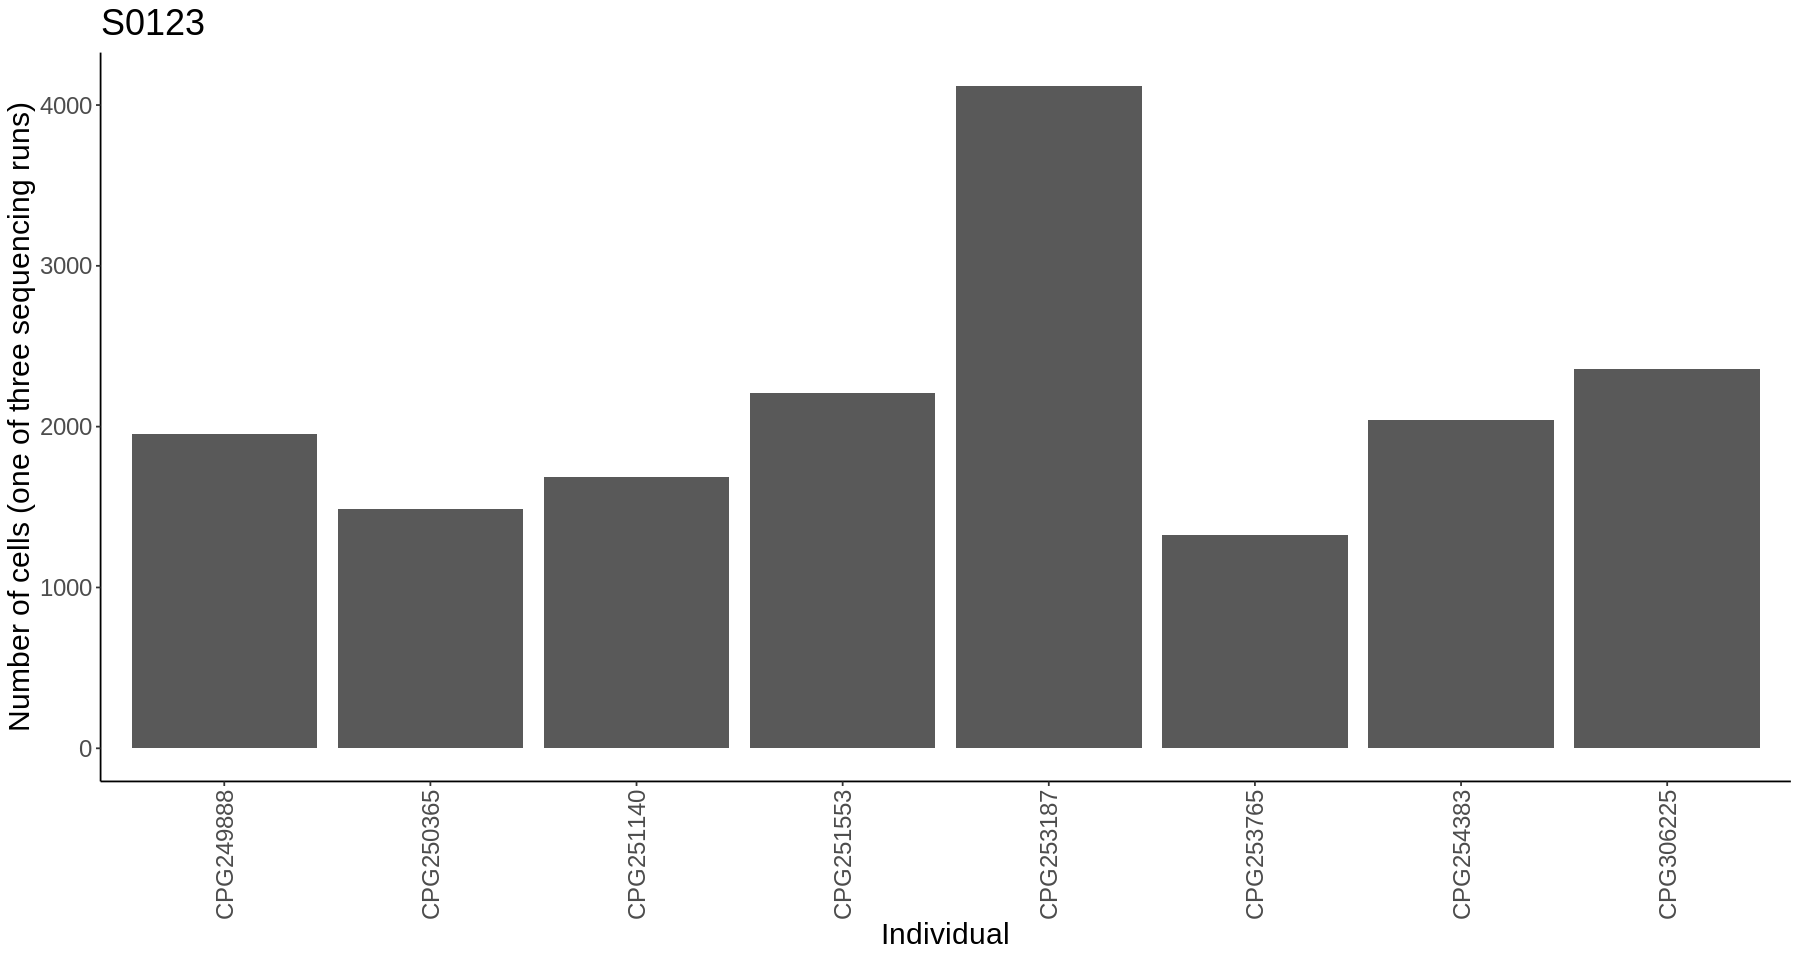

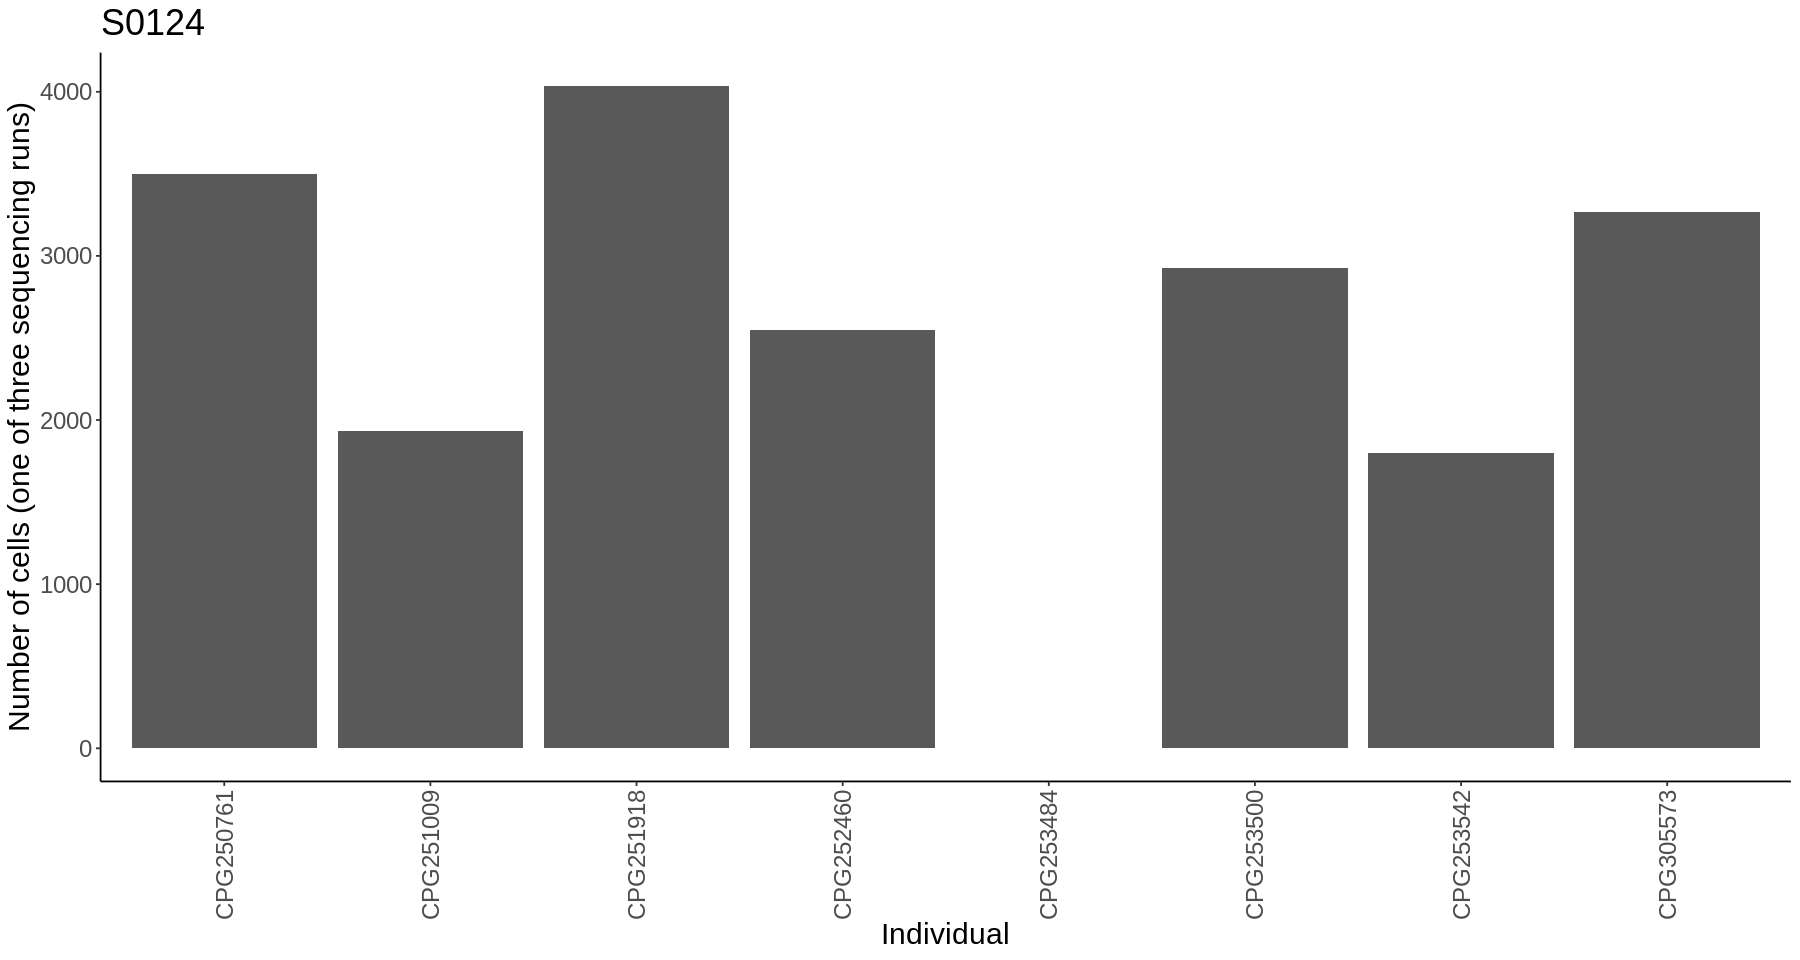

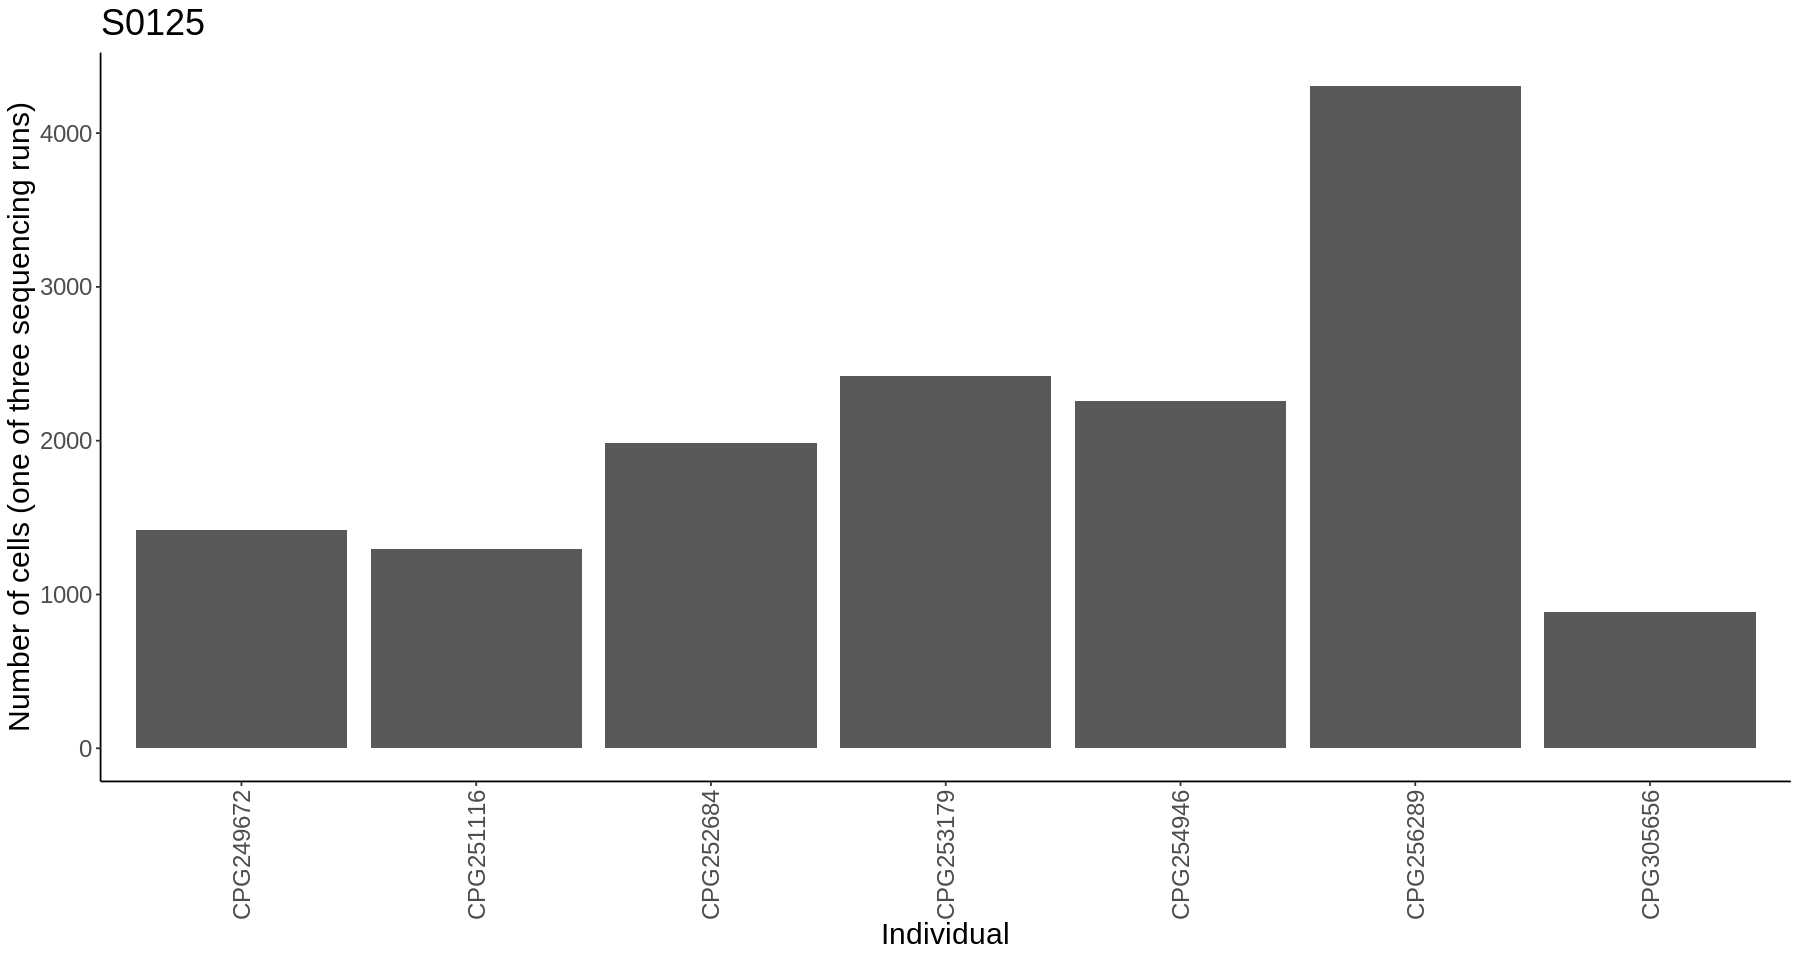

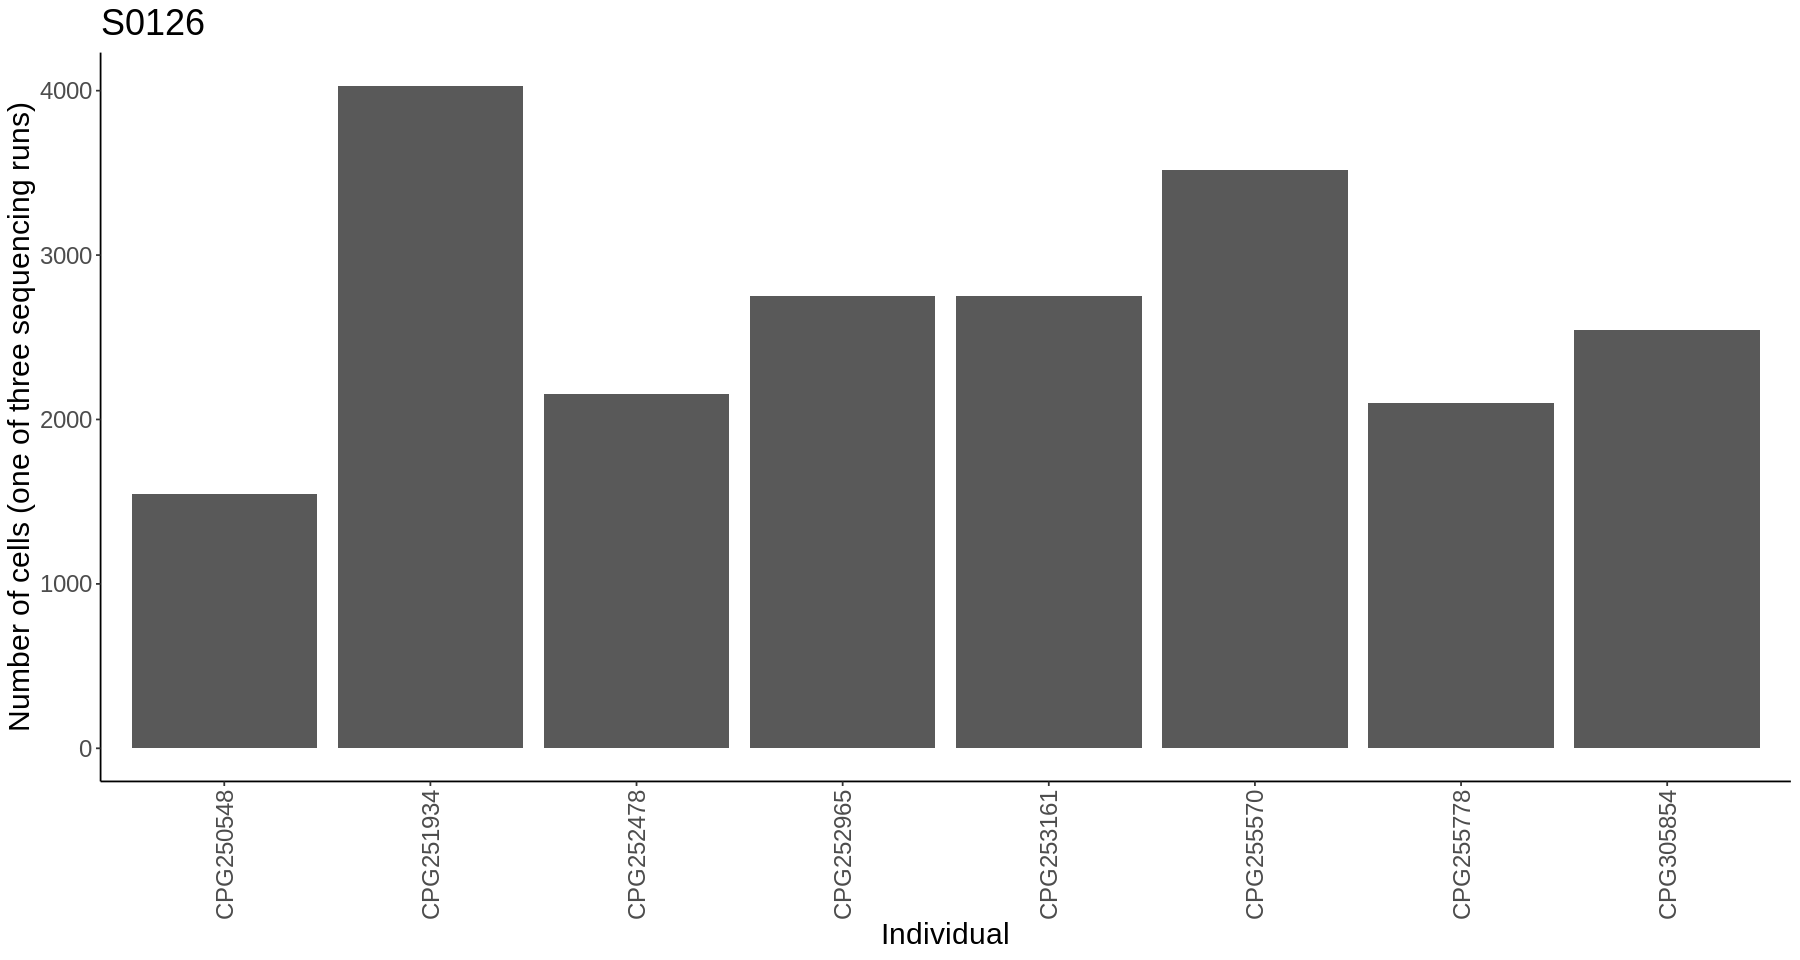

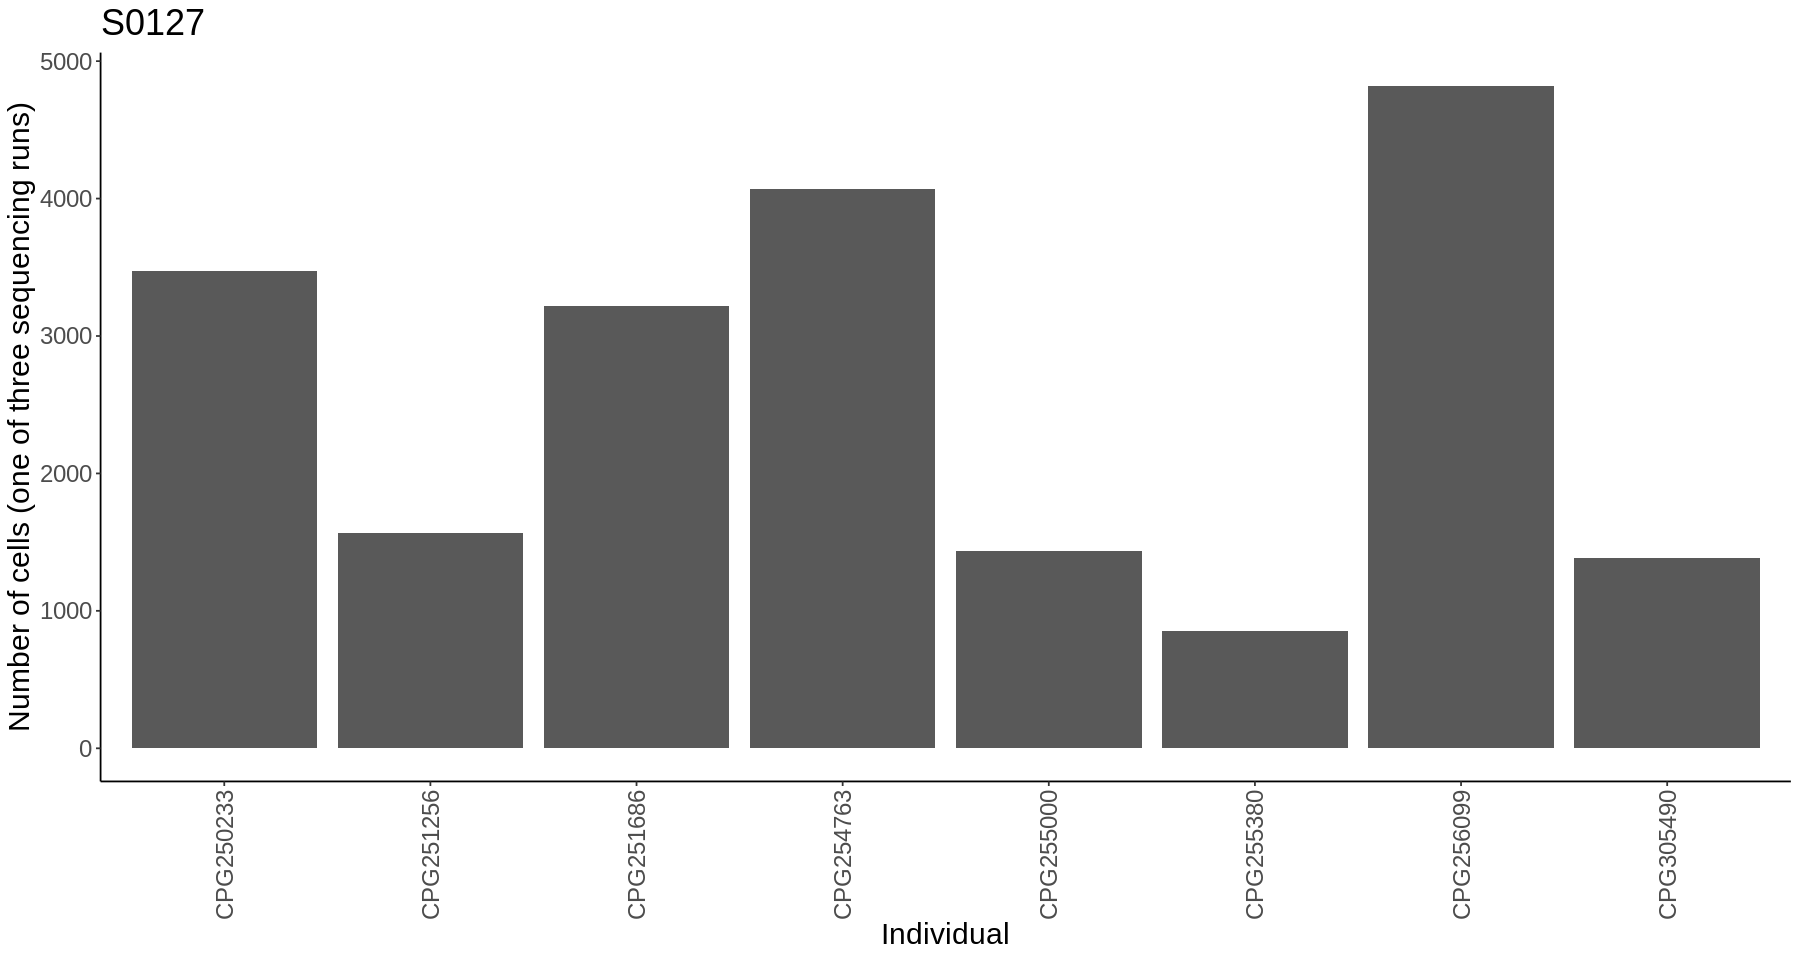

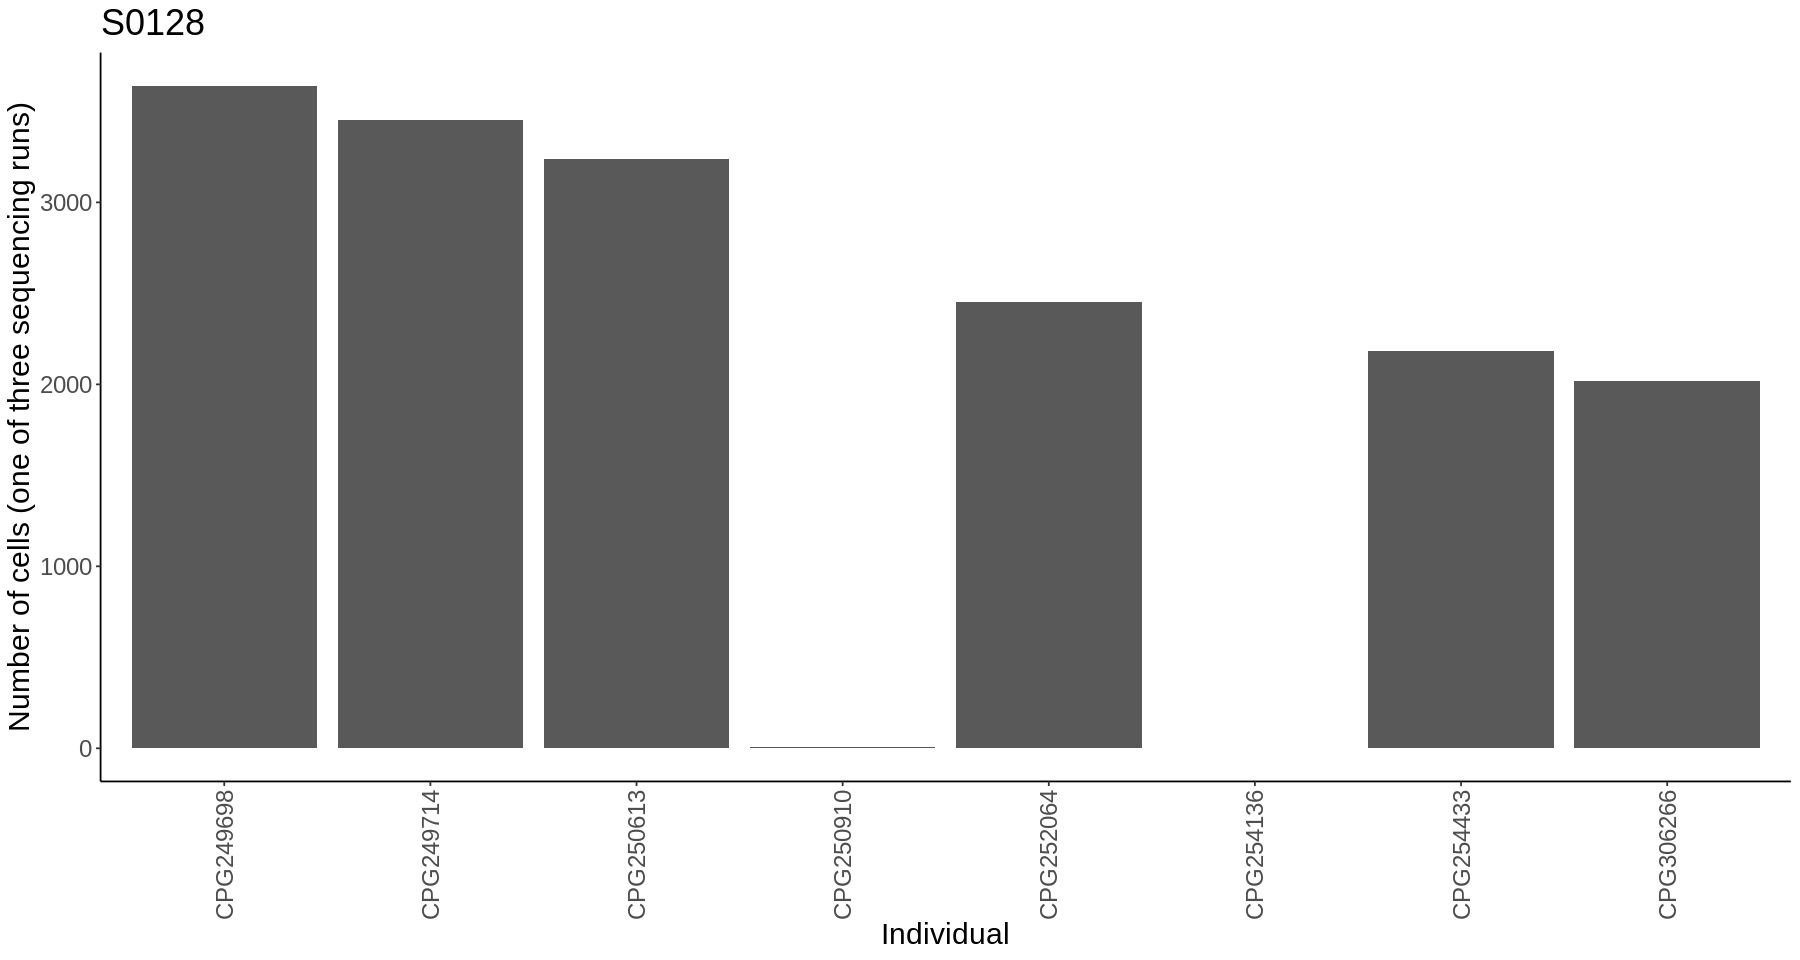

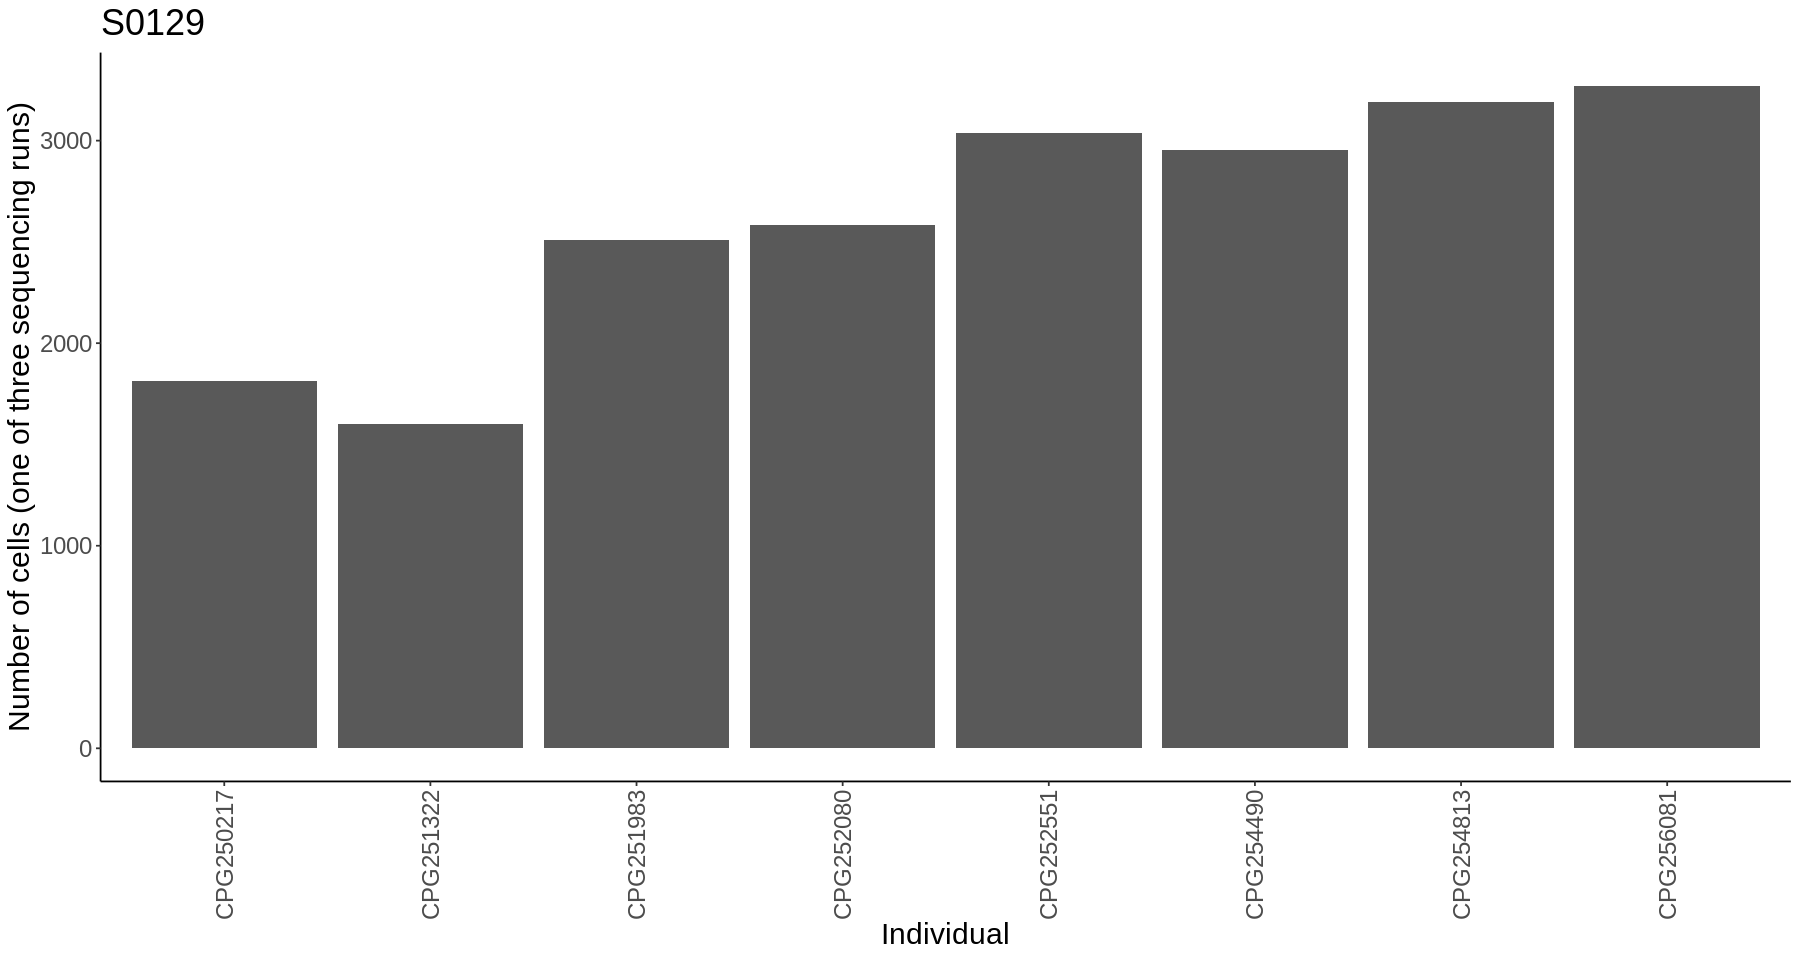

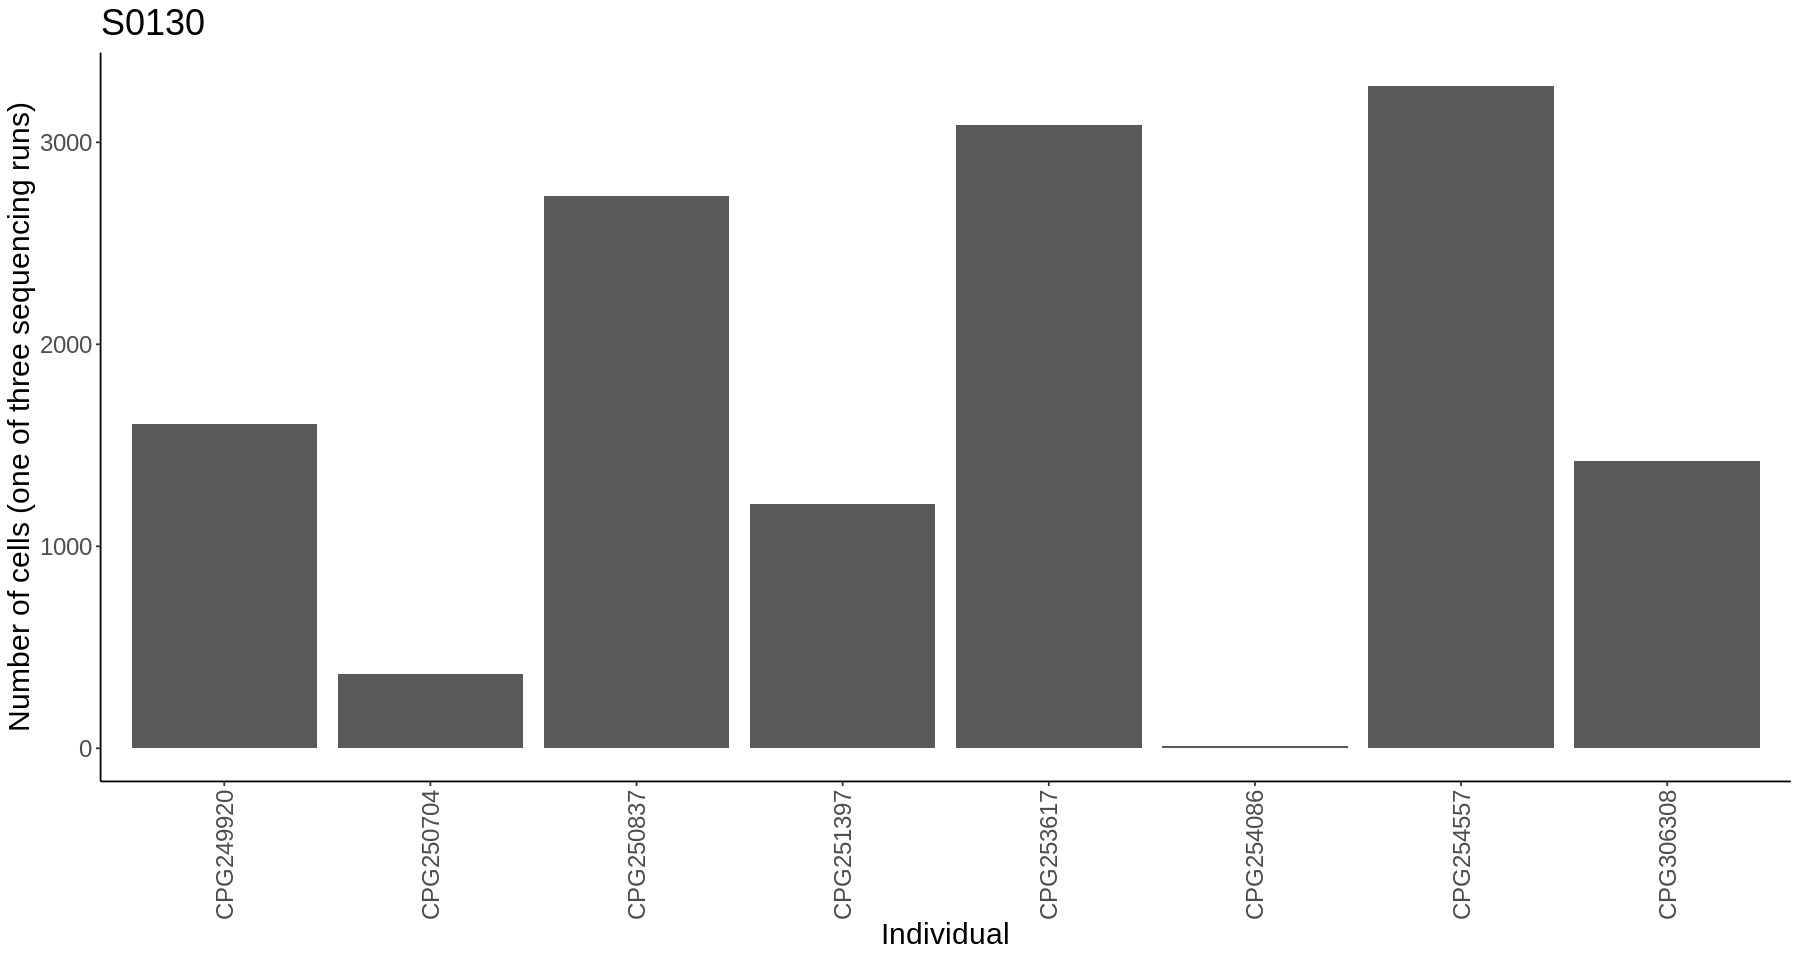

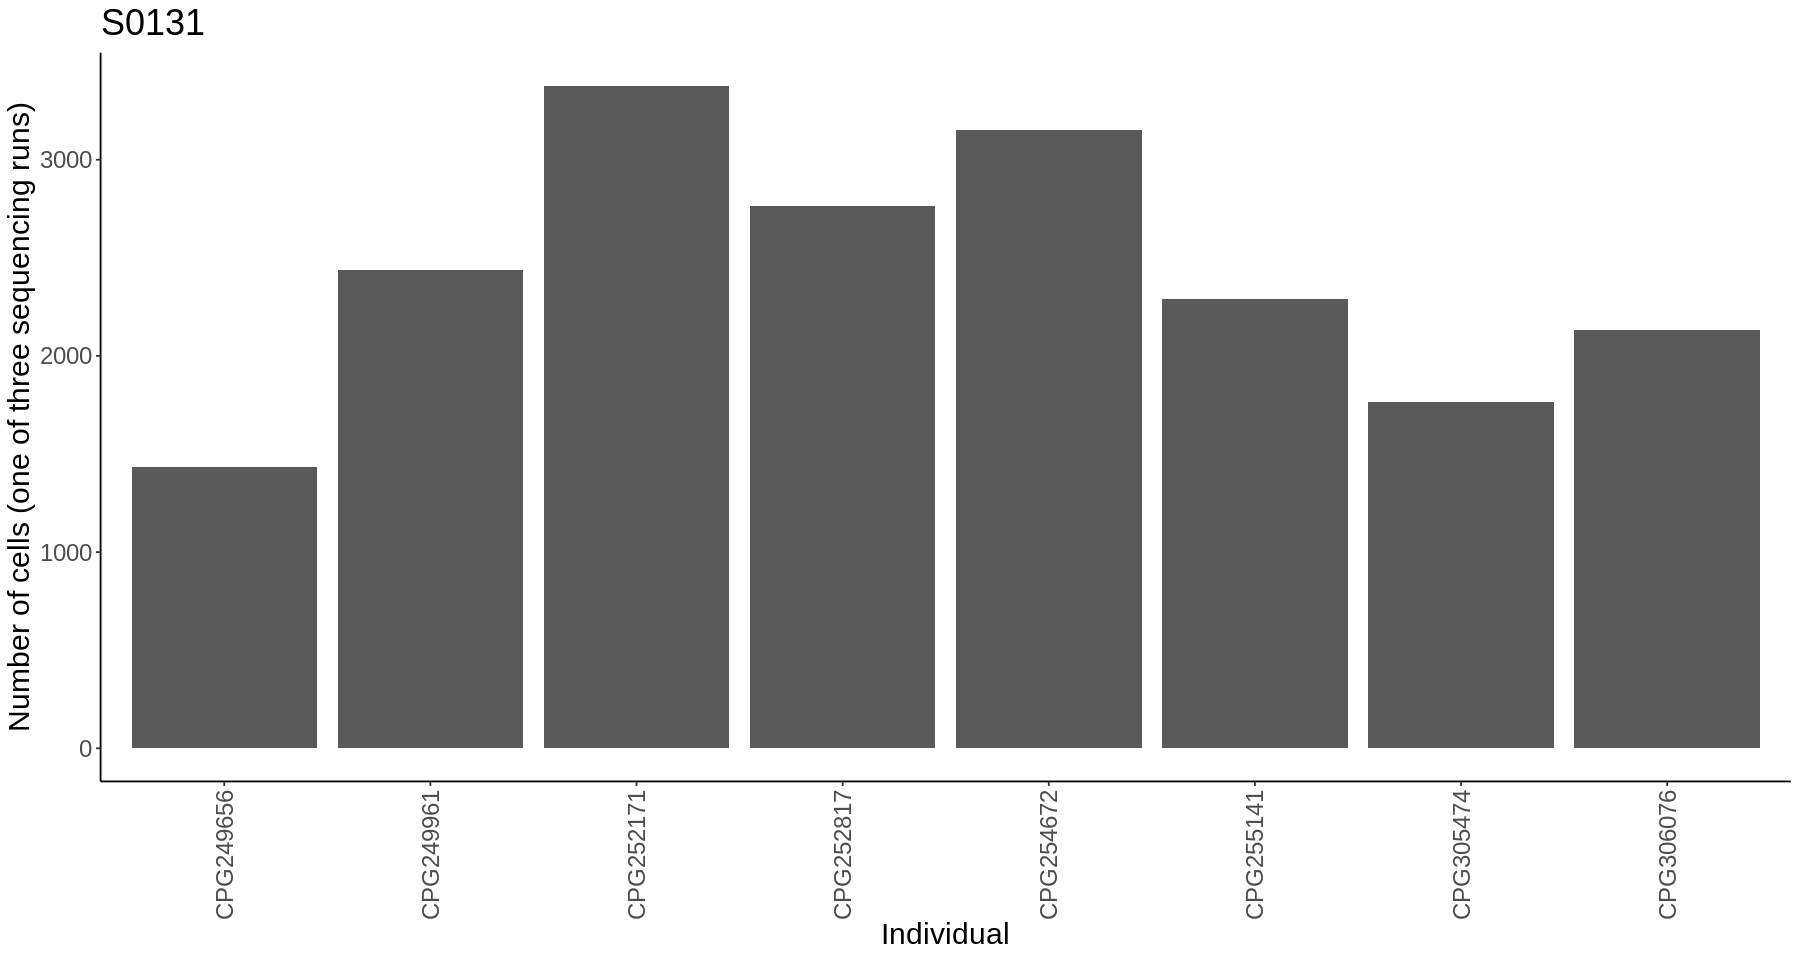

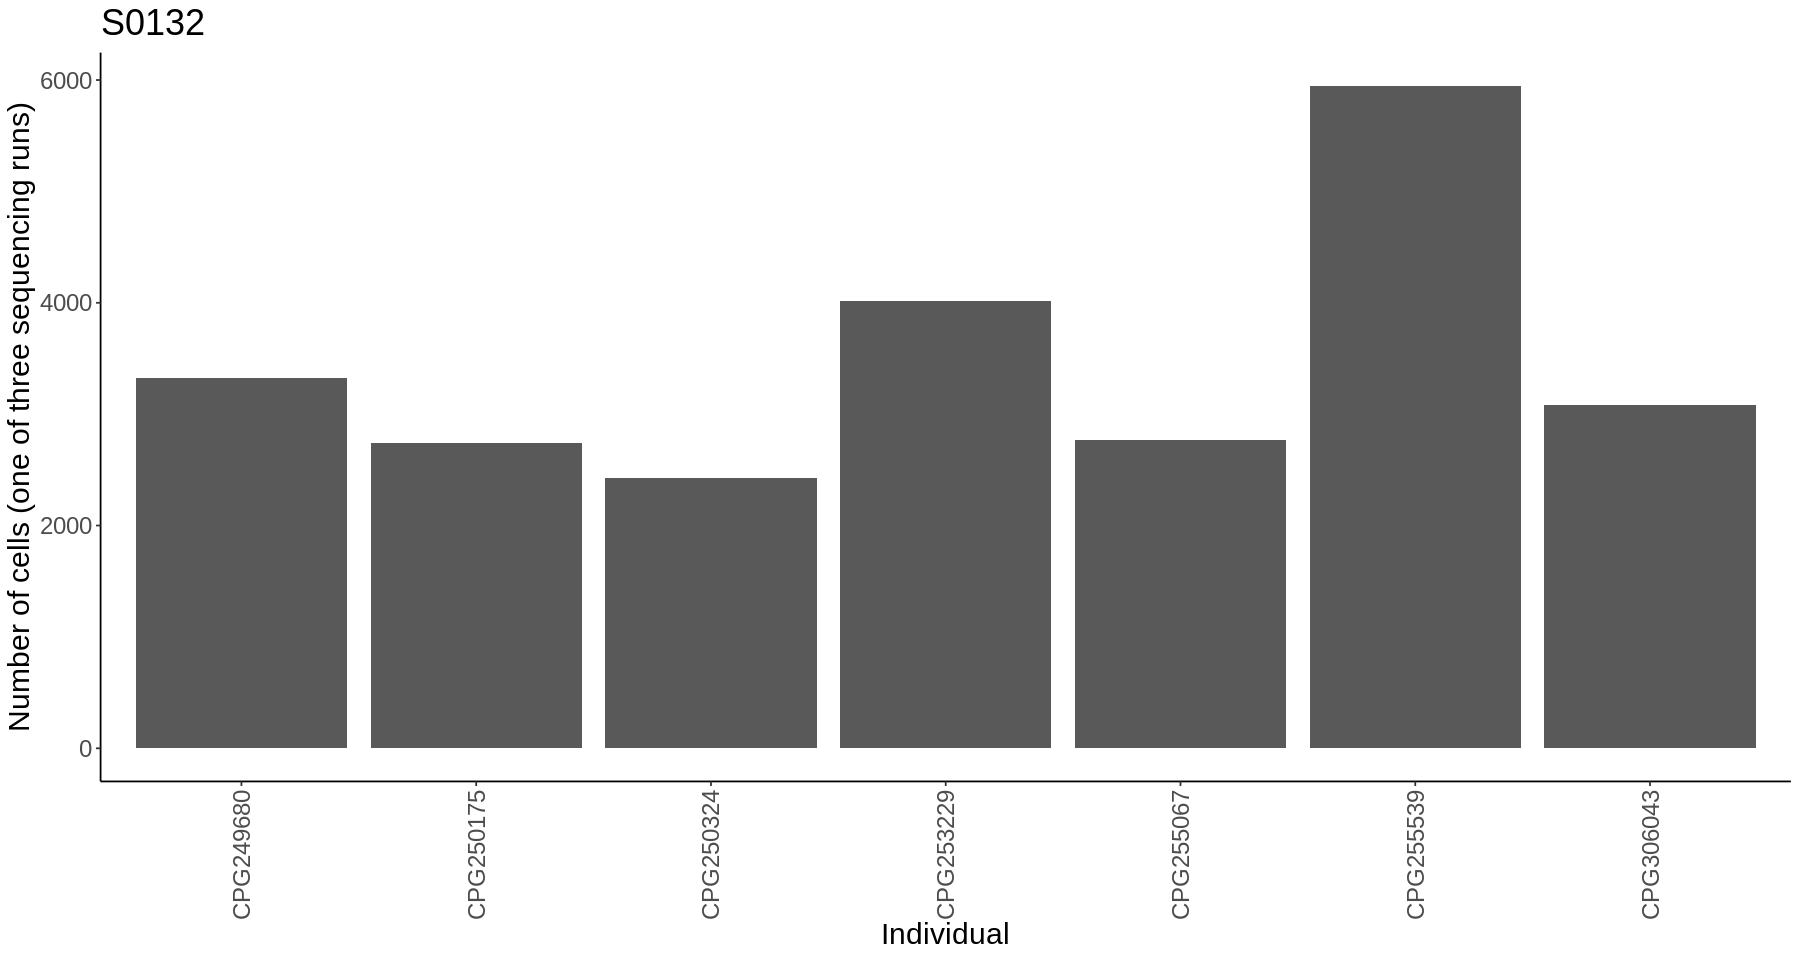

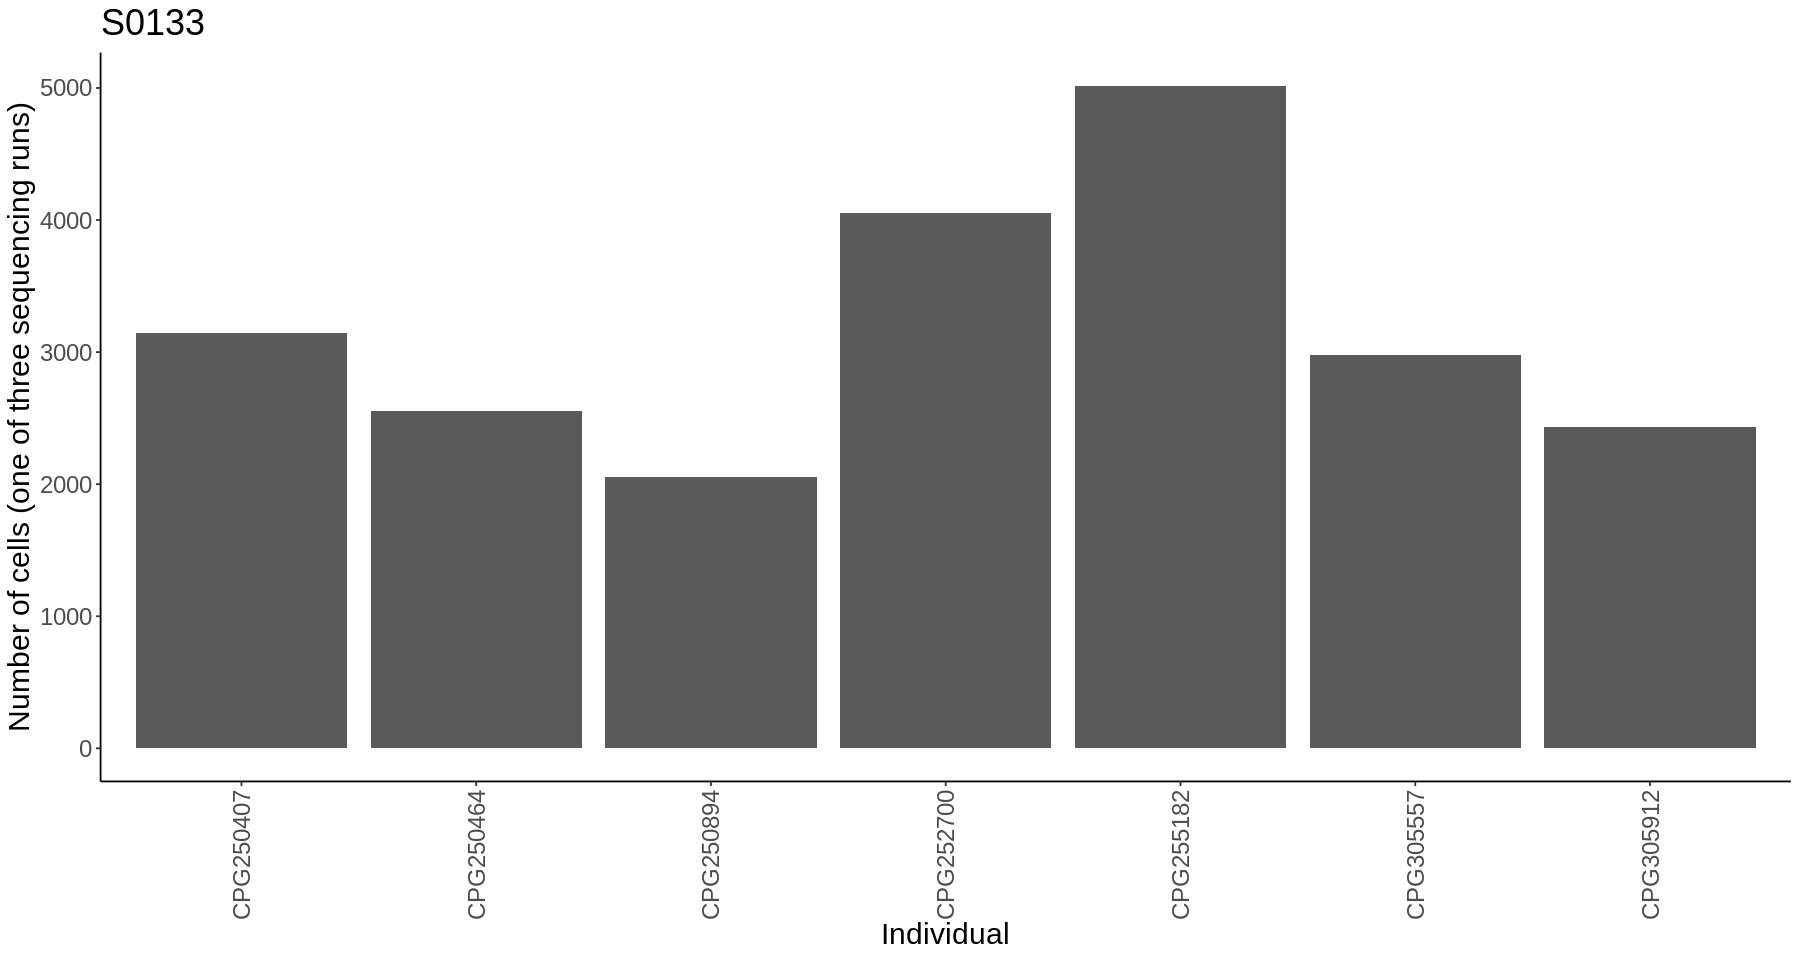

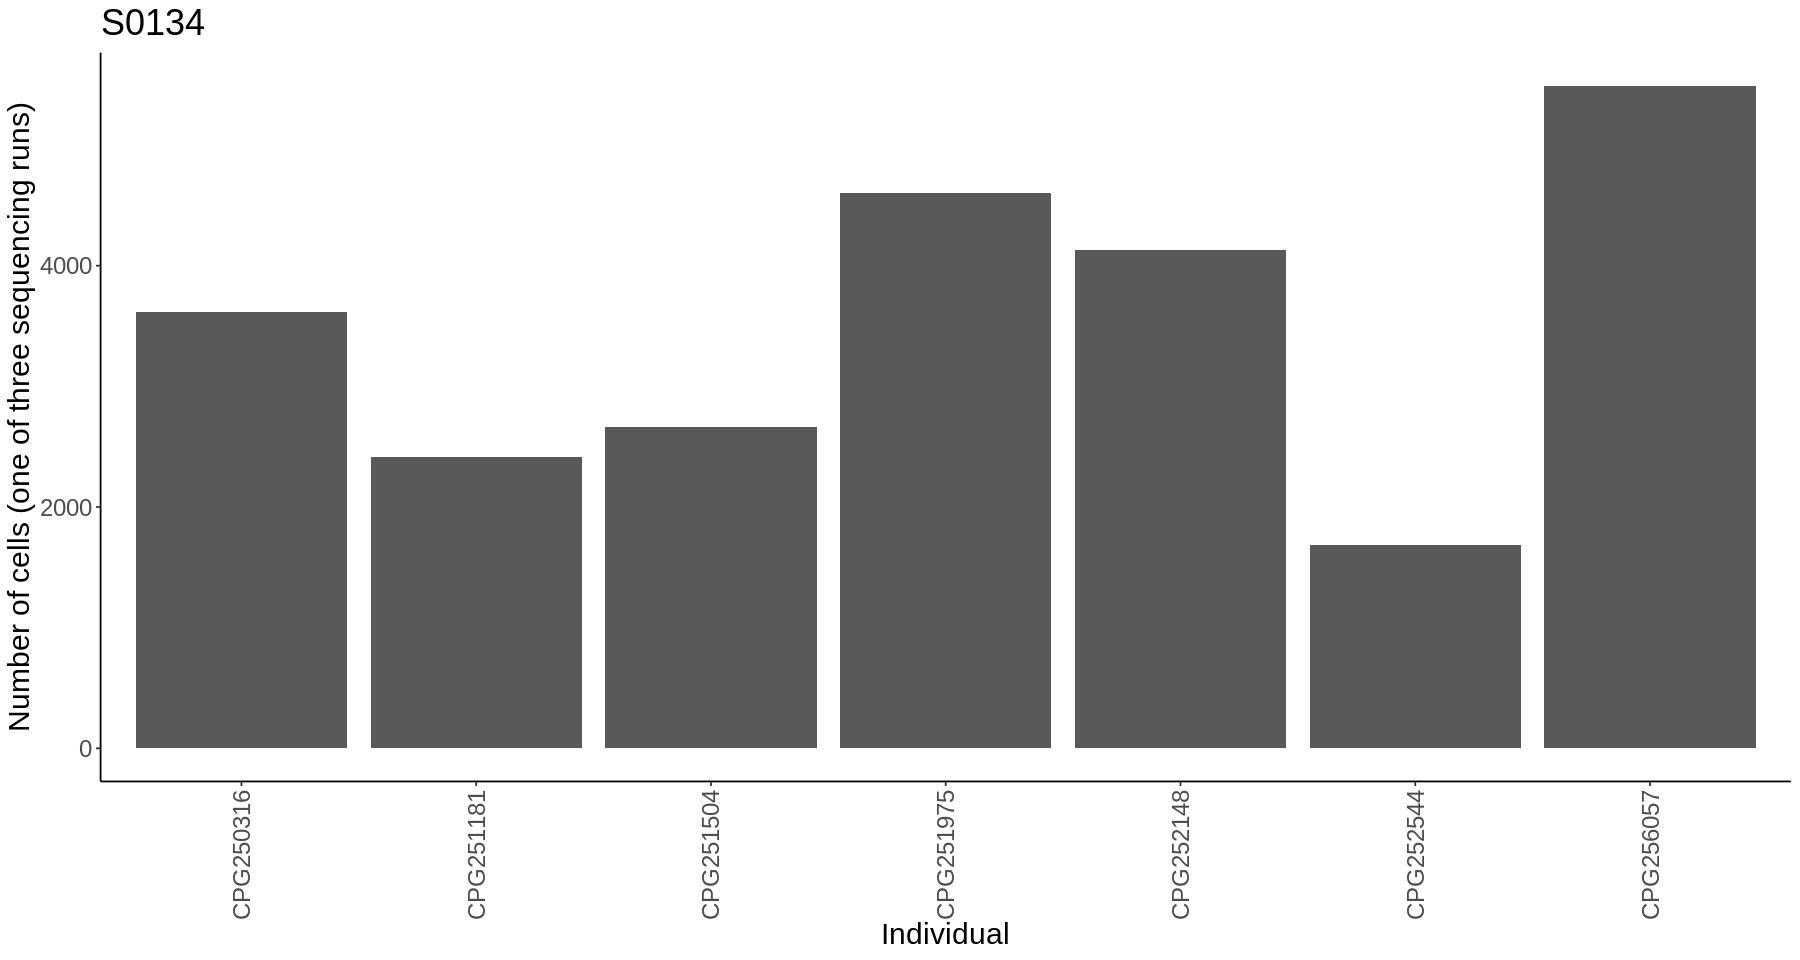

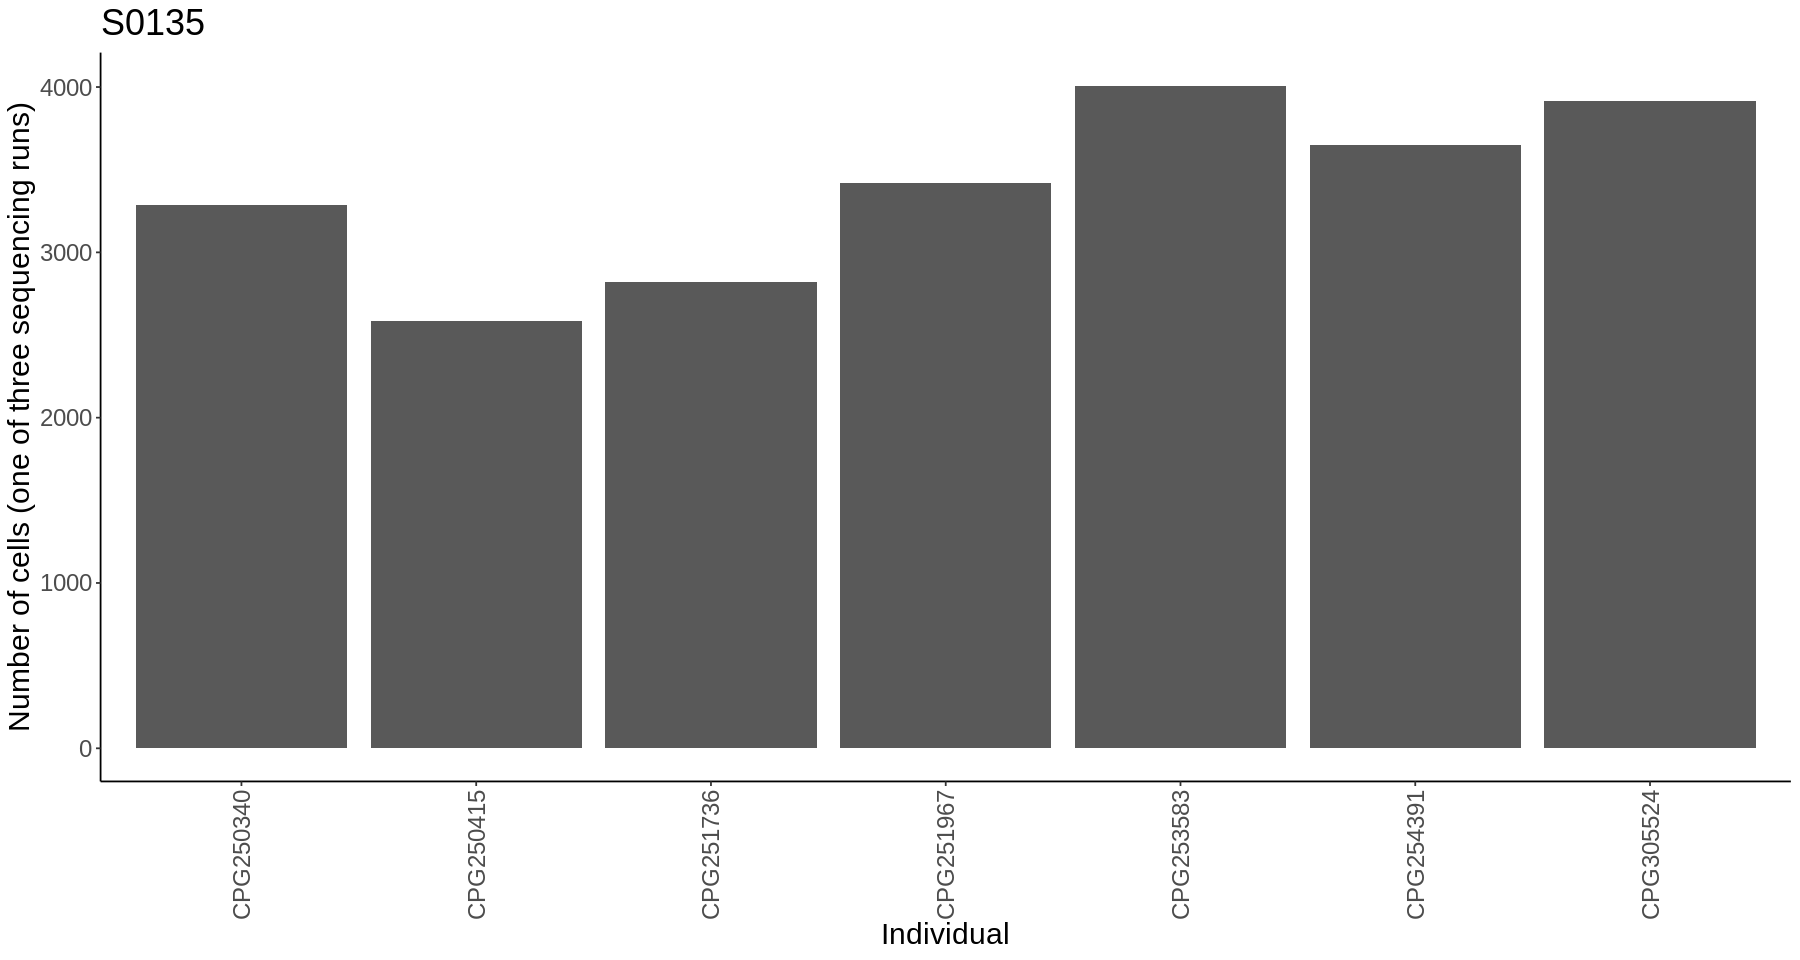

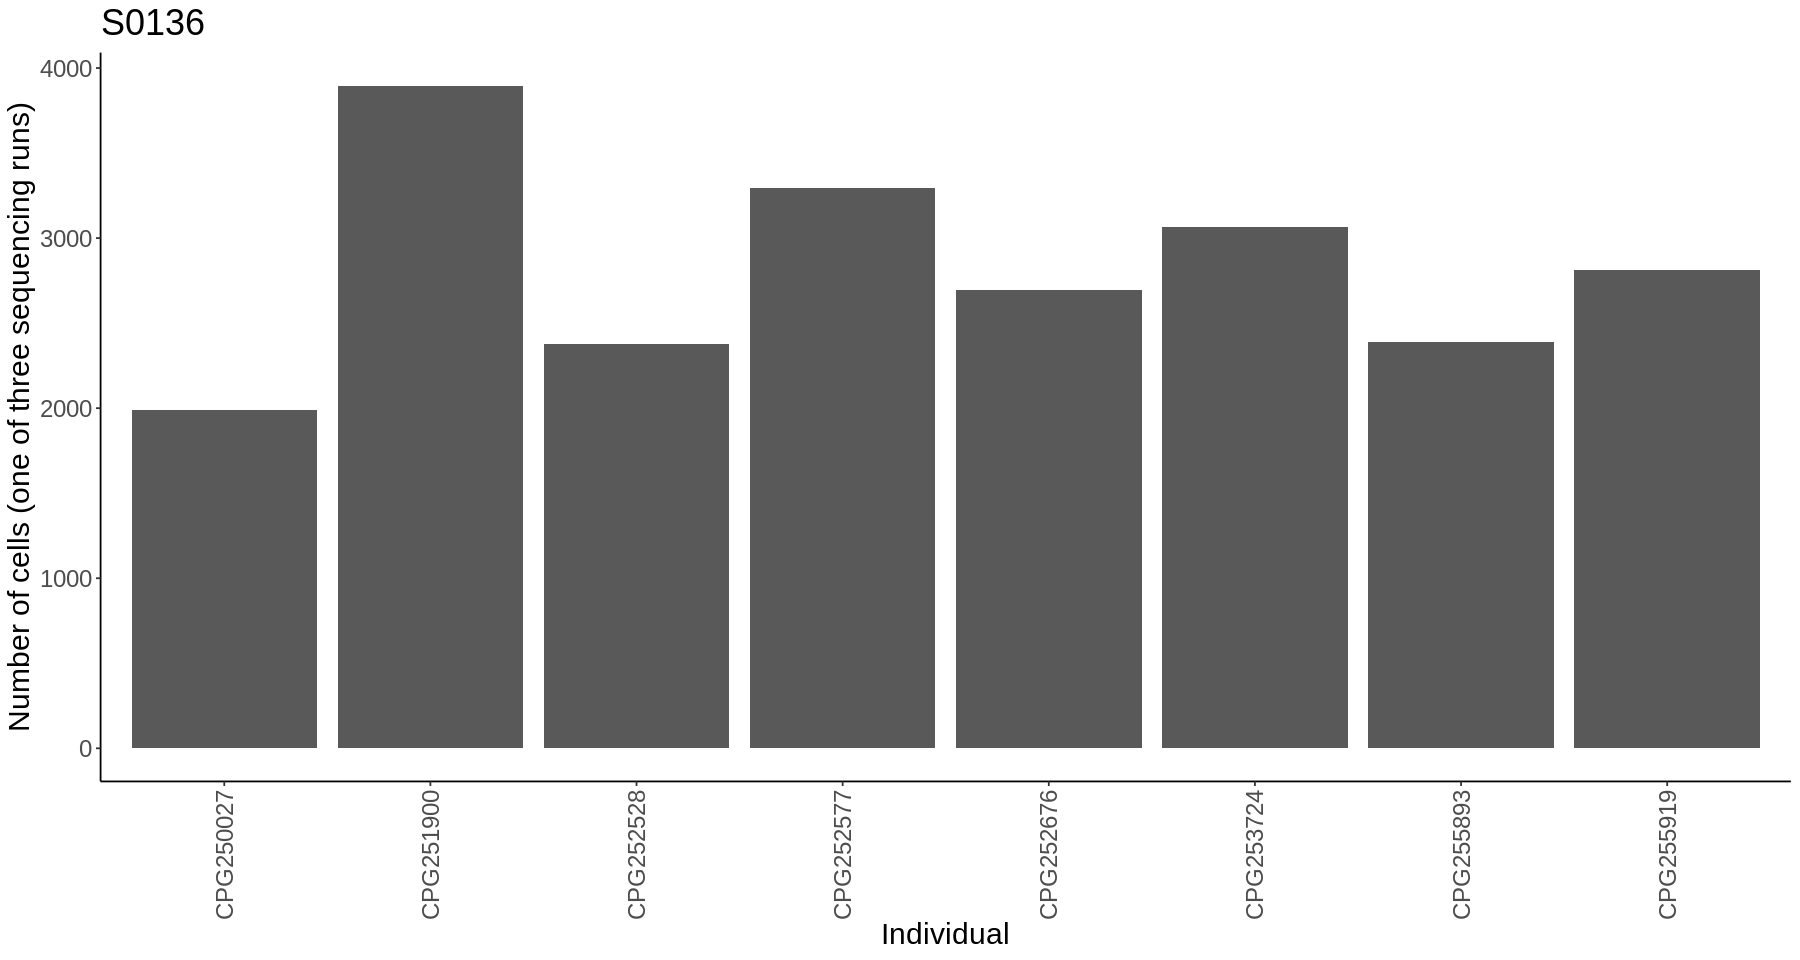

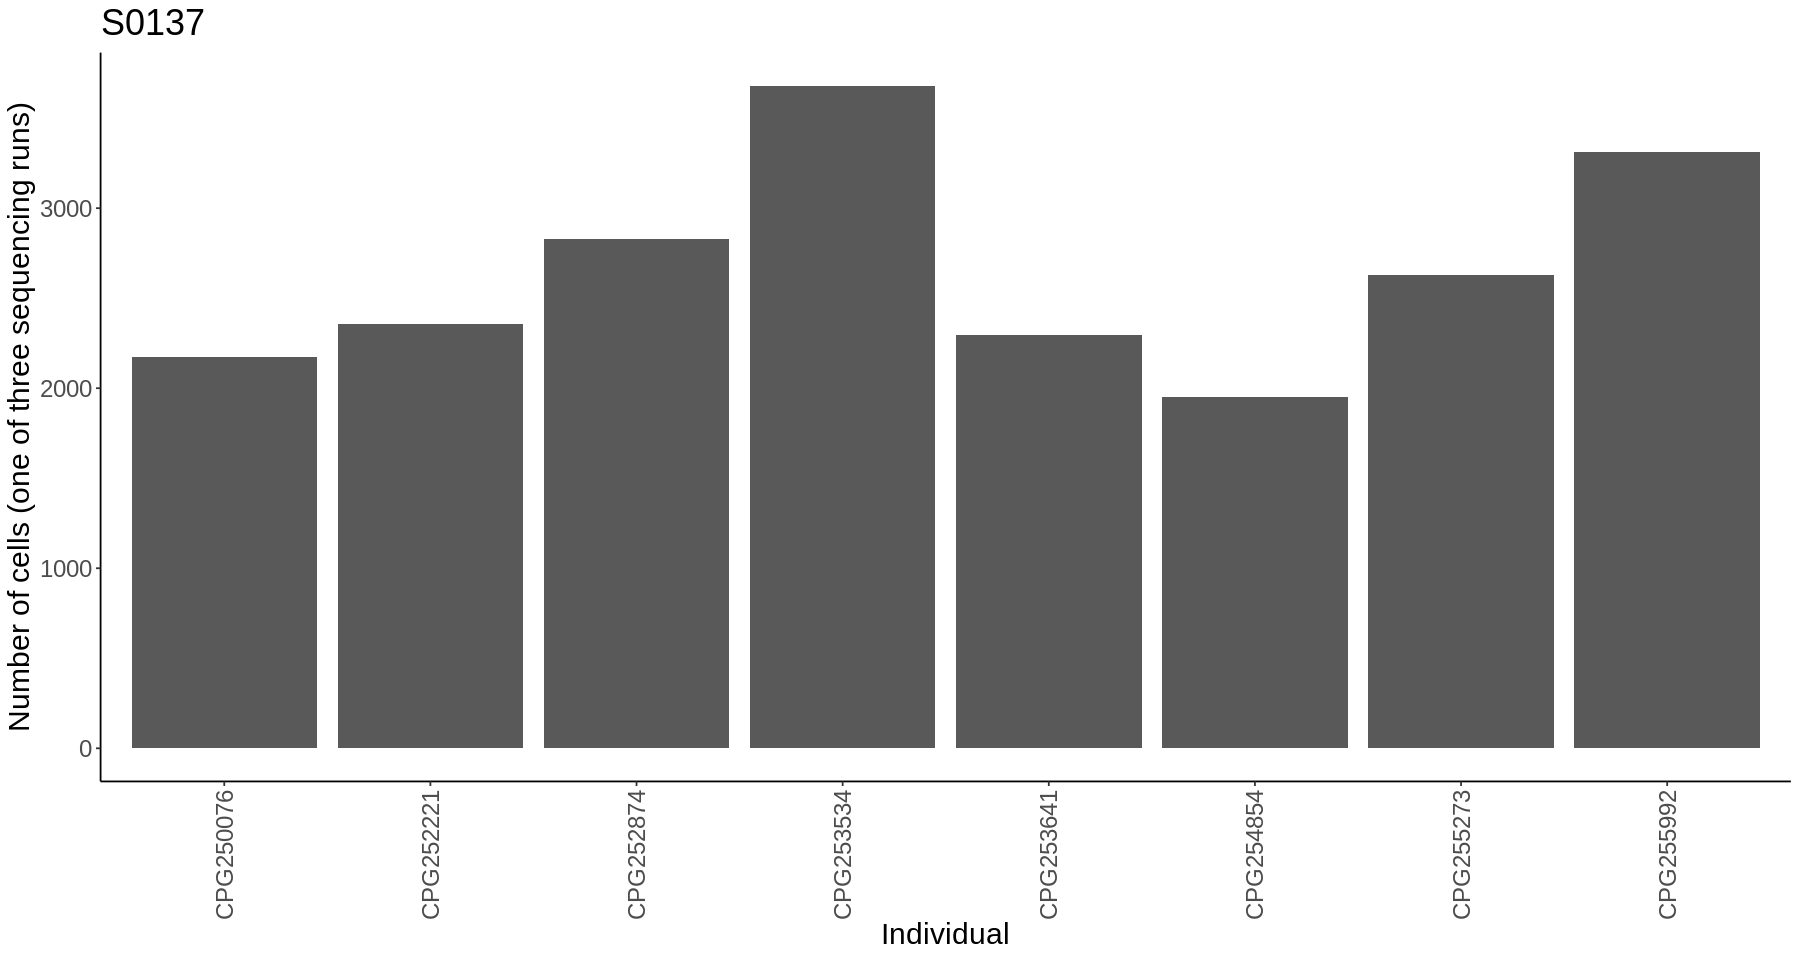

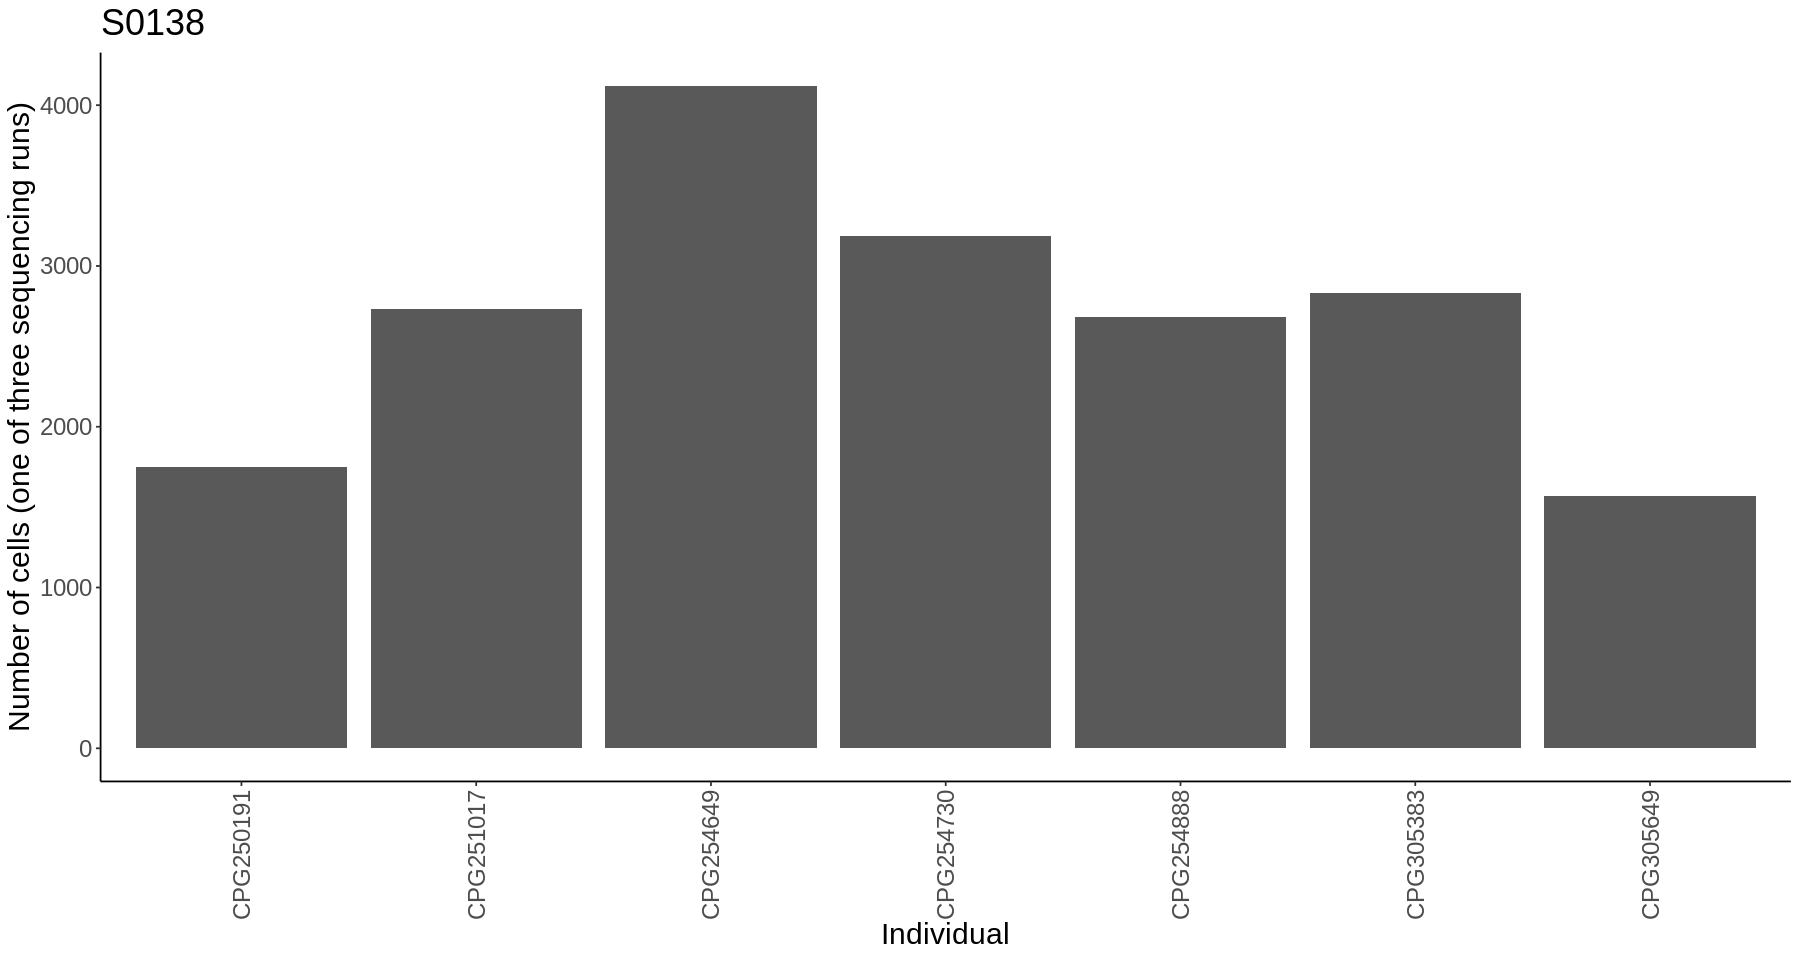

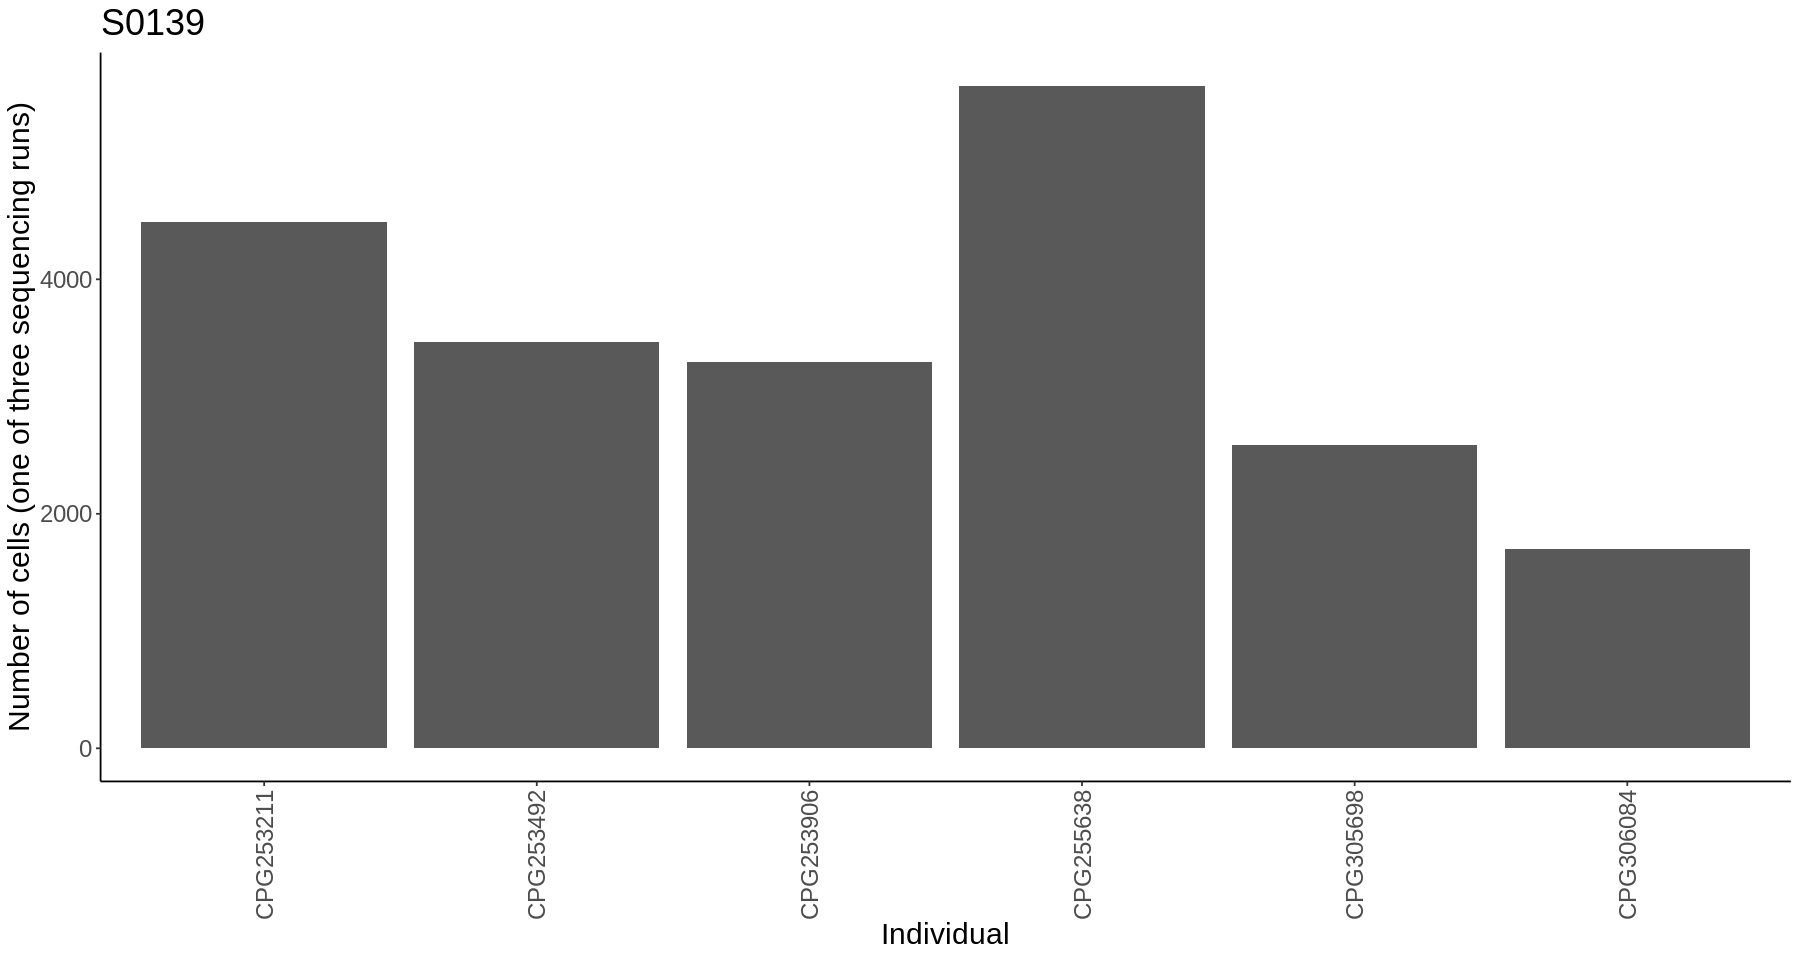

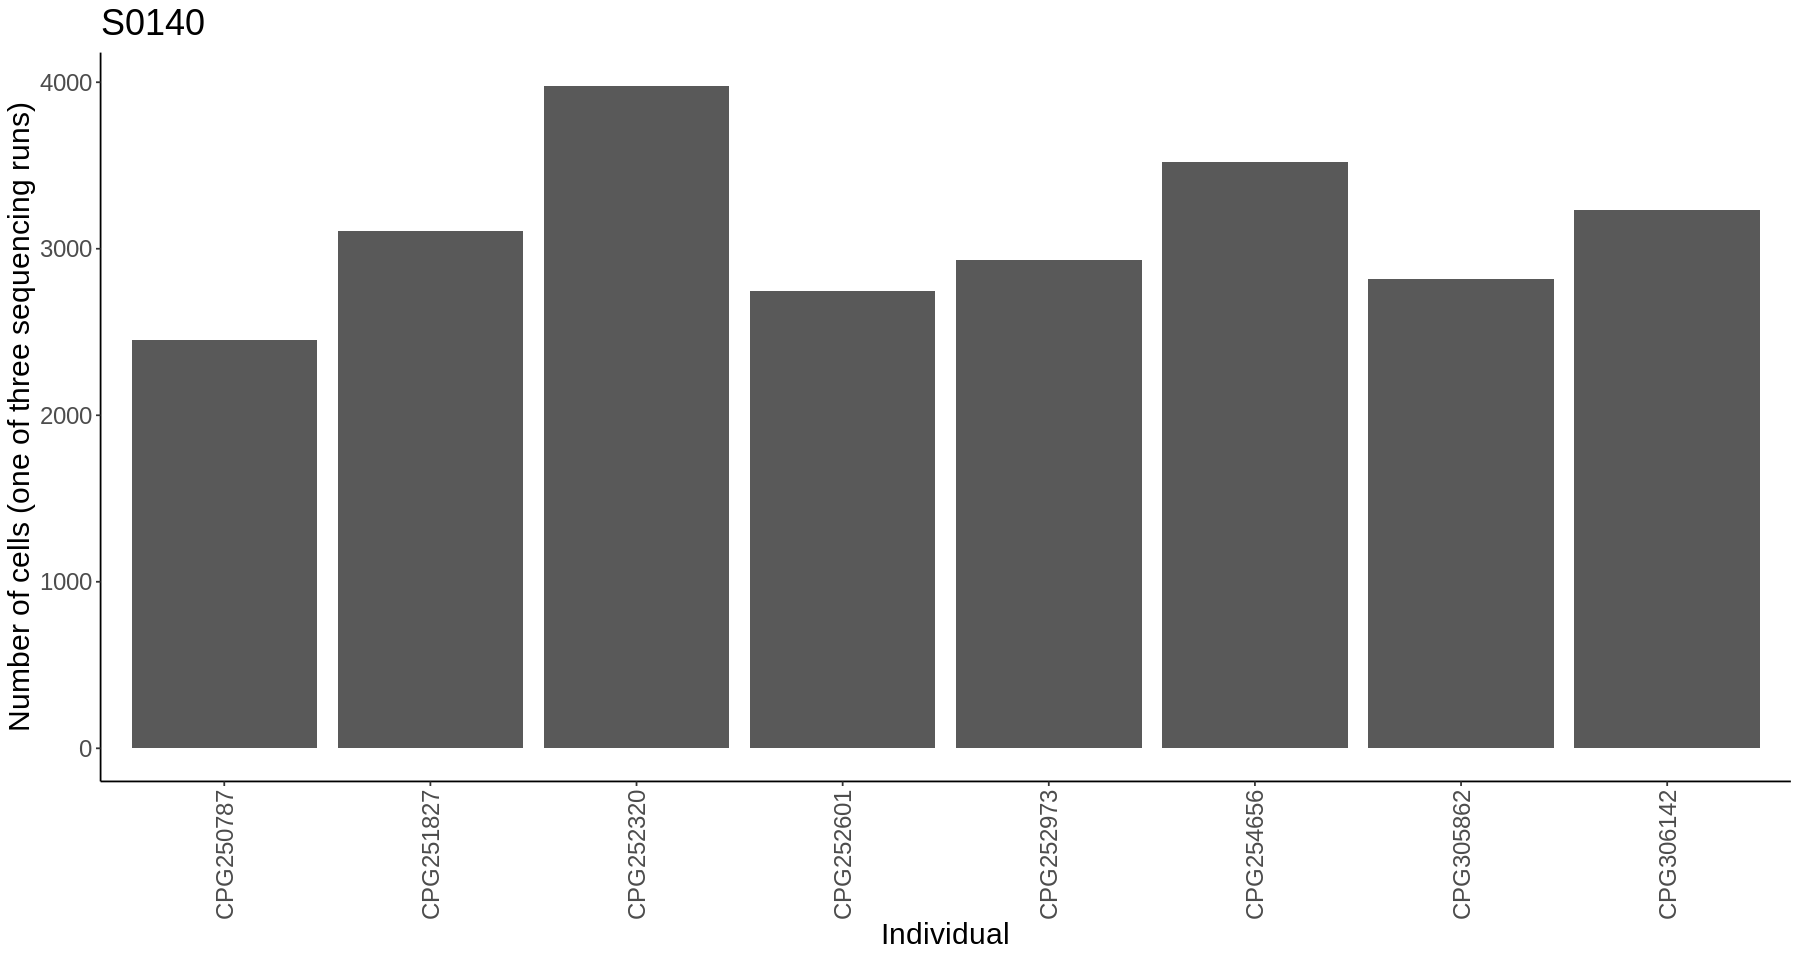

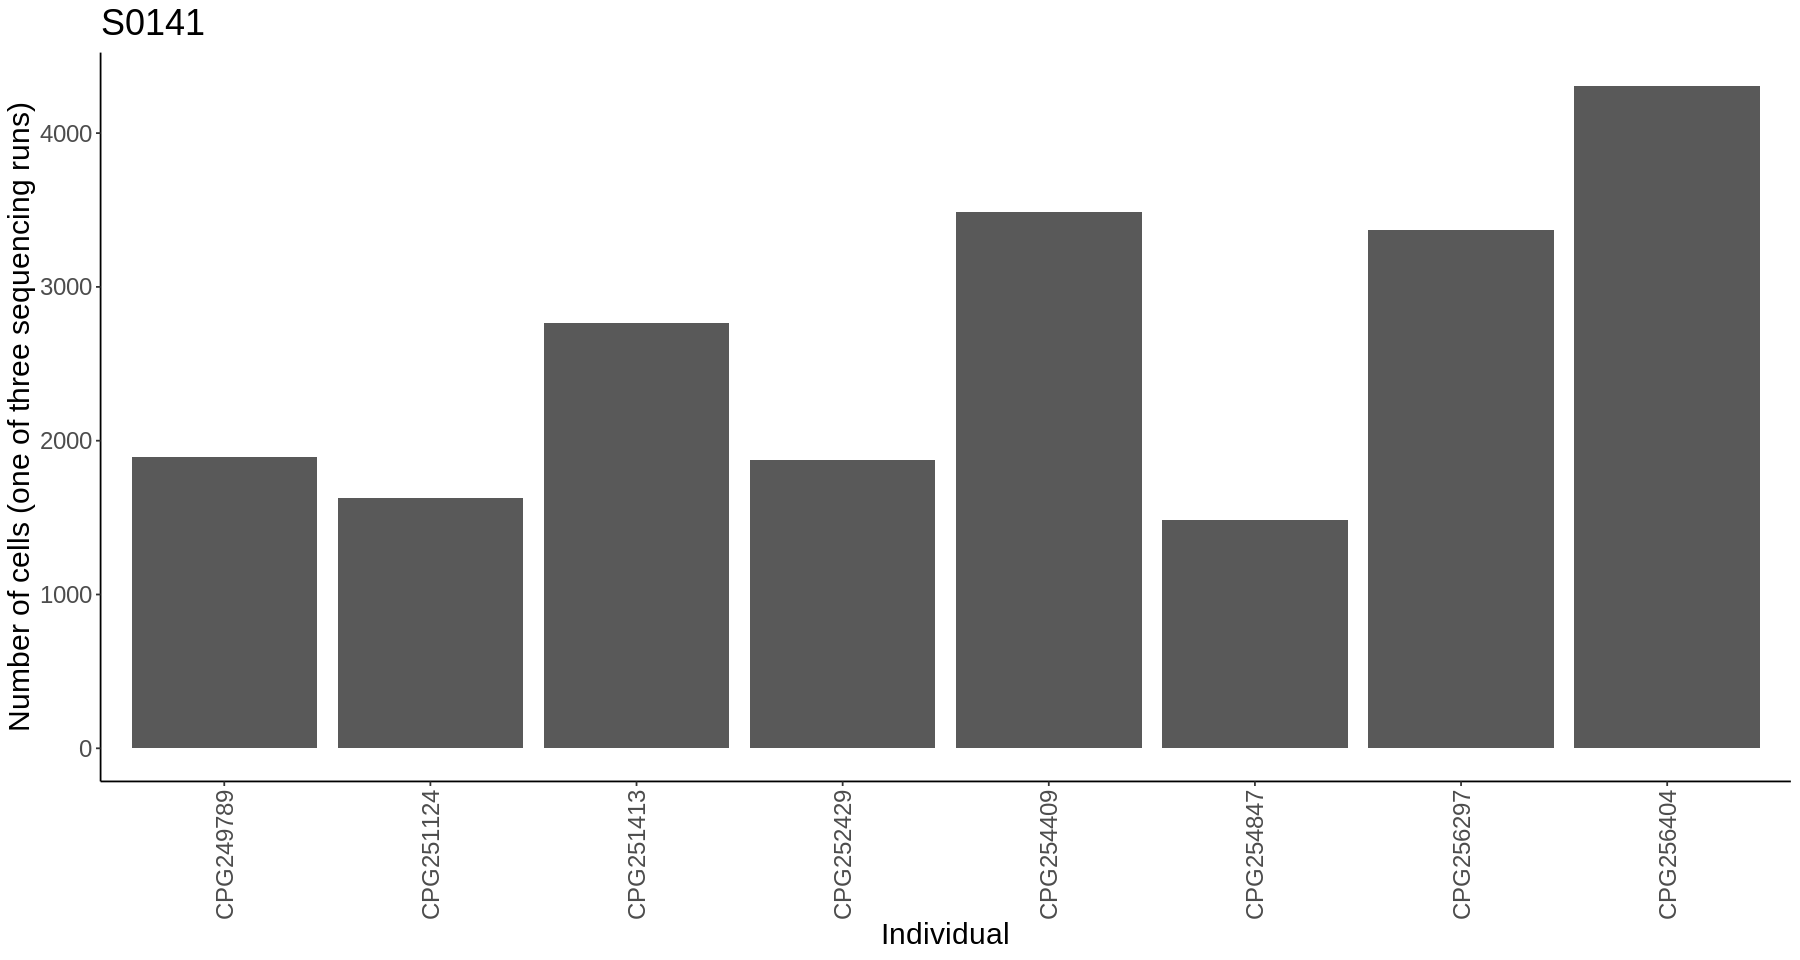

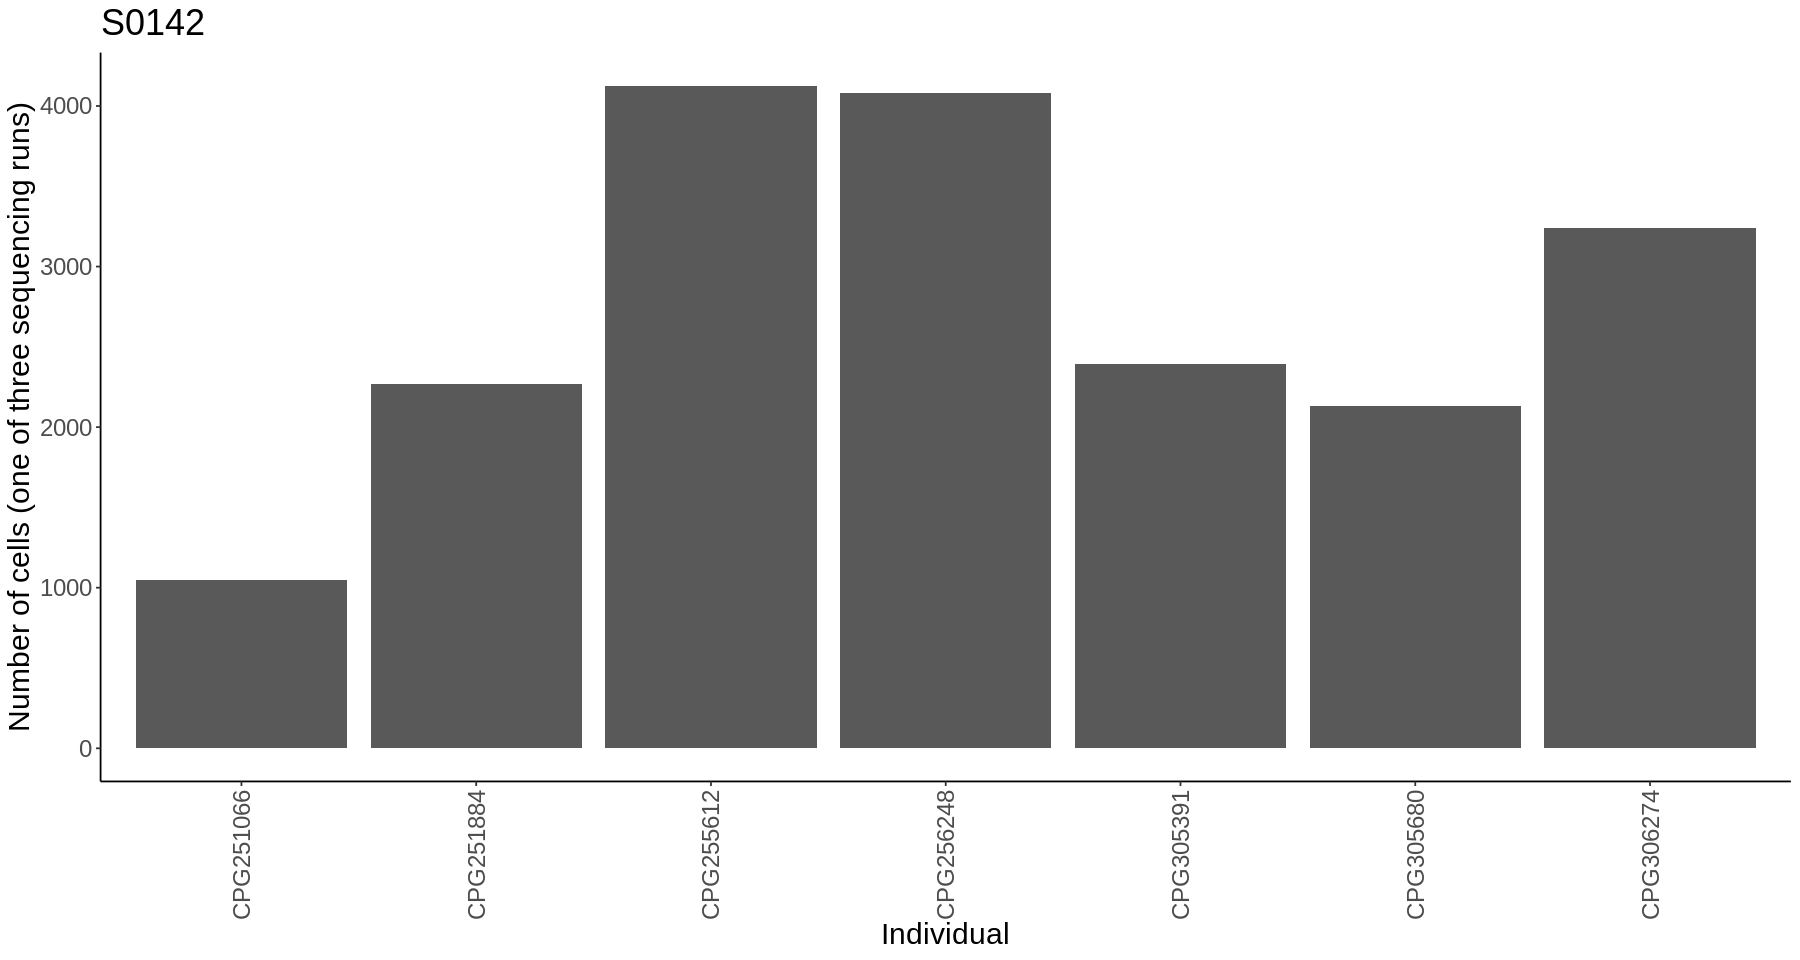

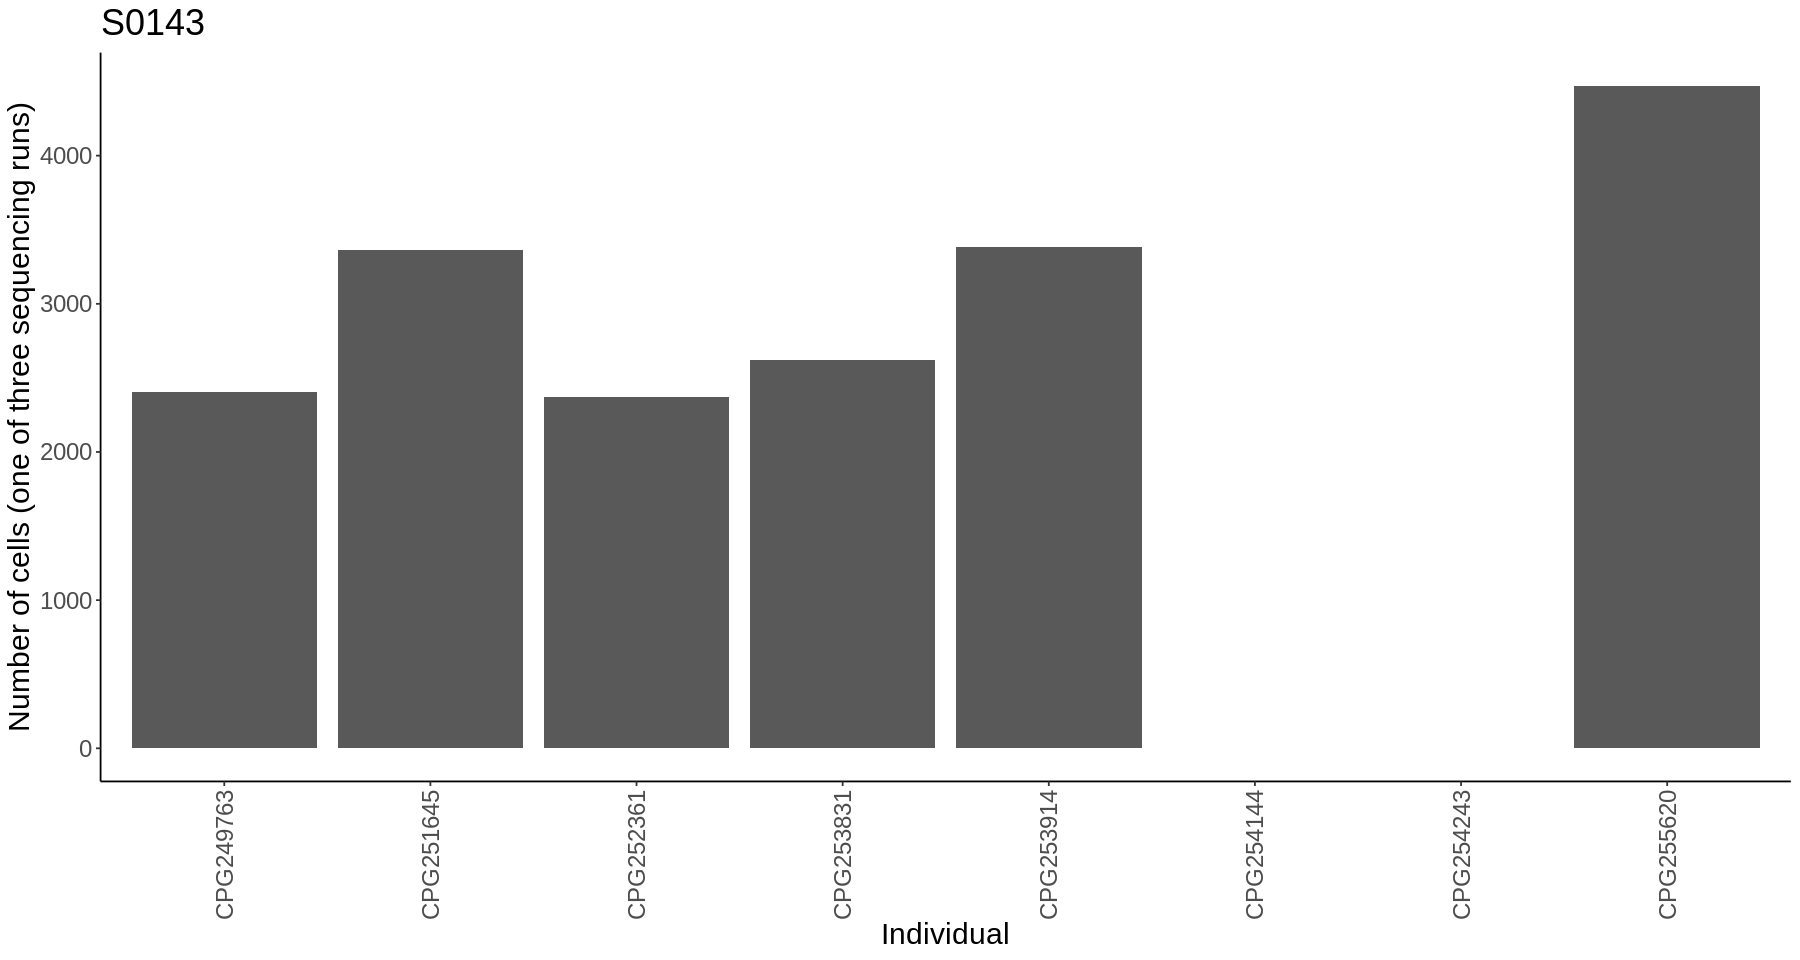

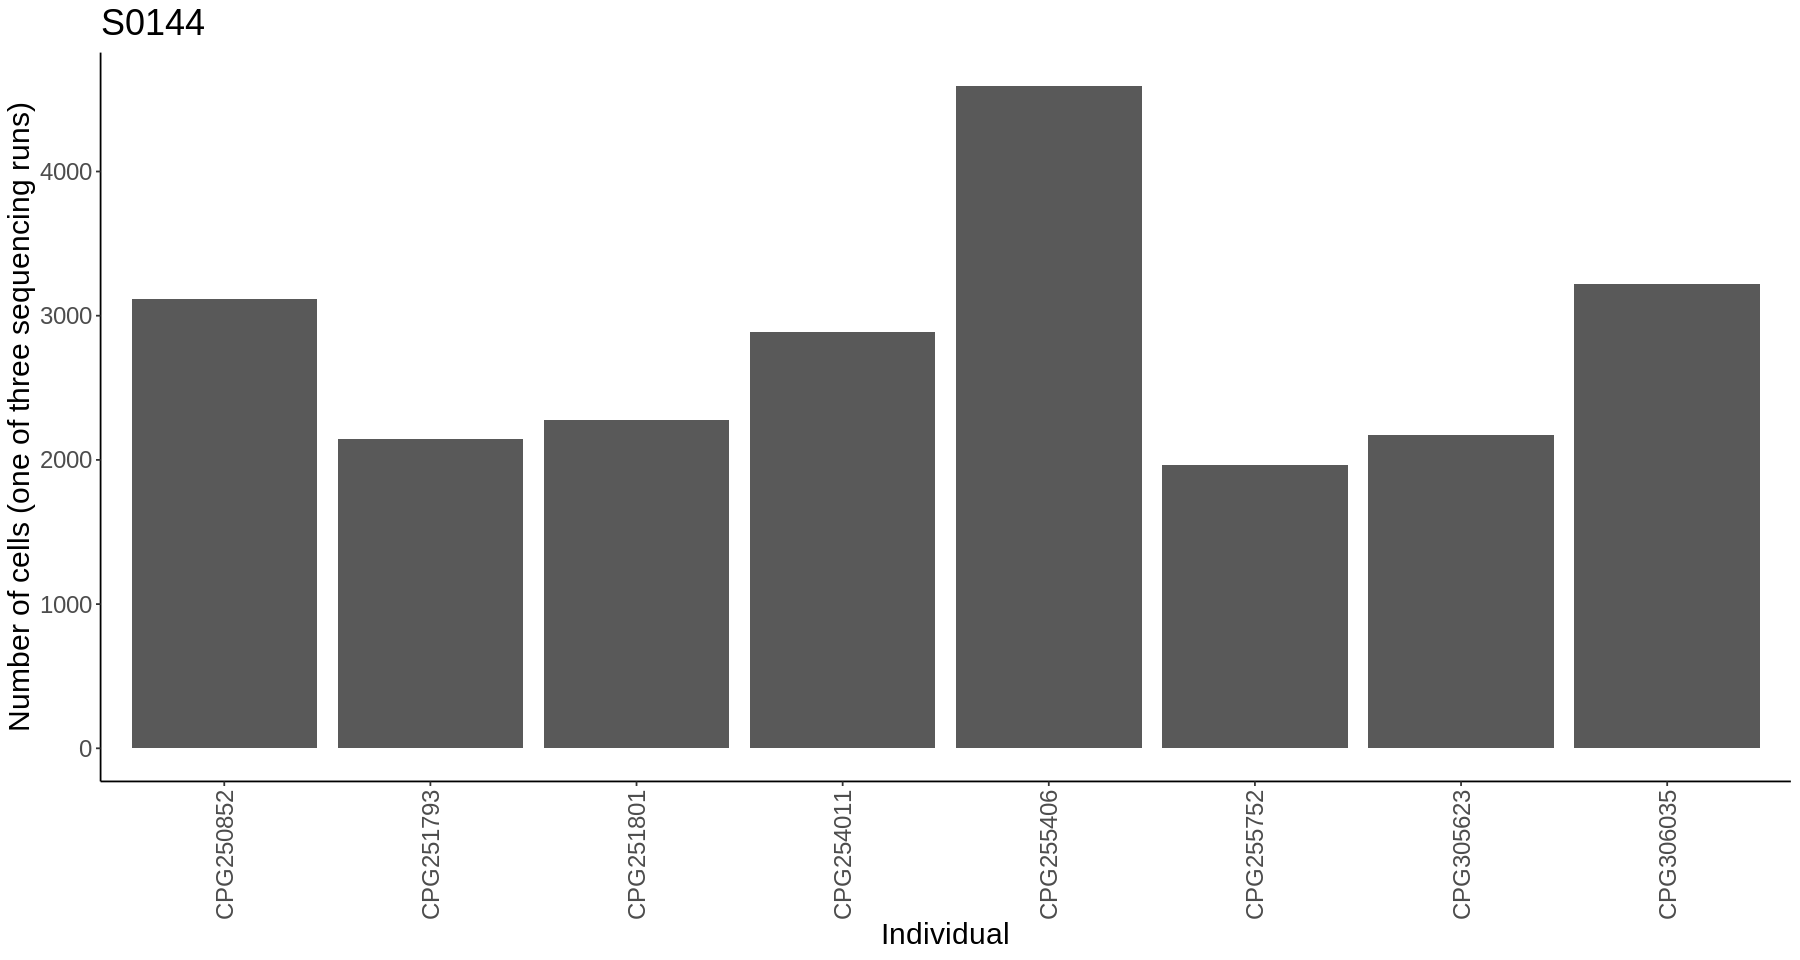

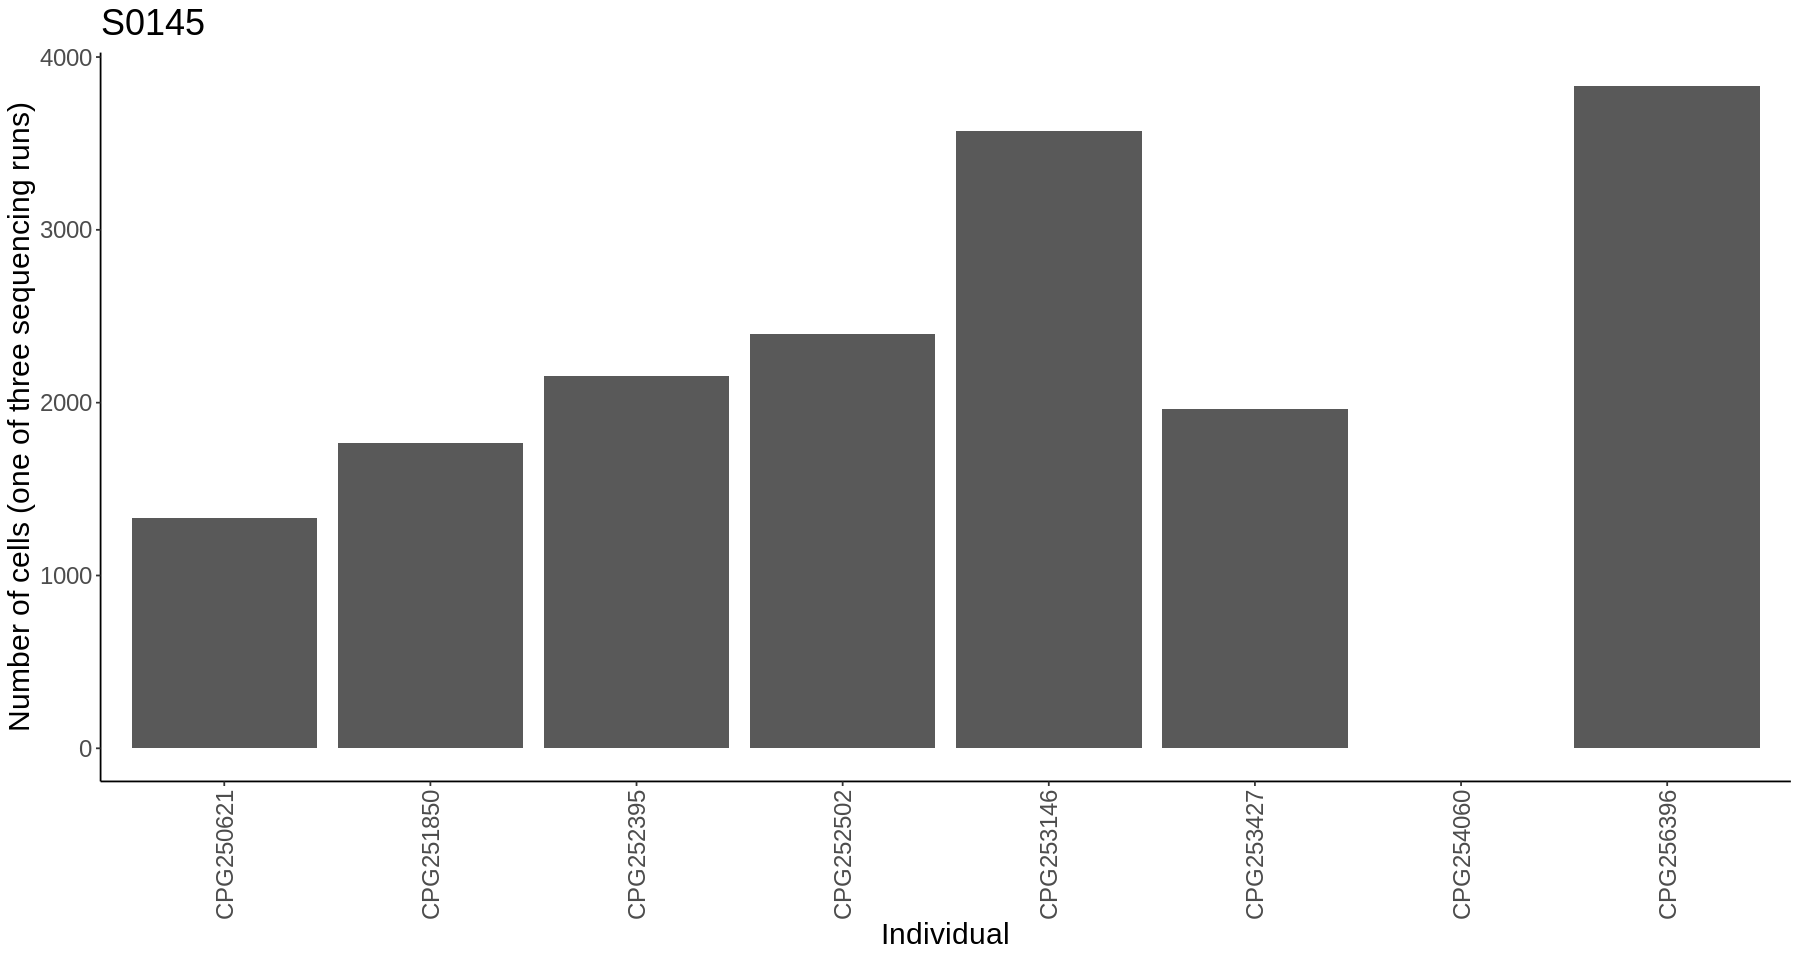

In [6]:
options(repr.plot.width = 15, repr.plot.height = 8) 
for (sample in samples){
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    p = ggplot(vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),], aes(x=Var1, y=Freq)) + geom_bar(stat = "identity")
    p = p + theme_classic() + theme(text = element_text(size=18))
    p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    p = p + xlab("Individual") + ylab("Number of cells (one of three sequencing runs)")
    print(p + ggtitle(sample))
}

In [7]:
samples_dir = "/share/ScratchGeneral/anncuo/tenk10k/data_processing/demuxafy/samples_in_pools_bioheart/"

In [8]:
df_summary = data.frame()
for (sample in samples){
    # skip these samples with A LOT of donors just for plotting
    if ((sample %in% c('S0056','S0058-59v2'))){next}
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    df = vireo_df[!(vireo_df$Var1 %in% c("doublet","unassigned")),]
    df2 = read.csv(paste0(samples_dir,sample,".tsv"),sep="\t", header = F)
    new_df = data.frame(sample = sample,
                        n_donors = nrow(df),
                        avg_ncells = mean(df$Freq),
                        std_ncells = sd(df$Freq),
                        expected_n_donors = nrow(df2))
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

sample       n_donors avg_ncells std_ncells expected_n_donors
1 S0040_repeat  7       2423.000   2801.6282  7                
2 S0041        14       1755.500    772.7398  8                
3 S0042_repeat  8       3799.500    956.3372  8                
4 S0043        14       1773.500    744.0999  8                
5 S0044        13       1767.538   1280.3731  7                
6 S0045        14       2148.929    857.0273  7

In [9]:
df_summary$pool = df_summary$sample

In [10]:
df_summary

sample       n_donors avg_ncells std_ncells expected_n_donors pool        
1   S0040_repeat  7       2423.000   2801.6282  7                 S0040_repeat
2   S0041        14       1755.500    772.7398  8                 S0041       
3   S0042_repeat  8       3799.500    956.3372  8                 S0042_repeat
4   S0043        14       1773.500    744.0999  8                 S0043       
5   S0044        13       1767.538   1280.3731  7                 S0044       
6   S0045        14       2148.929    857.0273  7                 S0045       
7   S0046        13       1917.154    665.4740  6                 S0046       
8   S0047        13       2158.000    720.8901  7                 S0047       
9   S0048         7       3089.429   1401.2173  7                 S0048       
10  S0049         8       2804.250   1354.7263  6                 S0049       
11  S0050         8       2439.625    882.4555  8                 S0050       
12  S0051         7       2864.571   1612.4209  7                 S0051       
13  S0052         8       3425.375   1910.5182  8                 S0052       
14  S0053         8       2551.000   1554.6844  7                 S0053       
15  S0054         7       1052.143   1088.7771  7                 S0054       
16  S0055         6       4023.500   1843.9257  6                 S0055       
17  S0060         8       2189.125    916.3883  8                 S0060       
18  S0061         8       2392.625   1839.9649  8                 S0061       
19  S0062         8       2882.500   1512.5718  8                 S0062       
20  S0063         8       3411.750   1209.0401  8                 S0063       
21  S0064         8       3369.375   1155.4478  8                 S0064       
22  S0065         6       2851.667   1735.6271  7                 S0065       
23  S0066         8       2452.000   1996.5932  8                 S0066       
24  S0067         8       3632.375   1404.4544  8                 S0067       
25  S0068         8       3076.375   1216.6122  8                 S0068       
26  S0069         7       2935.857   1040.9450  8                 S0069       
27  S0070         7       3492.714   1996.3330  7                 S0070       
28  S0071         8       3450.750    733.1365  8                 S0071       
29  S0072         8       3484.500   1348.0796  8                 S0072       
30  S0073         6       3059.333   1662.4764  8                 S0073       
⋮   ⋮            ⋮        ⋮          ⋮          ⋮                 ⋮           
73  S0116        7        2661.571   1318.4154  7                 S0116       
74  S0117        8        2928.000    753.4875  8                 S0117       
75  S0118        7        2771.143   1755.1293  8                 S0118       
76  S0119        6        2682.667   1513.5130  7                 S0119       
77  S0120        7        3200.429    455.1640  8                 S0120       
78  S0121        7        2359.143    335.4318  8                 S0121       
79  S0122        7        2775.571   1144.4240  7                 S0122       
80  S0123        8        2147.750    870.8198  8                 S0123       
81  S0124        8        2501.500   1264.1157  8                 S0124       
82  S0125        7        2082.286   1124.6291  7                 S0125       
83  S0126        8        2675.250    796.0599  8                 S0126       
84  S0127        8        2602.875   1472.5585  8                 S0127       
85  S0128        8        2124.375   1435.5401  8                 S0128       
86  S0129        8        2620.750    625.9379  8                 S0129       
87  S0130        8        1714.875   1221.0340  8                 S0130       
88  S0131        8        2419.625    661.5009  8                 S0131       
89  S0132        7        3472.571   1206.4966  7                 S0132       
90  S0133        7        3176.714   1032.7252  7                 S0133       
91  S0134        7        3514.857   1340.4408  7     

In [11]:
mean(df_summary$avg_ncells)
mean(df_summary$std_ncells)

[1] 2647.732

[1] 1076.298

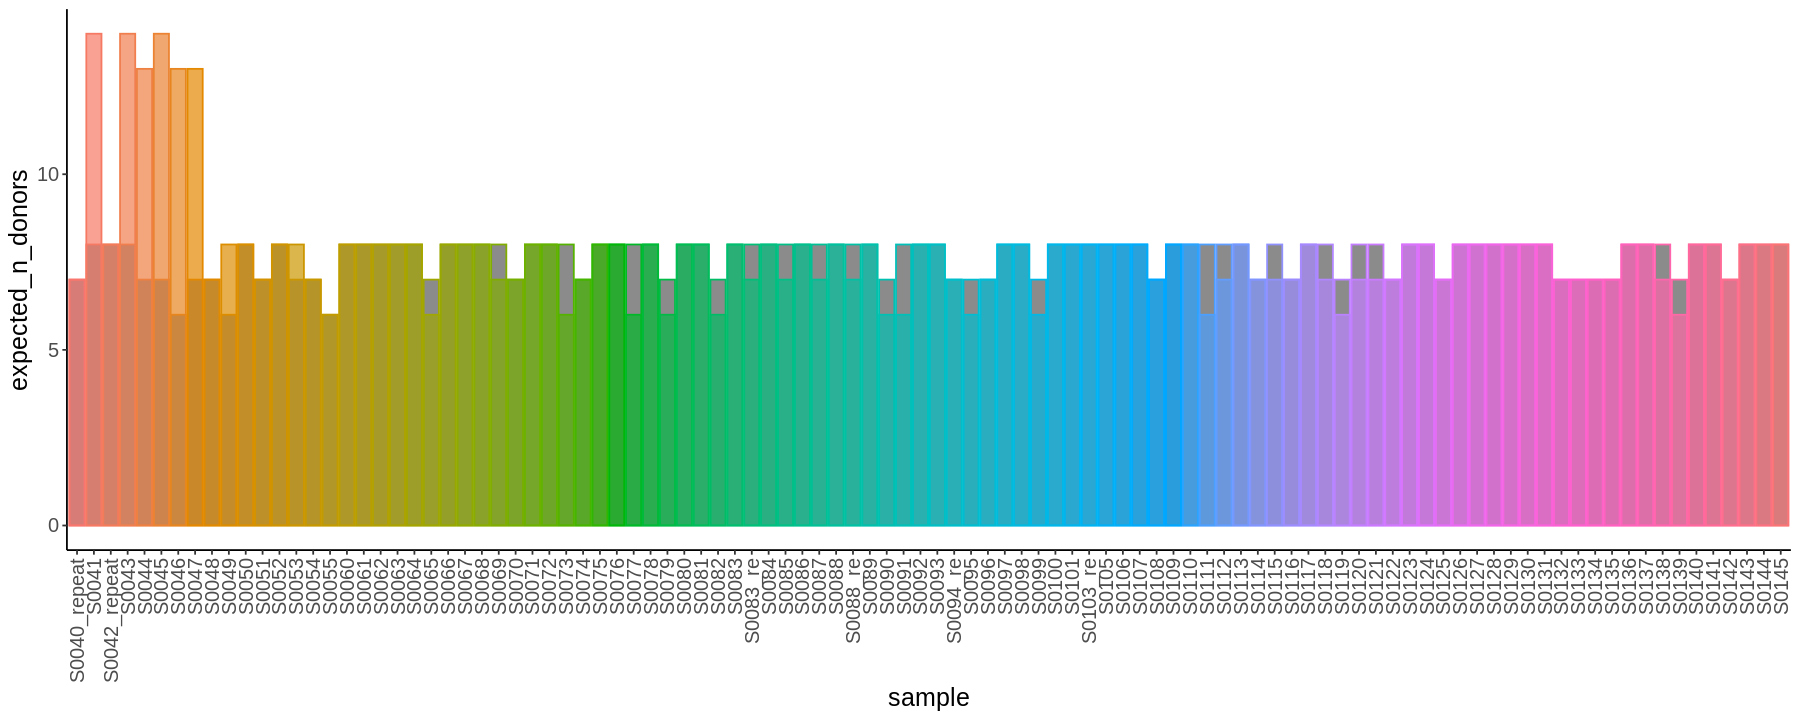

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)
p = ggplot(df_summary, aes(x=sample, y=expected_n_donors, col=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_donors, fill=pool),alpha=0.7)
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position="none")
p

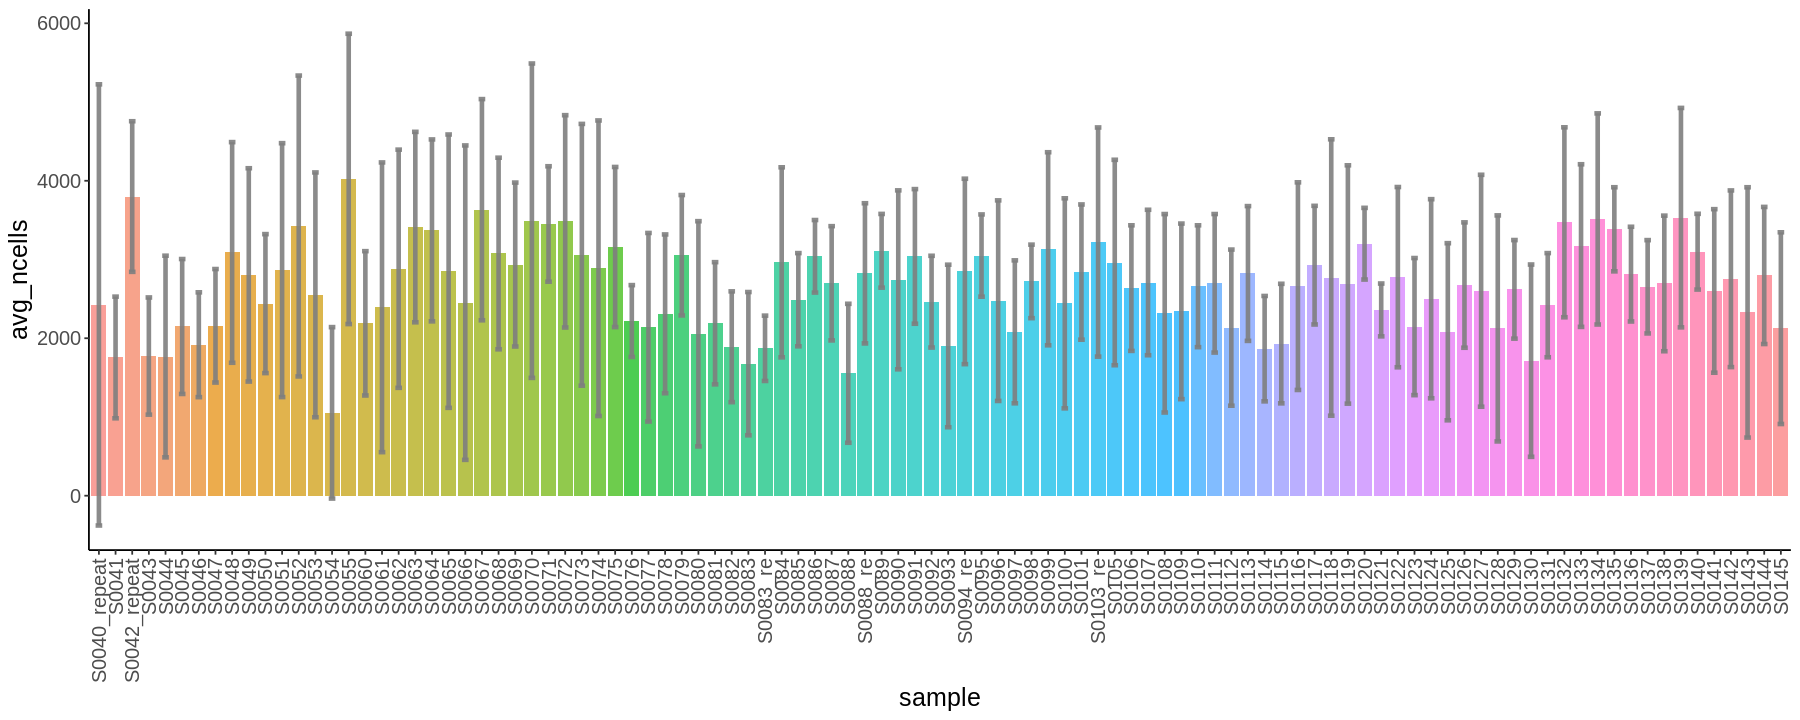

In [13]:
options(repr.plot.width = 15, repr.plot.height = 6)
p = ggplot(df_summary, aes(x=sample, y=avg_ncells,fill=pool)) + geom_bar(stat = "identity",alpha=0.7)
p = p + geom_errorbar( aes(x=sample, ymin=(avg_ncells-std_ncells), ymax=(avg_ncells+std_ncells)), width=0.4, colour="gray50", alpha=0.9, size=1.3)
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position="none")
p

In [14]:
df_summary = data.frame()
for (sample in samples){
    file = paste0(vireo_dir, sample, "/summary.tsv")
    vireo_df = read.csv(file, sep="\t")
    new_df = data.frame(sample = sample,
                        n_donors = nrow(vireo_df)-2,
                        n_cells = sum(vireo_df$Freq),
                        n_doublets = vireo_df[vireo_df$Var1=="doublet","Freq"],
                        n_unassigned = vireo_df[vireo_df$Var1=="unassigned","Freq"])
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

sample       n_donors n_cells n_doublets n_unassigned
1 S0040_repeat  7       18537   1114        462        
2 S0041        14       30681   5104       1000        
3 S0042_repeat  8       33971   3254        321        
4 S0043        14       36138   8541       2768        
5 S0044        13       28415   4368       1069        
6 S0045        14       37751   6024       1642

In [15]:
mean(df_summary$n_cells)
mean(df_summary$n_doublets)
mean(df_summary$n_unassigned)

[1] 26959.31

[1] 4506.269

[1] 2338.433

In [16]:
mean(df_summary$n_doublets/df_summary$n_cells)
mean(df_summary$n_unassigned/df_summary$n_cells)

[1] 0.1490075

[1] 0.06959086

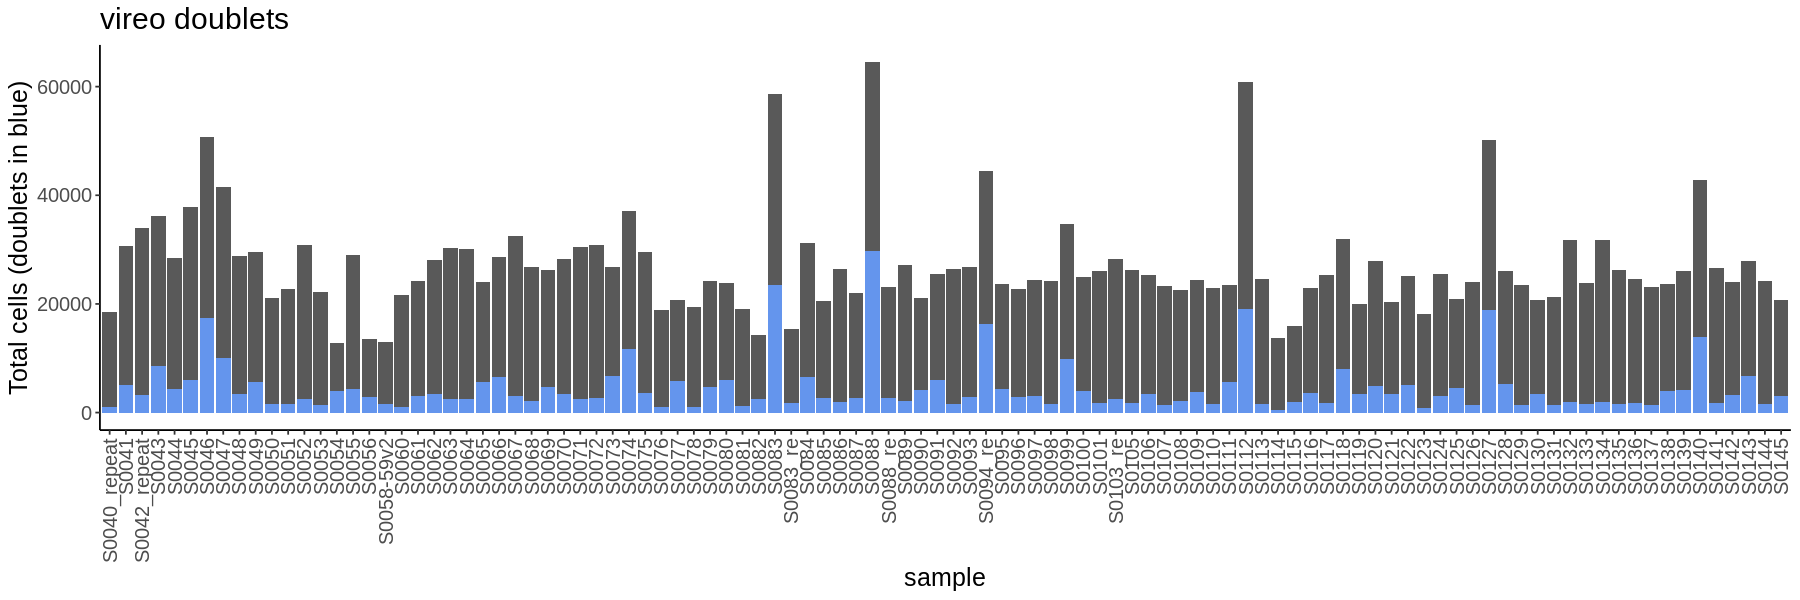

In [17]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=n_cells)) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_doublets), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Total cells (doublets in blue)") + ggtitle("vireo doublets")
p

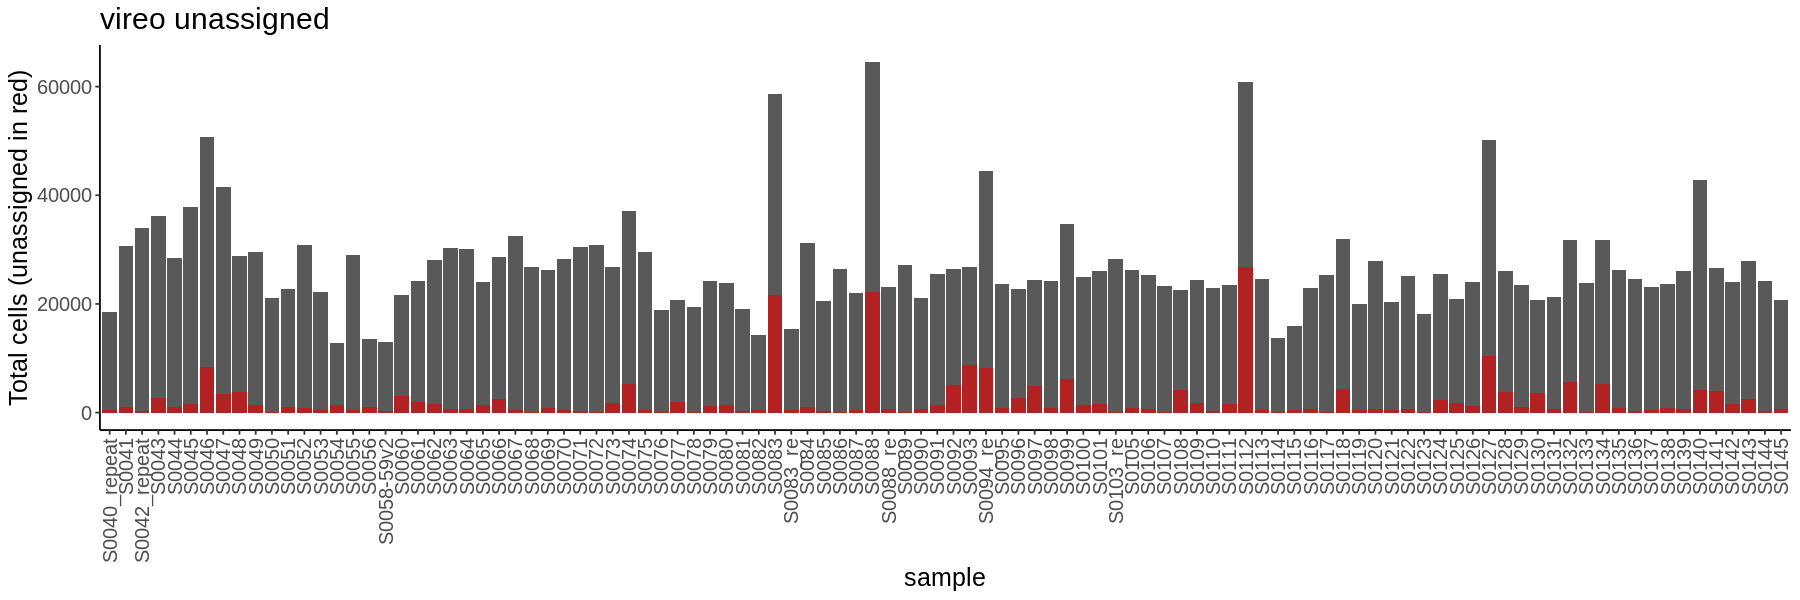

In [18]:
options(repr.plot.width = 15, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=n_cells)) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=n_unassigned), fill="firebrick")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Total cells (unassigned in red)") + ggtitle("vireo unassigned")
p

In [19]:
nrow(df_summary)

[1] 104